In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss 
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
cancer=pd.read_csv("BreastCancer.csv",index_col=0)
lbl=LabelEncoder()
cancer['Class']=lbl.fit_transform(cancer['Class'])
cancer.head()

Clump  UniCell_Size  Uni_CellShape  ...  NoemN  Mitoses  Class
Code                                        ...                       
61634       5             4              3  ...      3        1      0
63375       9             1              2  ...      7        2      1
76389      10             4              7  ...      1        1      1
95719       6            10             10  ...     10        7      1
128059      1             1              1  ...      1        1      0

[5 rows x 10 columns]

In [3]:
X=cancer.drop('Class',axis=1)
y=cancer['Class']

In [6]:
cat=CatBoostClassifier(random_state=23)
params={'max_depth':[2,3,4,5,6,None],
        'learning_rate':np.linspace(0.001,0.999,10),
        'n_estimators':[50,100,150]}
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [7]:
gcv=GridSearchCV(cat,param_grid=params,cv=kfold,scoring="neg_log_loss",verbose=1)
gcv.fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
0:	learn: 0.6924265	total: 47.6ms	remaining: 2.33s
1:	learn: 0.6916477	total: 48.3ms	remaining: 1.16s
2:	learn: 0.6909404	total: 48.8ms	remaining: 764ms
3:	learn: 0.6902108	total: 49.2ms	remaining: 566ms
4:	learn: 0.6894668	total: 49.6ms	remaining: 446ms
5:	learn: 0.6887356	total: 50ms	remaining: 367ms
6:	learn: 0.6880067	total: 50.4ms	remaining: 310ms
7:	learn: 0.6872741	total: 50.8ms	remaining: 267ms
8:	learn: 0.6865479	total: 51.2ms	remaining: 233ms
9:	learn: 0.6858356	total: 51.6ms	remaining: 206ms
10:	learn: 0.6851381	total: 54.9ms	remaining: 195ms
11:	learn: 0.6844274	total: 55.3ms	remaining: 175ms
12:	learn: 0.6837153	total: 55.9ms	remaining: 159ms
13:	learn: 0.6829563	total: 56.3ms	remaining: 145ms
14:	learn: 0.6822484	total: 56.8ms	remaining: 132ms
15:	learn: 0.6814960	total: 57.2ms	remaining: 121ms
16:	learn: 0.6807783	total: 57.5ms	remaining: 112ms
17:	learn: 0.6800665	total: 57.9ms	remaining: 103ms
18:	learn: 0.

0:	learn: 0.6923485	total: 654us	remaining: 32.1ms
1:	learn: 0.6916144	total: 1.51ms	remaining: 36.2ms
2:	learn: 0.6908955	total: 2.12ms	remaining: 33.3ms
3:	learn: 0.6901386	total: 2.82ms	remaining: 32.4ms
4:	learn: 0.6894530	total: 3.25ms	remaining: 29.2ms
5:	learn: 0.6886925	total: 3.71ms	remaining: 27.2ms
6:	learn: 0.6879574	total: 4.15ms	remaining: 25.5ms
7:	learn: 0.6872637	total: 4.57ms	remaining: 24ms
8:	learn: 0.6865794	total: 5ms	remaining: 22.8ms
9:	learn: 0.6857772	total: 5.39ms	remaining: 21.6ms
10:	learn: 0.6850495	total: 5.77ms	remaining: 20.5ms
11:	learn: 0.6842907	total: 6.16ms	remaining: 19.5ms
12:	learn: 0.6835910	total: 6.58ms	remaining: 18.7ms
13:	learn: 0.6828356	total: 6.96ms	remaining: 17.9ms
14:	learn: 0.6821536	total: 7.33ms	remaining: 17.1ms
15:	learn: 0.6814006	total: 7.69ms	remaining: 16.3ms
16:	learn: 0.6806808	total: 8.06ms	remaining: 15.7ms
17:	learn: 0.6799575	total: 8.4ms	remaining: 14.9ms
18:	learn: 0.6792555	total: 8.75ms	remaining: 14.3ms
19:	learn:

0:	learn: 0.6924273	total: 674us	remaining: 66.8ms
1:	learn: 0.6916930	total: 1.54ms	remaining: 75.4ms
2:	learn: 0.6909722	total: 1.95ms	remaining: 63.1ms
3:	learn: 0.6902994	total: 2.4ms	remaining: 57.6ms
4:	learn: 0.6896138	total: 2.83ms	remaining: 53.7ms
5:	learn: 0.6888891	total: 3.27ms	remaining: 51.2ms
6:	learn: 0.6881679	total: 3.66ms	remaining: 48.6ms
7:	learn: 0.6874316	total: 4.07ms	remaining: 46.8ms
8:	learn: 0.6867691	total: 4.46ms	remaining: 45.1ms
9:	learn: 0.6860173	total: 4.88ms	remaining: 43.9ms
10:	learn: 0.6853189	total: 5.28ms	remaining: 42.8ms
11:	learn: 0.6845856	total: 5.68ms	remaining: 41.7ms
12:	learn: 0.6838906	total: 6.07ms	remaining: 40.6ms
13:	learn: 0.6831756	total: 6.46ms	remaining: 39.7ms
14:	learn: 0.6825104	total: 6.86ms	remaining: 38.9ms
15:	learn: 0.6817868	total: 7.31ms	remaining: 38.4ms
16:	learn: 0.6810928	total: 7.71ms	remaining: 37.7ms
17:	learn: 0.6803559	total: 8.12ms	remaining: 37ms
18:	learn: 0.6796449	total: 8.49ms	remaining: 36.2ms
19:	lea

0:	learn: 0.6923485	total: 856us	remaining: 84.7ms
1:	learn: 0.6916144	total: 1.69ms	remaining: 83ms
2:	learn: 0.6908955	total: 2.12ms	remaining: 68.5ms
3:	learn: 0.6901386	total: 2.51ms	remaining: 60.2ms
4:	learn: 0.6894530	total: 2.88ms	remaining: 54.8ms
5:	learn: 0.6886925	total: 3.28ms	remaining: 51.4ms
6:	learn: 0.6879574	total: 3.68ms	remaining: 48.9ms
7:	learn: 0.6872637	total: 4.05ms	remaining: 46.6ms
8:	learn: 0.6865794	total: 4.45ms	remaining: 44.9ms
9:	learn: 0.6857772	total: 4.87ms	remaining: 43.8ms
10:	learn: 0.6850495	total: 5.32ms	remaining: 43.1ms
11:	learn: 0.6842907	total: 5.72ms	remaining: 41.9ms
12:	learn: 0.6835910	total: 6.12ms	remaining: 41ms
13:	learn: 0.6828356	total: 6.52ms	remaining: 40.1ms
14:	learn: 0.6821536	total: 6.94ms	remaining: 39.3ms
15:	learn: 0.6814006	total: 7.31ms	remaining: 38.4ms
16:	learn: 0.6806808	total: 7.7ms	remaining: 37.6ms
17:	learn: 0.6799575	total: 8.08ms	remaining: 36.8ms
18:	learn: 0.6792555	total: 8.47ms	remaining: 36.1ms
19:	learn

0:	learn: 0.6924352	total: 620us	remaining: 92.4ms
1:	learn: 0.6916903	total: 1.48ms	remaining: 110ms
2:	learn: 0.6909741	total: 1.92ms	remaining: 94.1ms
3:	learn: 0.6902882	total: 2.34ms	remaining: 85.4ms
4:	learn: 0.6895910	total: 2.78ms	remaining: 80.7ms
5:	learn: 0.6888592	total: 3.19ms	remaining: 76.5ms
6:	learn: 0.6881257	total: 3.59ms	remaining: 73.4ms
7:	learn: 0.6873841	total: 3.96ms	remaining: 70.3ms
8:	learn: 0.6866841	total: 4.34ms	remaining: 68ms
9:	learn: 0.6859134	total: 4.71ms	remaining: 65.9ms
10:	learn: 0.6852089	total: 5.13ms	remaining: 64.8ms
11:	learn: 0.6844725	total: 5.5ms	remaining: 63.2ms
12:	learn: 0.6837518	total: 5.87ms	remaining: 61.8ms
13:	learn: 0.6830186	total: 6.23ms	remaining: 60.6ms
14:	learn: 0.6823183	total: 6.61ms	remaining: 59.4ms
15:	learn: 0.6815691	total: 6.97ms	remaining: 58.4ms
16:	learn: 0.6808399	total: 7.34ms	remaining: 57.4ms
17:	learn: 0.6801243	total: 7.71ms	remaining: 56.6ms
18:	learn: 0.6794084	total: 8.09ms	remaining: 55.8ms
19:	lear

0:	learn: 0.6924356	total: 666us	remaining: 99.3ms
1:	learn: 0.6916691	total: 1.6ms	remaining: 118ms
2:	learn: 0.6909580	total: 2.09ms	remaining: 102ms
3:	learn: 0.6902165	total: 2.54ms	remaining: 92.7ms
4:	learn: 0.6894669	total: 3ms	remaining: 87.1ms
5:	learn: 0.6887313	total: 3.4ms	remaining: 81.7ms
6:	learn: 0.6879654	total: 3.83ms	remaining: 78.2ms
7:	learn: 0.6872250	total: 4.23ms	remaining: 75.1ms
8:	learn: 0.6864903	total: 4.64ms	remaining: 72.7ms
9:	learn: 0.6857628	total: 5.02ms	remaining: 70.3ms
10:	learn: 0.6850850	total: 5.41ms	remaining: 68.4ms
11:	learn: 0.6843359	total: 5.8ms	remaining: 66.8ms
12:	learn: 0.6836118	total: 6.22ms	remaining: 65.6ms
13:	learn: 0.6828511	total: 6.63ms	remaining: 64.4ms
14:	learn: 0.6821541	total: 7.02ms	remaining: 63.2ms
15:	learn: 0.6814172	total: 7.41ms	remaining: 62ms
16:	learn: 0.6806811	total: 7.8ms	remaining: 61ms
17:	learn: 0.6799568	total: 8.16ms	remaining: 59.9ms
18:	learn: 0.6792325	total: 8.57ms	remaining: 59.1ms
19:	learn: 0.6785

0:	learn: 0.6923977	total: 780us	remaining: 38.3ms
1:	learn: 0.6916268	total: 1.71ms	remaining: 41.1ms
2:	learn: 0.6908550	total: 2.25ms	remaining: 35.3ms
3:	learn: 0.6900890	total: 2.75ms	remaining: 31.6ms
4:	learn: 0.6893601	total: 3.27ms	remaining: 29.4ms
5:	learn: 0.6885779	total: 3.75ms	remaining: 27.5ms
6:	learn: 0.6877922	total: 4.22ms	remaining: 25.9ms
7:	learn: 0.6870647	total: 4.7ms	remaining: 24.7ms
8:	learn: 0.6863333	total: 5.2ms	remaining: 23.7ms
9:	learn: 0.6856053	total: 5.72ms	remaining: 22.9ms
10:	learn: 0.6848515	total: 6.22ms	remaining: 22.1ms
11:	learn: 0.6841038	total: 6.7ms	remaining: 21.2ms
12:	learn: 0.6833924	total: 7.2ms	remaining: 20.5ms
13:	learn: 0.6826483	total: 7.68ms	remaining: 19.8ms
14:	learn: 0.6819061	total: 8.27ms	remaining: 19.3ms
15:	learn: 0.6811700	total: 8.76ms	remaining: 18.6ms
16:	learn: 0.6804291	total: 9.33ms	remaining: 18.1ms
17:	learn: 0.6797029	total: 9.82ms	remaining: 17.5ms
18:	learn: 0.6789613	total: 10.3ms	remaining: 16.8ms
19:	lear

0:	learn: 0.6923449	total: 764us	remaining: 37.5ms
1:	learn: 0.6916133	total: 1.72ms	remaining: 41.2ms
2:	learn: 0.6908204	total: 2.25ms	remaining: 35.3ms
3:	learn: 0.6900860	total: 2.86ms	remaining: 32.9ms
4:	learn: 0.6893914	total: 3.45ms	remaining: 31.1ms
5:	learn: 0.6886117	total: 3.98ms	remaining: 29.2ms
6:	learn: 0.6878378	total: 4.58ms	remaining: 28.1ms
7:	learn: 0.6870729	total: 5.15ms	remaining: 27ms
8:	learn: 0.6863370	total: 5.73ms	remaining: 26.1ms
9:	learn: 0.6855900	total: 6.28ms	remaining: 25.1ms
10:	learn: 0.6848234	total: 6.79ms	remaining: 24.1ms
11:	learn: 0.6840596	total: 7.28ms	remaining: 23.1ms
12:	learn: 0.6833373	total: 7.81ms	remaining: 22.2ms
13:	learn: 0.6825724	total: 8.27ms	remaining: 21.3ms
14:	learn: 0.6818199	total: 8.69ms	remaining: 20.3ms
15:	learn: 0.6810736	total: 9.09ms	remaining: 19.3ms
16:	learn: 0.6803658	total: 9.58ms	remaining: 18.6ms
17:	learn: 0.6796647	total: 10.1ms	remaining: 17.9ms
18:	learn: 0.6788971	total: 10.5ms	remaining: 17.2ms
19:	le

0:	learn: 0.6924246	total: 783us	remaining: 77.6ms
1:	learn: 0.6916763	total: 1.78ms	remaining: 87.4ms
2:	learn: 0.6909343	total: 2.32ms	remaining: 75.1ms
3:	learn: 0.6902249	total: 2.83ms	remaining: 68ms
4:	learn: 0.6895453	total: 3.37ms	remaining: 64ms
5:	learn: 0.6887801	total: 3.9ms	remaining: 61.1ms
6:	learn: 0.6880208	total: 4.38ms	remaining: 58.2ms
7:	learn: 0.6873043	total: 5.02ms	remaining: 57.7ms
8:	learn: 0.6866058	total: 5.49ms	remaining: 55.5ms
9:	learn: 0.6859117	total: 5.96ms	remaining: 53.7ms
10:	learn: 0.6851617	total: 6.45ms	remaining: 52.2ms
11:	learn: 0.6844523	total: 6.97ms	remaining: 51.1ms
12:	learn: 0.6837560	total: 7.48ms	remaining: 50.1ms
13:	learn: 0.6829966	total: 7.99ms	remaining: 49.1ms
14:	learn: 0.6822600	total: 8.49ms	remaining: 48.1ms
15:	learn: 0.6815299	total: 9.01ms	remaining: 47.3ms
16:	learn: 0.6808091	total: 9.53ms	remaining: 46.5ms
17:	learn: 0.6802283	total: 10ms	remaining: 45.7ms
18:	learn: 0.6795135	total: 10.5ms	remaining: 44.9ms
19:	learn: 

0:	learn: 0.6923449	total: 730us	remaining: 72.4ms
1:	learn: 0.6916133	total: 1.67ms	remaining: 81.6ms
2:	learn: 0.6908204	total: 2.21ms	remaining: 71.6ms
3:	learn: 0.6900860	total: 2.79ms	remaining: 66.8ms
4:	learn: 0.6893914	total: 3.29ms	remaining: 62.6ms
5:	learn: 0.6886117	total: 3.76ms	remaining: 58.9ms
6:	learn: 0.6878378	total: 4.26ms	remaining: 56.6ms
7:	learn: 0.6870729	total: 4.77ms	remaining: 54.8ms
8:	learn: 0.6863370	total: 5.27ms	remaining: 53.3ms
9:	learn: 0.6855900	total: 5.79ms	remaining: 52.1ms
10:	learn: 0.6848234	total: 6.26ms	remaining: 50.6ms
11:	learn: 0.6840596	total: 6.75ms	remaining: 49.5ms
12:	learn: 0.6833373	total: 7.24ms	remaining: 48.4ms
13:	learn: 0.6825724	total: 7.73ms	remaining: 47.5ms
14:	learn: 0.6818199	total: 8.22ms	remaining: 46.6ms
15:	learn: 0.6810736	total: 8.72ms	remaining: 45.8ms
16:	learn: 0.6803658	total: 9.23ms	remaining: 45.1ms
17:	learn: 0.6796647	total: 9.72ms	remaining: 44.3ms
18:	learn: 0.6788971	total: 10.2ms	remaining: 43.7ms
19:	

0:	learn: 0.6923940	total: 853us	remaining: 127ms
1:	learn: 0.6916472	total: 1.82ms	remaining: 135ms
2:	learn: 0.6908877	total: 2.67ms	remaining: 131ms
3:	learn: 0.6901451	total: 3.25ms	remaining: 118ms
4:	learn: 0.6894898	total: 3.88ms	remaining: 112ms
5:	learn: 0.6887431	total: 4.45ms	remaining: 107ms
6:	learn: 0.6879873	total: 5.02ms	remaining: 103ms
7:	learn: 0.6872234	total: 5.59ms	remaining: 99.3ms
8:	learn: 0.6864976	total: 6.16ms	remaining: 96.5ms
9:	learn: 0.6857684	total: 6.71ms	remaining: 94ms
10:	learn: 0.6850203	total: 7.26ms	remaining: 91.7ms
11:	learn: 0.6842837	total: 7.8ms	remaining: 89.7ms
12:	learn: 0.6835766	total: 8.36ms	remaining: 88.1ms
13:	learn: 0.6828458	total: 8.93ms	remaining: 86.8ms
14:	learn: 0.6820868	total: 9.48ms	remaining: 85.4ms
15:	learn: 0.6813647	total: 10ms	remaining: 84ms
16:	learn: 0.6806493	total: 10.6ms	remaining: 83.1ms
17:	learn: 0.6799541	total: 11.2ms	remaining: 81.8ms
18:	learn: 0.6792206	total: 11.7ms	remaining: 80.5ms
19:	learn: 0.67851

0:	learn: 0.6923886	total: 790us	remaining: 118ms
1:	learn: 0.6916362	total: 1.76ms	remaining: 131ms
2:	learn: 0.6908617	total: 2.34ms	remaining: 115ms
3:	learn: 0.6901287	total: 2.86ms	remaining: 104ms
4:	learn: 0.6893919	total: 3.35ms	remaining: 97.2ms
5:	learn: 0.6886144	total: 3.88ms	remaining: 93ms
6:	learn: 0.6878395	total: 4.37ms	remaining: 89.3ms
7:	learn: 0.6870732	total: 4.87ms	remaining: 86.5ms
8:	learn: 0.6863152	total: 5.38ms	remaining: 84.2ms
9:	learn: 0.6856154	total: 5.86ms	remaining: 82.1ms
10:	learn: 0.6848564	total: 6.35ms	remaining: 80.2ms
11:	learn: 0.6841110	total: 6.85ms	remaining: 78.8ms
12:	learn: 0.6833633	total: 7.34ms	remaining: 77.3ms
13:	learn: 0.6826185	total: 7.84ms	remaining: 76.2ms
14:	learn: 0.6819002	total: 8.34ms	remaining: 75.1ms
15:	learn: 0.6811699	total: 8.91ms	remaining: 74.6ms
16:	learn: 0.6804387	total: 9.47ms	remaining: 74.1ms
17:	learn: 0.6797813	total: 10.1ms	remaining: 73.8ms
18:	learn: 0.6790440	total: 10.6ms	remaining: 73.4ms
19:	learn:

0:	learn: 0.6924115	total: 980us	remaining: 48.1ms
1:	learn: 0.6916764	total: 2.11ms	remaining: 50.7ms
2:	learn: 0.6909660	total: 2.74ms	remaining: 42.9ms
3:	learn: 0.6901818	total: 3.34ms	remaining: 38.5ms
4:	learn: 0.6894264	total: 3.95ms	remaining: 35.6ms
5:	learn: 0.6886999	total: 4.54ms	remaining: 33.3ms
6:	learn: 0.6879490	total: 5.14ms	remaining: 31.6ms
7:	learn: 0.6872644	total: 5.74ms	remaining: 30.1ms
8:	learn: 0.6864853	total: 6.33ms	remaining: 28.8ms
9:	learn: 0.6857261	total: 6.94ms	remaining: 27.8ms
10:	learn: 0.6850164	total: 7.52ms	remaining: 26.7ms
11:	learn: 0.6842926	total: 8.12ms	remaining: 25.7ms
12:	learn: 0.6835607	total: 8.71ms	remaining: 24.8ms
13:	learn: 0.6828322	total: 9.29ms	remaining: 23.9ms
14:	learn: 0.6820862	total: 9.87ms	remaining: 23ms
15:	learn: 0.6813406	total: 10.4ms	remaining: 22ms
16:	learn: 0.6805998	total: 10.9ms	remaining: 21.2ms
17:	learn: 0.6798650	total: 11.5ms	remaining: 20.4ms
18:	learn: 0.6791597	total: 12ms	remaining: 19.6ms
19:	learn:

0:	learn: 0.6923601	total: 894us	remaining: 43.8ms
1:	learn: 0.6916119	total: 1.94ms	remaining: 46.4ms
2:	learn: 0.6909346	total: 2.64ms	remaining: 41.4ms
3:	learn: 0.6901831	total: 3.27ms	remaining: 37.6ms
4:	learn: 0.6894317	total: 3.89ms	remaining: 35ms
5:	learn: 0.6887290	total: 4.5ms	remaining: 33ms
6:	learn: 0.6879936	total: 5.11ms	remaining: 31.4ms
7:	learn: 0.6872852	total: 5.75ms	remaining: 30.2ms
8:	learn: 0.6865144	total: 6.42ms	remaining: 29.3ms
9:	learn: 0.6857679	total: 7.04ms	remaining: 28.2ms
10:	learn: 0.6850384	total: 7.66ms	remaining: 27.2ms
11:	learn: 0.6843277	total: 8.44ms	remaining: 26.7ms
12:	learn: 0.6836037	total: 8.99ms	remaining: 25.6ms
13:	learn: 0.6829338	total: 9.53ms	remaining: 24.5ms
14:	learn: 0.6821966	total: 10.3ms	remaining: 24.1ms
15:	learn: 0.6814275	total: 10.9ms	remaining: 23.1ms
16:	learn: 0.6806610	total: 11.4ms	remaining: 22.2ms
17:	learn: 0.6799470	total: 12ms	remaining: 21.3ms
18:	learn: 0.6792357	total: 12.5ms	remaining: 20.4ms
19:	learn: 

0:	learn: 0.6924369	total: 920us	remaining: 91.1ms
1:	learn: 0.6916961	total: 2.2ms	remaining: 108ms
2:	learn: 0.6909900	total: 2.85ms	remaining: 92ms
3:	learn: 0.6902538	total: 3.53ms	remaining: 84.6ms
4:	learn: 0.6895126	total: 4.15ms	remaining: 78.9ms
5:	learn: 0.6888030	total: 4.83ms	remaining: 75.7ms
6:	learn: 0.6880866	total: 5.42ms	remaining: 72ms
7:	learn: 0.6874193	total: 6.06ms	remaining: 69.7ms
8:	learn: 0.6866626	total: 6.65ms	remaining: 67.2ms
9:	learn: 0.6859295	total: 7.24ms	remaining: 65.2ms
10:	learn: 0.6852125	total: 7.88ms	remaining: 63.8ms
11:	learn: 0.6845120	total: 8.55ms	remaining: 62.7ms
12:	learn: 0.6838008	total: 9.18ms	remaining: 61.5ms
13:	learn: 0.6831554	total: 9.77ms	remaining: 60ms
14:	learn: 0.6824118	total: 10.4ms	remaining: 58.8ms
15:	learn: 0.6816833	total: 11ms	remaining: 57.6ms
16:	learn: 0.6809767	total: 11.5ms	remaining: 56.3ms
17:	learn: 0.6802999	total: 12.1ms	remaining: 55.2ms
18:	learn: 0.6795946	total: 12.7ms	remaining: 54ms
19:	learn: 0.678

0:	learn: 0.6923601	total: 866us	remaining: 85.8ms
1:	learn: 0.6916119	total: 2.22ms	remaining: 109ms
2:	learn: 0.6909346	total: 2.81ms	remaining: 90.9ms
3:	learn: 0.6901831	total: 3.43ms	remaining: 82.3ms
4:	learn: 0.6894317	total: 4.04ms	remaining: 76.7ms
5:	learn: 0.6887290	total: 4.79ms	remaining: 75.1ms
6:	learn: 0.6879936	total: 5.42ms	remaining: 72ms
7:	learn: 0.6872852	total: 6.03ms	remaining: 69.4ms
8:	learn: 0.6865144	total: 6.66ms	remaining: 67.3ms
9:	learn: 0.6857679	total: 7.26ms	remaining: 65.3ms
10:	learn: 0.6850384	total: 7.88ms	remaining: 63.7ms
11:	learn: 0.6843277	total: 8.5ms	remaining: 62.3ms
12:	learn: 0.6836037	total: 9.1ms	remaining: 60.9ms
13:	learn: 0.6829338	total: 9.72ms	remaining: 59.7ms
14:	learn: 0.6821966	total: 10.3ms	remaining: 58.6ms
15:	learn: 0.6814275	total: 10.9ms	remaining: 57.1ms
16:	learn: 0.6806610	total: 11.4ms	remaining: 55.8ms
17:	learn: 0.6799470	total: 12ms	remaining: 54.7ms
18:	learn: 0.6792357	total: 12.6ms	remaining: 53.6ms
19:	learn: 

0:	learn: 0.6924098	total: 991us	remaining: 148ms
1:	learn: 0.6916455	total: 2.07ms	remaining: 153ms
2:	learn: 0.6909789	total: 2.8ms	remaining: 137ms
3:	learn: 0.6902360	total: 3.45ms	remaining: 126ms
4:	learn: 0.6895046	total: 4.29ms	remaining: 124ms
5:	learn: 0.6887786	total: 4.92ms	remaining: 118ms
6:	learn: 0.6880544	total: 5.53ms	remaining: 113ms
7:	learn: 0.6873831	total: 6.1ms	remaining: 108ms
8:	learn: 0.6866267	total: 6.7ms	remaining: 105ms
9:	learn: 0.6858887	total: 7.54ms	remaining: 106ms
10:	learn: 0.6851742	total: 8.17ms	remaining: 103ms
11:	learn: 0.6844317	total: 8.76ms	remaining: 101ms
12:	learn: 0.6837016	total: 9.34ms	remaining: 98.5ms
13:	learn: 0.6830535	total: 9.92ms	remaining: 96.4ms
14:	learn: 0.6823078	total: 10.6ms	remaining: 95.6ms
15:	learn: 0.6815512	total: 11.2ms	remaining: 94ms
16:	learn: 0.6808200	total: 11.8ms	remaining: 92.2ms
17:	learn: 0.6801155	total: 12.4ms	remaining: 90.8ms
18:	learn: 0.6794104	total: 12.9ms	remaining: 89.2ms
19:	learn: 0.6786826	

0:	learn: 0.6924027	total: 908us	remaining: 135ms
1:	learn: 0.6916502	total: 2.01ms	remaining: 149ms
2:	learn: 0.6909337	total: 2.67ms	remaining: 131ms
3:	learn: 0.6901890	total: 3.32ms	remaining: 121ms
4:	learn: 0.6894506	total: 4.05ms	remaining: 117ms
5:	learn: 0.6887334	total: 4.75ms	remaining: 114ms
6:	learn: 0.6879784	total: 5.67ms	remaining: 116ms
7:	learn: 0.6872908	total: 6.31ms	remaining: 112ms
8:	learn: 0.6865290	total: 6.96ms	remaining: 109ms
9:	learn: 0.6857886	total: 7.6ms	remaining: 106ms
10:	learn: 0.6850506	total: 8.25ms	remaining: 104ms
11:	learn: 0.6843229	total: 8.9ms	remaining: 102ms
12:	learn: 0.6836055	total: 9.49ms	remaining: 100ms
13:	learn: 0.6829283	total: 10.1ms	remaining: 98ms
14:	learn: 0.6821666	total: 10.7ms	remaining: 96.2ms
15:	learn: 0.6814115	total: 11.2ms	remaining: 93.9ms
16:	learn: 0.6806781	total: 11.8ms	remaining: 92ms
17:	learn: 0.6799430	total: 12.3ms	remaining: 90.2ms
18:	learn: 0.6792181	total: 12.9ms	remaining: 89ms
19:	learn: 0.6784852	tota

0:	learn: 0.6923942	total: 1.03ms	remaining: 50.6ms
1:	learn: 0.6916434	total: 2.32ms	remaining: 55.6ms
2:	learn: 0.6909420	total: 3.09ms	remaining: 48.5ms
3:	learn: 0.6901916	total: 3.9ms	remaining: 44.9ms
4:	learn: 0.6894593	total: 4.64ms	remaining: 41.8ms
5:	learn: 0.6887168	total: 5.78ms	remaining: 42.4ms
6:	learn: 0.6879870	total: 6.52ms	remaining: 40.1ms
7:	learn: 0.6872493	total: 7.28ms	remaining: 38.2ms
8:	learn: 0.6865346	total: 8.01ms	remaining: 36.5ms
9:	learn: 0.6858480	total: 8.74ms	remaining: 35ms
10:	learn: 0.6851278	total: 9.43ms	remaining: 33.5ms
11:	learn: 0.6843993	total: 10.2ms	remaining: 32.2ms
12:	learn: 0.6837042	total: 10.9ms	remaining: 31ms
13:	learn: 0.6829831	total: 11.6ms	remaining: 29.9ms
14:	learn: 0.6822357	total: 12.3ms	remaining: 28.8ms
15:	learn: 0.6815114	total: 13.2ms	remaining: 28ms
16:	learn: 0.6808017	total: 14ms	remaining: 27.1ms
17:	learn: 0.6800696	total: 14.8ms	remaining: 26.3ms
18:	learn: 0.6793421	total: 15.5ms	remaining: 25.3ms
19:	learn: 0

0:	learn: 0.6923716	total: 1.01ms	remaining: 49.5ms
1:	learn: 0.6916201	total: 2.2ms	remaining: 52.7ms
2:	learn: 0.6909239	total: 2.94ms	remaining: 46ms
3:	learn: 0.6901665	total: 3.74ms	remaining: 43ms
4:	learn: 0.6894409	total: 4.52ms	remaining: 40.7ms
5:	learn: 0.6887081	total: 5.24ms	remaining: 38.4ms
6:	learn: 0.6879682	total: 5.94ms	remaining: 36.5ms
7:	learn: 0.6872287	total: 6.67ms	remaining: 35ms
8:	learn: 0.6864947	total: 7.37ms	remaining: 33.6ms
9:	learn: 0.6858528	total: 8.07ms	remaining: 32.3ms
10:	learn: 0.6851157	total: 8.78ms	remaining: 31.1ms
11:	learn: 0.6843447	total: 9.57ms	remaining: 30.3ms
12:	learn: 0.6836378	total: 10.3ms	remaining: 29.2ms
13:	learn: 0.6828947	total: 11ms	remaining: 28.2ms
14:	learn: 0.6821617	total: 11.6ms	remaining: 27.1ms
15:	learn: 0.6814322	total: 12.3ms	remaining: 26ms
16:	learn: 0.6807537	total: 12.9ms	remaining: 25.1ms
17:	learn: 0.6800164	total: 13.6ms	remaining: 24.1ms
18:	learn: 0.6792845	total: 14.2ms	remaining: 23.2ms
19:	learn: 0.6

0:	learn: 0.6924159	total: 1.06ms	remaining: 105ms
1:	learn: 0.6916905	total: 2.28ms	remaining: 112ms
2:	learn: 0.6910038	total: 3.02ms	remaining: 97.8ms
3:	learn: 0.6902756	total: 3.79ms	remaining: 91.1ms
4:	learn: 0.6895749	total: 4.52ms	remaining: 85.8ms
5:	learn: 0.6888508	total: 5.24ms	remaining: 82ms
6:	learn: 0.6881497	total: 5.98ms	remaining: 79.5ms
7:	learn: 0.6874303	total: 6.65ms	remaining: 76.5ms
8:	learn: 0.6867049	total: 7.41ms	remaining: 74.9ms
9:	learn: 0.6860280	total: 8.43ms	remaining: 75.9ms
10:	learn: 0.6853117	total: 9.22ms	remaining: 74.6ms
11:	learn: 0.6846166	total: 9.92ms	remaining: 72.7ms
12:	learn: 0.6839592	total: 10.6ms	remaining: 71.2ms
13:	learn: 0.6832564	total: 11.3ms	remaining: 69.3ms
14:	learn: 0.6825403	total: 12ms	remaining: 68.1ms
15:	learn: 0.6818408	total: 12.7ms	remaining: 66.6ms
16:	learn: 0.6811714	total: 13.3ms	remaining: 65.1ms
17:	learn: 0.6804582	total: 14ms	remaining: 63.9ms
18:	learn: 0.6797557	total: 14.7ms	remaining: 62.6ms
19:	learn: 

0:	learn: 0.6923716	total: 1.02ms	remaining: 101ms
1:	learn: 0.6916201	total: 2.21ms	remaining: 108ms
2:	learn: 0.6909239	total: 3ms	remaining: 97ms
3:	learn: 0.6901665	total: 3.82ms	remaining: 91.7ms
4:	learn: 0.6894409	total: 4.55ms	remaining: 86.5ms
5:	learn: 0.6887081	total: 5.3ms	remaining: 83ms
6:	learn: 0.6879682	total: 6.06ms	remaining: 80.5ms
7:	learn: 0.6872287	total: 6.83ms	remaining: 78.6ms
8:	learn: 0.6864947	total: 7.59ms	remaining: 76.7ms
9:	learn: 0.6858528	total: 8.36ms	remaining: 75.2ms
10:	learn: 0.6851157	total: 9.09ms	remaining: 73.6ms
11:	learn: 0.6843447	total: 9.78ms	remaining: 71.7ms
12:	learn: 0.6836378	total: 10.5ms	remaining: 70.5ms
13:	learn: 0.6828947	total: 11.3ms	remaining: 69.5ms
14:	learn: 0.6821617	total: 12.1ms	remaining: 68.3ms
15:	learn: 0.6814322	total: 12.8ms	remaining: 67.1ms
16:	learn: 0.6807537	total: 13.5ms	remaining: 65.7ms
17:	learn: 0.6800164	total: 14.3ms	remaining: 65ms
18:	learn: 0.6792845	total: 15ms	remaining: 63.8ms
19:	learn: 0.6785

0:	learn: 0.6924113	total: 1.02ms	remaining: 152ms
1:	learn: 0.6916780	total: 2.21ms	remaining: 163ms
2:	learn: 0.6909563	total: 2.98ms	remaining: 146ms
3:	learn: 0.6902122	total: 3.69ms	remaining: 135ms
4:	learn: 0.6894937	total: 4.43ms	remaining: 129ms
5:	learn: 0.6887531	total: 5.16ms	remaining: 124ms
6:	learn: 0.6880285	total: 5.86ms	remaining: 120ms
7:	learn: 0.6873032	total: 6.6ms	remaining: 117ms
8:	learn: 0.6865810	total: 7.33ms	remaining: 115ms
9:	learn: 0.6859012	total: 8.07ms	remaining: 113ms
10:	learn: 0.6851762	total: 9.3ms	remaining: 118ms
11:	learn: 0.6844514	total: 10ms	remaining: 115ms
12:	learn: 0.6837652	total: 10.7ms	remaining: 113ms
13:	learn: 0.6830399	total: 11.5ms	remaining: 111ms
14:	learn: 0.6823260	total: 12.2ms	remaining: 110ms
15:	learn: 0.6816019	total: 12.9ms	remaining: 108ms
16:	learn: 0.6809274	total: 13.6ms	remaining: 106ms
17:	learn: 0.6801957	total: 14.3ms	remaining: 105ms
18:	learn: 0.6794825	total: 15ms	remaining: 103ms
19:	learn: 0.6787737	total: 

0:	learn: 0.6923938	total: 1.04ms	remaining: 156ms
1:	learn: 0.6916595	total: 2.29ms	remaining: 170ms
2:	learn: 0.6909515	total: 3.09ms	remaining: 151ms
3:	learn: 0.6901971	total: 3.9ms	remaining: 142ms
4:	learn: 0.6894513	total: 4.69ms	remaining: 136ms
5:	learn: 0.6887114	total: 5.46ms	remaining: 131ms
6:	learn: 0.6879741	total: 6.27ms	remaining: 128ms
7:	learn: 0.6872517	total: 7.03ms	remaining: 125ms
8:	learn: 0.6865213	total: 7.81ms	remaining: 122ms
9:	learn: 0.6858170	total: 8.52ms	remaining: 119ms
10:	learn: 0.6850916	total: 9.5ms	remaining: 120ms
11:	learn: 0.6843467	total: 10.6ms	remaining: 122ms
12:	learn: 0.6836496	total: 11.4ms	remaining: 120ms
13:	learn: 0.6829066	total: 12.1ms	remaining: 118ms
14:	learn: 0.6821537	total: 12.8ms	remaining: 115ms
15:	learn: 0.6814135	total: 13.6ms	remaining: 114ms
16:	learn: 0.6807243	total: 14.3ms	remaining: 112ms
17:	learn: 0.6799935	total: 15ms	remaining: 110ms
18:	learn: 0.6792711	total: 15.7ms	remaining: 108ms
19:	learn: 0.6785454	total

0:	learn: 0.6924077	total: 1.22ms	remaining: 59.8ms
1:	learn: 0.6916913	total: 2.62ms	remaining: 62.9ms
2:	learn: 0.6910276	total: 3.52ms	remaining: 55.1ms
3:	learn: 0.6903298	total: 4.38ms	remaining: 50.4ms
4:	learn: 0.6896456	total: 5.27ms	remaining: 47.5ms
5:	learn: 0.6889534	total: 6.07ms	remaining: 44.5ms
6:	learn: 0.6882764	total: 7.01ms	remaining: 43.1ms
7:	learn: 0.6875668	total: 7.84ms	remaining: 41.2ms
8:	learn: 0.6868537	total: 8.7ms	remaining: 39.6ms
9:	learn: 0.6861493	total: 9.52ms	remaining: 38.1ms
10:	learn: 0.6854068	total: 11.2ms	remaining: 39.8ms
11:	learn: 0.6846716	total: 12ms	remaining: 38.1ms
12:	learn: 0.6839722	total: 12.9ms	remaining: 36.6ms
13:	learn: 0.6832563	total: 13.7ms	remaining: 35.2ms
14:	learn: 0.6825710	total: 14.5ms	remaining: 33.9ms
15:	learn: 0.6818363	total: 15.5ms	remaining: 33ms
16:	learn: 0.6811539	total: 16.4ms	remaining: 31.8ms
17:	learn: 0.6804687	total: 17.3ms	remaining: 30.8ms
18:	learn: 0.6797754	total: 18.2ms	remaining: 29.6ms
19:	lear

0:	learn: 0.6923941	total: 1.18ms	remaining: 58ms
1:	learn: 0.6916687	total: 2.5ms	remaining: 60ms
2:	learn: 0.6909771	total: 3.76ms	remaining: 58.9ms
3:	learn: 0.6902569	total: 4.8ms	remaining: 55.2ms
4:	learn: 0.6895472	total: 5.71ms	remaining: 51.4ms
5:	learn: 0.6888481	total: 6.57ms	remaining: 48.2ms
6:	learn: 0.6881882	total: 7.69ms	remaining: 47.3ms
7:	learn: 0.6874638	total: 8.57ms	remaining: 45ms
8:	learn: 0.6867753	total: 9.43ms	remaining: 43ms
9:	learn: 0.6860397	total: 10.3ms	remaining: 41.1ms
10:	learn: 0.6853004	total: 10.9ms	remaining: 38.6ms
11:	learn: 0.6846310	total: 11.7ms	remaining: 37ms
12:	learn: 0.6839282	total: 12.5ms	remaining: 35.6ms
13:	learn: 0.6832211	total: 13.5ms	remaining: 34.7ms
14:	learn: 0.6825303	total: 14.5ms	remaining: 33.8ms
15:	learn: 0.6818079	total: 15.3ms	remaining: 32.5ms
16:	learn: 0.6810743	total: 16.1ms	remaining: 31.3ms
17:	learn: 0.6803837	total: 16.9ms	remaining: 30.1ms
18:	learn: 0.6796955	total: 17.7ms	remaining: 28.9ms
19:	learn: 0.67

0:	learn: 0.6924297	total: 1.16ms	remaining: 115ms
1:	learn: 0.6917251	total: 2.52ms	remaining: 123ms
2:	learn: 0.6910813	total: 3.55ms	remaining: 115ms
3:	learn: 0.6904093	total: 4.43ms	remaining: 106ms
4:	learn: 0.6897209	total: 5.29ms	remaining: 100ms
5:	learn: 0.6890606	total: 6.09ms	remaining: 95.5ms
6:	learn: 0.6883906	total: 6.96ms	remaining: 92.5ms
7:	learn: 0.6876877	total: 7.83ms	remaining: 90ms
8:	learn: 0.6870172	total: 8.67ms	remaining: 87.7ms
9:	learn: 0.6863282	total: 9.53ms	remaining: 85.7ms
10:	learn: 0.6856368	total: 10.4ms	remaining: 83.9ms
11:	learn: 0.6849775	total: 11.2ms	remaining: 82.3ms
12:	learn: 0.6843030	total: 12.1ms	remaining: 80.8ms
13:	learn: 0.6836329	total: 12.9ms	remaining: 79.3ms
14:	learn: 0.6829460	total: 13.7ms	remaining: 77.8ms
15:	learn: 0.6822990	total: 14.7ms	remaining: 77ms
16:	learn: 0.6816235	total: 15.5ms	remaining: 75.9ms
17:	learn: 0.6809732	total: 16.4ms	remaining: 74.8ms
18:	learn: 0.6802989	total: 17.2ms	remaining: 73.5ms
19:	learn: 0

0:	learn: 0.6923941	total: 1.21ms	remaining: 119ms
1:	learn: 0.6916687	total: 2.56ms	remaining: 126ms
2:	learn: 0.6909771	total: 3.48ms	remaining: 112ms
3:	learn: 0.6902569	total: 4.32ms	remaining: 104ms
4:	learn: 0.6895472	total: 5.18ms	remaining: 98.4ms
5:	learn: 0.6888481	total: 6.25ms	remaining: 98ms
6:	learn: 0.6881882	total: 7.17ms	remaining: 95.2ms
7:	learn: 0.6874638	total: 8.16ms	remaining: 93.8ms
8:	learn: 0.6867753	total: 9.23ms	remaining: 93.4ms
9:	learn: 0.6860397	total: 10.1ms	remaining: 90.6ms
10:	learn: 0.6853004	total: 10.7ms	remaining: 86.5ms
11:	learn: 0.6846310	total: 11.5ms	remaining: 84.7ms
12:	learn: 0.6839282	total: 12.3ms	remaining: 82.3ms
13:	learn: 0.6832211	total: 13.1ms	remaining: 80.3ms
14:	learn: 0.6825303	total: 14.1ms	remaining: 79.7ms
15:	learn: 0.6818079	total: 14.9ms	remaining: 78.2ms
16:	learn: 0.6810743	total: 15.7ms	remaining: 76.6ms
17:	learn: 0.6803837	total: 16.8ms	remaining: 76.3ms
18:	learn: 0.6796955	total: 17.6ms	remaining: 75.2ms
19:	learn

0:	learn: 0.6924346	total: 1.09ms	remaining: 163ms
1:	learn: 0.6917197	total: 2.38ms	remaining: 177ms
2:	learn: 0.6910698	total: 3.26ms	remaining: 160ms
3:	learn: 0.6903750	total: 4.11ms	remaining: 150ms
4:	learn: 0.6896712	total: 4.92ms	remaining: 143ms
5:	learn: 0.6889920	total: 5.82ms	remaining: 140ms
6:	learn: 0.6882935	total: 6.8ms	remaining: 139ms
7:	learn: 0.6875762	total: 7.79ms	remaining: 138ms
8:	learn: 0.6868630	total: 8.88ms	remaining: 139ms
9:	learn: 0.6861398	total: 9.77ms	remaining: 137ms
10:	learn: 0.6854511	total: 10.6ms	remaining: 134ms
11:	learn: 0.6847660	total: 11.4ms	remaining: 131ms
12:	learn: 0.6840692	total: 12.2ms	remaining: 128ms
13:	learn: 0.6833977	total: 13ms	remaining: 126ms
14:	learn: 0.6827027	total: 13.8ms	remaining: 124ms
15:	learn: 0.6820297	total: 14.6ms	remaining: 122ms
16:	learn: 0.6813612	total: 15.4ms	remaining: 120ms
17:	learn: 0.6806582	total: 16.3ms	remaining: 119ms
18:	learn: 0.6799633	total: 17ms	remaining: 118ms
19:	learn: 0.6792927	total:

0:	learn: 0.6924116	total: 1.15ms	remaining: 172ms
1:	learn: 0.6917009	total: 2.44ms	remaining: 181ms
2:	learn: 0.6910288	total: 3.44ms	remaining: 168ms
3:	learn: 0.6903131	total: 4.34ms	remaining: 159ms
4:	learn: 0.6895883	total: 4.98ms	remaining: 144ms
5:	learn: 0.6888705	total: 5.83ms	remaining: 140ms
6:	learn: 0.6881810	total: 6.88ms	remaining: 140ms
7:	learn: 0.6874806	total: 7.82ms	remaining: 139ms
8:	learn: 0.6867485	total: 8.79ms	remaining: 138ms
9:	learn: 0.6860494	total: 9.73ms	remaining: 136ms
10:	learn: 0.6853675	total: 10.7ms	remaining: 135ms
11:	learn: 0.6846885	total: 11.7ms	remaining: 134ms
12:	learn: 0.6839719	total: 12.5ms	remaining: 132ms
13:	learn: 0.6832706	total: 13.3ms	remaining: 129ms
14:	learn: 0.6825831	total: 14.1ms	remaining: 127ms
15:	learn: 0.6818490	total: 14.9ms	remaining: 124ms
16:	learn: 0.6811368	total: 15.7ms	remaining: 123ms
17:	learn: 0.6804569	total: 16.5ms	remaining: 121ms
18:	learn: 0.6797654	total: 17.3ms	remaining: 119ms
19:	learn: 0.6790558	t

0:	learn: 0.6924077	total: 1.32ms	remaining: 64.6ms
1:	learn: 0.6916913	total: 2.73ms	remaining: 65.6ms
2:	learn: 0.6910276	total: 3.66ms	remaining: 57.3ms
3:	learn: 0.6903298	total: 4.55ms	remaining: 52.3ms
4:	learn: 0.6896456	total: 9.04ms	remaining: 81.4ms
5:	learn: 0.6889534	total: 10.1ms	remaining: 73.9ms
6:	learn: 0.6882764	total: 10.9ms	remaining: 67.2ms
7:	learn: 0.6875668	total: 11.8ms	remaining: 62.2ms
8:	learn: 0.6868537	total: 12.7ms	remaining: 57.9ms
9:	learn: 0.6861493	total: 13.6ms	remaining: 54.2ms
10:	learn: 0.6854068	total: 14.3ms	remaining: 50.6ms
11:	learn: 0.6846716	total: 15ms	remaining: 47.6ms
12:	learn: 0.6839722	total: 15.9ms	remaining: 45.4ms
13:	learn: 0.6832563	total: 16.7ms	remaining: 43ms
14:	learn: 0.6825710	total: 17.5ms	remaining: 40.9ms
15:	learn: 0.6818363	total: 18.3ms	remaining: 38.9ms
16:	learn: 0.6811539	total: 19.2ms	remaining: 37.3ms
17:	learn: 0.6804687	total: 20.1ms	remaining: 35.8ms
18:	learn: 0.6797754	total: 21ms	remaining: 34.3ms
19:	learn

0:	learn: 0.6923941	total: 1.15ms	remaining: 56.2ms
1:	learn: 0.6916687	total: 2.54ms	remaining: 60.9ms
2:	learn: 0.6909771	total: 3.4ms	remaining: 53.3ms
3:	learn: 0.6902569	total: 4.29ms	remaining: 49.3ms
4:	learn: 0.6895472	total: 5.11ms	remaining: 46ms
5:	learn: 0.6888481	total: 5.96ms	remaining: 43.7ms
6:	learn: 0.6881882	total: 6.81ms	remaining: 41.9ms
7:	learn: 0.6874638	total: 7.67ms	remaining: 40.3ms
8:	learn: 0.6867753	total: 8.49ms	remaining: 38.7ms
9:	learn: 0.6860397	total: 9.34ms	remaining: 37.4ms
10:	learn: 0.6853004	total: 9.95ms	remaining: 35.3ms
11:	learn: 0.6846310	total: 10.8ms	remaining: 34.2ms
12:	learn: 0.6839282	total: 11.6ms	remaining: 33.1ms
13:	learn: 0.6832211	total: 12.4ms	remaining: 31.9ms
14:	learn: 0.6825303	total: 13.2ms	remaining: 30.7ms
15:	learn: 0.6818079	total: 14ms	remaining: 29.8ms
16:	learn: 0.6810743	total: 14.8ms	remaining: 28.7ms
17:	learn: 0.6803837	total: 15.6ms	remaining: 27.7ms
18:	learn: 0.6796955	total: 16.4ms	remaining: 26.8ms
19:	lear

0:	learn: 0.6924297	total: 1.17ms	remaining: 116ms
1:	learn: 0.6917251	total: 2.56ms	remaining: 126ms
2:	learn: 0.6910813	total: 3.46ms	remaining: 112ms
3:	learn: 0.6904093	total: 4.35ms	remaining: 104ms
4:	learn: 0.6897209	total: 5.23ms	remaining: 99.4ms
5:	learn: 0.6890606	total: 6.4ms	remaining: 100ms
6:	learn: 0.6883906	total: 7.29ms	remaining: 96.8ms
7:	learn: 0.6876877	total: 8.09ms	remaining: 93.1ms
8:	learn: 0.6870172	total: 8.92ms	remaining: 90.2ms
9:	learn: 0.6863282	total: 9.74ms	remaining: 87.7ms
10:	learn: 0.6856368	total: 10.6ms	remaining: 85.5ms
11:	learn: 0.6849775	total: 11.5ms	remaining: 84.2ms
12:	learn: 0.6843030	total: 12.3ms	remaining: 82.6ms
13:	learn: 0.6836329	total: 13.1ms	remaining: 80.7ms
14:	learn: 0.6829460	total: 13.9ms	remaining: 79ms
15:	learn: 0.6822990	total: 14.7ms	remaining: 77.4ms
16:	learn: 0.6816235	total: 15.6ms	remaining: 76ms
17:	learn: 0.6809732	total: 16.4ms	remaining: 74.6ms
18:	learn: 0.6802989	total: 17.2ms	remaining: 73.3ms
19:	learn: 0.

0:	learn: 0.6923941	total: 1.17ms	remaining: 116ms
1:	learn: 0.6916687	total: 2.49ms	remaining: 122ms
2:	learn: 0.6909771	total: 3.35ms	remaining: 108ms
3:	learn: 0.6902569	total: 4.19ms	remaining: 100ms
4:	learn: 0.6895472	total: 5.03ms	remaining: 95.5ms
5:	learn: 0.6888481	total: 5.9ms	remaining: 92.5ms
6:	learn: 0.6881882	total: 6.76ms	remaining: 89.8ms
7:	learn: 0.6874638	total: 7.8ms	remaining: 89.7ms
8:	learn: 0.6867753	total: 8.65ms	remaining: 87.4ms
9:	learn: 0.6860397	total: 9.46ms	remaining: 85.2ms
10:	learn: 0.6853004	total: 10.1ms	remaining: 81.3ms
11:	learn: 0.6846310	total: 10.9ms	remaining: 79.8ms
12:	learn: 0.6839282	total: 11.6ms	remaining: 77.8ms
13:	learn: 0.6832211	total: 12.4ms	remaining: 76.2ms
14:	learn: 0.6825303	total: 13.1ms	remaining: 74.5ms
15:	learn: 0.6818079	total: 13.9ms	remaining: 73.1ms
16:	learn: 0.6810743	total: 14.7ms	remaining: 71.9ms
17:	learn: 0.6803837	total: 15.5ms	remaining: 70.5ms
18:	learn: 0.6796955	total: 16.2ms	remaining: 69.3ms
19:	learn

0:	learn: 0.6924346	total: 1.12ms	remaining: 168ms
1:	learn: 0.6917197	total: 2.48ms	remaining: 184ms
2:	learn: 0.6910698	total: 3.39ms	remaining: 166ms
3:	learn: 0.6903750	total: 4.24ms	remaining: 155ms
4:	learn: 0.6896712	total: 5.42ms	remaining: 157ms
5:	learn: 0.6889920	total: 6.31ms	remaining: 151ms
6:	learn: 0.6882935	total: 7.18ms	remaining: 147ms
7:	learn: 0.6875762	total: 8.04ms	remaining: 143ms
8:	learn: 0.6868630	total: 8.88ms	remaining: 139ms
9:	learn: 0.6861398	total: 9.76ms	remaining: 137ms
10:	learn: 0.6854511	total: 10.9ms	remaining: 137ms
11:	learn: 0.6847660	total: 11.8ms	remaining: 135ms
12:	learn: 0.6840692	total: 12.6ms	remaining: 133ms
13:	learn: 0.6833977	total: 13.6ms	remaining: 132ms
14:	learn: 0.6827027	total: 14.4ms	remaining: 130ms
15:	learn: 0.6820297	total: 15.2ms	remaining: 128ms
16:	learn: 0.6813612	total: 16.4ms	remaining: 129ms
17:	learn: 0.6806582	total: 17.3ms	remaining: 127ms
18:	learn: 0.6799633	total: 18ms	remaining: 124ms
19:	learn: 0.6792927	tot

0:	learn: 0.6924116	total: 1.28ms	remaining: 191ms
1:	learn: 0.6917009	total: 2.6ms	remaining: 192ms
2:	learn: 0.6910288	total: 3.5ms	remaining: 171ms
3:	learn: 0.6903131	total: 4.35ms	remaining: 159ms
4:	learn: 0.6895883	total: 4.95ms	remaining: 144ms
5:	learn: 0.6888705	total: 5.74ms	remaining: 138ms
6:	learn: 0.6881810	total: 6.79ms	remaining: 139ms
7:	learn: 0.6874806	total: 9.17ms	remaining: 163ms
8:	learn: 0.6867485	total: 10.2ms	remaining: 160ms
9:	learn: 0.6860494	total: 11.1ms	remaining: 155ms
10:	learn: 0.6853675	total: 12ms	remaining: 152ms
11:	learn: 0.6846885	total: 12.9ms	remaining: 148ms
12:	learn: 0.6839719	total: 13.7ms	remaining: 145ms
13:	learn: 0.6832706	total: 14.6ms	remaining: 142ms
14:	learn: 0.6825831	total: 15.5ms	remaining: 140ms
15:	learn: 0.6818490	total: 16.4ms	remaining: 138ms
16:	learn: 0.6811368	total: 17.3ms	remaining: 135ms
17:	learn: 0.6804569	total: 18.1ms	remaining: 133ms
18:	learn: 0.6797654	total: 19ms	remaining: 131ms
19:	learn: 0.6790558	total: 

0:	learn: 0.6167996	total: 675us	remaining: 33.1ms
1:	learn: 0.5481363	total: 1.58ms	remaining: 38.1ms
2:	learn: 0.4956628	total: 2.07ms	remaining: 32.5ms
3:	learn: 0.4502287	total: 2.54ms	remaining: 29.2ms
4:	learn: 0.4126950	total: 3ms	remaining: 27ms
5:	learn: 0.3783562	total: 3.43ms	remaining: 25.2ms
6:	learn: 0.3481192	total: 3.87ms	remaining: 23.8ms
7:	learn: 0.3201904	total: 4.35ms	remaining: 22.8ms
8:	learn: 0.2982632	total: 4.79ms	remaining: 21.8ms
9:	learn: 0.2762494	total: 5.24ms	remaining: 20.9ms
10:	learn: 0.2570124	total: 5.65ms	remaining: 20ms
11:	learn: 0.2401624	total: 6.06ms	remaining: 19.2ms
12:	learn: 0.2249280	total: 6.49ms	remaining: 18.5ms
13:	learn: 0.2120362	total: 6.96ms	remaining: 17.9ms
14:	learn: 0.1999532	total: 7.4ms	remaining: 17.3ms
15:	learn: 0.1918294	total: 7.81ms	remaining: 16.6ms
16:	learn: 0.1823696	total: 8.29ms	remaining: 16.1ms
17:	learn: 0.1741419	total: 8.74ms	remaining: 15.5ms
18:	learn: 0.1660878	total: 9.17ms	remaining: 15ms
19:	learn: 0.1

0:	learn: 0.6087165	total: 744us	remaining: 36.5ms
1:	learn: 0.5450929	total: 1.62ms	remaining: 38.9ms
2:	learn: 0.4885632	total: 2.09ms	remaining: 32.7ms
3:	learn: 0.4435643	total: 2.53ms	remaining: 29.1ms
4:	learn: 0.4066515	total: 2.99ms	remaining: 27ms
5:	learn: 0.3709270	total: 3.46ms	remaining: 25.4ms
6:	learn: 0.3414838	total: 4.36ms	remaining: 26.8ms
7:	learn: 0.3159310	total: 4.8ms	remaining: 25.2ms
8:	learn: 0.2932610	total: 5.24ms	remaining: 23.9ms
9:	learn: 0.2704709	total: 5.67ms	remaining: 22.7ms
10:	learn: 0.2531408	total: 6.16ms	remaining: 21.8ms
11:	learn: 0.2366395	total: 6.58ms	remaining: 20.8ms
12:	learn: 0.2226637	total: 7.03ms	remaining: 20ms
13:	learn: 0.2098868	total: 7.5ms	remaining: 19.3ms
14:	learn: 0.1971261	total: 7.94ms	remaining: 18.5ms
15:	learn: 0.1859742	total: 8.39ms	remaining: 17.8ms
16:	learn: 0.1772147	total: 8.84ms	remaining: 17.2ms
17:	learn: 0.1687230	total: 9.26ms	remaining: 16.5ms
18:	learn: 0.1617106	total: 9.69ms	remaining: 15.8ms
19:	learn:

0:	learn: 0.6170127	total: 871us	remaining: 86.3ms
1:	learn: 0.5519129	total: 1.74ms	remaining: 85.5ms
2:	learn: 0.4990966	total: 2.17ms	remaining: 70.1ms
3:	learn: 0.4516382	total: 2.56ms	remaining: 61.6ms
4:	learn: 0.4124963	total: 2.96ms	remaining: 56.2ms
5:	learn: 0.3778831	total: 3.37ms	remaining: 52.7ms
6:	learn: 0.3486478	total: 3.78ms	remaining: 50.3ms
7:	learn: 0.3227196	total: 4.18ms	remaining: 48.1ms
8:	learn: 0.3011957	total: 4.59ms	remaining: 46.5ms
9:	learn: 0.2804009	total: 5.01ms	remaining: 45.1ms
10:	learn: 0.2630107	total: 5.46ms	remaining: 44.2ms
11:	learn: 0.2468278	total: 5.86ms	remaining: 43ms
12:	learn: 0.2347913	total: 6.26ms	remaining: 41.9ms
13:	learn: 0.2218987	total: 6.67ms	remaining: 41ms
14:	learn: 0.2098518	total: 7.09ms	remaining: 40.2ms
15:	learn: 0.2015396	total: 7.51ms	remaining: 39.4ms
16:	learn: 0.1929682	total: 7.94ms	remaining: 38.8ms
17:	learn: 0.1850570	total: 8.36ms	remaining: 38.1ms
18:	learn: 0.1770930	total: 8.79ms	remaining: 37.5ms
19:	lear

0:	learn: 0.6087165	total: 645us	remaining: 63.9ms
1:	learn: 0.5450929	total: 1.56ms	remaining: 76.5ms
2:	learn: 0.4885632	total: 2.01ms	remaining: 65ms
3:	learn: 0.4435643	total: 2.43ms	remaining: 58.4ms
4:	learn: 0.4066515	total: 2.89ms	remaining: 54.9ms
5:	learn: 0.3709270	total: 3.31ms	remaining: 51.8ms
6:	learn: 0.3414838	total: 3.75ms	remaining: 49.8ms
7:	learn: 0.3159310	total: 4.2ms	remaining: 48.3ms
8:	learn: 0.2932610	total: 4.64ms	remaining: 46.9ms
9:	learn: 0.2704709	total: 5.12ms	remaining: 46.1ms
10:	learn: 0.2531408	total: 5.55ms	remaining: 44.9ms
11:	learn: 0.2366395	total: 5.96ms	remaining: 43.7ms
12:	learn: 0.2226637	total: 6.36ms	remaining: 42.6ms
13:	learn: 0.2098868	total: 6.77ms	remaining: 41.6ms
14:	learn: 0.1971261	total: 7.18ms	remaining: 40.7ms
15:	learn: 0.1859742	total: 7.6ms	remaining: 39.9ms
16:	learn: 0.1772147	total: 8.06ms	remaining: 39.3ms
17:	learn: 0.1687230	total: 8.46ms	remaining: 38.6ms
18:	learn: 0.1617106	total: 8.86ms	remaining: 37.8ms
19:	lear

0:	learn: 0.6178055	total: 657us	remaining: 98ms
1:	learn: 0.5517193	total: 1.58ms	remaining: 117ms
2:	learn: 0.4986619	total: 2.04ms	remaining: 99.8ms
3:	learn: 0.4559652	total: 2.46ms	remaining: 89.8ms
4:	learn: 0.4194479	total: 2.9ms	remaining: 84ms
5:	learn: 0.3833932	total: 3.38ms	remaining: 81.2ms
6:	learn: 0.3529451	total: 3.87ms	remaining: 79ms
7:	learn: 0.3261042	total: 4.34ms	remaining: 77ms
8:	learn: 0.3035588	total: 4.8ms	remaining: 75.2ms
9:	learn: 0.2807715	total: 5.26ms	remaining: 73.6ms
10:	learn: 0.2625519	total: 5.75ms	remaining: 72.6ms
11:	learn: 0.2477245	total: 6.21ms	remaining: 71.4ms
12:	learn: 0.2331856	total: 6.7ms	remaining: 70.6ms
13:	learn: 0.2196007	total: 7.13ms	remaining: 69.3ms
14:	learn: 0.2068849	total: 7.57ms	remaining: 68.1ms
15:	learn: 0.1969647	total: 8ms	remaining: 67ms
16:	learn: 0.1879033	total: 8.39ms	remaining: 65.6ms
17:	learn: 0.1788707	total: 8.78ms	remaining: 64.4ms
18:	learn: 0.1713717	total: 9.15ms	remaining: 63.1ms
19:	learn: 0.1651300	

0:	learn: 0.6176749	total: 666us	remaining: 99.3ms
1:	learn: 0.5489373	total: 1.47ms	remaining: 109ms
2:	learn: 0.4943158	total: 1.93ms	remaining: 94.7ms
3:	learn: 0.4481039	total: 2.35ms	remaining: 85.9ms
4:	learn: 0.4098356	total: 2.77ms	remaining: 80.2ms
5:	learn: 0.3740524	total: 3.21ms	remaining: 77.2ms
6:	learn: 0.3445405	total: 3.67ms	remaining: 75ms
7:	learn: 0.3188034	total: 4.11ms	remaining: 73ms
8:	learn: 0.2962322	total: 4.57ms	remaining: 71.6ms
9:	learn: 0.2743167	total: 5.1ms	remaining: 71.4ms
10:	learn: 0.2569085	total: 5.54ms	remaining: 70.1ms
11:	learn: 0.2402523	total: 5.99ms	remaining: 68.9ms
12:	learn: 0.2245457	total: 6.42ms	remaining: 67.7ms
13:	learn: 0.2121705	total: 6.89ms	remaining: 66.9ms
14:	learn: 0.2002367	total: 7.33ms	remaining: 65.9ms
15:	learn: 0.1896558	total: 7.74ms	remaining: 64.8ms
16:	learn: 0.1809342	total: 8.2ms	remaining: 64.2ms
17:	learn: 0.1735951	total: 8.64ms	remaining: 63.3ms
18:	learn: 0.1654460	total: 9.05ms	remaining: 62.4ms
19:	learn: 

0:	learn: 0.6136045	total: 1.05ms	remaining: 51.7ms
1:	learn: 0.5455547	total: 1.99ms	remaining: 47.6ms
2:	learn: 0.4890770	total: 2.51ms	remaining: 39.3ms
3:	learn: 0.4414862	total: 3.02ms	remaining: 34.8ms
4:	learn: 0.4059929	total: 3.51ms	remaining: 31.6ms
5:	learn: 0.3690383	total: 4ms	remaining: 29.4ms
6:	learn: 0.3374117	total: 4.5ms	remaining: 27.7ms
7:	learn: 0.3109281	total: 5.02ms	remaining: 26.3ms
8:	learn: 0.2886839	total: 5.52ms	remaining: 25.2ms
9:	learn: 0.2685184	total: 6.04ms	remaining: 24.2ms
10:	learn: 0.2499266	total: 6.54ms	remaining: 23.2ms
11:	learn: 0.2336063	total: 7.07ms	remaining: 22.4ms
12:	learn: 0.2203592	total: 7.63ms	remaining: 21.7ms
13:	learn: 0.2066240	total: 8.13ms	remaining: 20.9ms
14:	learn: 0.1948912	total: 8.64ms	remaining: 20.2ms
15:	learn: 0.1844031	total: 9.14ms	remaining: 19.4ms
16:	learn: 0.1750789	total: 9.67ms	remaining: 18.8ms
17:	learn: 0.1673344	total: 10.2ms	remaining: 18.2ms
18:	learn: 0.1605608	total: 10.7ms	remaining: 17.5ms
19:	lea

0:	learn: 0.6083462	total: 743us	remaining: 36.4ms
1:	learn: 0.5446378	total: 1.65ms	remaining: 39.7ms
2:	learn: 0.4861457	total: 2.16ms	remaining: 33.9ms
3:	learn: 0.4410799	total: 2.7ms	remaining: 31ms
4:	learn: 0.4011451	total: 3.22ms	remaining: 29ms
5:	learn: 0.3644962	total: 4ms	remaining: 29.3ms
6:	learn: 0.3327397	total: 4.58ms	remaining: 28.1ms
7:	learn: 0.3053823	total: 5.18ms	remaining: 27.2ms
8:	learn: 0.2837692	total: 5.74ms	remaining: 26.2ms
9:	learn: 0.2637997	total: 6.46ms	remaining: 25.9ms
10:	learn: 0.2452089	total: 7.01ms	remaining: 24.9ms
11:	learn: 0.2287512	total: 7.55ms	remaining: 23.9ms
12:	learn: 0.2144114	total: 8.12ms	remaining: 23.1ms
13:	learn: 0.2013200	total: 8.65ms	remaining: 22.3ms
14:	learn: 0.1912307	total: 9.15ms	remaining: 21.4ms
15:	learn: 0.1788404	total: 9.66ms	remaining: 20.5ms
16:	learn: 0.1697949	total: 10.2ms	remaining: 19.8ms
17:	learn: 0.1604417	total: 10.8ms	remaining: 19.2ms
18:	learn: 0.1525839	total: 11.3ms	remaining: 18.5ms
19:	learn: 0

0:	learn: 0.6165916	total: 781us	remaining: 77.4ms
1:	learn: 0.5500855	total: 1.72ms	remaining: 84.1ms
2:	learn: 0.4942772	total: 2.23ms	remaining: 72.2ms
3:	learn: 0.4478715	total: 2.72ms	remaining: 65.4ms
4:	learn: 0.4101397	total: 3.24ms	remaining: 61.6ms
5:	learn: 0.3740710	total: 3.77ms	remaining: 59ms
6:	learn: 0.3428562	total: 4.29ms	remaining: 57ms
7:	learn: 0.3163628	total: 4.78ms	remaining: 54.9ms
8:	learn: 0.2955592	total: 5.31ms	remaining: 53.7ms
9:	learn: 0.2764208	total: 5.83ms	remaining: 52.5ms
10:	learn: 0.2583105	total: 6.35ms	remaining: 51.4ms
11:	learn: 0.2411107	total: 6.85ms	remaining: 50.3ms
12:	learn: 0.2274268	total: 7.36ms	remaining: 49.2ms
13:	learn: 0.2143880	total: 7.88ms	remaining: 48.4ms
14:	learn: 0.2029732	total: 8.45ms	remaining: 47.9ms
15:	learn: 0.1929869	total: 8.96ms	remaining: 47.1ms
16:	learn: 0.1838085	total: 9.48ms	remaining: 46.3ms
17:	learn: 0.1768195	total: 10ms	remaining: 45.6ms
18:	learn: 0.1702155	total: 10.5ms	remaining: 44.9ms
19:	learn:

0:	learn: 0.6083462	total: 813us	remaining: 80.6ms
1:	learn: 0.5446378	total: 1.76ms	remaining: 86.5ms
2:	learn: 0.4861457	total: 2.29ms	remaining: 74.1ms
3:	learn: 0.4410799	total: 2.83ms	remaining: 67.9ms
4:	learn: 0.4011451	total: 3.34ms	remaining: 63.5ms
5:	learn: 0.3644962	total: 3.91ms	remaining: 61.3ms
6:	learn: 0.3327397	total: 4.46ms	remaining: 59.2ms
7:	learn: 0.3053823	total: 4.97ms	remaining: 57.1ms
8:	learn: 0.2837692	total: 5.49ms	remaining: 55.5ms
9:	learn: 0.2637997	total: 6.02ms	remaining: 54.2ms
10:	learn: 0.2452089	total: 6.55ms	remaining: 53ms
11:	learn: 0.2287512	total: 7.06ms	remaining: 51.8ms
12:	learn: 0.2144114	total: 7.63ms	remaining: 51.1ms
13:	learn: 0.2013200	total: 8.14ms	remaining: 50ms
14:	learn: 0.1912307	total: 8.67ms	remaining: 49.1ms
15:	learn: 0.1788404	total: 9.2ms	remaining: 48.3ms
16:	learn: 0.1697949	total: 9.7ms	remaining: 47.3ms
17:	learn: 0.1604417	total: 10.3ms	remaining: 46.7ms
18:	learn: 0.1525839	total: 10.7ms	remaining: 45.8ms
19:	learn:

0:	learn: 0.6132196	total: 863us	remaining: 129ms
1:	learn: 0.5474917	total: 1.91ms	remaining: 142ms
2:	learn: 0.4909273	total: 2.67ms	remaining: 131ms
3:	learn: 0.4442693	total: 3.19ms	remaining: 116ms
4:	learn: 0.4083561	total: 3.73ms	remaining: 108ms
5:	learn: 0.3724825	total: 4.29ms	remaining: 103ms
6:	learn: 0.3413431	total: 4.83ms	remaining: 98.6ms
7:	learn: 0.3128229	total: 5.35ms	remaining: 95ms
8:	learn: 0.2907037	total: 5.87ms	remaining: 92ms
9:	learn: 0.2695863	total: 6.39ms	remaining: 89.5ms
10:	learn: 0.2497214	total: 6.9ms	remaining: 87.2ms
11:	learn: 0.2346067	total: 7.47ms	remaining: 85.9ms
12:	learn: 0.2208010	total: 7.99ms	remaining: 84.2ms
13:	learn: 0.2077767	total: 8.51ms	remaining: 82.7ms
14:	learn: 0.1960079	total: 9.04ms	remaining: 81.3ms
15:	learn: 0.1854141	total: 9.55ms	remaining: 80ms
16:	learn: 0.1766766	total: 10.1ms	remaining: 79ms
17:	learn: 0.1693826	total: 10.7ms	remaining: 78.2ms
18:	learn: 0.1623296	total: 11.2ms	remaining: 77.3ms
19:	learn: 0.154898

0:	learn: 0.6127379	total: 828us	remaining: 123ms
1:	learn: 0.5465129	total: 1.94ms	remaining: 144ms
2:	learn: 0.4890232	total: 2.57ms	remaining: 126ms
3:	learn: 0.4410091	total: 3.11ms	remaining: 114ms
4:	learn: 0.4024454	total: 3.67ms	remaining: 106ms
5:	learn: 0.3661168	total: 4.23ms	remaining: 102ms
6:	learn: 0.3349324	total: 4.82ms	remaining: 98.5ms
7:	learn: 0.3070232	total: 5.37ms	remaining: 95.4ms
8:	learn: 0.2838879	total: 5.91ms	remaining: 92.6ms
9:	learn: 0.2634178	total: 6.46ms	remaining: 90.5ms
10:	learn: 0.2462503	total: 7.01ms	remaining: 88.6ms
11:	learn: 0.2293227	total: 7.56ms	remaining: 86.9ms
12:	learn: 0.2160858	total: 8.12ms	remaining: 85.6ms
13:	learn: 0.2028875	total: 8.67ms	remaining: 84.2ms
14:	learn: 0.1923854	total: 9.24ms	remaining: 83.1ms
15:	learn: 0.1822416	total: 9.79ms	remaining: 82ms
16:	learn: 0.1735375	total: 10.4ms	remaining: 81.3ms
17:	learn: 0.1654150	total: 11ms	remaining: 80.3ms
18:	learn: 0.1585261	total: 11.5ms	remaining: 79.3ms
19:	learn: 0.1

0:	learn: 0.6150751	total: 871us	remaining: 42.7ms
1:	learn: 0.5506141	total: 1.94ms	remaining: 46.5ms
2:	learn: 0.4984459	total: 2.59ms	remaining: 40.5ms
3:	learn: 0.4487222	total: 3.23ms	remaining: 37.2ms
4:	learn: 0.4064083	total: 3.87ms	remaining: 34.8ms
5:	learn: 0.3717044	total: 4.54ms	remaining: 33.3ms
6:	learn: 0.3413940	total: 5.17ms	remaining: 31.7ms
7:	learn: 0.3159042	total: 5.79ms	remaining: 30.4ms
8:	learn: 0.2916263	total: 6.41ms	remaining: 29.2ms
9:	learn: 0.2698559	total: 7.05ms	remaining: 28.2ms
10:	learn: 0.2518988	total: 7.69ms	remaining: 27.3ms
11:	learn: 0.2357840	total: 8.31ms	remaining: 26.3ms
12:	learn: 0.2213245	total: 8.94ms	remaining: 25.5ms
13:	learn: 0.2087307	total: 9.55ms	remaining: 24.6ms
14:	learn: 0.1964555	total: 10.1ms	remaining: 23.6ms
15:	learn: 0.1862155	total: 10.7ms	remaining: 22.7ms
16:	learn: 0.1759058	total: 11.3ms	remaining: 21.9ms
17:	learn: 0.1673504	total: 11.9ms	remaining: 21.1ms
18:	learn: 0.1592543	total: 12.4ms	remaining: 20.3ms
19:	

0:	learn: 0.6100577	total: 921us	remaining: 45.2ms
1:	learn: 0.5445726	total: 2ms	remaining: 48ms
2:	learn: 0.4952174	total: 2.67ms	remaining: 41.8ms
3:	learn: 0.4455456	total: 3.34ms	remaining: 38.4ms
4:	learn: 0.4049190	total: 4.01ms	remaining: 36.1ms
5:	learn: 0.3714294	total: 4.64ms	remaining: 34.1ms
6:	learn: 0.3415241	total: 5.31ms	remaining: 32.6ms
7:	learn: 0.3152168	total: 6.01ms	remaining: 31.5ms
8:	learn: 0.2897612	total: 6.73ms	remaining: 30.6ms
9:	learn: 0.2687766	total: 9.05ms	remaining: 36.2ms
10:	learn: 0.2507775	total: 9.69ms	remaining: 34.3ms
11:	learn: 0.2345718	total: 10.3ms	remaining: 32.7ms
12:	learn: 0.2207144	total: 11ms	remaining: 31.2ms
13:	learn: 0.2084432	total: 11.5ms	remaining: 29.6ms
14:	learn: 0.1958557	total: 12.1ms	remaining: 28.3ms
15:	learn: 0.1840934	total: 12.7ms	remaining: 27ms
16:	learn: 0.1741156	total: 13.3ms	remaining: 25.7ms
17:	learn: 0.1655749	total: 13.8ms	remaining: 24.5ms
18:	learn: 0.1578078	total: 14.4ms	remaining: 23.5ms
19:	learn: 0.

0:	learn: 0.6179685	total: 778us	remaining: 77.1ms
1:	learn: 0.5518479	total: 1.85ms	remaining: 90.9ms
2:	learn: 0.4979600	total: 2.53ms	remaining: 81.9ms
3:	learn: 0.4516196	total: 3.2ms	remaining: 76.7ms
4:	learn: 0.4110962	total: 3.86ms	remaining: 73.3ms
5:	learn: 0.3785926	total: 4.52ms	remaining: 70.8ms
6:	learn: 0.3477148	total: 5.14ms	remaining: 68.3ms
7:	learn: 0.3205442	total: 5.97ms	remaining: 68.6ms
8:	learn: 0.2959738	total: 6.59ms	remaining: 66.7ms
9:	learn: 0.2756941	total: 7.19ms	remaining: 64.7ms
10:	learn: 0.2574542	total: 7.83ms	remaining: 63.3ms
11:	learn: 0.2425330	total: 8.41ms	remaining: 61.7ms
12:	learn: 0.2291167	total: 9ms	remaining: 60.2ms
13:	learn: 0.2175971	total: 9.57ms	remaining: 58.8ms
14:	learn: 0.2054992	total: 10.1ms	remaining: 57.5ms
15:	learn: 0.1949369	total: 10.7ms	remaining: 56.2ms
16:	learn: 0.1864940	total: 11.3ms	remaining: 55.3ms
17:	learn: 0.1780854	total: 11.9ms	remaining: 54.1ms
18:	learn: 0.1685589	total: 12.5ms	remaining: 53.1ms
19:	lear

0:	learn: 0.6100577	total: 1.11ms	remaining: 110ms
1:	learn: 0.5445726	total: 2.77ms	remaining: 136ms
2:	learn: 0.4952174	total: 3.38ms	remaining: 109ms
3:	learn: 0.4455456	total: 4.01ms	remaining: 96.3ms
4:	learn: 0.4049190	total: 4.68ms	remaining: 88.9ms
5:	learn: 0.3714294	total: 5.29ms	remaining: 82.8ms
6:	learn: 0.3415241	total: 5.92ms	remaining: 78.7ms
7:	learn: 0.3152168	total: 6.54ms	remaining: 75.2ms
8:	learn: 0.2897612	total: 7.19ms	remaining: 72.7ms
9:	learn: 0.2687766	total: 7.79ms	remaining: 70.1ms
10:	learn: 0.2507775	total: 8.41ms	remaining: 68ms
11:	learn: 0.2345718	total: 9.04ms	remaining: 66.3ms
12:	learn: 0.2207144	total: 9.66ms	remaining: 64.6ms
13:	learn: 0.2084432	total: 10.3ms	remaining: 63.2ms
14:	learn: 0.1958557	total: 10.9ms	remaining: 61.9ms
15:	learn: 0.1840934	total: 11.5ms	remaining: 60.5ms
16:	learn: 0.1741156	total: 12.2ms	remaining: 59.4ms
17:	learn: 0.1655749	total: 12.8ms	remaining: 58.2ms
18:	learn: 0.1578078	total: 13.3ms	remaining: 56.9ms
19:	lear

0:	learn: 0.6147220	total: 881us	remaining: 131ms
1:	learn: 0.5508646	total: 1.98ms	remaining: 146ms
2:	learn: 0.4980358	total: 2.62ms	remaining: 129ms
3:	learn: 0.4496688	total: 3.26ms	remaining: 119ms
4:	learn: 0.4085283	total: 3.92ms	remaining: 114ms
5:	learn: 0.3730429	total: 4.55ms	remaining: 109ms
6:	learn: 0.3437744	total: 5.15ms	remaining: 105ms
7:	learn: 0.3169288	total: 6.55ms	remaining: 116ms
8:	learn: 0.2939176	total: 7.2ms	remaining: 113ms
9:	learn: 0.2733574	total: 7.84ms	remaining: 110ms
10:	learn: 0.2551570	total: 8.51ms	remaining: 108ms
11:	learn: 0.2388881	total: 9.14ms	remaining: 105ms
12:	learn: 0.2260526	total: 9.77ms	remaining: 103ms
13:	learn: 0.2146023	total: 10.4ms	remaining: 101ms
14:	learn: 0.2024015	total: 11ms	remaining: 99.1ms
15:	learn: 0.1911106	total: 11.7ms	remaining: 97.7ms
16:	learn: 0.1817134	total: 12.3ms	remaining: 96.3ms
17:	learn: 0.1735725	total: 13ms	remaining: 95.3ms
18:	learn: 0.1663305	total: 13.7ms	remaining: 94.2ms
19:	learn: 0.1580939	to

0:	learn: 0.6140204	total: 913us	remaining: 136ms
1:	learn: 0.5468187	total: 1.97ms	remaining: 146ms
2:	learn: 0.4940138	total: 2.73ms	remaining: 134ms
3:	learn: 0.4465584	total: 3.36ms	remaining: 123ms
4:	learn: 0.4068174	total: 4.01ms	remaining: 116ms
5:	learn: 0.3730273	total: 4.72ms	remaining: 113ms
6:	learn: 0.3421573	total: 5.46ms	remaining: 111ms
7:	learn: 0.3170983	total: 6.17ms	remaining: 109ms
8:	learn: 0.2919633	total: 6.8ms	remaining: 106ms
9:	learn: 0.2713224	total: 7.42ms	remaining: 104ms
10:	learn: 0.2527636	total: 8.07ms	remaining: 102ms
11:	learn: 0.2363234	total: 8.79ms	remaining: 101ms
12:	learn: 0.2236634	total: 9.52ms	remaining: 100ms
13:	learn: 0.2113302	total: 10.1ms	remaining: 98.4ms
14:	learn: 0.1994401	total: 10.7ms	remaining: 96.4ms
15:	learn: 0.1879743	total: 11.3ms	remaining: 94.9ms
16:	learn: 0.1782832	total: 11.9ms	remaining: 93.1ms
17:	learn: 0.1698475	total: 12.5ms	remaining: 91.7ms
18:	learn: 0.1621059	total: 13.1ms	remaining: 90.2ms
19:	learn: 0.15469

0:	learn: 0.6133658	total: 1.08ms	remaining: 53ms
1:	learn: 0.5482344	total: 2.36ms	remaining: 56.6ms
2:	learn: 0.4967082	total: 3.12ms	remaining: 48.9ms
3:	learn: 0.4487430	total: 3.9ms	remaining: 44.8ms
4:	learn: 0.4086647	total: 4.66ms	remaining: 42ms
5:	learn: 0.3732823	total: 5.44ms	remaining: 39.9ms
6:	learn: 0.3429884	total: 6.18ms	remaining: 38ms
7:	learn: 0.3162474	total: 6.92ms	remaining: 36.3ms
8:	learn: 0.2930496	total: 7.67ms	remaining: 34.9ms
9:	learn: 0.2749471	total: 8.49ms	remaining: 34ms
10:	learn: 0.2557511	total: 9.26ms	remaining: 32.8ms
11:	learn: 0.2387825	total: 10ms	remaining: 31.7ms
12:	learn: 0.2247087	total: 10.7ms	remaining: 30.4ms
13:	learn: 0.2109112	total: 11.4ms	remaining: 29.4ms
14:	learn: 0.1984984	total: 12.1ms	remaining: 28.3ms
15:	learn: 0.1874597	total: 12.8ms	remaining: 27.2ms
16:	learn: 0.1783250	total: 13.5ms	remaining: 26.3ms
17:	learn: 0.1695145	total: 14.2ms	remaining: 25.3ms
18:	learn: 0.1608339	total: 15.1ms	remaining: 24.7ms
19:	learn: 0.1

0:	learn: 0.6111540	total: 927us	remaining: 45.5ms
1:	learn: 0.5450003	total: 2.07ms	remaining: 49.8ms
2:	learn: 0.4940261	total: 2.83ms	remaining: 44.4ms
3:	learn: 0.4459468	total: 3.62ms	remaining: 41.6ms
4:	learn: 0.4065529	total: 4.35ms	remaining: 39.1ms
5:	learn: 0.3713372	total: 5.09ms	remaining: 37.3ms
6:	learn: 0.3408221	total: 5.83ms	remaining: 35.8ms
7:	learn: 0.3143572	total: 6.74ms	remaining: 35.4ms
8:	learn: 0.2904251	total: 7.62ms	remaining: 34.7ms
9:	learn: 0.2727616	total: 8.43ms	remaining: 33.7ms
10:	learn: 0.2539797	total: 9.15ms	remaining: 32.5ms
11:	learn: 0.2354761	total: 9.88ms	remaining: 31.3ms
12:	learn: 0.2201823	total: 10.7ms	remaining: 30.3ms
13:	learn: 0.2067607	total: 11.4ms	remaining: 29.3ms
14:	learn: 0.1946145	total: 12.1ms	remaining: 28.3ms
15:	learn: 0.1831072	total: 12.9ms	remaining: 27.4ms
16:	learn: 0.1734535	total: 13.7ms	remaining: 26.5ms
17:	learn: 0.1645353	total: 14.4ms	remaining: 25.5ms
18:	learn: 0.1560949	total: 15.1ms	remaining: 24.6ms
19:	

0:	learn: 0.6154712	total: 1.08ms	remaining: 107ms
1:	learn: 0.5518816	total: 2.28ms	remaining: 112ms
2:	learn: 0.5014225	total: 3.06ms	remaining: 98.8ms
3:	learn: 0.4551894	total: 3.85ms	remaining: 92.5ms
4:	learn: 0.4166845	total: 4.59ms	remaining: 87.2ms
5:	learn: 0.3809841	total: 5.32ms	remaining: 83.3ms
6:	learn: 0.3525362	total: 6.08ms	remaining: 80.7ms
7:	learn: 0.3278284	total: 6.8ms	remaining: 78.2ms
8:	learn: 0.3037418	total: 7.54ms	remaining: 76.2ms
9:	learn: 0.2859595	total: 8.27ms	remaining: 74.4ms
10:	learn: 0.2668993	total: 9.01ms	remaining: 72.9ms
11:	learn: 0.2494885	total: 9.76ms	remaining: 71.6ms
12:	learn: 0.2350562	total: 10.5ms	remaining: 70.2ms
13:	learn: 0.2221330	total: 11.5ms	remaining: 70.5ms
14:	learn: 0.2105863	total: 12.2ms	remaining: 69.3ms
15:	learn: 0.2000265	total: 12.9ms	remaining: 67.9ms
16:	learn: 0.1918063	total: 13.7ms	remaining: 66.8ms
17:	learn: 0.1824723	total: 14.4ms	remaining: 65.5ms
18:	learn: 0.1750650	total: 15.1ms	remaining: 64.3ms
19:	le

0:	learn: 0.6111540	total: 960us	remaining: 95.1ms
1:	learn: 0.5450003	total: 2.09ms	remaining: 102ms
2:	learn: 0.4940261	total: 2.87ms	remaining: 92.6ms
3:	learn: 0.4459468	total: 3.61ms	remaining: 86.6ms
4:	learn: 0.4065529	total: 4.45ms	remaining: 84.6ms
5:	learn: 0.3713372	total: 5.2ms	remaining: 81.5ms
6:	learn: 0.3408221	total: 6ms	remaining: 79.7ms
7:	learn: 0.3143572	total: 6.76ms	remaining: 77.8ms
8:	learn: 0.2904251	total: 7.55ms	remaining: 76.4ms
9:	learn: 0.2727616	total: 8.6ms	remaining: 77.4ms
10:	learn: 0.2539797	total: 9.38ms	remaining: 75.9ms
11:	learn: 0.2354761	total: 10.1ms	remaining: 74.3ms
12:	learn: 0.2201823	total: 10.9ms	remaining: 72.8ms
13:	learn: 0.2067607	total: 11.6ms	remaining: 71.5ms
14:	learn: 0.1946145	total: 12.4ms	remaining: 70.1ms
15:	learn: 0.1831072	total: 13.1ms	remaining: 68.7ms
16:	learn: 0.1734535	total: 13.8ms	remaining: 67.2ms
17:	learn: 0.1645353	total: 14.4ms	remaining: 65.8ms
18:	learn: 0.1560949	total: 15.2ms	remaining: 64.8ms
19:	learn:

0:	learn: 0.6151799	total: 1.06ms	remaining: 158ms
1:	learn: 0.5503082	total: 2.21ms	remaining: 164ms
2:	learn: 0.4980184	total: 2.97ms	remaining: 145ms
3:	learn: 0.4512568	total: 3.66ms	remaining: 134ms
4:	learn: 0.4115037	total: 4.41ms	remaining: 128ms
5:	learn: 0.3766368	total: 5.25ms	remaining: 126ms
6:	learn: 0.3462469	total: 6.01ms	remaining: 123ms
7:	learn: 0.3194575	total: 6.78ms	remaining: 120ms
8:	learn: 0.2962310	total: 7.61ms	remaining: 119ms
9:	learn: 0.2789414	total: 8.37ms	remaining: 117ms
10:	learn: 0.2605590	total: 9.12ms	remaining: 115ms
11:	learn: 0.2422489	total: 9.88ms	remaining: 114ms
12:	learn: 0.2271991	total: 10.6ms	remaining: 112ms
13:	learn: 0.2143228	total: 11.4ms	remaining: 111ms
14:	learn: 0.2019404	total: 12.3ms	remaining: 111ms
15:	learn: 0.1908550	total: 13.1ms	remaining: 109ms
16:	learn: 0.1807490	total: 13.8ms	remaining: 108ms
17:	learn: 0.1721243	total: 14.5ms	remaining: 106ms
18:	learn: 0.1638489	total: 15.2ms	remaining: 105ms
19:	learn: 0.1561666	t

0:	learn: 0.6131119	total: 984us	remaining: 147ms
1:	learn: 0.5487481	total: 2.17ms	remaining: 161ms
2:	learn: 0.4965091	total: 2.92ms	remaining: 143ms
3:	learn: 0.4483409	total: 3.62ms	remaining: 132ms
4:	learn: 0.4086609	total: 4.37ms	remaining: 127ms
5:	learn: 0.3731809	total: 5.11ms	remaining: 123ms
6:	learn: 0.3433377	total: 5.85ms	remaining: 120ms
7:	learn: 0.3163212	total: 6.59ms	remaining: 117ms
8:	learn: 0.2927372	total: 7.33ms	remaining: 115ms
9:	learn: 0.2732678	total: 8.14ms	remaining: 114ms
10:	learn: 0.2554331	total: 8.9ms	remaining: 112ms
11:	learn: 0.2383435	total: 9.67ms	remaining: 111ms
12:	learn: 0.2237714	total: 10.5ms	remaining: 110ms
13:	learn: 0.2104733	total: 11.2ms	remaining: 109ms
14:	learn: 0.1981091	total: 12ms	remaining: 108ms
15:	learn: 0.1869868	total: 12.7ms	remaining: 106ms
16:	learn: 0.1778252	total: 13.4ms	remaining: 105ms
17:	learn: 0.1684813	total: 14.1ms	remaining: 103ms
18:	learn: 0.1605221	total: 14.7ms	remaining: 102ms
19:	learn: 0.1532869	total

0:	learn: 0.6146854	total: 1.45ms	remaining: 71ms
1:	learn: 0.5517992	total: 2.88ms	remaining: 69.1ms
2:	learn: 0.5027659	total: 3.89ms	remaining: 61ms
3:	learn: 0.4579007	total: 4.86ms	remaining: 55.9ms
4:	learn: 0.4186145	total: 5.66ms	remaining: 50.9ms
5:	learn: 0.3851288	total: 6.72ms	remaining: 49.3ms
6:	learn: 0.3563043	total: 7.62ms	remaining: 46.8ms
7:	learn: 0.3286428	total: 8.54ms	remaining: 44.9ms
8:	learn: 0.3056121	total: 9.4ms	remaining: 42.8ms
9:	learn: 0.2836359	total: 10.2ms	remaining: 40.7ms
10:	learn: 0.2661223	total: 10.9ms	remaining: 38.7ms
11:	learn: 0.2502429	total: 11.6ms	remaining: 36.8ms
12:	learn: 0.2341317	total: 12.4ms	remaining: 35.2ms
13:	learn: 0.2209398	total: 13.1ms	remaining: 33.7ms
14:	learn: 0.2089715	total: 13.9ms	remaining: 32.4ms
15:	learn: 0.1983552	total: 14.8ms	remaining: 31.5ms
16:	learn: 0.1886905	total: 15.9ms	remaining: 30.9ms
17:	learn: 0.1800935	total: 16.8ms	remaining: 30ms
18:	learn: 0.1715619	total: 17.9ms	remaining: 29.1ms
19:	learn:

0:	learn: 0.6129944	total: 1.43ms	remaining: 70.2ms
1:	learn: 0.5495747	total: 2.72ms	remaining: 65.2ms
2:	learn: 0.4986755	total: 3.64ms	remaining: 57ms
3:	learn: 0.4528769	total: 4.53ms	remaining: 52.1ms
4:	learn: 0.4126946	total: 5.41ms	remaining: 48.7ms
5:	learn: 0.3799617	total: 6.26ms	remaining: 45.9ms
6:	learn: 0.3506340	total: 7.12ms	remaining: 43.7ms
7:	learn: 0.3230473	total: 7.99ms	remaining: 42ms
8:	learn: 0.2997011	total: 8.87ms	remaining: 40.4ms
9:	learn: 0.2774948	total: 9.74ms	remaining: 39ms
10:	learn: 0.2584380	total: 10.6ms	remaining: 37.6ms
11:	learn: 0.2434154	total: 11.5ms	remaining: 36.4ms
12:	learn: 0.2279275	total: 12.3ms	remaining: 35ms
13:	learn: 0.2158099	total: 13.2ms	remaining: 33.8ms
14:	learn: 0.2036938	total: 14ms	remaining: 32.6ms
15:	learn: 0.1931093	total: 14.8ms	remaining: 31.3ms
16:	learn: 0.1836935	total: 15.6ms	remaining: 30.3ms
17:	learn: 0.1744098	total: 16.4ms	remaining: 29.2ms
18:	learn: 0.1655694	total: 17.2ms	remaining: 28.1ms
19:	learn: 0.

0:	learn: 0.6169188	total: 1.21ms	remaining: 119ms
1:	learn: 0.5550988	total: 2.54ms	remaining: 125ms
2:	learn: 0.5065529	total: 3.42ms	remaining: 111ms
3:	learn: 0.4624385	total: 4.28ms	remaining: 103ms
4:	learn: 0.4254528	total: 5.16ms	remaining: 98ms
5:	learn: 0.3929126	total: 5.98ms	remaining: 93.7ms
6:	learn: 0.3632777	total: 6.83ms	remaining: 90.7ms
7:	learn: 0.3361663	total: 7.76ms	remaining: 89.3ms
8:	learn: 0.3127542	total: 8.77ms	remaining: 88.7ms
9:	learn: 0.2913268	total: 9.65ms	remaining: 86.9ms
10:	learn: 0.2735955	total: 10.5ms	remaining: 84.9ms
11:	learn: 0.2582899	total: 11.4ms	remaining: 83.3ms
12:	learn: 0.2416332	total: 12.2ms	remaining: 81.7ms
13:	learn: 0.2292123	total: 13ms	remaining: 79.8ms
14:	learn: 0.2168786	total: 13.8ms	remaining: 78.1ms
15:	learn: 0.2072244	total: 14.6ms	remaining: 76.6ms
16:	learn: 0.1959175	total: 15.4ms	remaining: 75.2ms
17:	learn: 0.1875939	total: 16.2ms	remaining: 73.8ms
18:	learn: 0.1790145	total: 17.1ms	remaining: 72.7ms
19:	learn: 

0:	learn: 0.6129944	total: 1.2ms	remaining: 119ms
1:	learn: 0.5495747	total: 2.5ms	remaining: 122ms
2:	learn: 0.4986755	total: 3.34ms	remaining: 108ms
3:	learn: 0.4528769	total: 4.21ms	remaining: 101ms
4:	learn: 0.4126946	total: 5.09ms	remaining: 96.8ms
5:	learn: 0.3799617	total: 5.97ms	remaining: 93.5ms
6:	learn: 0.3506340	total: 6.86ms	remaining: 91.2ms
7:	learn: 0.3230473	total: 7.78ms	remaining: 89.5ms
8:	learn: 0.2997011	total: 8.82ms	remaining: 89.2ms
9:	learn: 0.2774948	total: 9.75ms	remaining: 87.7ms
10:	learn: 0.2584380	total: 10.8ms	remaining: 87.2ms
11:	learn: 0.2434154	total: 11.7ms	remaining: 85.9ms
12:	learn: 0.2279275	total: 12.7ms	remaining: 84.9ms
13:	learn: 0.2158099	total: 13.6ms	remaining: 83.3ms
14:	learn: 0.2036938	total: 14.7ms	remaining: 83.4ms
15:	learn: 0.1931093	total: 15.6ms	remaining: 82.1ms
16:	learn: 0.1836935	total: 16.4ms	remaining: 80.3ms
17:	learn: 0.1744098	total: 17.2ms	remaining: 78.6ms
18:	learn: 0.1655694	total: 18.1ms	remaining: 77ms
19:	learn: 

0:	learn: 0.6173479	total: 1.15ms	remaining: 172ms
1:	learn: 0.5541222	total: 2.43ms	remaining: 180ms
2:	learn: 0.5048055	total: 3.29ms	remaining: 161ms
3:	learn: 0.4602735	total: 4.19ms	remaining: 153ms
4:	learn: 0.4204347	total: 5.11ms	remaining: 148ms
5:	learn: 0.3876801	total: 6.25ms	remaining: 150ms
6:	learn: 0.3594719	total: 7.22ms	remaining: 147ms
7:	learn: 0.3317936	total: 8.09ms	remaining: 144ms
8:	learn: 0.3083074	total: 8.96ms	remaining: 140ms
9:	learn: 0.2870258	total: 9.8ms	remaining: 137ms
10:	learn: 0.2684998	total: 10.6ms	remaining: 134ms
11:	learn: 0.2528007	total: 11.4ms	remaining: 131ms
12:	learn: 0.2373260	total: 12.2ms	remaining: 129ms
13:	learn: 0.2241869	total: 13.1ms	remaining: 127ms
14:	learn: 0.2114555	total: 14.1ms	remaining: 127ms
15:	learn: 0.2015652	total: 14.8ms	remaining: 124ms
16:	learn: 0.1929029	total: 15.7ms	remaining: 123ms
17:	learn: 0.1837007	total: 16.5ms	remaining: 121ms
18:	learn: 0.1748087	total: 17.3ms	remaining: 120ms
19:	learn: 0.1671831	to

0:	learn: 0.6149783	total: 1.16ms	remaining: 173ms
1:	learn: 0.5515705	total: 2.43ms	remaining: 180ms
2:	learn: 0.5021866	total: 3.5ms	remaining: 172ms
3:	learn: 0.4580099	total: 4.51ms	remaining: 165ms
4:	learn: 0.4185242	total: 5.42ms	remaining: 157ms
5:	learn: 0.3859042	total: 6.34ms	remaining: 152ms
6:	learn: 0.3581695	total: 7.31ms	remaining: 149ms
7:	learn: 0.3311667	total: 8.22ms	remaining: 146ms
8:	learn: 0.3066534	total: 9.29ms	remaining: 146ms
9:	learn: 0.2854654	total: 10.2ms	remaining: 142ms
10:	learn: 0.2669217	total: 11.1ms	remaining: 140ms
11:	learn: 0.2505636	total: 11.9ms	remaining: 137ms
12:	learn: 0.2352845	total: 12.7ms	remaining: 134ms
13:	learn: 0.2221627	total: 13.5ms	remaining: 131ms
14:	learn: 0.2100289	total: 14.3ms	remaining: 129ms
15:	learn: 0.1987766	total: 15.2ms	remaining: 127ms
16:	learn: 0.1890903	total: 16.1ms	remaining: 126ms
17:	learn: 0.1803388	total: 16.9ms	remaining: 124ms
18:	learn: 0.1718806	total: 17.7ms	remaining: 122ms
19:	learn: 0.1644059	to

0:	learn: 0.6146854	total: 1.13ms	remaining: 55.2ms
1:	learn: 0.5517992	total: 2.68ms	remaining: 64.4ms
2:	learn: 0.5027659	total: 3.57ms	remaining: 55.9ms
3:	learn: 0.4579007	total: 4.75ms	remaining: 54.6ms
4:	learn: 0.4186145	total: 5.63ms	remaining: 50.7ms
5:	learn: 0.3851288	total: 6.49ms	remaining: 47.6ms
6:	learn: 0.3563043	total: 7.6ms	remaining: 46.7ms
7:	learn: 0.3286428	total: 8.48ms	remaining: 44.5ms
8:	learn: 0.3056121	total: 9.34ms	remaining: 42.5ms
9:	learn: 0.2836359	total: 10.2ms	remaining: 40.7ms
10:	learn: 0.2661223	total: 11ms	remaining: 38.9ms
11:	learn: 0.2502429	total: 11.8ms	remaining: 37.4ms
12:	learn: 0.2341317	total: 12.7ms	remaining: 36ms
13:	learn: 0.2209398	total: 13.4ms	remaining: 34.6ms
14:	learn: 0.2089715	total: 14.3ms	remaining: 33.3ms
15:	learn: 0.1983552	total: 15.1ms	remaining: 32ms
16:	learn: 0.1886905	total: 15.9ms	remaining: 30.8ms
17:	learn: 0.1800935	total: 16.7ms	remaining: 29.7ms
18:	learn: 0.1715619	total: 17.5ms	remaining: 28.5ms
19:	learn:

0:	learn: 0.6129944	total: 1.18ms	remaining: 57.8ms
1:	learn: 0.5495747	total: 2.53ms	remaining: 60.8ms
2:	learn: 0.4986755	total: 3.44ms	remaining: 54ms
3:	learn: 0.4528769	total: 4.31ms	remaining: 49.6ms
4:	learn: 0.4126946	total: 5.18ms	remaining: 46.6ms
5:	learn: 0.3799617	total: 6.06ms	remaining: 44.4ms
6:	learn: 0.3506340	total: 6.95ms	remaining: 42.7ms
7:	learn: 0.3230473	total: 7.81ms	remaining: 41ms
8:	learn: 0.2997011	total: 8.68ms	remaining: 39.6ms
9:	learn: 0.2774948	total: 9.53ms	remaining: 38.1ms
10:	learn: 0.2584380	total: 10.5ms	remaining: 37.1ms
11:	learn: 0.2434154	total: 11.4ms	remaining: 36ms
12:	learn: 0.2279275	total: 12.3ms	remaining: 34.9ms
13:	learn: 0.2158099	total: 13.2ms	remaining: 33.9ms
14:	learn: 0.2036938	total: 14ms	remaining: 32.7ms
15:	learn: 0.1931093	total: 14.9ms	remaining: 31.6ms
16:	learn: 0.1836935	total: 15.7ms	remaining: 30.6ms
17:	learn: 0.1744098	total: 16.5ms	remaining: 29.4ms
18:	learn: 0.1655694	total: 17.4ms	remaining: 28.5ms
19:	learn: 

0:	learn: 0.6169188	total: 1.06ms	remaining: 105ms
1:	learn: 0.5550988	total: 2.35ms	remaining: 115ms
2:	learn: 0.5065529	total: 3.17ms	remaining: 103ms
3:	learn: 0.4624385	total: 4.04ms	remaining: 96.9ms
4:	learn: 0.4254528	total: 4.88ms	remaining: 92.8ms
5:	learn: 0.3929126	total: 5.9ms	remaining: 92.5ms
6:	learn: 0.3632777	total: 6.79ms	remaining: 90.2ms
7:	learn: 0.3361663	total: 7.64ms	remaining: 87.9ms
8:	learn: 0.3127542	total: 8.41ms	remaining: 85ms
9:	learn: 0.2913268	total: 9.17ms	remaining: 82.6ms
10:	learn: 0.2735955	total: 9.91ms	remaining: 80.2ms
11:	learn: 0.2582899	total: 10.7ms	remaining: 78.5ms
12:	learn: 0.2416332	total: 11.5ms	remaining: 77ms
13:	learn: 0.2292123	total: 12.3ms	remaining: 75.6ms
14:	learn: 0.2168786	total: 13.1ms	remaining: 74.2ms
15:	learn: 0.2072244	total: 13.9ms	remaining: 73.1ms
16:	learn: 0.1959175	total: 14.7ms	remaining: 71.7ms
17:	learn: 0.1875939	total: 15.4ms	remaining: 70.3ms
18:	learn: 0.1790145	total: 16.2ms	remaining: 69ms
19:	learn: 0.

0:	learn: 0.6129944	total: 1.12ms	remaining: 111ms
1:	learn: 0.5495747	total: 2.37ms	remaining: 116ms
2:	learn: 0.4986755	total: 3.21ms	remaining: 104ms
3:	learn: 0.4528769	total: 4.07ms	remaining: 97.6ms
4:	learn: 0.4126946	total: 4.96ms	remaining: 94.3ms
5:	learn: 0.3799617	total: 6.03ms	remaining: 94.5ms
6:	learn: 0.3506340	total: 6.89ms	remaining: 91.6ms
7:	learn: 0.3230473	total: 7.77ms	remaining: 89.3ms
8:	learn: 0.2997011	total: 8.67ms	remaining: 87.7ms
9:	learn: 0.2774948	total: 9.54ms	remaining: 85.9ms
10:	learn: 0.2584380	total: 10.4ms	remaining: 84.5ms
11:	learn: 0.2434154	total: 11.3ms	remaining: 83.1ms
12:	learn: 0.2279275	total: 12.3ms	remaining: 82.2ms
13:	learn: 0.2158099	total: 13.1ms	remaining: 80.8ms
14:	learn: 0.2036938	total: 14ms	remaining: 79.3ms
15:	learn: 0.1931093	total: 14.8ms	remaining: 77.7ms
16:	learn: 0.1836935	total: 15.6ms	remaining: 76.3ms
17:	learn: 0.1744098	total: 16.4ms	remaining: 74.8ms
18:	learn: 0.1655694	total: 17.2ms	remaining: 73.5ms
19:	lear

0:	learn: 0.6173479	total: 1.13ms	remaining: 169ms
1:	learn: 0.5541222	total: 2.47ms	remaining: 183ms
2:	learn: 0.5048055	total: 3.4ms	remaining: 167ms
3:	learn: 0.4602735	total: 4.37ms	remaining: 159ms
4:	learn: 0.4204347	total: 5.32ms	remaining: 154ms
5:	learn: 0.3876801	total: 6.24ms	remaining: 150ms
6:	learn: 0.3594719	total: 7.11ms	remaining: 145ms
7:	learn: 0.3317936	total: 7.99ms	remaining: 142ms
8:	learn: 0.3083074	total: 8.81ms	remaining: 138ms
9:	learn: 0.2870258	total: 9.7ms	remaining: 136ms
10:	learn: 0.2684998	total: 10.5ms	remaining: 133ms
11:	learn: 0.2528007	total: 11.3ms	remaining: 130ms
12:	learn: 0.2373260	total: 12.1ms	remaining: 128ms
13:	learn: 0.2241869	total: 13ms	remaining: 126ms
14:	learn: 0.2114555	total: 13.9ms	remaining: 125ms
15:	learn: 0.2015652	total: 14.9ms	remaining: 125ms
16:	learn: 0.1929029	total: 15.8ms	remaining: 124ms
17:	learn: 0.1837007	total: 16.6ms	remaining: 122ms
18:	learn: 0.1748087	total: 17.4ms	remaining: 120ms
19:	learn: 0.1671831	total

0:	learn: 0.6149783	total: 1.18ms	remaining: 176ms
1:	learn: 0.5515705	total: 2.53ms	remaining: 187ms
2:	learn: 0.5021866	total: 3.47ms	remaining: 170ms
3:	learn: 0.4580099	total: 4.32ms	remaining: 158ms
4:	learn: 0.4185242	total: 5.17ms	remaining: 150ms
5:	learn: 0.3859042	total: 6.05ms	remaining: 145ms
6:	learn: 0.3581695	total: 6.91ms	remaining: 141ms
7:	learn: 0.3311667	total: 7.77ms	remaining: 138ms
8:	learn: 0.3066534	total: 8.61ms	remaining: 135ms
9:	learn: 0.2854654	total: 9.45ms	remaining: 132ms
10:	learn: 0.2669217	total: 10.3ms	remaining: 130ms
11:	learn: 0.2505636	total: 11.2ms	remaining: 129ms
12:	learn: 0.2352845	total: 12.1ms	remaining: 127ms
13:	learn: 0.2221627	total: 13ms	remaining: 126ms
14:	learn: 0.2100289	total: 13.8ms	remaining: 125ms
15:	learn: 0.1987766	total: 14.7ms	remaining: 123ms
16:	learn: 0.1890903	total: 15.5ms	remaining: 122ms
17:	learn: 0.1803388	total: 16.4ms	remaining: 120ms
18:	learn: 0.1718806	total: 17.3ms	remaining: 119ms
19:	learn: 0.1644059	tot

0:	learn: 0.5494859	total: 682us	remaining: 33.4ms
1:	learn: 0.4418826	total: 1.51ms	remaining: 36.2ms
2:	learn: 0.3668921	total: 1.95ms	remaining: 30.6ms
3:	learn: 0.3136435	total: 2.42ms	remaining: 27.8ms
4:	learn: 0.2731107	total: 2.93ms	remaining: 26.3ms
5:	learn: 0.2373951	total: 3.45ms	remaining: 25.3ms
6:	learn: 0.2112814	total: 3.89ms	remaining: 23.9ms
7:	learn: 0.1884358	total: 4.33ms	remaining: 22.8ms
8:	learn: 0.1710267	total: 4.81ms	remaining: 21.9ms
9:	learn: 0.1564666	total: 5.25ms	remaining: 21ms
10:	learn: 0.1434671	total: 5.66ms	remaining: 20.1ms
11:	learn: 0.1334602	total: 6.05ms	remaining: 19.2ms
12:	learn: 0.1271082	total: 6.5ms	remaining: 18.5ms
13:	learn: 0.1199142	total: 6.97ms	remaining: 17.9ms
14:	learn: 0.1145037	total: 7.38ms	remaining: 17.2ms
15:	learn: 0.1092789	total: 7.78ms	remaining: 16.5ms
16:	learn: 0.1058960	total: 8.19ms	remaining: 15.9ms
17:	learn: 0.1016563	total: 8.59ms	remaining: 15.3ms
18:	learn: 0.0982527	total: 8.98ms	remaining: 14.7ms
19:	lea

0:	learn: 0.5343636	total: 728us	remaining: 35.7ms
1:	learn: 0.4365295	total: 1.64ms	remaining: 39.3ms
2:	learn: 0.3599254	total: 2.21ms	remaining: 34.6ms
3:	learn: 0.3071875	total: 2.8ms	remaining: 32.2ms
4:	learn: 0.2646660	total: 3.37ms	remaining: 30.3ms
5:	learn: 0.2291832	total: 3.94ms	remaining: 28.9ms
6:	learn: 0.2012680	total: 4.5ms	remaining: 27.6ms
7:	learn: 0.1822953	total: 5.07ms	remaining: 26.6ms
8:	learn: 0.1654743	total: 5.65ms	remaining: 25.8ms
9:	learn: 0.1475506	total: 6.21ms	remaining: 24.9ms
10:	learn: 0.1344912	total: 6.77ms	remaining: 24ms
11:	learn: 0.1253563	total: 7.29ms	remaining: 23.1ms
12:	learn: 0.1199363	total: 7.74ms	remaining: 22ms
13:	learn: 0.1130356	total: 8.19ms	remaining: 21.1ms
14:	learn: 0.1069432	total: 8.63ms	remaining: 20.1ms
15:	learn: 0.1010231	total: 9.12ms	remaining: 19.4ms
16:	learn: 0.0970253	total: 9.55ms	remaining: 18.5ms
17:	learn: 0.0935629	total: 9.98ms	remaining: 17.7ms
18:	learn: 0.0909393	total: 10.4ms	remaining: 17ms
19:	learn: 0

0:	learn: 0.5499232	total: 609us	remaining: 60.4ms
1:	learn: 0.4471862	total: 1.43ms	remaining: 70.2ms
2:	learn: 0.3768381	total: 1.89ms	remaining: 61ms
3:	learn: 0.3192046	total: 2.3ms	remaining: 55.2ms
4:	learn: 0.2820817	total: 2.71ms	remaining: 51.5ms
5:	learn: 0.2471494	total: 3.13ms	remaining: 49ms
6:	learn: 0.2202009	total: 3.57ms	remaining: 47.5ms
7:	learn: 0.1989825	total: 3.99ms	remaining: 45.9ms
8:	learn: 0.1821667	total: 4.46ms	remaining: 45.1ms
9:	learn: 0.1683896	total: 5.53ms	remaining: 49.7ms
10:	learn: 0.1554248	total: 5.98ms	remaining: 48.4ms
11:	learn: 0.1451012	total: 6.46ms	remaining: 47.4ms
12:	learn: 0.1381247	total: 6.91ms	remaining: 46.3ms
13:	learn: 0.1309978	total: 7.46ms	remaining: 45.9ms
14:	learn: 0.1240964	total: 7.89ms	remaining: 44.7ms
15:	learn: 0.1205271	total: 8.31ms	remaining: 43.6ms
16:	learn: 0.1164051	total: 8.76ms	remaining: 42.8ms
17:	learn: 0.1123791	total: 9.2ms	remaining: 41.9ms
18:	learn: 0.1079786	total: 9.61ms	remaining: 41ms
19:	learn: 0

0:	learn: 0.5343636	total: 677us	remaining: 67ms
1:	learn: 0.4365295	total: 1.49ms	remaining: 73.1ms
2:	learn: 0.3599254	total: 1.96ms	remaining: 63.3ms
3:	learn: 0.3071875	total: 2.47ms	remaining: 59.3ms
4:	learn: 0.2646660	total: 2.95ms	remaining: 56ms
5:	learn: 0.2291832	total: 3.39ms	remaining: 53.1ms
6:	learn: 0.2012680	total: 3.86ms	remaining: 51.2ms
7:	learn: 0.1822953	total: 4.3ms	remaining: 49.5ms
8:	learn: 0.1654743	total: 4.8ms	remaining: 48.5ms
9:	learn: 0.1475506	total: 5.34ms	remaining: 48.1ms
10:	learn: 0.1344912	total: 5.86ms	remaining: 47.4ms
11:	learn: 0.1253563	total: 6.35ms	remaining: 46.6ms
12:	learn: 0.1199363	total: 6.86ms	remaining: 45.9ms
13:	learn: 0.1130356	total: 7.35ms	remaining: 45.2ms
14:	learn: 0.1069432	total: 7.84ms	remaining: 44.4ms
15:	learn: 0.1010231	total: 8.35ms	remaining: 43.8ms
16:	learn: 0.0970253	total: 8.86ms	remaining: 43.2ms
17:	learn: 0.0935629	total: 9.37ms	remaining: 42.7ms
18:	learn: 0.0909393	total: 9.85ms	remaining: 42ms
19:	learn: 0

0:	learn: 0.5513034	total: 621us	remaining: 92.5ms
1:	learn: 0.4472259	total: 1.5ms	remaining: 111ms
2:	learn: 0.3752404	total: 1.95ms	remaining: 95.8ms
3:	learn: 0.3182663	total: 2.41ms	remaining: 88.1ms
4:	learn: 0.2796442	total: 2.86ms	remaining: 82.9ms
5:	learn: 0.2431205	total: 3.28ms	remaining: 78.7ms
6:	learn: 0.2126692	total: 3.71ms	remaining: 75.9ms
7:	learn: 0.1920834	total: 4.17ms	remaining: 74ms
8:	learn: 0.1759228	total: 4.6ms	remaining: 72.1ms
9:	learn: 0.1590015	total: 5.01ms	remaining: 70.2ms
10:	learn: 0.1474822	total: 5.46ms	remaining: 69ms
11:	learn: 0.1374222	total: 5.89ms	remaining: 67.8ms
12:	learn: 0.1305766	total: 6.32ms	remaining: 66.6ms
13:	learn: 0.1239611	total: 6.72ms	remaining: 65.3ms
14:	learn: 0.1179023	total: 7.13ms	remaining: 64.1ms
15:	learn: 0.1142420	total: 7.53ms	remaining: 63ms
16:	learn: 0.1091164	total: 7.95ms	remaining: 62.2ms
17:	learn: 0.1047955	total: 8.37ms	remaining: 61.4ms
18:	learn: 0.1002166	total: 8.82ms	remaining: 60.8ms
19:	learn: 0.

0:	learn: 0.5510578	total: 658us	remaining: 98.2ms
1:	learn: 0.4422911	total: 1.55ms	remaining: 115ms
2:	learn: 0.3711718	total: 1.99ms	remaining: 97.4ms
3:	learn: 0.3168721	total: 2.42ms	remaining: 88.1ms
4:	learn: 0.2697194	total: 2.85ms	remaining: 82.8ms
5:	learn: 0.2330065	total: 3.34ms	remaining: 80.1ms
6:	learn: 0.2062635	total: 3.8ms	remaining: 77.6ms
7:	learn: 0.1855716	total: 4.22ms	remaining: 74.9ms
8:	learn: 0.1705528	total: 4.84ms	remaining: 75.8ms
9:	learn: 0.1563940	total: 5.27ms	remaining: 73.8ms
10:	learn: 0.1446174	total: 5.72ms	remaining: 72.3ms
11:	learn: 0.1348896	total: 6.15ms	remaining: 70.8ms
12:	learn: 0.1261463	total: 6.58ms	remaining: 69.3ms
13:	learn: 0.1186401	total: 6.98ms	remaining: 67.8ms
14:	learn: 0.1134219	total: 7.38ms	remaining: 66.4ms
15:	learn: 0.1079302	total: 7.79ms	remaining: 65.3ms
16:	learn: 0.1048584	total: 8.22ms	remaining: 64.3ms
17:	learn: 0.1008908	total: 8.63ms	remaining: 63.3ms
18:	learn: 0.0968238	total: 9.04ms	remaining: 62.3ms
19:	le

0:	learn: 0.5432106	total: 1.01ms	remaining: 49.7ms
1:	learn: 0.4364939	total: 1.96ms	remaining: 47ms
2:	learn: 0.3608523	total: 2.5ms	remaining: 39.2ms
3:	learn: 0.3041830	total: 3.11ms	remaining: 35.8ms
4:	learn: 0.2666656	total: 3.66ms	remaining: 32.9ms
5:	learn: 0.2304052	total: 4.19ms	remaining: 30.7ms
6:	learn: 0.2024857	total: 4.73ms	remaining: 29ms
7:	learn: 0.1804679	total: 5.26ms	remaining: 27.6ms
8:	learn: 0.1631704	total: 5.78ms	remaining: 26.3ms
9:	learn: 0.1510215	total: 6.33ms	remaining: 25.3ms
10:	learn: 0.1396763	total: 6.86ms	remaining: 24.3ms
11:	learn: 0.1299783	total: 7.59ms	remaining: 24.1ms
12:	learn: 0.1215148	total: 8.1ms	remaining: 23.1ms
13:	learn: 0.1147338	total: 8.63ms	remaining: 22.2ms
14:	learn: 0.1106209	total: 9.14ms	remaining: 21.3ms
15:	learn: 0.1062838	total: 9.9ms	remaining: 21ms
16:	learn: 0.1025603	total: 10.4ms	remaining: 20.2ms
17:	learn: 0.0991891	total: 11ms	remaining: 19.5ms
18:	learn: 0.0953242	total: 11.5ms	remaining: 18.7ms
19:	learn: 0.0

0:	learn: 0.5334835	total: 747us	remaining: 36.6ms
1:	learn: 0.4350079	total: 1.7ms	remaining: 40.7ms
2:	learn: 0.3564707	total: 2.24ms	remaining: 35.1ms
3:	learn: 0.2984592	total: 2.76ms	remaining: 31.7ms
4:	learn: 0.2550145	total: 3.26ms	remaining: 29.3ms
5:	learn: 0.2199869	total: 3.74ms	remaining: 27.4ms
6:	learn: 0.1921819	total: 4.24ms	remaining: 26.1ms
7:	learn: 0.1711740	total: 4.74ms	remaining: 24.9ms
8:	learn: 0.1566087	total: 5.23ms	remaining: 23.8ms
9:	learn: 0.1423379	total: 5.71ms	remaining: 22.9ms
10:	learn: 0.1314971	total: 6.17ms	remaining: 21.9ms
11:	learn: 0.1209937	total: 6.62ms	remaining: 20.9ms
12:	learn: 0.1138996	total: 7.07ms	remaining: 20.1ms
13:	learn: 0.1058731	total: 7.57ms	remaining: 19.5ms
14:	learn: 0.1019831	total: 8.05ms	remaining: 18.8ms
15:	learn: 0.0963001	total: 8.53ms	remaining: 18.1ms
16:	learn: 0.0922094	total: 9.02ms	remaining: 17.5ms
17:	learn: 0.0886974	total: 9.5ms	remaining: 16.9ms
18:	learn: 0.0855441	total: 9.99ms	remaining: 16.3ms
19:	le

0:	learn: 0.5490037	total: 826us	remaining: 81.8ms
1:	learn: 0.4437384	total: 1.76ms	remaining: 86.5ms
2:	learn: 0.3685917	total: 2.27ms	remaining: 73.4ms
3:	learn: 0.3125947	total: 2.8ms	remaining: 67.1ms
4:	learn: 0.2718130	total: 3.35ms	remaining: 63.6ms
5:	learn: 0.2375386	total: 3.88ms	remaining: 60.7ms
6:	learn: 0.2096874	total: 4.41ms	remaining: 58.5ms
7:	learn: 0.1878573	total: 4.97ms	remaining: 57.2ms
8:	learn: 0.1706105	total: 5.5ms	remaining: 55.6ms
9:	learn: 0.1583131	total: 6.07ms	remaining: 54.6ms
10:	learn: 0.1479467	total: 6.6ms	remaining: 53.4ms
11:	learn: 0.1402387	total: 7.11ms	remaining: 52.1ms
12:	learn: 0.1338654	total: 7.64ms	remaining: 51.1ms
13:	learn: 0.1262638	total: 8.18ms	remaining: 50.3ms
14:	learn: 0.1220920	total: 8.68ms	remaining: 49.2ms
15:	learn: 0.1170194	total: 9.21ms	remaining: 48.4ms
16:	learn: 0.1126081	total: 9.73ms	remaining: 47.5ms
17:	learn: 0.1091427	total: 10.3ms	remaining: 46.7ms
18:	learn: 0.1062899	total: 10.7ms	remaining: 45.8ms
19:	lea

0:	learn: 0.5334835	total: 728us	remaining: 72.2ms
1:	learn: 0.4350079	total: 1.69ms	remaining: 82.7ms
2:	learn: 0.3564707	total: 2.25ms	remaining: 72.8ms
3:	learn: 0.2984592	total: 2.96ms	remaining: 71.1ms
4:	learn: 0.2550145	total: 3.5ms	remaining: 66.5ms
5:	learn: 0.2199869	total: 4.02ms	remaining: 63ms
6:	learn: 0.1921819	total: 4.54ms	remaining: 60.3ms
7:	learn: 0.1711740	total: 5.05ms	remaining: 58ms
8:	learn: 0.1566087	total: 5.61ms	remaining: 56.7ms
9:	learn: 0.1423379	total: 6.17ms	remaining: 55.6ms
10:	learn: 0.1314971	total: 6.76ms	remaining: 54.7ms
11:	learn: 0.1209937	total: 7.3ms	remaining: 53.6ms
12:	learn: 0.1138996	total: 7.83ms	remaining: 52.4ms
13:	learn: 0.1058731	total: 8.37ms	remaining: 51.4ms
14:	learn: 0.1019831	total: 8.88ms	remaining: 50.3ms
15:	learn: 0.0963001	total: 9.45ms	remaining: 49.6ms
16:	learn: 0.0922094	total: 9.97ms	remaining: 48.7ms
17:	learn: 0.0886974	total: 10.5ms	remaining: 47.9ms
18:	learn: 0.0855441	total: 11ms	remaining: 47ms
19:	learn: 0.0

0:	learn: 0.5424769	total: 771us	remaining: 115ms
1:	learn: 0.4395779	total: 1.66ms	remaining: 123ms
2:	learn: 0.3632295	total: 2.21ms	remaining: 108ms
3:	learn: 0.3074070	total: 2.74ms	remaining: 99.9ms
4:	learn: 0.2667328	total: 3.31ms	remaining: 96ms
5:	learn: 0.2318939	total: 3.84ms	remaining: 92.1ms
6:	learn: 0.2025272	total: 4.39ms	remaining: 89.6ms
7:	learn: 0.1799464	total: 4.93ms	remaining: 87.6ms
8:	learn: 0.1660496	total: 5.5ms	remaining: 86.2ms
9:	learn: 0.1511224	total: 6.03ms	remaining: 84.4ms
10:	learn: 0.1385579	total: 6.57ms	remaining: 83ms
11:	learn: 0.1308637	total: 7.29ms	remaining: 83.8ms
12:	learn: 0.1242698	total: 7.84ms	remaining: 82.7ms
13:	learn: 0.1173670	total: 8.37ms	remaining: 81.3ms
14:	learn: 0.1117391	total: 8.92ms	remaining: 80.3ms
15:	learn: 0.1063896	total: 9.46ms	remaining: 79.3ms
16:	learn: 0.1029786	total: 9.97ms	remaining: 78ms
17:	learn: 0.0996394	total: 10.5ms	remaining: 77.1ms
18:	learn: 0.0969672	total: 11.1ms	remaining: 76.4ms
19:	learn: 0.0

0:	learn: 0.5415525	total: 739us	remaining: 110ms
1:	learn: 0.4379537	total: 1.78ms	remaining: 132ms
2:	learn: 0.3599667	total: 2.32ms	remaining: 113ms
3:	learn: 0.3029665	total: 2.85ms	remaining: 104ms
4:	learn: 0.2636070	total: 3.41ms	remaining: 98.9ms
5:	learn: 0.2271609	total: 3.95ms	remaining: 94.8ms
6:	learn: 0.1998888	total: 4.47ms	remaining: 91.4ms
7:	learn: 0.1772053	total: 5ms	remaining: 88.8ms
8:	learn: 0.1613329	total: 5.78ms	remaining: 90.6ms
9:	learn: 0.1479582	total: 6.3ms	remaining: 88.2ms
10:	learn: 0.1364384	total: 6.86ms	remaining: 86.6ms
11:	learn: 0.1263029	total: 7.43ms	remaining: 85.5ms
12:	learn: 0.1196355	total: 8.04ms	remaining: 84.7ms
13:	learn: 0.1122047	total: 8.58ms	remaining: 83.4ms
14:	learn: 0.1081856	total: 9.12ms	remaining: 82.1ms
15:	learn: 0.1038729	total: 9.65ms	remaining: 80.8ms
16:	learn: 0.1007356	total: 10.2ms	remaining: 79.6ms
17:	learn: 0.0965920	total: 10.7ms	remaining: 78.4ms
18:	learn: 0.0931560	total: 11.2ms	remaining: 77.4ms
19:	learn: 0

0:	learn: 0.5459142	total: 889us	remaining: 43.6ms
1:	learn: 0.4392584	total: 1.96ms	remaining: 47.1ms
2:	learn: 0.3666298	total: 2.62ms	remaining: 41.1ms
3:	learn: 0.3085784	total: 3.25ms	remaining: 37.4ms
4:	learn: 0.2638013	total: 3.87ms	remaining: 34.8ms
5:	learn: 0.2309530	total: 4.76ms	remaining: 34.9ms
6:	learn: 0.2045146	total: 5.66ms	remaining: 34.7ms
7:	learn: 0.1842341	total: 6.29ms	remaining: 33ms
8:	learn: 0.1637026	total: 6.91ms	remaining: 31.5ms
9:	learn: 0.1490386	total: 7.52ms	remaining: 30.1ms
10:	learn: 0.1375519	total: 8.15ms	remaining: 28.9ms
11:	learn: 0.1268399	total: 8.79ms	remaining: 27.8ms
12:	learn: 0.1187753	total: 9.44ms	remaining: 26.9ms
13:	learn: 0.1129739	total: 9.96ms	remaining: 25.6ms
14:	learn: 0.1069574	total: 10.6ms	remaining: 24.7ms
15:	learn: 0.1018519	total: 11.3ms	remaining: 23.9ms
16:	learn: 0.0976875	total: 12ms	remaining: 23.3ms
17:	learn: 0.0932348	total: 12.6ms	remaining: 22.5ms
18:	learn: 0.0898271	total: 13.2ms	remaining: 21.6ms
19:	lear

0:	learn: 0.5366258	total: 1.13ms	remaining: 55.2ms
1:	learn: 0.4352705	total: 2.33ms	remaining: 55.9ms
2:	learn: 0.3610731	total: 3.1ms	remaining: 48.6ms
3:	learn: 0.3046640	total: 3.79ms	remaining: 43.6ms
4:	learn: 0.2579162	total: 4.44ms	remaining: 39.9ms
5:	learn: 0.2257379	total: 5.06ms	remaining: 37.1ms
6:	learn: 0.1978024	total: 5.68ms	remaining: 34.9ms
7:	learn: 0.1766840	total: 6.33ms	remaining: 33.2ms
8:	learn: 0.1582065	total: 6.99ms	remaining: 31.8ms
9:	learn: 0.1445374	total: 7.6ms	remaining: 30.4ms
10:	learn: 0.1325197	total: 9.94ms	remaining: 35.2ms
11:	learn: 0.1233807	total: 10.6ms	remaining: 33.7ms
12:	learn: 0.1151553	total: 11.3ms	remaining: 32.1ms
13:	learn: 0.1085292	total: 11.9ms	remaining: 30.6ms
14:	learn: 0.1024329	total: 12.6ms	remaining: 29.3ms
15:	learn: 0.0967240	total: 13.2ms	remaining: 28ms
16:	learn: 0.0919068	total: 13.8ms	remaining: 26.8ms
17:	learn: 0.0885393	total: 14.4ms	remaining: 25.7ms
18:	learn: 0.0841032	total: 15.1ms	remaining: 24.6ms
19:	lea

0:	learn: 0.5515370	total: 976us	remaining: 96.6ms
1:	learn: 0.4475713	total: 2.1ms	remaining: 103ms
2:	learn: 0.3736579	total: 2.74ms	remaining: 88.5ms
3:	learn: 0.3163476	total: 3.37ms	remaining: 80.8ms
4:	learn: 0.2722761	total: 4.03ms	remaining: 76.5ms
5:	learn: 0.2400728	total: 4.66ms	remaining: 73ms
6:	learn: 0.2135656	total: 5.33ms	remaining: 70.8ms
7:	learn: 0.1913678	total: 5.98ms	remaining: 68.8ms
8:	learn: 0.1710497	total: 6.74ms	remaining: 68.2ms
9:	learn: 0.1583368	total: 7.39ms	remaining: 66.5ms
10:	learn: 0.1472244	total: 8.04ms	remaining: 65ms
11:	learn: 0.1382173	total: 8.69ms	remaining: 63.8ms
12:	learn: 0.1321838	total: 9.33ms	remaining: 62.4ms
13:	learn: 0.1259749	total: 9.95ms	remaining: 61.1ms
14:	learn: 0.1189004	total: 10.6ms	remaining: 60ms
15:	learn: 0.1132198	total: 11.2ms	remaining: 58.7ms
16:	learn: 0.1077784	total: 11.9ms	remaining: 57.9ms
17:	learn: 0.1043644	total: 12.5ms	remaining: 57.1ms
18:	learn: 0.0990391	total: 13.2ms	remaining: 56.4ms
19:	learn: 0

0:	learn: 0.5366258	total: 887us	remaining: 87.9ms
1:	learn: 0.4352705	total: 1.96ms	remaining: 95.8ms
2:	learn: 0.3610731	total: 2.71ms	remaining: 87.6ms
3:	learn: 0.3046640	total: 3.35ms	remaining: 80.3ms
4:	learn: 0.2579162	total: 3.97ms	remaining: 75.4ms
5:	learn: 0.2257379	total: 4.62ms	remaining: 72.4ms
6:	learn: 0.1978024	total: 5.27ms	remaining: 70.1ms
7:	learn: 0.1766840	total: 5.9ms	remaining: 67.9ms
8:	learn: 0.1582065	total: 6.57ms	remaining: 66.4ms
9:	learn: 0.1445374	total: 7.21ms	remaining: 64.9ms
10:	learn: 0.1325197	total: 7.82ms	remaining: 63.3ms
11:	learn: 0.1233807	total: 8.48ms	remaining: 62.2ms
12:	learn: 0.1151553	total: 9.1ms	remaining: 60.9ms
13:	learn: 0.1085292	total: 9.75ms	remaining: 59.9ms
14:	learn: 0.1024329	total: 10.4ms	remaining: 58.9ms
15:	learn: 0.0967240	total: 11ms	remaining: 57.9ms
16:	learn: 0.0919068	total: 11.7ms	remaining: 57ms
17:	learn: 0.0885393	total: 12.4ms	remaining: 56.3ms
18:	learn: 0.0841032	total: 13ms	remaining: 55.5ms
19:	learn: 0

0:	learn: 0.5452094	total: 904us	remaining: 135ms
1:	learn: 0.4391688	total: 1.94ms	remaining: 144ms
2:	learn: 0.3720400	total: 2.66ms	remaining: 130ms
3:	learn: 0.3158596	total: 3.34ms	remaining: 122ms
4:	learn: 0.2706901	total: 4.03ms	remaining: 117ms
5:	learn: 0.2371687	total: 4.71ms	remaining: 113ms
6:	learn: 0.2091993	total: 5.35ms	remaining: 109ms
7:	learn: 0.1886496	total: 5.98ms	remaining: 106ms
8:	learn: 0.1694926	total: 6.61ms	remaining: 104ms
9:	learn: 0.1553920	total: 7.23ms	remaining: 101ms
10:	learn: 0.1431827	total: 7.87ms	remaining: 99.5ms
11:	learn: 0.1337459	total: 8.51ms	remaining: 97.9ms
12:	learn: 0.1259969	total: 9.15ms	remaining: 96.5ms
13:	learn: 0.1203712	total: 9.77ms	remaining: 94.9ms
14:	learn: 0.1134339	total: 10.4ms	remaining: 93.5ms
15:	learn: 0.1077591	total: 11.1ms	remaining: 92.6ms
16:	learn: 0.1022348	total: 11.6ms	remaining: 90.9ms
17:	learn: 0.0989306	total: 12.2ms	remaining: 89.5ms
18:	learn: 0.0940199	total: 12.8ms	remaining: 88.3ms
19:	learn: 0.0

0:	learn: 0.5439010	total: 911us	remaining: 136ms
1:	learn: 0.4385618	total: 1.99ms	remaining: 148ms
2:	learn: 0.3674768	total: 2.68ms	remaining: 132ms
3:	learn: 0.3096076	total: 3.6ms	remaining: 131ms
4:	learn: 0.2666119	total: 4.51ms	remaining: 131ms
5:	learn: 0.2327150	total: 5.41ms	remaining: 130ms
6:	learn: 0.2038614	total: 6.28ms	remaining: 128ms
7:	learn: 0.1812796	total: 7.16ms	remaining: 127ms
8:	learn: 0.1623952	total: 7.8ms	remaining: 122ms
9:	learn: 0.1488147	total: 8.53ms	remaining: 119ms
10:	learn: 0.1379929	total: 9.23ms	remaining: 117ms
11:	learn: 0.1279583	total: 9.86ms	remaining: 113ms
12:	learn: 0.1210324	total: 10.5ms	remaining: 111ms
13:	learn: 0.1149529	total: 11.3ms	remaining: 110ms
14:	learn: 0.1078360	total: 12.1ms	remaining: 109ms
15:	learn: 0.1028698	total: 12.8ms	remaining: 108ms
16:	learn: 0.0983623	total: 13.5ms	remaining: 106ms
17:	learn: 0.0940551	total: 14.3ms	remaining: 105ms
18:	learn: 0.0908905	total: 15.2ms	remaining: 105ms
19:	learn: 0.0879507	tota

0:	learn: 0.5426759	total: 1.06ms	remaining: 52ms
1:	learn: 0.4409323	total: 2.27ms	remaining: 54.6ms
2:	learn: 0.3720167	total: 3.28ms	remaining: 51.4ms
3:	learn: 0.3135796	total: 4.05ms	remaining: 46.6ms
4:	learn: 0.2698884	total: 5.05ms	remaining: 45.5ms
5:	learn: 0.2343150	total: 5.81ms	remaining: 42.6ms
6:	learn: 0.2073236	total: 6.56ms	remaining: 40.3ms
7:	learn: 0.1850369	total: 7.35ms	remaining: 38.6ms
8:	learn: 0.1679661	total: 8.08ms	remaining: 36.8ms
9:	learn: 0.1557831	total: 8.86ms	remaining: 35.4ms
10:	learn: 0.1433795	total: 9.6ms	remaining: 34ms
11:	learn: 0.1324475	total: 10.3ms	remaining: 32.8ms
12:	learn: 0.1239494	total: 11.1ms	remaining: 31.5ms
13:	learn: 0.1172299	total: 11.7ms	remaining: 30.2ms
14:	learn: 0.1103466	total: 12.5ms	remaining: 29.1ms
15:	learn: 0.1053499	total: 13.2ms	remaining: 28ms
16:	learn: 0.1012737	total: 13.9ms	remaining: 27.1ms
17:	learn: 0.0968331	total: 14.6ms	remaining: 26ms
18:	learn: 0.0921824	total: 15.3ms	remaining: 25ms
19:	learn: 0.0

0:	learn: 0.5385756	total: 1.12ms	remaining: 54.8ms
1:	learn: 0.4367236	total: 2.67ms	remaining: 64ms
2:	learn: 0.3652657	total: 3.32ms	remaining: 52ms
3:	learn: 0.3054213	total: 4.29ms	remaining: 49.3ms
4:	learn: 0.2625103	total: 5.16ms	remaining: 46.4ms
5:	learn: 0.2279147	total: 5.96ms	remaining: 43.7ms
6:	learn: 0.2013674	total: 6.73ms	remaining: 41.4ms
7:	learn: 0.1805352	total: 7.47ms	remaining: 39.2ms
8:	learn: 0.1632817	total: 8.18ms	remaining: 37.3ms
9:	learn: 0.1484684	total: 9.05ms	remaining: 36.2ms
10:	learn: 0.1368370	total: 9.82ms	remaining: 34.8ms
11:	learn: 0.1262169	total: 10.6ms	remaining: 33.4ms
12:	learn: 0.1171635	total: 11.4ms	remaining: 32.3ms
13:	learn: 0.1104997	total: 12.2ms	remaining: 31.4ms
14:	learn: 0.1037071	total: 13ms	remaining: 30.4ms
15:	learn: 0.0979262	total: 13.8ms	remaining: 29.4ms
16:	learn: 0.0931105	total: 14.7ms	remaining: 28.5ms
17:	learn: 0.0893413	total: 15.4ms	remaining: 27.4ms
18:	learn: 0.0859429	total: 16.2ms	remaining: 26.5ms
19:	learn

0:	learn: 0.5466812	total: 1.01ms	remaining: 99.8ms
1:	learn: 0.4474117	total: 2.27ms	remaining: 111ms
2:	learn: 0.3794916	total: 3.04ms	remaining: 98.2ms
3:	learn: 0.3237368	total: 3.8ms	remaining: 91.2ms
4:	learn: 0.2817916	total: 4.57ms	remaining: 86.8ms
5:	learn: 0.2456391	total: 5.31ms	remaining: 83.2ms
6:	learn: 0.2199154	total: 6.08ms	remaining: 80.8ms
7:	learn: 0.1986899	total: 6.86ms	remaining: 78.8ms
8:	learn: 0.1800203	total: 7.61ms	remaining: 76.9ms
9:	learn: 0.1683146	total: 8.32ms	remaining: 74.9ms
10:	learn: 0.1554128	total: 9.1ms	remaining: 73.6ms
11:	learn: 0.1434674	total: 9.88ms	remaining: 72.4ms
12:	learn: 0.1353907	total: 10.6ms	remaining: 71.2ms
13:	learn: 0.1276005	total: 11.4ms	remaining: 70ms
14:	learn: 0.1200997	total: 12.1ms	remaining: 68.7ms
15:	learn: 0.1152015	total: 12.9ms	remaining: 67.7ms
16:	learn: 0.1104776	total: 13.7ms	remaining: 66.7ms
17:	learn: 0.1062993	total: 14.4ms	remaining: 65.7ms
18:	learn: 0.1026888	total: 15.1ms	remaining: 64.5ms
19:	lear

0:	learn: 0.5385756	total: 1.1ms	remaining: 109ms
1:	learn: 0.4367236	total: 2.47ms	remaining: 121ms
2:	learn: 0.3652657	total: 3.34ms	remaining: 108ms
3:	learn: 0.3054213	total: 4.42ms	remaining: 106ms
4:	learn: 0.2625103	total: 5.37ms	remaining: 102ms
5:	learn: 0.2279147	total: 6.16ms	remaining: 96.5ms
6:	learn: 0.2013674	total: 6.95ms	remaining: 92.3ms
7:	learn: 0.1805352	total: 7.73ms	remaining: 88.9ms
8:	learn: 0.1632817	total: 8.51ms	remaining: 86ms
9:	learn: 0.1484684	total: 9.3ms	remaining: 83.7ms
10:	learn: 0.1368370	total: 10.1ms	remaining: 81.6ms
11:	learn: 0.1262169	total: 10.9ms	remaining: 79.7ms
12:	learn: 0.1171635	total: 11.6ms	remaining: 77.9ms
13:	learn: 0.1104997	total: 12.5ms	remaining: 76.8ms
14:	learn: 0.1037071	total: 13.5ms	remaining: 76.3ms
15:	learn: 0.0979262	total: 14.3ms	remaining: 75.2ms
16:	learn: 0.0931105	total: 15.1ms	remaining: 73.8ms
17:	learn: 0.0893413	total: 15.9ms	remaining: 72.3ms
18:	learn: 0.0859429	total: 16.5ms	remaining: 70.5ms
19:	learn: 0

0:	learn: 0.5459456	total: 1.05ms	remaining: 157ms
1:	learn: 0.4431990	total: 2.38ms	remaining: 177ms
2:	learn: 0.3719526	total: 3.15ms	remaining: 154ms
3:	learn: 0.3152696	total: 3.96ms	remaining: 145ms
4:	learn: 0.2701642	total: 4.75ms	remaining: 138ms
5:	learn: 0.2357995	total: 5.49ms	remaining: 132ms
6:	learn: 0.2099407	total: 6.24ms	remaining: 127ms
7:	learn: 0.1887934	total: 7.02ms	remaining: 125ms
8:	learn: 0.1715277	total: 7.79ms	remaining: 122ms
9:	learn: 0.1566285	total: 8.54ms	remaining: 120ms
10:	learn: 0.1443127	total: 9.37ms	remaining: 118ms
11:	learn: 0.1329039	total: 10.1ms	remaining: 116ms
12:	learn: 0.1242928	total: 10.8ms	remaining: 114ms
13:	learn: 0.1170417	total: 11.6ms	remaining: 112ms
14:	learn: 0.1116296	total: 12.3ms	remaining: 110ms
15:	learn: 0.1060529	total: 13ms	remaining: 109ms
16:	learn: 0.1020541	total: 13.7ms	remaining: 107ms
17:	learn: 0.0979869	total: 14.5ms	remaining: 106ms
18:	learn: 0.0933011	total: 15.2ms	remaining: 105ms
19:	learn: 0.0900084	tot

0:	learn: 0.5421300	total: 1.04ms	remaining: 155ms
1:	learn: 0.4415453	total: 2.21ms	remaining: 163ms
2:	learn: 0.3709464	total: 3.02ms	remaining: 148ms
3:	learn: 0.3127179	total: 3.79ms	remaining: 138ms
4:	learn: 0.2693283	total: 4.56ms	remaining: 132ms
5:	learn: 0.2343796	total: 5.32ms	remaining: 128ms
6:	learn: 0.2078795	total: 6.07ms	remaining: 124ms
7:	learn: 0.1866746	total: 6.83ms	remaining: 121ms
8:	learn: 0.1679364	total: 7.7ms	remaining: 121ms
9:	learn: 0.1540755	total: 8.43ms	remaining: 118ms
10:	learn: 0.1422744	total: 9.26ms	remaining: 117ms
11:	learn: 0.1310765	total: 10.1ms	remaining: 116ms
12:	learn: 0.1228921	total: 10.9ms	remaining: 115ms
13:	learn: 0.1161509	total: 11.6ms	remaining: 113ms
14:	learn: 0.1100191	total: 12.5ms	remaining: 113ms
15:	learn: 0.1040316	total: 13.2ms	remaining: 111ms
16:	learn: 0.1000682	total: 14ms	remaining: 110ms
17:	learn: 0.0955991	total: 14.7ms	remaining: 108ms
18:	learn: 0.0908502	total: 15.4ms	remaining: 106ms
19:	learn: 0.0878730	tota

0:	learn: 0.5450207	total: 1.22ms	remaining: 60ms
1:	learn: 0.4466280	total: 2.66ms	remaining: 63.9ms
2:	learn: 0.3804606	total: 3.62ms	remaining: 56.7ms
3:	learn: 0.3253981	total: 4.54ms	remaining: 52.2ms
4:	learn: 0.2789846	total: 5.32ms	remaining: 47.9ms
5:	learn: 0.2447882	total: 6.24ms	remaining: 45.7ms
6:	learn: 0.2181449	total: 7.22ms	remaining: 44.4ms
7:	learn: 0.1958351	total: 8.07ms	remaining: 42.4ms
8:	learn: 0.1763294	total: 8.97ms	remaining: 40.9ms
9:	learn: 0.1594761	total: 9.57ms	remaining: 38.3ms
10:	learn: 0.1463096	total: 10.4ms	remaining: 36.7ms
11:	learn: 0.1375098	total: 11.3ms	remaining: 35.9ms
12:	learn: 0.1274779	total: 12.1ms	remaining: 34.6ms
13:	learn: 0.1192886	total: 13.1ms	remaining: 33.6ms
14:	learn: 0.1123381	total: 13.9ms	remaining: 32.3ms
15:	learn: 0.1059924	total: 14.8ms	remaining: 31.4ms
16:	learn: 0.1006806	total: 15.6ms	remaining: 30.3ms
17:	learn: 0.0967708	total: 16.5ms	remaining: 29.3ms
18:	learn: 0.0933415	total: 17.4ms	remaining: 28.3ms
19:	l

0:	learn: 0.5418410	total: 1.27ms	remaining: 62.5ms
1:	learn: 0.4406478	total: 2.61ms	remaining: 62.5ms
2:	learn: 0.3723100	total: 3.52ms	remaining: 55.1ms
3:	learn: 0.3164293	total: 4.39ms	remaining: 50.5ms
4:	learn: 0.2726367	total: 5.28ms	remaining: 47.5ms
5:	learn: 0.2403263	total: 6.16ms	remaining: 45.2ms
6:	learn: 0.2134818	total: 7.01ms	remaining: 43ms
7:	learn: 0.1911234	total: 7.86ms	remaining: 41.2ms
8:	learn: 0.1728434	total: 8.75ms	remaining: 39.8ms
9:	learn: 0.1561502	total: 9.62ms	remaining: 38.5ms
10:	learn: 0.1438276	total: 10.4ms	remaining: 37ms
11:	learn: 0.1342316	total: 11.3ms	remaining: 35.7ms
12:	learn: 0.1244685	total: 12.1ms	remaining: 34.5ms
13:	learn: 0.1176783	total: 13ms	remaining: 33.4ms
14:	learn: 0.1108231	total: 13.8ms	remaining: 32.3ms
15:	learn: 0.1043869	total: 14.7ms	remaining: 31.2ms
16:	learn: 0.0993996	total: 15.5ms	remaining: 30.1ms
17:	learn: 0.0952681	total: 16.3ms	remaining: 29ms
18:	learn: 0.0905652	total: 17.2ms	remaining: 28ms
19:	learn: 0.

0:	learn: 0.5492369	total: 1.11ms	remaining: 110ms
1:	learn: 0.4525349	total: 2.49ms	remaining: 122ms
2:	learn: 0.3866866	total: 3.41ms	remaining: 110ms
3:	learn: 0.3309446	total: 4.3ms	remaining: 103ms
4:	learn: 0.2900738	total: 5.26ms	remaining: 100ms
5:	learn: 0.2582061	total: 6.18ms	remaining: 96.9ms
6:	learn: 0.2309895	total: 7.12ms	remaining: 94.6ms
7:	learn: 0.2069075	total: 8.01ms	remaining: 92.1ms
8:	learn: 0.1884059	total: 8.91ms	remaining: 90.1ms
9:	learn: 0.1702483	total: 9.74ms	remaining: 87.7ms
10:	learn: 0.1586073	total: 10.6ms	remaining: 85.8ms
11:	learn: 0.1490904	total: 11.4ms	remaining: 83.7ms
12:	learn: 0.1380543	total: 12.2ms	remaining: 82ms
13:	learn: 0.1312075	total: 13.1ms	remaining: 80.5ms
14:	learn: 0.1231718	total: 13.9ms	remaining: 78.8ms
15:	learn: 0.1170861	total: 14.8ms	remaining: 77.5ms
16:	learn: 0.1108843	total: 15.6ms	remaining: 76.2ms
17:	learn: 0.1067638	total: 16.5ms	remaining: 75ms
18:	learn: 0.1018507	total: 17.3ms	remaining: 73.7ms
19:	learn: 0.

0:	learn: 0.5418410	total: 1.41ms	remaining: 139ms
1:	learn: 0.4406478	total: 2.73ms	remaining: 134ms
2:	learn: 0.3723100	total: 3.61ms	remaining: 117ms
3:	learn: 0.3164293	total: 4.48ms	remaining: 108ms
4:	learn: 0.2726367	total: 5.36ms	remaining: 102ms
5:	learn: 0.2403263	total: 6.27ms	remaining: 98.3ms
6:	learn: 0.2134818	total: 7.23ms	remaining: 96ms
7:	learn: 0.1911234	total: 8.1ms	remaining: 93.2ms
8:	learn: 0.1728434	total: 9.04ms	remaining: 91.4ms
9:	learn: 0.1561502	total: 9.99ms	remaining: 89.9ms
10:	learn: 0.1438276	total: 10.8ms	remaining: 87.6ms
11:	learn: 0.1342316	total: 11.7ms	remaining: 85.5ms
12:	learn: 0.1244685	total: 12.4ms	remaining: 83.3ms
13:	learn: 0.1176783	total: 13.3ms	remaining: 81.5ms
14:	learn: 0.1108231	total: 14.1ms	remaining: 79.7ms
15:	learn: 0.1043869	total: 14.8ms	remaining: 77.9ms
16:	learn: 0.0993996	total: 15.7ms	remaining: 76.6ms
17:	learn: 0.0952681	total: 16.5ms	remaining: 75.1ms
18:	learn: 0.0905652	total: 17.3ms	remaining: 73.8ms
19:	learn: 

0:	learn: 0.5498713	total: 1.13ms	remaining: 169ms
1:	learn: 0.4503799	total: 2.42ms	remaining: 179ms
2:	learn: 0.3831544	total: 3.26ms	remaining: 160ms
3:	learn: 0.3282865	total: 4.17ms	remaining: 152ms
4:	learn: 0.2855834	total: 5.09ms	remaining: 148ms
5:	learn: 0.2531989	total: 6.04ms	remaining: 145ms
6:	learn: 0.2268663	total: 6.92ms	remaining: 141ms
7:	learn: 0.2026310	total: 7.8ms	remaining: 138ms
8:	learn: 0.1840233	total: 8.66ms	remaining: 136ms
9:	learn: 0.1674448	total: 9.54ms	remaining: 134ms
10:	learn: 0.1538953	total: 10.4ms	remaining: 132ms
11:	learn: 0.1441666	total: 11.3ms	remaining: 130ms
12:	learn: 0.1348527	total: 12.1ms	remaining: 128ms
13:	learn: 0.1277317	total: 12.9ms	remaining: 125ms
14:	learn: 0.1197155	total: 13.7ms	remaining: 123ms
15:	learn: 0.1142010	total: 14.5ms	remaining: 122ms
16:	learn: 0.1097082	total: 15.3ms	remaining: 120ms
17:	learn: 0.1058104	total: 16.1ms	remaining: 118ms
18:	learn: 0.1008730	total: 16.9ms	remaining: 117ms
19:	learn: 0.0963698	to

0:	learn: 0.5454834	total: 1.14ms	remaining: 170ms
1:	learn: 0.4462024	total: 2.43ms	remaining: 180ms
2:	learn: 0.3798282	total: 3.33ms	remaining: 163ms
3:	learn: 0.3225303	total: 4.21ms	remaining: 154ms
4:	learn: 0.2803597	total: 5.34ms	remaining: 155ms
5:	learn: 0.2449797	total: 6.18ms	remaining: 148ms
6:	learn: 0.2199200	total: 7.06ms	remaining: 144ms
7:	learn: 0.1967184	total: 7.96ms	remaining: 141ms
8:	learn: 0.1779319	total: 8.84ms	remaining: 139ms
9:	learn: 0.1612821	total: 9.8ms	remaining: 137ms
10:	learn: 0.1488974	total: 10.7ms	remaining: 136ms
11:	learn: 0.1386490	total: 11.6ms	remaining: 134ms
12:	learn: 0.1288577	total: 12.7ms	remaining: 134ms
13:	learn: 0.1212662	total: 13.6ms	remaining: 132ms
14:	learn: 0.1145469	total: 14.5ms	remaining: 130ms
15:	learn: 0.1080644	total: 15.3ms	remaining: 128ms
16:	learn: 0.1039871	total: 16ms	remaining: 125ms
17:	learn: 0.1003123	total: 16.9ms	remaining: 124ms
18:	learn: 0.0961564	total: 17.7ms	remaining: 122ms
19:	learn: 0.0926362	tota

0:	learn: 0.5450207	total: 1.86ms	remaining: 91.1ms
1:	learn: 0.4466280	total: 3.19ms	remaining: 76.7ms
2:	learn: 0.3804606	total: 4.11ms	remaining: 64.4ms
3:	learn: 0.3253981	total: 5.03ms	remaining: 57.8ms
4:	learn: 0.2789846	total: 5.83ms	remaining: 52.5ms
5:	learn: 0.2447882	total: 6.79ms	remaining: 49.8ms
6:	learn: 0.2181449	total: 7.64ms	remaining: 46.9ms
7:	learn: 0.1958351	total: 8.48ms	remaining: 44.5ms
8:	learn: 0.1763294	total: 9.41ms	remaining: 42.9ms
9:	learn: 0.1594761	total: 10ms	remaining: 40.2ms
10:	learn: 0.1463096	total: 10.9ms	remaining: 38.8ms
11:	learn: 0.1375098	total: 11.8ms	remaining: 37.4ms
12:	learn: 0.1274779	total: 12.7ms	remaining: 36.1ms
13:	learn: 0.1192886	total: 13.6ms	remaining: 34.9ms
14:	learn: 0.1123381	total: 14.5ms	remaining: 33.9ms
15:	learn: 0.1059924	total: 15.4ms	remaining: 32.7ms
16:	learn: 0.1006806	total: 16.4ms	remaining: 31.8ms
17:	learn: 0.0967708	total: 17.3ms	remaining: 30.8ms
18:	learn: 0.0933415	total: 18.3ms	remaining: 29.9ms
19:	l

0:	learn: 0.5418410	total: 1.13ms	remaining: 55.6ms
1:	learn: 0.4406478	total: 2.46ms	remaining: 59.1ms
2:	learn: 0.3723100	total: 3.37ms	remaining: 52.7ms
3:	learn: 0.3164293	total: 4.25ms	remaining: 48.9ms
4:	learn: 0.2726367	total: 5.16ms	remaining: 46.4ms
5:	learn: 0.2403263	total: 6.1ms	remaining: 44.7ms
6:	learn: 0.2134818	total: 6.98ms	remaining: 42.9ms
7:	learn: 0.1911234	total: 7.88ms	remaining: 41.4ms
8:	learn: 0.1728434	total: 8.74ms	remaining: 39.8ms
9:	learn: 0.1561502	total: 9.64ms	remaining: 38.5ms
10:	learn: 0.1438276	total: 10.4ms	remaining: 37ms
11:	learn: 0.1342316	total: 11.3ms	remaining: 35.9ms
12:	learn: 0.1244685	total: 12.2ms	remaining: 34.7ms
13:	learn: 0.1176783	total: 13ms	remaining: 33.5ms
14:	learn: 0.1108231	total: 13.8ms	remaining: 32.3ms
15:	learn: 0.1043869	total: 14.7ms	remaining: 31.2ms
16:	learn: 0.0993996	total: 15.5ms	remaining: 30.1ms
17:	learn: 0.0952681	total: 16.3ms	remaining: 29ms
18:	learn: 0.0905652	total: 17.2ms	remaining: 28ms
19:	learn: 0

0:	learn: 0.5492369	total: 1.52ms	remaining: 151ms
1:	learn: 0.4525349	total: 2.91ms	remaining: 142ms
2:	learn: 0.3866866	total: 4.13ms	remaining: 133ms
3:	learn: 0.3309446	total: 5.32ms	remaining: 128ms
4:	learn: 0.2900738	total: 6.21ms	remaining: 118ms
5:	learn: 0.2582061	total: 7.09ms	remaining: 111ms
6:	learn: 0.2309895	total: 7.97ms	remaining: 106ms
7:	learn: 0.2069075	total: 8.81ms	remaining: 101ms
8:	learn: 0.1884059	total: 9.7ms	remaining: 98ms
9:	learn: 0.1702483	total: 10.6ms	remaining: 95.4ms
10:	learn: 0.1586073	total: 11.5ms	remaining: 92.8ms
11:	learn: 0.1490904	total: 12.3ms	remaining: 90.2ms
12:	learn: 0.1380543	total: 13.1ms	remaining: 87.7ms
13:	learn: 0.1312075	total: 13.9ms	remaining: 85.6ms
14:	learn: 0.1231718	total: 14.7ms	remaining: 83.6ms
15:	learn: 0.1170861	total: 15.5ms	remaining: 81.5ms
16:	learn: 0.1108843	total: 16.3ms	remaining: 79.8ms
17:	learn: 0.1067638	total: 17.1ms	remaining: 78.1ms
18:	learn: 0.1018507	total: 17.9ms	remaining: 76.5ms
19:	learn: 0.0

0:	learn: 0.5418410	total: 1.18ms	remaining: 117ms
1:	learn: 0.4406478	total: 2.56ms	remaining: 126ms
2:	learn: 0.3723100	total: 3.49ms	remaining: 113ms
3:	learn: 0.3164293	total: 4.34ms	remaining: 104ms
4:	learn: 0.2726367	total: 5.21ms	remaining: 99ms
5:	learn: 0.2403263	total: 6.1ms	remaining: 95.6ms
6:	learn: 0.2134818	total: 6.99ms	remaining: 92.8ms
7:	learn: 0.1911234	total: 7.91ms	remaining: 90.9ms
8:	learn: 0.1728434	total: 8.79ms	remaining: 88.9ms
9:	learn: 0.1561502	total: 9.72ms	remaining: 87.4ms
10:	learn: 0.1438276	total: 10.6ms	remaining: 85.5ms
11:	learn: 0.1342316	total: 11.4ms	remaining: 83.7ms
12:	learn: 0.1244685	total: 12.3ms	remaining: 82.4ms
13:	learn: 0.1176783	total: 13.2ms	remaining: 80.8ms
14:	learn: 0.1108231	total: 14ms	remaining: 79.6ms
15:	learn: 0.1043869	total: 14.9ms	remaining: 78ms
16:	learn: 0.0993996	total: 15.7ms	remaining: 76.5ms
17:	learn: 0.0952681	total: 16.5ms	remaining: 75.2ms
18:	learn: 0.0905652	total: 17.3ms	remaining: 74ms
19:	learn: 0.087

0:	learn: 0.5498713	total: 1.19ms	remaining: 178ms
1:	learn: 0.4503799	total: 2.46ms	remaining: 182ms
2:	learn: 0.3831544	total: 3.35ms	remaining: 164ms
3:	learn: 0.3282865	total: 4.23ms	remaining: 154ms
4:	learn: 0.2855834	total: 5.08ms	remaining: 147ms
5:	learn: 0.2531989	total: 5.96ms	remaining: 143ms
6:	learn: 0.2268663	total: 6.86ms	remaining: 140ms
7:	learn: 0.2026310	total: 7.74ms	remaining: 137ms
8:	learn: 0.1840233	total: 8.63ms	remaining: 135ms
9:	learn: 0.1674448	total: 9.49ms	remaining: 133ms
10:	learn: 0.1538953	total: 10.4ms	remaining: 131ms
11:	learn: 0.1441666	total: 11.3ms	remaining: 130ms
12:	learn: 0.1348527	total: 12.2ms	remaining: 129ms
13:	learn: 0.1277317	total: 13.2ms	remaining: 128ms
14:	learn: 0.1197155	total: 14.1ms	remaining: 127ms
15:	learn: 0.1142010	total: 14.9ms	remaining: 125ms
16:	learn: 0.1097082	total: 15.7ms	remaining: 123ms
17:	learn: 0.1058104	total: 16.5ms	remaining: 121ms
18:	learn: 0.1008730	total: 17.4ms	remaining: 120ms
19:	learn: 0.0963698	t

0:	learn: 0.5454834	total: 1.15ms	remaining: 171ms
1:	learn: 0.4462024	total: 2.54ms	remaining: 188ms
2:	learn: 0.3798282	total: 3.44ms	remaining: 169ms
3:	learn: 0.3225303	total: 4.35ms	remaining: 159ms
4:	learn: 0.2803597	total: 5.24ms	remaining: 152ms
5:	learn: 0.2449797	total: 6.13ms	remaining: 147ms
6:	learn: 0.2199200	total: 7.03ms	remaining: 144ms
7:	learn: 0.1967184	total: 7.9ms	remaining: 140ms
8:	learn: 0.1779319	total: 8.79ms	remaining: 138ms
9:	learn: 0.1612821	total: 9.9ms	remaining: 139ms
10:	learn: 0.1488974	total: 10.7ms	remaining: 136ms
11:	learn: 0.1386490	total: 11.6ms	remaining: 134ms
12:	learn: 0.1288577	total: 12.4ms	remaining: 131ms
13:	learn: 0.1212662	total: 13.1ms	remaining: 127ms
14:	learn: 0.1145469	total: 13.7ms	remaining: 124ms
15:	learn: 0.1080644	total: 14.6ms	remaining: 122ms
16:	learn: 0.1039871	total: 15.4ms	remaining: 121ms
17:	learn: 0.1003123	total: 16.2ms	remaining: 119ms
18:	learn: 0.0961564	total: 17.1ms	remaining: 118ms
19:	learn: 0.0926362	tot

0:	learn: 0.4902719	total: 684us	remaining: 33.5ms
1:	learn: 0.3632100	total: 1.55ms	remaining: 37.3ms
2:	learn: 0.2834872	total: 2.04ms	remaining: 32ms
3:	learn: 0.2292432	total: 2.51ms	remaining: 28.9ms
4:	learn: 0.1898941	total: 2.99ms	remaining: 26.9ms
5:	learn: 0.1624309	total: 3.44ms	remaining: 25.2ms
6:	learn: 0.1426445	total: 3.89ms	remaining: 23.9ms
7:	learn: 0.1281357	total: 4.3ms	remaining: 22.6ms
8:	learn: 0.1180025	total: 4.72ms	remaining: 21.5ms
9:	learn: 0.1096644	total: 5.17ms	remaining: 20.7ms
10:	learn: 0.1032084	total: 5.58ms	remaining: 19.8ms
11:	learn: 0.0983486	total: 5.97ms	remaining: 18.9ms
12:	learn: 0.0944625	total: 6.37ms	remaining: 18.1ms
13:	learn: 0.0903406	total: 6.79ms	remaining: 17.5ms
14:	learn: 0.0880020	total: 7.25ms	remaining: 16.9ms
15:	learn: 0.0844887	total: 7.68ms	remaining: 16.3ms
16:	learn: 0.0829042	total: 8.17ms	remaining: 15.9ms
17:	learn: 0.0807289	total: 8.66ms	remaining: 15.4ms
18:	learn: 0.0795071	total: 9.14ms	remaining: 14.9ms
19:	lea

0:	learn: 0.4689645	total: 655us	remaining: 32.1ms
1:	learn: 0.3558043	total: 1.51ms	remaining: 36.2ms
2:	learn: 0.2728300	total: 1.95ms	remaining: 30.5ms
3:	learn: 0.2198675	total: 2.4ms	remaining: 27.6ms
4:	learn: 0.1863482	total: 2.83ms	remaining: 25.5ms
5:	learn: 0.1569996	total: 3.3ms	remaining: 24.2ms
6:	learn: 0.1370978	total: 3.73ms	remaining: 22.9ms
7:	learn: 0.1226443	total: 4.17ms	remaining: 21.9ms
8:	learn: 0.1129292	total: 4.6ms	remaining: 20.9ms
9:	learn: 0.1019839	total: 5.01ms	remaining: 20ms
10:	learn: 0.0945708	total: 5.42ms	remaining: 19.2ms
11:	learn: 0.0894314	total: 5.87ms	remaining: 18.6ms
12:	learn: 0.0853560	total: 6.3ms	remaining: 17.9ms
13:	learn: 0.0812194	total: 6.76ms	remaining: 17.4ms
14:	learn: 0.0763131	total: 7.2ms	remaining: 16.8ms
15:	learn: 0.0747074	total: 7.6ms	remaining: 16.1ms
16:	learn: 0.0722700	total: 7.99ms	remaining: 15.5ms
17:	learn: 0.0701512	total: 8.36ms	remaining: 14.9ms
18:	learn: 0.0673943	total: 8.72ms	remaining: 14.2ms
19:	learn: 0

0:	learn: 0.4909102	total: 664us	remaining: 65.8ms
1:	learn: 0.3685365	total: 1.51ms	remaining: 74.2ms
2:	learn: 0.2882155	total: 1.97ms	remaining: 63.6ms
3:	learn: 0.2341400	total: 2.41ms	remaining: 57.8ms
4:	learn: 0.1972500	total: 2.83ms	remaining: 53.8ms
5:	learn: 0.1718200	total: 3.23ms	remaining: 50.6ms
6:	learn: 0.1576851	total: 3.69ms	remaining: 49ms
7:	learn: 0.1424951	total: 4.13ms	remaining: 47.4ms
8:	learn: 0.1318985	total: 4.54ms	remaining: 46ms
9:	learn: 0.1233142	total: 5ms	remaining: 45ms
10:	learn: 0.1167854	total: 5.44ms	remaining: 44ms
11:	learn: 0.1110278	total: 5.86ms	remaining: 42.9ms
12:	learn: 0.1067800	total: 6.26ms	remaining: 41.9ms
13:	learn: 0.1036305	total: 6.7ms	remaining: 41.2ms
14:	learn: 0.1002579	total: 7.13ms	remaining: 40.4ms
15:	learn: 0.0964837	total: 7.57ms	remaining: 39.7ms
16:	learn: 0.0920507	total: 8ms	remaining: 39.1ms
17:	learn: 0.0900982	total: 8.43ms	remaining: 38.4ms
18:	learn: 0.0856867	total: 8.88ms	remaining: 37.9ms
19:	learn: 0.083965

0:	learn: 0.4689645	total: 607us	remaining: 60.1ms
1:	learn: 0.3558043	total: 1.46ms	remaining: 71.6ms
2:	learn: 0.2728300	total: 1.93ms	remaining: 62.4ms
3:	learn: 0.2198675	total: 2.39ms	remaining: 57.4ms
4:	learn: 0.1863482	total: 2.82ms	remaining: 53.6ms
5:	learn: 0.1569996	total: 3.28ms	remaining: 51.4ms
6:	learn: 0.1370978	total: 3.78ms	remaining: 50.3ms
7:	learn: 0.1226443	total: 4.27ms	remaining: 49.1ms
8:	learn: 0.1129292	total: 4.79ms	remaining: 48.4ms
9:	learn: 0.1019839	total: 5.29ms	remaining: 47.7ms
10:	learn: 0.0945708	total: 5.72ms	remaining: 46.3ms
11:	learn: 0.0894314	total: 6.17ms	remaining: 45.2ms
12:	learn: 0.0853560	total: 6.59ms	remaining: 44.1ms
13:	learn: 0.0812194	total: 7ms	remaining: 43ms
14:	learn: 0.0763131	total: 7.43ms	remaining: 42.1ms
15:	learn: 0.0747074	total: 7.97ms	remaining: 41.9ms
16:	learn: 0.0722700	total: 8.42ms	remaining: 41.1ms
17:	learn: 0.0701512	total: 8.86ms	remaining: 40.4ms
18:	learn: 0.0673943	total: 9.29ms	remaining: 39.6ms
19:	learn

0:	learn: 0.4927346	total: 663us	remaining: 98.9ms
1:	learn: 0.3691338	total: 1.53ms	remaining: 113ms
2:	learn: 0.2805534	total: 1.98ms	remaining: 97.2ms
3:	learn: 0.2293946	total: 2.43ms	remaining: 88.7ms
4:	learn: 0.1978112	total: 2.9ms	remaining: 84.1ms
5:	learn: 0.1701471	total: 3.35ms	remaining: 80.5ms
6:	learn: 0.1497528	total: 3.82ms	remaining: 78ms
7:	learn: 0.1356044	total: 4.31ms	remaining: 76.5ms
8:	learn: 0.1257690	total: 4.79ms	remaining: 75ms
9:	learn: 0.1159211	total: 5.25ms	remaining: 73.5ms
10:	learn: 0.1086710	total: 5.72ms	remaining: 72.3ms
11:	learn: 0.1027564	total: 6.15ms	remaining: 70.7ms
12:	learn: 0.0995247	total: 6.6ms	remaining: 69.6ms
13:	learn: 0.0967793	total: 7.06ms	remaining: 68.6ms
14:	learn: 0.0939924	total: 7.5ms	remaining: 67.5ms
15:	learn: 0.0903890	total: 7.9ms	remaining: 66.2ms
16:	learn: 0.0872892	total: 8.32ms	remaining: 65.1ms
17:	learn: 0.0848234	total: 8.77ms	remaining: 64.3ms
18:	learn: 0.0816519	total: 9.22ms	remaining: 63.6ms
19:	learn: 0.

0:	learn: 0.4923721	total: 670us	remaining: 99.9ms
1:	learn: 0.3625008	total: 1.57ms	remaining: 116ms
2:	learn: 0.2866883	total: 1.98ms	remaining: 97.2ms
3:	learn: 0.2309509	total: 2.41ms	remaining: 88ms
4:	learn: 0.1924830	total: 2.91ms	remaining: 84.4ms
5:	learn: 0.1649817	total: 3.36ms	remaining: 80.6ms
6:	learn: 0.1441820	total: 3.76ms	remaining: 76.9ms
7:	learn: 0.1310827	total: 4.2ms	remaining: 74.6ms
8:	learn: 0.1208596	total: 4.64ms	remaining: 72.8ms
9:	learn: 0.1121817	total: 5.07ms	remaining: 71ms
10:	learn: 0.1049726	total: 5.51ms	remaining: 69.7ms
11:	learn: 0.1016520	total: 5.95ms	remaining: 68.5ms
12:	learn: 0.0985026	total: 6.39ms	remaining: 67.3ms
13:	learn: 0.0923959	total: 6.79ms	remaining: 66ms
14:	learn: 0.0886802	total: 7.2ms	remaining: 64.8ms
15:	learn: 0.0859039	total: 7.59ms	remaining: 63.5ms
16:	learn: 0.0830428	total: 7.99ms	remaining: 62.5ms
17:	learn: 0.0809894	total: 8.38ms	remaining: 61.5ms
18:	learn: 0.0780618	total: 9.02ms	remaining: 62.2ms
19:	learn: 0.

0:	learn: 0.4809808	total: 752us	remaining: 36.9ms
1:	learn: 0.3548644	total: 1.81ms	remaining: 43.5ms
2:	learn: 0.2773523	total: 2.44ms	remaining: 38.2ms
3:	learn: 0.2244256	total: 2.99ms	remaining: 34.4ms
4:	learn: 0.1927768	total: 3.54ms	remaining: 31.8ms
5:	learn: 0.1637924	total: 4.07ms	remaining: 29.9ms
6:	learn: 0.1440423	total: 4.63ms	remaining: 28.5ms
7:	learn: 0.1296054	total: 5.18ms	remaining: 27.2ms
8:	learn: 0.1154392	total: 5.74ms	remaining: 26.2ms
9:	learn: 0.1084839	total: 6.27ms	remaining: 25.1ms
10:	learn: 0.1029063	total: 6.8ms	remaining: 24.1ms
11:	learn: 0.0975227	total: 7.36ms	remaining: 23.3ms
12:	learn: 0.0923031	total: 7.88ms	remaining: 22.4ms
13:	learn: 0.0887115	total: 8.38ms	remaining: 21.5ms
14:	learn: 0.0867166	total: 8.89ms	remaining: 20.8ms
15:	learn: 0.0844000	total: 9.39ms	remaining: 20ms
16:	learn: 0.0822270	total: 9.88ms	remaining: 19.2ms
17:	learn: 0.0803587	total: 10.4ms	remaining: 18.4ms
18:	learn: 0.0781755	total: 10.8ms	remaining: 17.7ms
19:	lea

0:	learn: 0.4674427	total: 754us	remaining: 37ms
1:	learn: 0.3528997	total: 1.8ms	remaining: 43.3ms
2:	learn: 0.2721259	total: 2.37ms	remaining: 37.1ms
3:	learn: 0.2183439	total: 3.11ms	remaining: 35.7ms
4:	learn: 0.1796790	total: 3.76ms	remaining: 33.9ms
5:	learn: 0.1526542	total: 4.35ms	remaining: 31.9ms
6:	learn: 0.1349709	total: 5.02ms	remaining: 30.8ms
7:	learn: 0.1187823	total: 5.54ms	remaining: 29.1ms
8:	learn: 0.1082135	total: 6.08ms	remaining: 27.7ms
9:	learn: 0.0991123	total: 6.64ms	remaining: 26.6ms
10:	learn: 0.0922372	total: 7.17ms	remaining: 25.4ms
11:	learn: 0.0872882	total: 7.72ms	remaining: 24.5ms
12:	learn: 0.0837345	total: 8.27ms	remaining: 23.5ms
13:	learn: 0.0800153	total: 8.81ms	remaining: 22.7ms
14:	learn: 0.0773126	total: 9.27ms	remaining: 21.6ms
15:	learn: 0.0741973	total: 9.78ms	remaining: 20.8ms
16:	learn: 0.0714385	total: 10.3ms	remaining: 20ms
17:	learn: 0.0696649	total: 10.8ms	remaining: 19.2ms
18:	learn: 0.0675972	total: 11.3ms	remaining: 18.5ms
19:	learn

0:	learn: 0.4894093	total: 853us	remaining: 84.5ms
1:	learn: 0.3636499	total: 1.9ms	remaining: 93.3ms
2:	learn: 0.2862305	total: 2.67ms	remaining: 86.3ms
3:	learn: 0.2328334	total: 3.21ms	remaining: 77.1ms
4:	learn: 0.1991983	total: 3.75ms	remaining: 71.3ms
5:	learn: 0.1714245	total: 4.33ms	remaining: 67.8ms
6:	learn: 0.1502001	total: 4.91ms	remaining: 65.2ms
7:	learn: 0.1356128	total: 5.44ms	remaining: 62.5ms
8:	learn: 0.1252152	total: 5.96ms	remaining: 60.2ms
9:	learn: 0.1188636	total: 6.48ms	remaining: 58.3ms
10:	learn: 0.1123496	total: 6.97ms	remaining: 56.4ms
11:	learn: 0.1068288	total: 7.5ms	remaining: 55ms
12:	learn: 0.1031280	total: 8.05ms	remaining: 53.9ms
13:	learn: 0.0989199	total: 8.51ms	remaining: 52.3ms
14:	learn: 0.0951490	total: 8.99ms	remaining: 50.9ms
15:	learn: 0.0931241	total: 9.45ms	remaining: 49.6ms
16:	learn: 0.0894477	total: 9.91ms	remaining: 48.4ms
17:	learn: 0.0877294	total: 10.4ms	remaining: 47.3ms
18:	learn: 0.0863113	total: 10.9ms	remaining: 46.4ms
19:	lear

0:	learn: 0.4674427	total: 724us	remaining: 71.7ms
1:	learn: 0.3528997	total: 1.72ms	remaining: 84.1ms
2:	learn: 0.2721259	total: 2.29ms	remaining: 73.9ms
3:	learn: 0.2183439	total: 2.82ms	remaining: 67.6ms
4:	learn: 0.1796790	total: 3.34ms	remaining: 63.5ms
5:	learn: 0.1526542	total: 3.88ms	remaining: 60.7ms
6:	learn: 0.1349709	total: 4.41ms	remaining: 58.5ms
7:	learn: 0.1187823	total: 4.9ms	remaining: 56.3ms
8:	learn: 0.1082135	total: 5.46ms	remaining: 55.2ms
9:	learn: 0.0991123	total: 6ms	remaining: 54ms
10:	learn: 0.0922372	total: 6.58ms	remaining: 53.2ms
11:	learn: 0.0872882	total: 7.1ms	remaining: 52.1ms
12:	learn: 0.0837345	total: 7.67ms	remaining: 51.3ms
13:	learn: 0.0800153	total: 8.19ms	remaining: 50.3ms
14:	learn: 0.0773126	total: 8.73ms	remaining: 49.5ms
15:	learn: 0.0741973	total: 9.29ms	remaining: 48.8ms
16:	learn: 0.0714385	total: 9.9ms	remaining: 48.3ms
17:	learn: 0.0696649	total: 10.4ms	remaining: 47.5ms
18:	learn: 0.0675972	total: 10.9ms	remaining: 46.7ms
19:	learn: 0

0:	learn: 0.4799202	total: 762us	remaining: 114ms
1:	learn: 0.3585871	total: 1.76ms	remaining: 130ms
2:	learn: 0.2794645	total: 2.41ms	remaining: 118ms
3:	learn: 0.2265684	total: 2.96ms	remaining: 108ms
4:	learn: 0.1908367	total: 3.52ms	remaining: 102ms
5:	learn: 0.1614733	total: 4.04ms	remaining: 97ms
6:	learn: 0.1417234	total: 4.57ms	remaining: 93.4ms
7:	learn: 0.1264278	total: 5.14ms	remaining: 91.3ms
8:	learn: 0.1151927	total: 5.71ms	remaining: 89.5ms
9:	learn: 0.1065547	total: 6.25ms	remaining: 87.4ms
10:	learn: 0.1008270	total: 6.79ms	remaining: 85.9ms
11:	learn: 0.0962491	total: 7.4ms	remaining: 85.2ms
12:	learn: 0.0914329	total: 8.01ms	remaining: 84.4ms
13:	learn: 0.0882373	total: 8.63ms	remaining: 83.8ms
14:	learn: 0.0860771	total: 9.28ms	remaining: 83.5ms
15:	learn: 0.0834952	total: 9.91ms	remaining: 83ms
16:	learn: 0.0815639	total: 10.5ms	remaining: 82.3ms
17:	learn: 0.0803447	total: 11.1ms	remaining: 81.5ms
18:	learn: 0.0788195	total: 11.7ms	remaining: 80.8ms
19:	learn: 0.0

0:	learn: 0.4785811	total: 782us	remaining: 117ms
1:	learn: 0.3565553	total: 1.74ms	remaining: 129ms
2:	learn: 0.2753797	total: 2.31ms	remaining: 113ms
3:	learn: 0.2224810	total: 2.81ms	remaining: 103ms
4:	learn: 0.1958963	total: 3.33ms	remaining: 96.5ms
5:	learn: 0.1648215	total: 3.85ms	remaining: 92.3ms
6:	learn: 0.1446454	total: 4.36ms	remaining: 89ms
7:	learn: 0.1285511	total: 4.89ms	remaining: 86.8ms
8:	learn: 0.1175573	total: 5.42ms	remaining: 84.9ms
9:	learn: 0.1096126	total: 5.95ms	remaining: 83.3ms
10:	learn: 0.1042738	total: 6.46ms	remaining: 81.7ms
11:	learn: 0.0986431	total: 6.99ms	remaining: 80.3ms
12:	learn: 0.0926816	total: 7.45ms	remaining: 78.5ms
13:	learn: 0.0886247	total: 7.89ms	remaining: 76.7ms
14:	learn: 0.0868053	total: 8.38ms	remaining: 75.4ms
15:	learn: 0.0839930	total: 8.86ms	remaining: 74.2ms
16:	learn: 0.0826855	total: 9.34ms	remaining: 73.1ms
17:	learn: 0.0803903	total: 9.84ms	remaining: 72.2ms
18:	learn: 0.0791749	total: 10.3ms	remaining: 71.3ms
19:	learn:

0:	learn: 0.4846992	total: 942us	remaining: 46.2ms
1:	learn: 0.3586152	total: 1.99ms	remaining: 47.9ms
2:	learn: 0.2829520	total: 2.69ms	remaining: 42.1ms
3:	learn: 0.2259128	total: 3.33ms	remaining: 38.3ms
4:	learn: 0.1869686	total: 3.99ms	remaining: 36ms
5:	learn: 0.1618071	total: 4.62ms	remaining: 33.9ms
6:	learn: 0.1417079	total: 5.24ms	remaining: 32.2ms
7:	learn: 0.1259534	total: 5.89ms	remaining: 30.9ms
8:	learn: 0.1137563	total: 6.51ms	remaining: 29.7ms
9:	learn: 0.1052322	total: 7.15ms	remaining: 28.6ms
10:	learn: 0.0992225	total: 7.8ms	remaining: 27.7ms
11:	learn: 0.0930322	total: 8.42ms	remaining: 26.7ms
12:	learn: 0.0898039	total: 9.07ms	remaining: 25.8ms
13:	learn: 0.0872961	total: 9.58ms	remaining: 24.6ms
14:	learn: 0.0840411	total: 10.2ms	remaining: 23.8ms
15:	learn: 0.0809760	total: 10.8ms	remaining: 23ms
16:	learn: 0.0775180	total: 11.5ms	remaining: 22.4ms
17:	learn: 0.0749161	total: 12.2ms	remaining: 21.7ms
18:	learn: 0.0711532	total: 12.9ms	remaining: 21ms
19:	learn: 

0:	learn: 0.4717618	total: 887us	remaining: 43.5ms
1:	learn: 0.3536552	total: 2.32ms	remaining: 55.6ms
2:	learn: 0.2752175	total: 3.3ms	remaining: 51.7ms
3:	learn: 0.2225054	total: 3.99ms	remaining: 45.9ms
4:	learn: 0.1841646	total: 4.64ms	remaining: 41.8ms
5:	learn: 0.1577069	total: 5.29ms	remaining: 38.8ms
6:	learn: 0.1344717	total: 5.92ms	remaining: 36.3ms
7:	learn: 0.1215250	total: 6.53ms	remaining: 34.3ms
8:	learn: 0.1074872	total: 7.17ms	remaining: 32.7ms
9:	learn: 0.0983834	total: 7.79ms	remaining: 31.2ms
10:	learn: 0.0914723	total: 8.39ms	remaining: 29.8ms
11:	learn: 0.0859264	total: 9.01ms	remaining: 28.5ms
12:	learn: 0.0810362	total: 9.66ms	remaining: 27.5ms
13:	learn: 0.0773749	total: 10.3ms	remaining: 26.4ms
14:	learn: 0.0739049	total: 11ms	remaining: 25.6ms
15:	learn: 0.0706653	total: 11.5ms	remaining: 24.5ms
16:	learn: 0.0679844	total: 12.1ms	remaining: 23.6ms
17:	learn: 0.0656583	total: 12.7ms	remaining: 22.6ms
18:	learn: 0.0639101	total: 13.3ms	remaining: 21.7ms
19:	lea

0:	learn: 0.4928952	total: 853us	remaining: 84.5ms
1:	learn: 0.3705407	total: 1.96ms	remaining: 96ms
2:	learn: 0.2957865	total: 2.69ms	remaining: 87.2ms
3:	learn: 0.2401419	total: 3.37ms	remaining: 80.9ms
4:	learn: 0.2003782	total: 4.05ms	remaining: 77.1ms
5:	learn: 0.1743186	total: 4.69ms	remaining: 73.5ms
6:	learn: 0.1487820	total: 5.34ms	remaining: 70.9ms
7:	learn: 0.1315089	total: 5.99ms	remaining: 68.8ms
8:	learn: 0.1172634	total: 6.61ms	remaining: 66.8ms
9:	learn: 0.1096967	total: 7.25ms	remaining: 65.2ms
10:	learn: 0.1044162	total: 7.89ms	remaining: 63.9ms
11:	learn: 0.0989135	total: 8.52ms	remaining: 62.5ms
12:	learn: 0.0955792	total: 9.43ms	remaining: 63.1ms
13:	learn: 0.0907418	total: 10.1ms	remaining: 61.9ms
14:	learn: 0.0860783	total: 10.7ms	remaining: 60.6ms
15:	learn: 0.0819539	total: 11.3ms	remaining: 59.4ms
16:	learn: 0.0777664	total: 11.9ms	remaining: 58.2ms
17:	learn: 0.0757989	total: 12.6ms	remaining: 57.2ms
18:	learn: 0.0731327	total: 13.2ms	remaining: 56.3ms
19:	le

0:	learn: 0.4717618	total: 851us	remaining: 84.3ms
1:	learn: 0.3536552	total: 1.83ms	remaining: 89.6ms
2:	learn: 0.2752175	total: 2.37ms	remaining: 76.5ms
3:	learn: 0.2225054	total: 2.89ms	remaining: 69.4ms
4:	learn: 0.1841646	total: 3.39ms	remaining: 64.4ms
5:	learn: 0.1577069	total: 3.91ms	remaining: 61.3ms
6:	learn: 0.1344717	total: 4.54ms	remaining: 60.4ms
7:	learn: 0.1215250	total: 5.21ms	remaining: 59.9ms
8:	learn: 0.1074872	total: 5.84ms	remaining: 59ms
9:	learn: 0.0983834	total: 6.46ms	remaining: 58.2ms
10:	learn: 0.0914723	total: 7.08ms	remaining: 57.3ms
11:	learn: 0.0859264	total: 7.72ms	remaining: 56.6ms
12:	learn: 0.0810362	total: 8.43ms	remaining: 56.4ms
13:	learn: 0.0773749	total: 9.06ms	remaining: 55.6ms
14:	learn: 0.0739049	total: 9.7ms	remaining: 55ms
15:	learn: 0.0706653	total: 10.3ms	remaining: 54.2ms
16:	learn: 0.0679844	total: 11ms	remaining: 53.5ms
17:	learn: 0.0656583	total: 11.6ms	remaining: 52.8ms
18:	learn: 0.0639101	total: 12.2ms	remaining: 52ms
19:	learn: 0.

0:	learn: 0.4836332	total: 901us	remaining: 134ms
1:	learn: 0.3579705	total: 1.99ms	remaining: 147ms
2:	learn: 0.2889805	total: 2.65ms	remaining: 130ms
3:	learn: 0.2317391	total: 3.29ms	remaining: 120ms
4:	learn: 0.1930307	total: 3.92ms	remaining: 114ms
5:	learn: 0.1667790	total: 4.56ms	remaining: 109ms
6:	learn: 0.1449293	total: 5.18ms	remaining: 106ms
7:	learn: 0.1307440	total: 5.81ms	remaining: 103ms
8:	learn: 0.1154772	total: 6.48ms	remaining: 102ms
9:	learn: 0.1065749	total: 7.12ms	remaining: 99.7ms
10:	learn: 0.0985408	total: 7.83ms	remaining: 98.9ms
11:	learn: 0.0936621	total: 8.66ms	remaining: 99.6ms
12:	learn: 0.0903915	total: 9.32ms	remaining: 98.3ms
13:	learn: 0.0863414	total: 9.96ms	remaining: 96.8ms
14:	learn: 0.0831582	total: 10.6ms	remaining: 95.3ms
15:	learn: 0.0800389	total: 11.2ms	remaining: 94.1ms
16:	learn: 0.0770727	total: 11.9ms	remaining: 92.9ms
17:	learn: 0.0750604	total: 12.5ms	remaining: 91.5ms
18:	learn: 0.0713209	total: 13.2ms	remaining: 90.9ms
19:	learn: 0.

0:	learn: 0.4817963	total: 871us	remaining: 130ms
1:	learn: 0.3573964	total: 1.87ms	remaining: 139ms
2:	learn: 0.2841546	total: 2.54ms	remaining: 124ms
3:	learn: 0.2260229	total: 3.18ms	remaining: 116ms
4:	learn: 0.1900913	total: 3.78ms	remaining: 110ms
5:	learn: 0.1628269	total: 4.41ms	remaining: 106ms
6:	learn: 0.1414987	total: 5.06ms	remaining: 103ms
7:	learn: 0.1271483	total: 5.74ms	remaining: 102ms
8:	learn: 0.1140647	total: 6.38ms	remaining: 100ms
9:	learn: 0.1063506	total: 7.02ms	remaining: 98.3ms
10:	learn: 0.0998154	total: 7.65ms	remaining: 96.7ms
11:	learn: 0.0940324	total: 8.25ms	remaining: 94.9ms
12:	learn: 0.0895869	total: 8.93ms	remaining: 94.1ms
13:	learn: 0.0864515	total: 9.57ms	remaining: 93ms
14:	learn: 0.0843077	total: 10.2ms	remaining: 92.1ms
15:	learn: 0.0808515	total: 10.8ms	remaining: 90.8ms
16:	learn: 0.0783952	total: 11.4ms	remaining: 89.3ms
17:	learn: 0.0766098	total: 12ms	remaining: 87.9ms
18:	learn: 0.0728544	total: 12.6ms	remaining: 86.8ms
19:	learn: 0.0698

0:	learn: 0.4800607	total: 1.02ms	remaining: 50ms
1:	learn: 0.3603429	total: 2.28ms	remaining: 54.8ms
2:	learn: 0.2898531	total: 3.07ms	remaining: 48.1ms
3:	learn: 0.2337165	total: 3.91ms	remaining: 45ms
4:	learn: 0.1941261	total: 4.73ms	remaining: 42.6ms
5:	learn: 0.1650621	total: 5.48ms	remaining: 40.2ms
6:	learn: 0.1443876	total: 6.25ms	remaining: 38.4ms
7:	learn: 0.1289690	total: 7.03ms	remaining: 36.9ms
8:	learn: 0.1162630	total: 7.79ms	remaining: 35.5ms
9:	learn: 0.1094296	total: 8.55ms	remaining: 34.2ms
10:	learn: 0.1031197	total: 9.32ms	remaining: 33ms
11:	learn: 0.0973900	total: 10.1ms	remaining: 32ms
12:	learn: 0.0921203	total: 10.9ms	remaining: 30.9ms
13:	learn: 0.0867405	total: 11.6ms	remaining: 29.9ms
14:	learn: 0.0826718	total: 12.4ms	remaining: 28.9ms
15:	learn: 0.0792891	total: 13.1ms	remaining: 27.8ms
16:	learn: 0.0764972	total: 13.9ms	remaining: 27ms
17:	learn: 0.0735738	total: 14.7ms	remaining: 26.2ms
18:	learn: 0.0703397	total: 15.5ms	remaining: 25.2ms
19:	learn: 0.

0:	learn: 0.4743538	total: 1.07ms	remaining: 52.5ms
1:	learn: 0.3543312	total: 2.31ms	remaining: 55.5ms
2:	learn: 0.2769564	total: 3.15ms	remaining: 49.4ms
3:	learn: 0.2230087	total: 4.05ms	remaining: 46.5ms
4:	learn: 0.1868072	total: 4.89ms	remaining: 44ms
5:	learn: 0.1592845	total: 5.73ms	remaining: 42ms
6:	learn: 0.1396342	total: 6.54ms	remaining: 40.2ms
7:	learn: 0.1248175	total: 7.61ms	remaining: 39.9ms
8:	learn: 0.1109245	total: 8.35ms	remaining: 38ms
9:	learn: 0.1016553	total: 9.09ms	remaining: 36.3ms
10:	learn: 0.0949468	total: 9.78ms	remaining: 34.7ms
11:	learn: 0.0884119	total: 10.4ms	remaining: 33.1ms
12:	learn: 0.0839729	total: 11.1ms	remaining: 31.6ms
13:	learn: 0.0797514	total: 11.8ms	remaining: 30.4ms
14:	learn: 0.0748746	total: 12.5ms	remaining: 29.2ms
15:	learn: 0.0717179	total: 13.2ms	remaining: 28.1ms
16:	learn: 0.0690372	total: 13.9ms	remaining: 27.1ms
17:	learn: 0.0661488	total: 14.7ms	remaining: 26.1ms
18:	learn: 0.0632549	total: 15.4ms	remaining: 25ms
19:	learn: 

0:	learn: 0.4857774	total: 1.03ms	remaining: 102ms
1:	learn: 0.3691659	total: 2.3ms	remaining: 113ms
2:	learn: 0.2955658	total: 3.07ms	remaining: 99.2ms
3:	learn: 0.2428399	total: 3.83ms	remaining: 92ms
4:	learn: 0.2059556	total: 4.57ms	remaining: 86.9ms
5:	learn: 0.1764047	total: 5.37ms	remaining: 84.1ms
6:	learn: 0.1562968	total: 6.08ms	remaining: 80.8ms
7:	learn: 0.1432141	total: 6.85ms	remaining: 78.7ms
8:	learn: 0.1301036	total: 7.63ms	remaining: 77.2ms
9:	learn: 0.1226689	total: 8.38ms	remaining: 75.5ms
10:	learn: 0.1139104	total: 9.15ms	remaining: 74.1ms
11:	learn: 0.1067724	total: 9.91ms	remaining: 72.7ms
12:	learn: 0.1004382	total: 10.7ms	remaining: 71.4ms
13:	learn: 0.0966960	total: 11.4ms	remaining: 70.3ms
14:	learn: 0.0922155	total: 12.2ms	remaining: 69.2ms
15:	learn: 0.0879254	total: 13ms	remaining: 68.2ms
16:	learn: 0.0847146	total: 13.8ms	remaining: 67.3ms
17:	learn: 0.0810363	total: 14.5ms	remaining: 66.1ms
18:	learn: 0.0777388	total: 15.2ms	remaining: 64.8ms
19:	learn:

0:	learn: 0.4743538	total: 1.03ms	remaining: 102ms
1:	learn: 0.3543312	total: 2.25ms	remaining: 110ms
2:	learn: 0.2769564	total: 3.01ms	remaining: 97.5ms
3:	learn: 0.2230087	total: 3.84ms	remaining: 92.1ms
4:	learn: 0.1868072	total: 4.61ms	remaining: 87.7ms
5:	learn: 0.1592845	total: 5.34ms	remaining: 83.6ms
6:	learn: 0.1396342	total: 6.14ms	remaining: 81.6ms
7:	learn: 0.1248175	total: 7ms	remaining: 80.4ms
8:	learn: 0.1109245	total: 7.87ms	remaining: 79.6ms
9:	learn: 0.1016553	total: 8.7ms	remaining: 78.3ms
10:	learn: 0.0949468	total: 9.44ms	remaining: 76.4ms
11:	learn: 0.0884119	total: 10.2ms	remaining: 74.7ms
12:	learn: 0.0839729	total: 10.9ms	remaining: 73.2ms
13:	learn: 0.0797514	total: 11.6ms	remaining: 71.2ms
14:	learn: 0.0748746	total: 12.3ms	remaining: 69.6ms
15:	learn: 0.0717179	total: 13ms	remaining: 68.1ms
16:	learn: 0.0690372	total: 13.7ms	remaining: 66.7ms
17:	learn: 0.0661488	total: 14.4ms	remaining: 65.5ms
18:	learn: 0.0632549	total: 15.1ms	remaining: 64.4ms
19:	learn: 

0:	learn: 0.4844612	total: 992us	remaining: 148ms
1:	learn: 0.3620913	total: 2.19ms	remaining: 162ms
2:	learn: 0.2847141	total: 2.96ms	remaining: 145ms
3:	learn: 0.2320250	total: 3.76ms	remaining: 137ms
4:	learn: 0.1933523	total: 4.53ms	remaining: 131ms
5:	learn: 0.1667273	total: 5.3ms	remaining: 127ms
6:	learn: 0.1487231	total: 6.11ms	remaining: 125ms
7:	learn: 0.1354525	total: 6.93ms	remaining: 123ms
8:	learn: 0.1233044	total: 7.69ms	remaining: 120ms
9:	learn: 0.1139289	total: 8.44ms	remaining: 118ms
10:	learn: 0.1066067	total: 9.2ms	remaining: 116ms
11:	learn: 0.0997360	total: 9.96ms	remaining: 115ms
12:	learn: 0.0952735	total: 10.7ms	remaining: 113ms
13:	learn: 0.0902732	total: 11.4ms	remaining: 111ms
14:	learn: 0.0859773	total: 12.2ms	remaining: 109ms
15:	learn: 0.0828783	total: 12.9ms	remaining: 108ms
16:	learn: 0.0782571	total: 13.6ms	remaining: 107ms
17:	learn: 0.0745865	total: 14.3ms	remaining: 105ms
18:	learn: 0.0716599	total: 15.1ms	remaining: 104ms
19:	learn: 0.0694310	tota

0:	learn: 0.4791878	total: 994us	remaining: 148ms
1:	learn: 0.3607155	total: 2.16ms	remaining: 160ms
2:	learn: 0.2877599	total: 2.92ms	remaining: 143ms
3:	learn: 0.2322826	total: 3.71ms	remaining: 135ms
4:	learn: 0.1942743	total: 4.52ms	remaining: 131ms
5:	learn: 0.1662292	total: 5.33ms	remaining: 128ms
6:	learn: 0.1480427	total: 6.09ms	remaining: 124ms
7:	learn: 0.1327906	total: 6.85ms	remaining: 122ms
8:	learn: 0.1195964	total: 7.63ms	remaining: 119ms
9:	learn: 0.1103903	total: 8.42ms	remaining: 118ms
10:	learn: 0.1025134	total: 9.24ms	remaining: 117ms
11:	learn: 0.0952146	total: 9.97ms	remaining: 115ms
12:	learn: 0.0904758	total: 10.7ms	remaining: 113ms
13:	learn: 0.0857501	total: 11.4ms	remaining: 110ms
14:	learn: 0.0809777	total: 12.1ms	remaining: 109ms
15:	learn: 0.0782883	total: 12.8ms	remaining: 107ms
16:	learn: 0.0749526	total: 13.4ms	remaining: 105ms
17:	learn: 0.0718709	total: 14.1ms	remaining: 104ms
18:	learn: 0.0695528	total: 14.9ms	remaining: 102ms
19:	learn: 0.0670018	to

0:	learn: 0.4831465	total: 1.13ms	remaining: 55.1ms
1:	learn: 0.3670533	total: 2.52ms	remaining: 60.6ms
2:	learn: 0.2984579	total: 3.42ms	remaining: 53.6ms
3:	learn: 0.2442868	total: 4.3ms	remaining: 49.5ms
4:	learn: 0.2018203	total: 5.07ms	remaining: 45.6ms
5:	learn: 0.1738349	total: 5.99ms	remaining: 43.9ms
6:	learn: 0.1538809	total: 6.96ms	remaining: 42.8ms
7:	learn: 0.1355429	total: 7.91ms	remaining: 41.5ms
8:	learn: 0.1227807	total: 8.88ms	remaining: 40.4ms
9:	learn: 0.1130647	total: 9.8ms	remaining: 39.2ms
10:	learn: 0.1066024	total: 10.7ms	remaining: 37.9ms
11:	learn: 0.1004131	total: 11.5ms	remaining: 36.5ms
12:	learn: 0.0952678	total: 12.3ms	remaining: 35.1ms
13:	learn: 0.0902257	total: 13.2ms	remaining: 33.9ms
14:	learn: 0.0855628	total: 14ms	remaining: 32.7ms
15:	learn: 0.0821287	total: 14.8ms	remaining: 31.5ms
16:	learn: 0.0787807	total: 15.7ms	remaining: 30.4ms
17:	learn: 0.0750850	total: 16.5ms	remaining: 29.3ms
18:	learn: 0.0731688	total: 17.4ms	remaining: 28.3ms
19:	lea

0:	learn: 0.4786607	total: 1.3ms	remaining: 63.5ms
1:	learn: 0.3625781	total: 2.77ms	remaining: 66.5ms
2:	learn: 0.2913879	total: 3.79ms	remaining: 59.4ms
3:	learn: 0.2371331	total: 4.73ms	remaining: 54.4ms
4:	learn: 0.1989481	total: 5.65ms	remaining: 50.9ms
5:	learn: 0.1695211	total: 6.6ms	remaining: 48.4ms
6:	learn: 0.1486837	total: 7.49ms	remaining: 46ms
7:	learn: 0.1308836	total: 8.43ms	remaining: 44.3ms
8:	learn: 0.1188189	total: 9.34ms	remaining: 42.5ms
9:	learn: 0.1070037	total: 10.4ms	remaining: 41.7ms
10:	learn: 0.1005437	total: 11.3ms	remaining: 40.2ms
11:	learn: 0.0939374	total: 12.3ms	remaining: 38.8ms
12:	learn: 0.0869294	total: 13.1ms	remaining: 37.4ms
13:	learn: 0.0810497	total: 14ms	remaining: 36ms
14:	learn: 0.0771930	total: 14.8ms	remaining: 34.6ms
15:	learn: 0.0737561	total: 16ms	remaining: 33.9ms
16:	learn: 0.0705027	total: 16.9ms	remaining: 32.7ms
17:	learn: 0.0677679	total: 17.7ms	remaining: 31.5ms
18:	learn: 0.0648748	total: 18.6ms	remaining: 30.4ms
19:	learn: 0.

0:	learn: 0.4891201	total: 1.17ms	remaining: 116ms
1:	learn: 0.3750672	total: 2.66ms	remaining: 130ms
2:	learn: 0.3063378	total: 3.6ms	remaining: 117ms
3:	learn: 0.2548302	total: 4.52ms	remaining: 109ms
4:	learn: 0.2170837	total: 5.42ms	remaining: 103ms
5:	learn: 0.1869276	total: 6.32ms	remaining: 99ms
6:	learn: 0.1649237	total: 7.34ms	remaining: 97.6ms
7:	learn: 0.1488201	total: 8.21ms	remaining: 94.4ms
8:	learn: 0.1355892	total: 9.15ms	remaining: 92.5ms
9:	learn: 0.1245670	total: 10ms	remaining: 90.2ms
10:	learn: 0.1141022	total: 10.9ms	remaining: 88ms
11:	learn: 0.1067260	total: 11.7ms	remaining: 86.1ms
12:	learn: 0.0990890	total: 12.6ms	remaining: 84.4ms
13:	learn: 0.0947689	total: 13.5ms	remaining: 82.8ms
14:	learn: 0.0908871	total: 15.5ms	remaining: 87.9ms
15:	learn: 0.0881696	total: 16.4ms	remaining: 85.8ms
16:	learn: 0.0844950	total: 17.2ms	remaining: 84ms
17:	learn: 0.0808117	total: 19ms	remaining: 86.3ms
18:	learn: 0.0775194	total: 20ms	remaining: 85.4ms
19:	learn: 0.0744702	

0:	learn: 0.4786607	total: 1.14ms	remaining: 113ms
1:	learn: 0.3625781	total: 2.42ms	remaining: 119ms
2:	learn: 0.2913879	total: 3.3ms	remaining: 107ms
3:	learn: 0.2371331	total: 4.17ms	remaining: 100ms
4:	learn: 0.1989481	total: 5.01ms	remaining: 95.3ms
5:	learn: 0.1695211	total: 5.92ms	remaining: 92.7ms
6:	learn: 0.1486837	total: 6.82ms	remaining: 90.6ms
7:	learn: 0.1308836	total: 7.79ms	remaining: 89.6ms
8:	learn: 0.1188189	total: 8.79ms	remaining: 88.9ms
9:	learn: 0.1070037	total: 9.81ms	remaining: 88.3ms
10:	learn: 0.1005437	total: 10.8ms	remaining: 87.7ms
11:	learn: 0.0939374	total: 11.7ms	remaining: 86.2ms
12:	learn: 0.0869294	total: 12.6ms	remaining: 84.2ms
13:	learn: 0.0810497	total: 13.4ms	remaining: 82.4ms
14:	learn: 0.0771930	total: 14.2ms	remaining: 80.6ms
15:	learn: 0.0737561	total: 15.1ms	remaining: 79ms
16:	learn: 0.0705027	total: 15.9ms	remaining: 77.4ms
17:	learn: 0.0677679	total: 16.6ms	remaining: 75.8ms
18:	learn: 0.0648748	total: 17.5ms	remaining: 74.5ms
19:	learn:

0:	learn: 0.4897694	total: 1.18ms	remaining: 176ms
1:	learn: 0.3732038	total: 2.48ms	remaining: 184ms
2:	learn: 0.2991086	total: 3.45ms	remaining: 169ms
3:	learn: 0.2456755	total: 4.41ms	remaining: 161ms
4:	learn: 0.2079608	total: 5.3ms	remaining: 154ms
5:	learn: 0.1793528	total: 6.16ms	remaining: 148ms
6:	learn: 0.1591858	total: 7.07ms	remaining: 144ms
7:	learn: 0.1418502	total: 7.96ms	remaining: 141ms
8:	learn: 0.1293881	total: 8.84ms	remaining: 138ms
9:	learn: 0.1207132	total: 9.71ms	remaining: 136ms
10:	learn: 0.1121553	total: 10.6ms	remaining: 134ms
11:	learn: 0.1061097	total: 11.5ms	remaining: 132ms
12:	learn: 0.0995551	total: 12.4ms	remaining: 131ms
13:	learn: 0.0935056	total: 13.2ms	remaining: 128ms
14:	learn: 0.0895161	total: 14ms	remaining: 126ms
15:	learn: 0.0859822	total: 14.6ms	remaining: 123ms
16:	learn: 0.0821497	total: 15.4ms	remaining: 121ms
17:	learn: 0.0794046	total: 16.3ms	remaining: 119ms
18:	learn: 0.0756077	total: 17.1ms	remaining: 118ms
19:	learn: 0.0728049	tota

0:	learn: 0.4836775	total: 982us	remaining: 146ms
1:	learn: 0.3665660	total: 2.13ms	remaining: 158ms
2:	learn: 0.2981113	total: 2.87ms	remaining: 141ms
3:	learn: 0.2425799	total: 3.57ms	remaining: 130ms
4:	learn: 0.2057897	total: 4.63ms	remaining: 134ms
5:	learn: 0.1765180	total: 5.76ms	remaining: 138ms
6:	learn: 0.1564724	total: 6.5ms	remaining: 133ms
7:	learn: 0.1389903	total: 7.18ms	remaining: 127ms
8:	learn: 0.1257378	total: 7.88ms	remaining: 123ms
9:	learn: 0.1142233	total: 8.53ms	remaining: 119ms
10:	learn: 0.1072200	total: 9.21ms	remaining: 116ms
11:	learn: 0.1008695	total: 9.92ms	remaining: 114ms
12:	learn: 0.0932555	total: 10.6ms	remaining: 112ms
13:	learn: 0.0883973	total: 11.3ms	remaining: 110ms
14:	learn: 0.0834834	total: 12.2ms	remaining: 110ms
15:	learn: 0.0806742	total: 12.9ms	remaining: 108ms
16:	learn: 0.0784709	total: 13.6ms	remaining: 106ms
17:	learn: 0.0756497	total: 14.3ms	remaining: 105ms
18:	learn: 0.0711374	total: 15ms	remaining: 103ms
19:	learn: 0.0675077	total

0:	learn: 0.4831465	total: 1.49ms	remaining: 72.8ms
1:	learn: 0.3670533	total: 2.88ms	remaining: 69ms
2:	learn: 0.2984579	total: 3.77ms	remaining: 59.1ms
3:	learn: 0.2442868	total: 4.71ms	remaining: 54.2ms
4:	learn: 0.2018203	total: 5.48ms	remaining: 49.3ms
5:	learn: 0.1738349	total: 6.34ms	remaining: 46.5ms
6:	learn: 0.1538809	total: 7.2ms	remaining: 44.3ms
7:	learn: 0.1355429	total: 8.12ms	remaining: 42.6ms
8:	learn: 0.1227807	total: 9ms	remaining: 41ms
9:	learn: 0.1130647	total: 9.94ms	remaining: 39.8ms
10:	learn: 0.1066024	total: 10.8ms	remaining: 38.3ms
11:	learn: 0.1004131	total: 11.7ms	remaining: 37.2ms
12:	learn: 0.0952678	total: 12.6ms	remaining: 35.9ms
13:	learn: 0.0902257	total: 13.5ms	remaining: 34.7ms
14:	learn: 0.0855628	total: 14.3ms	remaining: 33.3ms
15:	learn: 0.0821287	total: 15.1ms	remaining: 32.2ms
16:	learn: 0.0787807	total: 16ms	remaining: 31ms
17:	learn: 0.0750850	total: 16.8ms	remaining: 29.9ms
18:	learn: 0.0731688	total: 17.6ms	remaining: 28.8ms
19:	learn: 0.06

0:	learn: 0.4786607	total: 1.15ms	remaining: 56.4ms
1:	learn: 0.3625781	total: 2.45ms	remaining: 58.7ms
2:	learn: 0.2913879	total: 3.36ms	remaining: 52.7ms
3:	learn: 0.2371331	total: 4.25ms	remaining: 48.9ms
4:	learn: 0.1989481	total: 5.11ms	remaining: 46ms
5:	learn: 0.1695211	total: 6.02ms	remaining: 44.1ms
6:	learn: 0.1486837	total: 6.93ms	remaining: 42.6ms
7:	learn: 0.1308836	total: 7.8ms	remaining: 41ms
8:	learn: 0.1188189	total: 8.66ms	remaining: 39.4ms
9:	learn: 0.1070037	total: 9.52ms	remaining: 38.1ms
10:	learn: 0.1005437	total: 10.4ms	remaining: 36.7ms
11:	learn: 0.0939374	total: 11.2ms	remaining: 35.3ms
12:	learn: 0.0869294	total: 12ms	remaining: 34.1ms
13:	learn: 0.0810497	total: 12.8ms	remaining: 32.8ms
14:	learn: 0.0771930	total: 13.6ms	remaining: 31.8ms
15:	learn: 0.0737561	total: 14.4ms	remaining: 30.6ms
16:	learn: 0.0705027	total: 15.2ms	remaining: 29.6ms
17:	learn: 0.0677679	total: 16ms	remaining: 28.5ms
18:	learn: 0.0648748	total: 16.8ms	remaining: 27.5ms
19:	learn: 0

0:	learn: 0.4891201	total: 1.15ms	remaining: 114ms
1:	learn: 0.3750672	total: 2.45ms	remaining: 120ms
2:	learn: 0.3063378	total: 3.44ms	remaining: 111ms
3:	learn: 0.2548302	total: 4.36ms	remaining: 105ms
4:	learn: 0.2170837	total: 5.23ms	remaining: 99.3ms
5:	learn: 0.1869276	total: 6.13ms	remaining: 96.1ms
6:	learn: 0.1649237	total: 7.01ms	remaining: 93.2ms
7:	learn: 0.1488201	total: 7.91ms	remaining: 91ms
8:	learn: 0.1355892	total: 8.79ms	remaining: 88.9ms
9:	learn: 0.1245670	total: 9.69ms	remaining: 87.2ms
10:	learn: 0.1141022	total: 10.8ms	remaining: 87ms
11:	learn: 0.1067260	total: 11.6ms	remaining: 85.4ms
12:	learn: 0.0990890	total: 12.5ms	remaining: 83.8ms
13:	learn: 0.0947689	total: 13.4ms	remaining: 82.4ms
14:	learn: 0.0908871	total: 14.3ms	remaining: 80.8ms
15:	learn: 0.0881696	total: 15.1ms	remaining: 79.3ms
16:	learn: 0.0844950	total: 16ms	remaining: 77.9ms
17:	learn: 0.0808117	total: 16.8ms	remaining: 76.4ms
18:	learn: 0.0775194	total: 17.6ms	remaining: 75ms
19:	learn: 0.07

0:	learn: 0.4786607	total: 1.21ms	remaining: 120ms
1:	learn: 0.3625781	total: 2.57ms	remaining: 126ms
2:	learn: 0.2913879	total: 3.46ms	remaining: 112ms
3:	learn: 0.2371331	total: 4.33ms	remaining: 104ms
4:	learn: 0.1989481	total: 5.25ms	remaining: 99.8ms
5:	learn: 0.1695211	total: 6.11ms	remaining: 95.7ms
6:	learn: 0.1486837	total: 7.03ms	remaining: 93.3ms
7:	learn: 0.1308836	total: 7.9ms	remaining: 90.8ms
8:	learn: 0.1188189	total: 8.8ms	remaining: 89ms
9:	learn: 0.1070037	total: 9.64ms	remaining: 86.8ms
10:	learn: 0.1005437	total: 10.6ms	remaining: 85.9ms
11:	learn: 0.0939374	total: 11.5ms	remaining: 84.2ms
12:	learn: 0.0869294	total: 12.6ms	remaining: 84.5ms
13:	learn: 0.0810497	total: 13.5ms	remaining: 82.7ms
14:	learn: 0.0771930	total: 14.3ms	remaining: 81ms
15:	learn: 0.0737561	total: 15.1ms	remaining: 79.3ms
16:	learn: 0.0705027	total: 15.9ms	remaining: 77.7ms
17:	learn: 0.0677679	total: 16.7ms	remaining: 76.1ms
18:	learn: 0.0648748	total: 17.5ms	remaining: 74.6ms
19:	learn: 0.

0:	learn: 0.4897694	total: 1.18ms	remaining: 176ms
1:	learn: 0.3732038	total: 2.63ms	remaining: 194ms
2:	learn: 0.2991086	total: 3.54ms	remaining: 173ms
3:	learn: 0.2456755	total: 4.46ms	remaining: 163ms
4:	learn: 0.2079608	total: 5.4ms	remaining: 157ms
5:	learn: 0.1793528	total: 6.34ms	remaining: 152ms
6:	learn: 0.1591858	total: 7.3ms	remaining: 149ms
7:	learn: 0.1418502	total: 8.2ms	remaining: 146ms
8:	learn: 0.1293881	total: 9.13ms	remaining: 143ms
9:	learn: 0.1207132	total: 9.99ms	remaining: 140ms
10:	learn: 0.1121553	total: 10.9ms	remaining: 138ms
11:	learn: 0.1061097	total: 12ms	remaining: 138ms
12:	learn: 0.0995551	total: 12.9ms	remaining: 136ms
13:	learn: 0.0935056	total: 13.9ms	remaining: 135ms
14:	learn: 0.0895161	total: 14.7ms	remaining: 133ms
15:	learn: 0.0859822	total: 15.6ms	remaining: 131ms
16:	learn: 0.0821497	total: 16.5ms	remaining: 129ms
17:	learn: 0.0794046	total: 17.4ms	remaining: 128ms
18:	learn: 0.0756077	total: 18.3ms	remaining: 126ms
19:	learn: 0.0728049	total:

0:	learn: 0.4836775	total: 1.17ms	remaining: 175ms
1:	learn: 0.3665660	total: 2.51ms	remaining: 186ms
2:	learn: 0.2981113	total: 3.4ms	remaining: 167ms
3:	learn: 0.2425799	total: 4.3ms	remaining: 157ms
4:	learn: 0.2057897	total: 5.24ms	remaining: 152ms
5:	learn: 0.1765180	total: 6.13ms	remaining: 147ms
6:	learn: 0.1564724	total: 7.02ms	remaining: 143ms
7:	learn: 0.1389903	total: 7.93ms	remaining: 141ms
8:	learn: 0.1257378	total: 8.85ms	remaining: 139ms
9:	learn: 0.1142233	total: 9.74ms	remaining: 136ms
10:	learn: 0.1072200	total: 10.6ms	remaining: 133ms
11:	learn: 0.1008695	total: 11.4ms	remaining: 131ms
12:	learn: 0.0932555	total: 12.2ms	remaining: 129ms
13:	learn: 0.0883973	total: 13.1ms	remaining: 127ms
14:	learn: 0.0834834	total: 14ms	remaining: 126ms
15:	learn: 0.0806742	total: 14.8ms	remaining: 124ms
16:	learn: 0.0784709	total: 15.7ms	remaining: 123ms
17:	learn: 0.0756497	total: 16.6ms	remaining: 122ms
18:	learn: 0.0711374	total: 17.6ms	remaining: 121ms
19:	learn: 0.0675077	total

0:	learn: 0.4387136	total: 587us	remaining: 28.8ms
1:	learn: 0.3051916	total: 1.46ms	remaining: 35ms
2:	learn: 0.2279354	total: 1.91ms	remaining: 29.9ms
3:	learn: 0.1805902	total: 2.39ms	remaining: 27.5ms
4:	learn: 0.1486481	total: 2.84ms	remaining: 25.6ms
5:	learn: 0.1299654	total: 3.29ms	remaining: 24.1ms
6:	learn: 0.1166420	total: 3.72ms	remaining: 22.9ms
7:	learn: 0.1084531	total: 4.12ms	remaining: 21.6ms
8:	learn: 0.1021296	total: 4.53ms	remaining: 20.6ms
9:	learn: 0.0955821	total: 4.92ms	remaining: 19.7ms
10:	learn: 0.0911174	total: 5.32ms	remaining: 18.9ms
11:	learn: 0.0865098	total: 5.76ms	remaining: 18.2ms
12:	learn: 0.0835255	total: 6.18ms	remaining: 17.6ms
13:	learn: 0.0810755	total: 6.59ms	remaining: 16.9ms
14:	learn: 0.0796680	total: 7.01ms	remaining: 16.4ms
15:	learn: 0.0766692	total: 7.42ms	remaining: 15.8ms
16:	learn: 0.0758847	total: 7.86ms	remaining: 15.3ms
17:	learn: 0.0738605	total: 8.33ms	remaining: 14.8ms
18:	learn: 0.0719840	total: 8.75ms	remaining: 14.3ms
19:	le

0:	learn: 0.4119850	total: 657us	remaining: 32.2ms
1:	learn: 0.2957469	total: 1.52ms	remaining: 36.6ms
2:	learn: 0.2168629	total: 2.03ms	remaining: 31.7ms
3:	learn: 0.1638663	total: 2.47ms	remaining: 28.4ms
4:	learn: 0.1380530	total: 2.94ms	remaining: 26.4ms
5:	learn: 0.1153811	total: 3.38ms	remaining: 24.8ms
6:	learn: 0.1041059	total: 3.82ms	remaining: 23.5ms
7:	learn: 0.0951146	total: 4.25ms	remaining: 22.3ms
8:	learn: 0.0895558	total: 4.67ms	remaining: 21.3ms
9:	learn: 0.0843997	total: 5.07ms	remaining: 20.3ms
10:	learn: 0.0790600	total: 5.53ms	remaining: 19.6ms
11:	learn: 0.0760016	total: 5.99ms	remaining: 19ms
12:	learn: 0.0727014	total: 6.43ms	remaining: 18.3ms
13:	learn: 0.0701473	total: 6.91ms	remaining: 17.8ms
14:	learn: 0.0677638	total: 7.4ms	remaining: 17.3ms
15:	learn: 0.0662250	total: 7.82ms	remaining: 16.6ms
16:	learn: 0.0630142	total: 8.27ms	remaining: 16.1ms
17:	learn: 0.0616589	total: 8.76ms	remaining: 15.6ms
18:	learn: 0.0614394	total: 9.31ms	remaining: 15.2ms
19:	lea

0:	learn: 0.4395187	total: 654us	remaining: 64.8ms
1:	learn: 0.3095118	total: 1.54ms	remaining: 75.3ms
2:	learn: 0.2310764	total: 1.98ms	remaining: 63.9ms
3:	learn: 0.1848552	total: 2.43ms	remaining: 58.4ms
4:	learn: 0.1577184	total: 3.13ms	remaining: 59.6ms
5:	learn: 0.1383380	total: 3.56ms	remaining: 55.7ms
6:	learn: 0.1257130	total: 3.97ms	remaining: 52.8ms
7:	learn: 0.1164420	total: 4.36ms	remaining: 50.2ms
8:	learn: 0.1105059	total: 4.79ms	remaining: 48.5ms
9:	learn: 0.1054622	total: 5.22ms	remaining: 47ms
10:	learn: 0.1008156	total: 5.66ms	remaining: 45.8ms
11:	learn: 0.0981883	total: 6.07ms	remaining: 44.5ms
12:	learn: 0.0958865	total: 6.48ms	remaining: 43.4ms
13:	learn: 0.0897434	total: 6.88ms	remaining: 42.3ms
14:	learn: 0.0875981	total: 7.28ms	remaining: 41.2ms
15:	learn: 0.0842684	total: 7.65ms	remaining: 40.2ms
16:	learn: 0.0789049	total: 8.07ms	remaining: 39.4ms
17:	learn: 0.0774080	total: 8.45ms	remaining: 38.5ms
18:	learn: 0.0759790	total: 8.83ms	remaining: 37.7ms
19:	le

0:	learn: 0.4119850	total: 636us	remaining: 63ms
1:	learn: 0.2957469	total: 1.53ms	remaining: 74.8ms
2:	learn: 0.2168629	total: 1.99ms	remaining: 64.2ms
3:	learn: 0.1638663	total: 2.42ms	remaining: 58ms
4:	learn: 0.1380530	total: 2.83ms	remaining: 53.8ms
5:	learn: 0.1153811	total: 3.23ms	remaining: 50.7ms
6:	learn: 0.1041059	total: 3.67ms	remaining: 48.7ms
7:	learn: 0.0951146	total: 4.12ms	remaining: 47.4ms
8:	learn: 0.0895558	total: 4.56ms	remaining: 46.1ms
9:	learn: 0.0843997	total: 5ms	remaining: 45ms
10:	learn: 0.0790600	total: 5.44ms	remaining: 44ms
11:	learn: 0.0760016	total: 5.83ms	remaining: 42.7ms
12:	learn: 0.0727014	total: 6.25ms	remaining: 41.8ms
13:	learn: 0.0701473	total: 6.68ms	remaining: 41ms
14:	learn: 0.0677638	total: 7.11ms	remaining: 40.3ms
15:	learn: 0.0662250	total: 7.55ms	remaining: 39.6ms
16:	learn: 0.0630142	total: 8.01ms	remaining: 39.1ms
17:	learn: 0.0616589	total: 8.44ms	remaining: 38.5ms
18:	learn: 0.0614394	total: 8.9ms	remaining: 38ms
19:	learn: 0.0604860

0:	learn: 0.4416403	total: 667us	remaining: 99.5ms
1:	learn: 0.3109646	total: 1.5ms	remaining: 111ms
2:	learn: 0.2234819	total: 1.97ms	remaining: 96.6ms
3:	learn: 0.1802269	total: 2.39ms	remaining: 87.3ms
4:	learn: 0.1540991	total: 2.87ms	remaining: 83.3ms
5:	learn: 0.1312392	total: 3.35ms	remaining: 80.3ms
6:	learn: 0.1176517	total: 3.75ms	remaining: 76.7ms
7:	learn: 0.1087035	total: 4.15ms	remaining: 73.7ms
8:	learn: 0.1018263	total: 4.59ms	remaining: 71.9ms
9:	learn: 0.0951622	total: 5.09ms	remaining: 71.2ms
10:	learn: 0.0911670	total: 5.57ms	remaining: 70.4ms
11:	learn: 0.0877009	total: 6.06ms	remaining: 69.7ms
12:	learn: 0.0856818	total: 6.61ms	remaining: 69.7ms
13:	learn: 0.0842276	total: 7.13ms	remaining: 69.2ms
14:	learn: 0.0815479	total: 7.64ms	remaining: 68.8ms
15:	learn: 0.0797845	total: 8.12ms	remaining: 68ms
16:	learn: 0.0779470	total: 8.59ms	remaining: 67.2ms
17:	learn: 0.0764093	total: 8.99ms	remaining: 65.9ms
18:	learn: 0.0755353	total: 9.37ms	remaining: 64.6ms
19:	lear

0:	learn: 0.4411593	total: 606us	remaining: 90.3ms
1:	learn: 0.3028935	total: 1.48ms	remaining: 109ms
2:	learn: 0.2215532	total: 1.92ms	remaining: 94.2ms
3:	learn: 0.1745564	total: 2.38ms	remaining: 86.7ms
4:	learn: 0.1429304	total: 2.8ms	remaining: 81.2ms
5:	learn: 0.1259942	total: 3.2ms	remaining: 76.7ms
6:	learn: 0.1133922	total: 3.61ms	remaining: 73.8ms
7:	learn: 0.1061270	total: 4ms	remaining: 71ms
8:	learn: 0.1010089	total: 4.44ms	remaining: 69.5ms
9:	learn: 0.0955855	total: 4.88ms	remaining: 68.3ms
10:	learn: 0.0913819	total: 5.31ms	remaining: 67.1ms
11:	learn: 0.0881481	total: 5.7ms	remaining: 65.6ms
12:	learn: 0.0854577	total: 6.11ms	remaining: 64.4ms
13:	learn: 0.0820933	total: 6.49ms	remaining: 63ms
14:	learn: 0.0782537	total: 6.87ms	remaining: 61.9ms
15:	learn: 0.0760951	total: 7.24ms	remaining: 60.6ms
16:	learn: 0.0751337	total: 7.67ms	remaining: 60ms
17:	learn: 0.0733019	total: 8.06ms	remaining: 59.1ms
18:	learn: 0.0720973	total: 8.44ms	remaining: 58.2ms
19:	learn: 0.0713

0:	learn: 0.4264630	total: 781us	remaining: 38.3ms
1:	learn: 0.2937941	total: 1.77ms	remaining: 42.5ms
2:	learn: 0.2212113	total: 2.34ms	remaining: 36.6ms
3:	learn: 0.1739169	total: 2.87ms	remaining: 33ms
4:	learn: 0.1489887	total: 3.42ms	remaining: 30.8ms
5:	learn: 0.1264094	total: 3.94ms	remaining: 28.9ms
6:	learn: 0.1117785	total: 4.47ms	remaining: 27.4ms
7:	learn: 0.1021647	total: 4.99ms	remaining: 26.2ms
8:	learn: 0.0966978	total: 5.52ms	remaining: 25.1ms
9:	learn: 0.0923861	total: 6.05ms	remaining: 24.2ms
10:	learn: 0.0885130	total: 6.56ms	remaining: 23.2ms
11:	learn: 0.0853548	total: 7.14ms	remaining: 22.6ms
12:	learn: 0.0807636	total: 7.66ms	remaining: 21.8ms
13:	learn: 0.0767007	total: 8.17ms	remaining: 21ms
14:	learn: 0.0746731	total: 8.68ms	remaining: 20.2ms
15:	learn: 0.0730721	total: 9.21ms	remaining: 19.6ms
16:	learn: 0.0702001	total: 9.75ms	remaining: 18.9ms
17:	learn: 0.0685869	total: 10.3ms	remaining: 18.3ms
18:	learn: 0.0668761	total: 10.9ms	remaining: 17.8ms
19:	lear

0:	learn: 0.4097218	total: 812us	remaining: 39.8ms
1:	learn: 0.2913052	total: 1.76ms	remaining: 42.2ms
2:	learn: 0.2162863	total: 2.31ms	remaining: 36.2ms
3:	learn: 0.1678634	total: 2.84ms	remaining: 32.6ms
4:	learn: 0.1360505	total: 3.37ms	remaining: 30.3ms
5:	learn: 0.1157621	total: 3.86ms	remaining: 28.3ms
6:	learn: 0.1040723	total: 4.38ms	remaining: 26.9ms
7:	learn: 0.0931832	total: 4.9ms	remaining: 25.7ms
8:	learn: 0.0878947	total: 5.43ms	remaining: 24.7ms
9:	learn: 0.0807240	total: 5.93ms	remaining: 23.7ms
10:	learn: 0.0773708	total: 6.45ms	remaining: 22.9ms
11:	learn: 0.0724457	total: 6.97ms	remaining: 22.1ms
12:	learn: 0.0700915	total: 7.48ms	remaining: 21.3ms
13:	learn: 0.0673596	total: 7.99ms	remaining: 20.5ms
14:	learn: 0.0638191	total: 8.47ms	remaining: 19.8ms
15:	learn: 0.0617531	total: 9ms	remaining: 19.1ms
16:	learn: 0.0600148	total: 9.59ms	remaining: 18.6ms
17:	learn: 0.0586157	total: 10.2ms	remaining: 18.1ms
18:	learn: 0.0568963	total: 10.7ms	remaining: 17.5ms
19:	lear

0:	learn: 0.4373580	total: 874us	remaining: 86.6ms
1:	learn: 0.3033327	total: 1.93ms	remaining: 94.4ms
2:	learn: 0.2313933	total: 2.53ms	remaining: 81.8ms
3:	learn: 0.1848199	total: 3.13ms	remaining: 75.3ms
4:	learn: 0.1637479	total: 3.72ms	remaining: 70.8ms
5:	learn: 0.1415356	total: 4.34ms	remaining: 68.1ms
6:	learn: 0.1258022	total: 4.94ms	remaining: 65.7ms
7:	learn: 0.1149935	total: 5.54ms	remaining: 63.8ms
8:	learn: 0.1070587	total: 6.12ms	remaining: 61.8ms
9:	learn: 0.1025169	total: 6.67ms	remaining: 60ms
10:	learn: 0.0979087	total: 7.28ms	remaining: 58.9ms
11:	learn: 0.0943476	total: 7.87ms	remaining: 57.7ms
12:	learn: 0.0904096	total: 8.4ms	remaining: 56.3ms
13:	learn: 0.0862832	total: 8.95ms	remaining: 55ms
14:	learn: 0.0832573	total: 9.47ms	remaining: 53.7ms
15:	learn: 0.0810201	total: 10ms	remaining: 52.6ms
16:	learn: 0.0774369	total: 10.6ms	remaining: 51.7ms
17:	learn: 0.0747869	total: 11.1ms	remaining: 50.7ms
18:	learn: 0.0727278	total: 11.7ms	remaining: 49.8ms
19:	learn: 

0:	learn: 0.4097218	total: 767us	remaining: 76ms
1:	learn: 0.2913052	total: 1.78ms	remaining: 87.1ms
2:	learn: 0.2162863	total: 2.37ms	remaining: 76.7ms
3:	learn: 0.1678634	total: 3.02ms	remaining: 72.6ms
4:	learn: 0.1360505	total: 3.58ms	remaining: 68ms
5:	learn: 0.1157621	total: 4.13ms	remaining: 64.7ms
6:	learn: 0.1040723	total: 4.69ms	remaining: 62.3ms
7:	learn: 0.0931832	total: 5.29ms	remaining: 60.9ms
8:	learn: 0.0878947	total: 5.82ms	remaining: 58.8ms
9:	learn: 0.0807240	total: 6.33ms	remaining: 56.9ms
10:	learn: 0.0773708	total: 6.86ms	remaining: 55.5ms
11:	learn: 0.0724457	total: 7.38ms	remaining: 54.1ms
12:	learn: 0.0700915	total: 7.9ms	remaining: 52.9ms
13:	learn: 0.0673596	total: 8.43ms	remaining: 51.8ms
14:	learn: 0.0638191	total: 8.96ms	remaining: 50.8ms
15:	learn: 0.0617531	total: 9.47ms	remaining: 49.7ms
16:	learn: 0.0600148	total: 9.97ms	remaining: 48.7ms
17:	learn: 0.0586157	total: 10.5ms	remaining: 47.7ms
18:	learn: 0.0568963	total: 11ms	remaining: 46.8ms
19:	learn: 

0:	learn: 0.4250980	total: 791us	remaining: 118ms
1:	learn: 0.2978153	total: 1.49ms	remaining: 110ms
2:	learn: 0.2237747	total: 2.04ms	remaining: 100ms
3:	learn: 0.1789203	total: 2.59ms	remaining: 94.7ms
4:	learn: 0.1515071	total: 3.17ms	remaining: 91.9ms
5:	learn: 0.1303369	total: 3.72ms	remaining: 89.2ms
6:	learn: 0.1153309	total: 4.28ms	remaining: 87.5ms
7:	learn: 0.1036899	total: 4.85ms	remaining: 86.2ms
8:	learn: 0.0963208	total: 5.38ms	remaining: 84.3ms
9:	learn: 0.0904885	total: 5.89ms	remaining: 82.5ms
10:	learn: 0.0865892	total: 6.42ms	remaining: 81.2ms
11:	learn: 0.0836875	total: 6.94ms	remaining: 79.8ms
12:	learn: 0.0806972	total: 7.57ms	remaining: 79.7ms
13:	learn: 0.0770548	total: 8.09ms	remaining: 78.6ms
14:	learn: 0.0749794	total: 8.62ms	remaining: 77.6ms
15:	learn: 0.0731602	total: 9.13ms	remaining: 76.4ms
16:	learn: 0.0695071	total: 9.64ms	remaining: 75.4ms
17:	learn: 0.0679157	total: 10.1ms	remaining: 74.3ms
18:	learn: 0.0662349	total: 10.6ms	remaining: 73ms
19:	learn

0:	learn: 0.4233671	total: 754us	remaining: 112ms
1:	learn: 0.2955151	total: 1.7ms	remaining: 126ms
2:	learn: 0.2190663	total: 2.23ms	remaining: 109ms
3:	learn: 0.1741454	total: 2.79ms	remaining: 102ms
4:	learn: 0.1460539	total: 3.31ms	remaining: 96.1ms
5:	learn: 0.1254805	total: 3.84ms	remaining: 92.1ms
6:	learn: 0.1127947	total: 4.37ms	remaining: 89.3ms
7:	learn: 0.1025757	total: 4.89ms	remaining: 86.7ms
8:	learn: 0.0964960	total: 5.41ms	remaining: 84.8ms
9:	learn: 0.0899482	total: 5.97ms	remaining: 83.6ms
10:	learn: 0.0854124	total: 6.49ms	remaining: 82ms
11:	learn: 0.0826037	total: 7.05ms	remaining: 81.1ms
12:	learn: 0.0796079	total: 7.56ms	remaining: 79.7ms
13:	learn: 0.0768961	total: 8.1ms	remaining: 78.6ms
14:	learn: 0.0745355	total: 8.65ms	remaining: 77.9ms
15:	learn: 0.0727551	total: 9.24ms	remaining: 77.4ms
16:	learn: 0.0707096	total: 9.81ms	remaining: 76.8ms
17:	learn: 0.0686076	total: 10.4ms	remaining: 76ms
18:	learn: 0.0677601	total: 10.9ms	remaining: 75.2ms
19:	learn: 0.0

0:	learn: 0.4310012	total: 7.48ms	remaining: 367ms
1:	learn: 0.2982673	total: 8.55ms	remaining: 205ms
2:	learn: 0.2268943	total: 9.21ms	remaining: 144ms
3:	learn: 0.1766829	total: 9.87ms	remaining: 114ms
4:	learn: 0.1462794	total: 10.5ms	remaining: 94.8ms
5:	learn: 0.1275347	total: 11.2ms	remaining: 82ms
6:	learn: 0.1114993	total: 11.8ms	remaining: 72.4ms
7:	learn: 0.1012360	total: 12.4ms	remaining: 65ms
8:	learn: 0.0913368	total: 12.9ms	remaining: 59ms
9:	learn: 0.0863288	total: 13.5ms	remaining: 54ms
10:	learn: 0.0821374	total: 14.1ms	remaining: 49.9ms
11:	learn: 0.0778982	total: 14.7ms	remaining: 46.5ms
12:	learn: 0.0760404	total: 15.3ms	remaining: 43.5ms
13:	learn: 0.0709207	total: 15.9ms	remaining: 40.8ms
14:	learn: 0.0676541	total: 16.5ms	remaining: 38.4ms
15:	learn: 0.0662232	total: 17ms	remaining: 36.2ms
16:	learn: 0.0632216	total: 17.6ms	remaining: 34.2ms
17:	learn: 0.0606190	total: 18.2ms	remaining: 32.3ms
18:	learn: 0.0587545	total: 18.8ms	remaining: 30.6ms
19:	learn: 0.0575

0:	learn: 0.4149848	total: 872us	remaining: 42.7ms
1:	learn: 0.2925267	total: 2.01ms	remaining: 48.3ms
2:	learn: 0.2170638	total: 2.67ms	remaining: 41.8ms
3:	learn: 0.1713997	total: 3.34ms	remaining: 38.4ms
4:	learn: 0.1378168	total: 4.09ms	remaining: 36.8ms
5:	learn: 0.1206839	total: 4.82ms	remaining: 35.3ms
6:	learn: 0.1040721	total: 5.54ms	remaining: 34ms
7:	learn: 0.0949386	total: 6.26ms	remaining: 32.8ms
8:	learn: 0.0843080	total: 6.99ms	remaining: 31.8ms
9:	learn: 0.0785400	total: 7.7ms	remaining: 30.8ms
10:	learn: 0.0747516	total: 8.44ms	remaining: 29.9ms
11:	learn: 0.0710007	total: 9.07ms	remaining: 28.7ms
12:	learn: 0.0662477	total: 9.68ms	remaining: 27.6ms
13:	learn: 0.0640238	total: 10.3ms	remaining: 26.5ms
14:	learn: 0.0617619	total: 10.9ms	remaining: 25.5ms
15:	learn: 0.0593062	total: 11.6ms	remaining: 24.7ms
16:	learn: 0.0567955	total: 12.3ms	remaining: 23.9ms
17:	learn: 0.0541168	total: 13ms	remaining: 23.2ms
18:	learn: 0.0528207	total: 13.7ms	remaining: 22.4ms
19:	learn

0:	learn: 0.4416077	total: 869us	remaining: 86.1ms
1:	learn: 0.3119873	total: 1.98ms	remaining: 96.9ms
2:	learn: 0.2411144	total: 2.65ms	remaining: 85.9ms
3:	learn: 0.1910784	total: 3.3ms	remaining: 79.3ms
4:	learn: 0.1593007	total: 4.03ms	remaining: 76.5ms
5:	learn: 0.1388262	total: 4.67ms	remaining: 73.1ms
6:	learn: 0.1238549	total: 5.1ms	remaining: 67.8ms
7:	learn: 0.1150260	total: 5.74ms	remaining: 66ms
8:	learn: 0.1094177	total: 6.37ms	remaining: 64.4ms
9:	learn: 0.1024225	total: 6.98ms	remaining: 62.9ms
10:	learn: 0.0959378	total: 7.61ms	remaining: 61.6ms
11:	learn: 0.0912027	total: 8.22ms	remaining: 60.3ms
12:	learn: 0.0844372	total: 8.87ms	remaining: 59.4ms
13:	learn: 0.0815180	total: 9.48ms	remaining: 58.2ms
14:	learn: 0.0788603	total: 10.1ms	remaining: 57.3ms
15:	learn: 0.0730142	total: 10.7ms	remaining: 56.3ms
16:	learn: 0.0706113	total: 11.4ms	remaining: 55.5ms
17:	learn: 0.0675465	total: 12ms	remaining: 54.7ms
18:	learn: 0.0657074	total: 12.6ms	remaining: 53.8ms
19:	learn:

0:	learn: 0.4149848	total: 825us	remaining: 81.7ms
1:	learn: 0.2925267	total: 1.91ms	remaining: 93.4ms
2:	learn: 0.2170638	total: 2.58ms	remaining: 83.4ms
3:	learn: 0.1713997	total: 3.22ms	remaining: 77.3ms
4:	learn: 0.1378168	total: 3.86ms	remaining: 73.4ms
5:	learn: 0.1206839	total: 4.51ms	remaining: 70.7ms
6:	learn: 0.1040721	total: 5.13ms	remaining: 68.2ms
7:	learn: 0.0949386	total: 5.74ms	remaining: 66ms
8:	learn: 0.0843080	total: 6.36ms	remaining: 64.3ms
9:	learn: 0.0785400	total: 6.97ms	remaining: 62.7ms
10:	learn: 0.0747516	total: 7.61ms	remaining: 61.6ms
11:	learn: 0.0710007	total: 8.26ms	remaining: 60.5ms
12:	learn: 0.0662477	total: 8.87ms	remaining: 59.3ms
13:	learn: 0.0640238	total: 9.5ms	remaining: 58.3ms
14:	learn: 0.0617619	total: 10.1ms	remaining: 57.3ms
15:	learn: 0.0593062	total: 11ms	remaining: 57.6ms
16:	learn: 0.0567955	total: 11.6ms	remaining: 56.5ms
17:	learn: 0.0541168	total: 12.2ms	remaining: 55.5ms
18:	learn: 0.0528207	total: 12.9ms	remaining: 55.2ms
19:	learn

0:	learn: 0.4295611	total: 948us	remaining: 141ms
1:	learn: 0.3047941	total: 2.04ms	remaining: 151ms
2:	learn: 0.2309167	total: 2.73ms	remaining: 134ms
3:	learn: 0.1788668	total: 3.42ms	remaining: 125ms
4:	learn: 0.1524255	total: 4.07ms	remaining: 118ms
5:	learn: 0.1312903	total: 4.69ms	remaining: 113ms
6:	learn: 0.1131385	total: 5.31ms	remaining: 108ms
7:	learn: 0.1043180	total: 5.95ms	remaining: 106ms
8:	learn: 0.0918337	total: 6.6ms	remaining: 103ms
9:	learn: 0.0866135	total: 7.2ms	remaining: 101ms
10:	learn: 0.0834228	total: 7.82ms	remaining: 98.9ms
11:	learn: 0.0784815	total: 8.4ms	remaining: 96.6ms
12:	learn: 0.0744965	total: 9.03ms	remaining: 95.2ms
13:	learn: 0.0719062	total: 9.61ms	remaining: 93.3ms
14:	learn: 0.0689289	total: 10.2ms	remaining: 91.5ms
15:	learn: 0.0663048	total: 10.7ms	remaining: 89.8ms
16:	learn: 0.0639195	total: 11.3ms	remaining: 88.2ms
17:	learn: 0.0618625	total: 11.9ms	remaining: 87.2ms
18:	learn: 0.0603034	total: 12.4ms	remaining: 85.8ms
19:	learn: 0.0583

0:	learn: 0.4272651	total: 1.13ms	remaining: 168ms
1:	learn: 0.2964857	total: 2.15ms	remaining: 159ms
2:	learn: 0.2234552	total: 2.79ms	remaining: 137ms
3:	learn: 0.1735373	total: 3.44ms	remaining: 126ms
4:	learn: 0.1446201	total: 4.01ms	remaining: 116ms
5:	learn: 0.1272299	total: 4.49ms	remaining: 108ms
6:	learn: 0.1129357	total: 4.99ms	remaining: 102ms
7:	learn: 0.1008124	total: 5.52ms	remaining: 97.9ms
8:	learn: 0.0913291	total: 6.07ms	remaining: 95.1ms
9:	learn: 0.0859340	total: 6.63ms	remaining: 92.8ms
10:	learn: 0.0817710	total: 7.22ms	remaining: 91.2ms
11:	learn: 0.0780878	total: 7.74ms	remaining: 89.1ms
12:	learn: 0.0743558	total: 8.29ms	remaining: 87.3ms
13:	learn: 0.0708988	total: 8.81ms	remaining: 85.6ms
14:	learn: 0.0673176	total: 9.29ms	remaining: 83.7ms
15:	learn: 0.0654510	total: 9.76ms	remaining: 81.8ms
16:	learn: 0.0624059	total: 10.3ms	remaining: 80.6ms
17:	learn: 0.0601668	total: 10.8ms	remaining: 79.1ms
18:	learn: 0.0569920	total: 11.3ms	remaining: 77.7ms
19:	learn:

0:	learn: 0.4250681	total: 993us	remaining: 48.7ms
1:	learn: 0.2996991	total: 2.17ms	remaining: 52.2ms
2:	learn: 0.2301452	total: 2.83ms	remaining: 44.4ms
3:	learn: 0.1808345	total: 3.47ms	remaining: 39.9ms
4:	learn: 0.1491822	total: 4.2ms	remaining: 37.8ms
5:	learn: 0.1273289	total: 4.95ms	remaining: 36.3ms
6:	learn: 0.1145703	total: 5.7ms	remaining: 35ms
7:	learn: 0.1045072	total: 6.48ms	remaining: 34ms
8:	learn: 0.0946335	total: 7.23ms	remaining: 32.9ms
9:	learn: 0.0895143	total: 8.01ms	remaining: 32.1ms
10:	learn: 0.0839376	total: 8.8ms	remaining: 31.2ms
11:	learn: 0.0804277	total: 9.49ms	remaining: 30.1ms
12:	learn: 0.0775526	total: 10.2ms	remaining: 29ms
13:	learn: 0.0737091	total: 10.9ms	remaining: 27.9ms
14:	learn: 0.0699510	total: 11.5ms	remaining: 26.8ms
15:	learn: 0.0668322	total: 12.2ms	remaining: 25.9ms
16:	learn: 0.0630068	total: 12.9ms	remaining: 25ms
17:	learn: 0.0608424	total: 13.6ms	remaining: 24.1ms
18:	learn: 0.0568249	total: 14.2ms	remaining: 23.2ms
19:	learn: 0.05

0:	learn: 0.4180053	total: 1.06ms	remaining: 52.1ms
1:	learn: 0.2919257	total: 2.23ms	remaining: 53.5ms
2:	learn: 0.2223819	total: 3.16ms	remaining: 49.6ms
3:	learn: 0.1754741	total: 3.93ms	remaining: 45.1ms
4:	learn: 0.1457979	total: 4.7ms	remaining: 42.3ms
5:	learn: 0.1230761	total: 5.47ms	remaining: 40.1ms
6:	learn: 0.1090490	total: 6.26ms	remaining: 38.5ms
7:	learn: 0.0971520	total: 7.04ms	remaining: 37ms
8:	learn: 0.0872131	total: 7.86ms	remaining: 35.8ms
9:	learn: 0.0804706	total: 8.62ms	remaining: 34.5ms
10:	learn: 0.0757761	total: 9.4ms	remaining: 33.3ms
11:	learn: 0.0729316	total: 10.1ms	remaining: 31.9ms
12:	learn: 0.0680783	total: 10.8ms	remaining: 30.7ms
13:	learn: 0.0646034	total: 11.5ms	remaining: 29.5ms
14:	learn: 0.0607075	total: 12.2ms	remaining: 28.5ms
15:	learn: 0.0575052	total: 12.9ms	remaining: 27.4ms
16:	learn: 0.0551253	total: 13.6ms	remaining: 26.3ms
17:	learn: 0.0529821	total: 14.3ms	remaining: 25.4ms
18:	learn: 0.0511237	total: 14.9ms	remaining: 24.4ms
19:	lea

0:	learn: 0.4323068	total: 1.08ms	remaining: 107ms
1:	learn: 0.3091250	total: 2.35ms	remaining: 115ms
2:	learn: 0.2398034	total: 3.15ms	remaining: 102ms
3:	learn: 0.1937627	total: 4.96ms	remaining: 119ms
4:	learn: 0.1645573	total: 5.76ms	remaining: 109ms
5:	learn: 0.1409920	total: 6.59ms	remaining: 103ms
6:	learn: 0.1255083	total: 7.51ms	remaining: 99.7ms
7:	learn: 0.1155332	total: 8.18ms	remaining: 94.1ms
8:	learn: 0.1043352	total: 8.82ms	remaining: 89.2ms
9:	learn: 0.0994495	total: 9.52ms	remaining: 85.7ms
10:	learn: 0.0938962	total: 10.2ms	remaining: 82.8ms
11:	learn: 0.0898421	total: 11ms	remaining: 80.4ms
12:	learn: 0.0863682	total: 11.7ms	remaining: 78.1ms
13:	learn: 0.0829410	total: 12.3ms	remaining: 75.6ms
14:	learn: 0.0791855	total: 13ms	remaining: 73.8ms
15:	learn: 0.0745809	total: 13.8ms	remaining: 72.6ms
16:	learn: 0.0699326	total: 14.6ms	remaining: 71.1ms
17:	learn: 0.0661118	total: 15.2ms	remaining: 69.1ms
18:	learn: 0.0633429	total: 15.8ms	remaining: 67.2ms
19:	learn: 0.

0:	learn: 0.4180053	total: 1.01ms	remaining: 99.9ms
1:	learn: 0.2919257	total: 2.32ms	remaining: 114ms
2:	learn: 0.2223819	total: 3.13ms	remaining: 101ms
3:	learn: 0.1754741	total: 3.92ms	remaining: 94.1ms
4:	learn: 0.1457979	total: 4.76ms	remaining: 90.4ms
5:	learn: 0.1230761	total: 5.73ms	remaining: 89.8ms
6:	learn: 0.1090490	total: 6.46ms	remaining: 85.8ms
7:	learn: 0.0971520	total: 7.26ms	remaining: 83.5ms
8:	learn: 0.0872131	total: 8.1ms	remaining: 81.9ms
9:	learn: 0.0804706	total: 8.87ms	remaining: 79.8ms
10:	learn: 0.0757761	total: 9.65ms	remaining: 78.1ms
11:	learn: 0.0729316	total: 10.5ms	remaining: 77.3ms
12:	learn: 0.0680783	total: 11.3ms	remaining: 75.5ms
13:	learn: 0.0646034	total: 12ms	remaining: 74ms
14:	learn: 0.0607075	total: 12.8ms	remaining: 72.7ms
15:	learn: 0.0575052	total: 13.5ms	remaining: 71.1ms
16:	learn: 0.0551253	total: 14.2ms	remaining: 69.5ms
17:	learn: 0.0529821	total: 15ms	remaining: 68.1ms
18:	learn: 0.0511237	total: 15.7ms	remaining: 66.7ms
19:	learn: 0

0:	learn: 0.4302997	total: 1.01ms	remaining: 150ms
1:	learn: 0.3003066	total: 2.26ms	remaining: 168ms
2:	learn: 0.2270267	total: 3.14ms	remaining: 154ms
3:	learn: 0.1818168	total: 4.02ms	remaining: 147ms
4:	learn: 0.1517138	total: 5.04ms	remaining: 146ms
5:	learn: 0.1312753	total: 5.83ms	remaining: 140ms
6:	learn: 0.1169627	total: 6.79ms	remaining: 139ms
7:	learn: 0.1075705	total: 7.54ms	remaining: 134ms
8:	learn: 0.0983380	total: 8.57ms	remaining: 134ms
9:	learn: 0.0938803	total: 9.32ms	remaining: 131ms
10:	learn: 0.0874917	total: 10.1ms	remaining: 128ms
11:	learn: 0.0843148	total: 10.9ms	remaining: 126ms
12:	learn: 0.0795723	total: 11.8ms	remaining: 124ms
13:	learn: 0.0767693	total: 12.6ms	remaining: 122ms
14:	learn: 0.0742365	total: 13.3ms	remaining: 120ms
15:	learn: 0.0704493	total: 14.1ms	remaining: 118ms
16:	learn: 0.0672334	total: 14.8ms	remaining: 116ms
17:	learn: 0.0637660	total: 15.5ms	remaining: 113ms
18:	learn: 0.0594323	total: 16.1ms	remaining: 111ms
19:	learn: 0.0569811	t

0:	learn: 0.4238313	total: 1.01ms	remaining: 151ms
1:	learn: 0.2972756	total: 2.33ms	remaining: 172ms
2:	learn: 0.2297779	total: 3.08ms	remaining: 151ms
3:	learn: 0.1808129	total: 3.93ms	remaining: 143ms
4:	learn: 0.1500450	total: 4.75ms	remaining: 138ms
5:	learn: 0.1286597	total: 5.55ms	remaining: 133ms
6:	learn: 0.1163501	total: 6.33ms	remaining: 129ms
7:	learn: 0.1056846	total: 7.08ms	remaining: 126ms
8:	learn: 0.0952132	total: 7.86ms	remaining: 123ms
9:	learn: 0.0906769	total: 8.68ms	remaining: 122ms
10:	learn: 0.0850717	total: 9.49ms	remaining: 120ms
11:	learn: 0.0783070	total: 10.3ms	remaining: 118ms
12:	learn: 0.0735262	total: 11ms	remaining: 116ms
13:	learn: 0.0707671	total: 11.7ms	remaining: 113ms
14:	learn: 0.0666814	total: 12.4ms	remaining: 111ms
15:	learn: 0.0627550	total: 13.1ms	remaining: 109ms
16:	learn: 0.0591939	total: 13.8ms	remaining: 108ms
17:	learn: 0.0562494	total: 14.5ms	remaining: 106ms
18:	learn: 0.0535649	total: 15.2ms	remaining: 105ms
19:	learn: 0.0520889	tot

0:	learn: 0.4286213	total: 1.21ms	remaining: 59.2ms
1:	learn: 0.3064987	total: 2.49ms	remaining: 59.8ms
2:	learn: 0.2422303	total: 3.38ms	remaining: 53ms
3:	learn: 0.1926372	total: 4.25ms	remaining: 48.8ms
4:	learn: 0.1567326	total: 4.98ms	remaining: 44.8ms
5:	learn: 0.1366747	total: 5.85ms	remaining: 42.9ms
6:	learn: 0.1213431	total: 6.99ms	remaining: 42.9ms
7:	learn: 0.1069269	total: 7.86ms	remaining: 41.3ms
8:	learn: 0.0981911	total: 8.79ms	remaining: 40ms
9:	learn: 0.0916125	total: 9.51ms	remaining: 38ms
10:	learn: 0.0855250	total: 10.4ms	remaining: 37ms
11:	learn: 0.0816978	total: 11.3ms	remaining: 35.9ms
12:	learn: 0.0772218	total: 12.5ms	remaining: 35.5ms
13:	learn: 0.0733535	total: 13.4ms	remaining: 34.4ms
14:	learn: 0.0694837	total: 14.3ms	remaining: 33.3ms
15:	learn: 0.0659486	total: 15.1ms	remaining: 32.1ms
16:	learn: 0.0641602	total: 16ms	remaining: 31ms
17:	learn: 0.0617427	total: 16.9ms	remaining: 30ms
18:	learn: 0.0594631	total: 17.6ms	remaining: 28.8ms
19:	learn: 0.0568

0:	learn: 0.4230021	total: 1.36ms	remaining: 66.7ms
1:	learn: 0.3015902	total: 2.71ms	remaining: 64.9ms
2:	learn: 0.2346695	total: 3.65ms	remaining: 57.3ms
3:	learn: 0.1852291	total: 4.57ms	remaining: 52.5ms
4:	learn: 0.1533907	total: 5.47ms	remaining: 49.3ms
5:	learn: 0.1301390	total: 6.35ms	remaining: 46.6ms
6:	learn: 0.1146841	total: 7.26ms	remaining: 44.6ms
7:	learn: 0.1003982	total: 8.14ms	remaining: 42.7ms
8:	learn: 0.0899954	total: 9.05ms	remaining: 41.2ms
9:	learn: 0.0820429	total: 10ms	remaining: 40.1ms
10:	learn: 0.0768835	total: 10.9ms	remaining: 38.7ms
11:	learn: 0.0723937	total: 11.7ms	remaining: 37.2ms
12:	learn: 0.0674572	total: 12.7ms	remaining: 36ms
13:	learn: 0.0629722	total: 13.5ms	remaining: 34.8ms
14:	learn: 0.0590448	total: 14.4ms	remaining: 33.7ms
15:	learn: 0.0562406	total: 15.3ms	remaining: 32.5ms
16:	learn: 0.0536081	total: 17.2ms	remaining: 33.4ms
17:	learn: 0.0508853	total: 18.1ms	remaining: 32.3ms
18:	learn: 0.0487082	total: 19ms	remaining: 31.1ms
19:	learn

0:	learn: 0.4361410	total: 1.21ms	remaining: 119ms
1:	learn: 0.3176273	total: 2.56ms	remaining: 126ms
2:	learn: 0.2511574	total: 3.49ms	remaining: 113ms
3:	learn: 0.2023728	total: 4.38ms	remaining: 105ms
4:	learn: 0.1714227	total: 5.28ms	remaining: 100ms
5:	learn: 0.1468918	total: 6.14ms	remaining: 96.1ms
6:	learn: 0.1293572	total: 7.02ms	remaining: 93.3ms
7:	learn: 0.1162678	total: 8ms	remaining: 92ms
8:	learn: 0.1079020	total: 8.92ms	remaining: 90.2ms
9:	learn: 0.0979430	total: 9.87ms	remaining: 88.8ms
10:	learn: 0.0926513	total: 10.8ms	remaining: 87.2ms
11:	learn: 0.0882430	total: 11.7ms	remaining: 85.4ms
12:	learn: 0.0813606	total: 12.5ms	remaining: 83.4ms
13:	learn: 0.0766454	total: 13.3ms	remaining: 81.5ms
14:	learn: 0.0728303	total: 14.1ms	remaining: 79.9ms
15:	learn: 0.0701892	total: 14.9ms	remaining: 78.5ms
16:	learn: 0.0668816	total: 15.8ms	remaining: 77.3ms
17:	learn: 0.0635645	total: 16.7ms	remaining: 75.9ms
18:	learn: 0.0596823	total: 17.5ms	remaining: 74.6ms
19:	learn: 0.

0:	learn: 0.4230021	total: 1.22ms	remaining: 121ms
1:	learn: 0.3015902	total: 2.58ms	remaining: 126ms
2:	learn: 0.2346695	total: 3.54ms	remaining: 115ms
3:	learn: 0.1852291	total: 4.72ms	remaining: 113ms
4:	learn: 0.1533907	total: 5.76ms	remaining: 109ms
5:	learn: 0.1301390	total: 6.67ms	remaining: 104ms
6:	learn: 0.1146841	total: 7.62ms	remaining: 101ms
7:	learn: 0.1003982	total: 8.73ms	remaining: 100ms
8:	learn: 0.0899954	total: 9.59ms	remaining: 97ms
9:	learn: 0.0820429	total: 10.4ms	remaining: 93.5ms
10:	learn: 0.0768835	total: 11.2ms	remaining: 90.5ms
11:	learn: 0.0723937	total: 12ms	remaining: 88.1ms
12:	learn: 0.0674572	total: 12.9ms	remaining: 86.1ms
13:	learn: 0.0629722	total: 13.7ms	remaining: 83.9ms
14:	learn: 0.0590448	total: 14.5ms	remaining: 82ms
15:	learn: 0.0562406	total: 15.3ms	remaining: 80.4ms
16:	learn: 0.0536081	total: 16.1ms	remaining: 78.8ms
17:	learn: 0.0508853	total: 17ms	remaining: 77.3ms
18:	learn: 0.0487082	total: 17.8ms	remaining: 75.9ms
19:	learn: 0.046850

0:	learn: 0.4366488	total: 1.17ms	remaining: 174ms
1:	learn: 0.3129707	total: 2.47ms	remaining: 183ms
2:	learn: 0.2466710	total: 3.39ms	remaining: 166ms
3:	learn: 0.1955933	total: 4.3ms	remaining: 157ms
4:	learn: 0.1652510	total: 5.46ms	remaining: 158ms
5:	learn: 0.1430320	total: 6.36ms	remaining: 153ms
6:	learn: 0.1269761	total: 7.27ms	remaining: 148ms
7:	learn: 0.1133569	total: 8.62ms	remaining: 153ms
8:	learn: 0.1045141	total: 9.58ms	remaining: 150ms
9:	learn: 0.0964958	total: 10.5ms	remaining: 147ms
10:	learn: 0.0896706	total: 11.4ms	remaining: 144ms
11:	learn: 0.0856810	total: 12.3ms	remaining: 141ms
12:	learn: 0.0810984	total: 13.1ms	remaining: 138ms
13:	learn: 0.0756257	total: 13.9ms	remaining: 135ms
14:	learn: 0.0723052	total: 14.8ms	remaining: 133ms
15:	learn: 0.0685939	total: 15.6ms	remaining: 131ms
16:	learn: 0.0648027	total: 16.5ms	remaining: 129ms
17:	learn: 0.0623391	total: 17.3ms	remaining: 127ms
18:	learn: 0.0601209	total: 18.2ms	remaining: 125ms
19:	learn: 0.0573199	to

0:	learn: 0.4291467	total: 1.27ms	remaining: 190ms
1:	learn: 0.3036045	total: 2.77ms	remaining: 205ms
2:	learn: 0.2375498	total: 3.7ms	remaining: 181ms
3:	learn: 0.1876592	total: 4.6ms	remaining: 168ms
4:	learn: 0.1572802	total: 5.49ms	remaining: 159ms
5:	learn: 0.1336060	total: 6.4ms	remaining: 154ms
6:	learn: 0.1167786	total: 7.26ms	remaining: 148ms
7:	learn: 0.1041706	total: 8.4ms	remaining: 149ms
8:	learn: 0.0950473	total: 9.39ms	remaining: 147ms
9:	learn: 0.0884255	total: 10.3ms	remaining: 144ms
10:	learn: 0.0833334	total: 10.9ms	remaining: 138ms
11:	learn: 0.0787141	total: 11.8ms	remaining: 135ms
12:	learn: 0.0741803	total: 12.6ms	remaining: 133ms
13:	learn: 0.0711378	total: 13.5ms	remaining: 131ms
14:	learn: 0.0676109	total: 14.3ms	remaining: 129ms
15:	learn: 0.0659167	total: 15.1ms	remaining: 126ms
16:	learn: 0.0634874	total: 15.9ms	remaining: 125ms
17:	learn: 0.0596636	total: 16.8ms	remaining: 123ms
18:	learn: 0.0568596	total: 17.7ms	remaining: 122ms
19:	learn: 0.0533535	total

0:	learn: 0.4286213	total: 1.17ms	remaining: 57.3ms
1:	learn: 0.3064987	total: 2.54ms	remaining: 61.1ms
2:	learn: 0.2422303	total: 3.44ms	remaining: 54ms
3:	learn: 0.1926372	total: 4.33ms	remaining: 49.8ms
4:	learn: 0.1567326	total: 5.09ms	remaining: 45.8ms
5:	learn: 0.1366747	total: 5.96ms	remaining: 43.7ms
6:	learn: 0.1213431	total: 6.84ms	remaining: 42ms
7:	learn: 0.1069269	total: 7.72ms	remaining: 40.5ms
8:	learn: 0.0981911	total: 8.63ms	remaining: 39.3ms
9:	learn: 0.0916125	total: 9.27ms	remaining: 37.1ms
10:	learn: 0.0855250	total: 10.1ms	remaining: 35.9ms
11:	learn: 0.0816978	total: 11ms	remaining: 34.9ms
12:	learn: 0.0772218	total: 11.9ms	remaining: 33.8ms
13:	learn: 0.0733535	total: 12.8ms	remaining: 32.8ms
14:	learn: 0.0694837	total: 13.6ms	remaining: 31.7ms
15:	learn: 0.0659486	total: 14.4ms	remaining: 30.6ms
16:	learn: 0.0641602	total: 15.3ms	remaining: 29.6ms
17:	learn: 0.0617427	total: 16.1ms	remaining: 28.6ms
18:	learn: 0.0594631	total: 16.9ms	remaining: 27.6ms
19:	learn

0:	learn: 0.4230021	total: 1.43ms	remaining: 70.2ms
1:	learn: 0.3015902	total: 2.79ms	remaining: 67ms
2:	learn: 0.2346695	total: 3.7ms	remaining: 57.9ms
3:	learn: 0.1852291	total: 4.55ms	remaining: 52.4ms
4:	learn: 0.1533907	total: 5.48ms	remaining: 49.3ms
5:	learn: 0.1301390	total: 6.34ms	remaining: 46.5ms
6:	learn: 0.1146841	total: 7.2ms	remaining: 44.2ms
7:	learn: 0.1003982	total: 8.19ms	remaining: 43ms
8:	learn: 0.0899954	total: 9.13ms	remaining: 41.6ms
9:	learn: 0.0820429	total: 9.92ms	remaining: 39.7ms
10:	learn: 0.0768835	total: 10.7ms	remaining: 38ms
11:	learn: 0.0723937	total: 11.5ms	remaining: 36.5ms
12:	learn: 0.0674572	total: 12.4ms	remaining: 35.2ms
13:	learn: 0.0629722	total: 13.2ms	remaining: 33.8ms
14:	learn: 0.0590448	total: 14ms	remaining: 32.7ms
15:	learn: 0.0562406	total: 14.9ms	remaining: 31.6ms
16:	learn: 0.0536081	total: 15.7ms	remaining: 30.5ms
17:	learn: 0.0508853	total: 16.6ms	remaining: 29.4ms
18:	learn: 0.0487082	total: 17.4ms	remaining: 28.4ms
19:	learn: 0.

0:	learn: 0.4361410	total: 1.15ms	remaining: 114ms
1:	learn: 0.3176273	total: 2.64ms	remaining: 129ms
2:	learn: 0.2511574	total: 3.6ms	remaining: 116ms
3:	learn: 0.2023728	total: 4.55ms	remaining: 109ms
4:	learn: 0.1714227	total: 5.53ms	remaining: 105ms
5:	learn: 0.1468918	total: 6.44ms	remaining: 101ms
6:	learn: 0.1293572	total: 7.37ms	remaining: 98ms
7:	learn: 0.1162678	total: 8.3ms	remaining: 95.4ms
8:	learn: 0.1079020	total: 9.17ms	remaining: 92.7ms
9:	learn: 0.0979430	total: 10ms	remaining: 90.1ms
10:	learn: 0.0926513	total: 10.9ms	remaining: 88ms
11:	learn: 0.0882430	total: 11.8ms	remaining: 86.3ms
12:	learn: 0.0813606	total: 12.6ms	remaining: 84.5ms
13:	learn: 0.0766454	total: 13.4ms	remaining: 82.5ms
14:	learn: 0.0728303	total: 14.3ms	remaining: 81.1ms
15:	learn: 0.0701892	total: 15.2ms	remaining: 79.6ms
16:	learn: 0.0668816	total: 16ms	remaining: 78.1ms
17:	learn: 0.0635645	total: 16.8ms	remaining: 76.7ms
18:	learn: 0.0596823	total: 17.8ms	remaining: 75.7ms
19:	learn: 0.056589

0:	learn: 0.4230021	total: 1.14ms	remaining: 113ms
1:	learn: 0.3015902	total: 2.54ms	remaining: 124ms
2:	learn: 0.2346695	total: 3.54ms	remaining: 115ms
3:	learn: 0.1852291	total: 4.46ms	remaining: 107ms
4:	learn: 0.1533907	total: 5.37ms	remaining: 102ms
5:	learn: 0.1301390	total: 6.23ms	remaining: 97.7ms
6:	learn: 0.1146841	total: 7.11ms	remaining: 94.5ms
7:	learn: 0.1003982	total: 8ms	remaining: 91.9ms
8:	learn: 0.0899954	total: 8.87ms	remaining: 89.6ms
9:	learn: 0.0820429	total: 9.7ms	remaining: 87.3ms
10:	learn: 0.0768835	total: 10.5ms	remaining: 85.3ms
11:	learn: 0.0723937	total: 11.4ms	remaining: 83.6ms
12:	learn: 0.0674572	total: 12.3ms	remaining: 82.3ms
13:	learn: 0.0629722	total: 13.2ms	remaining: 81ms
14:	learn: 0.0590448	total: 14.1ms	remaining: 79.7ms
15:	learn: 0.0562406	total: 15ms	remaining: 78.6ms
16:	learn: 0.0536081	total: 15.9ms	remaining: 77.8ms
17:	learn: 0.0508853	total: 16.8ms	remaining: 76.4ms
18:	learn: 0.0487082	total: 17.6ms	remaining: 75.1ms
19:	learn: 0.046

0:	learn: 0.4366488	total: 1.21ms	remaining: 180ms
1:	learn: 0.3129707	total: 2.65ms	remaining: 196ms
2:	learn: 0.2466710	total: 3.56ms	remaining: 175ms
3:	learn: 0.1955933	total: 4.52ms	remaining: 165ms
4:	learn: 0.1652510	total: 5.43ms	remaining: 158ms
5:	learn: 0.1430320	total: 6.32ms	remaining: 152ms
6:	learn: 0.1269761	total: 7.23ms	remaining: 148ms
7:	learn: 0.1133569	total: 8.14ms	remaining: 144ms
8:	learn: 0.1045141	total: 9.36ms	remaining: 147ms
9:	learn: 0.0964958	total: 10.4ms	remaining: 145ms
10:	learn: 0.0896706	total: 11.4ms	remaining: 144ms
11:	learn: 0.0856810	total: 12.2ms	remaining: 141ms
12:	learn: 0.0810984	total: 13.1ms	remaining: 138ms
13:	learn: 0.0756257	total: 13.9ms	remaining: 135ms
14:	learn: 0.0723052	total: 14.8ms	remaining: 133ms
15:	learn: 0.0685939	total: 15.6ms	remaining: 130ms
16:	learn: 0.0648027	total: 16.4ms	remaining: 128ms
17:	learn: 0.0623391	total: 17.2ms	remaining: 126ms
18:	learn: 0.0601209	total: 18ms	remaining: 124ms
19:	learn: 0.0573199	tot

0:	learn: 0.4291467	total: 1.14ms	remaining: 169ms
1:	learn: 0.3036045	total: 2.63ms	remaining: 195ms
2:	learn: 0.2375498	total: 3.66ms	remaining: 180ms
3:	learn: 0.1876592	total: 4.59ms	remaining: 168ms
4:	learn: 0.1572802	total: 5.53ms	remaining: 161ms
5:	learn: 0.1336060	total: 6.71ms	remaining: 161ms
6:	learn: 0.1167786	total: 7.76ms	remaining: 159ms
7:	learn: 0.1041706	total: 8.77ms	remaining: 156ms
8:	learn: 0.0950473	total: 9.8ms	remaining: 154ms
9:	learn: 0.0884255	total: 10.8ms	remaining: 152ms
10:	learn: 0.0833334	total: 11.6ms	remaining: 146ms
11:	learn: 0.0787141	total: 12.5ms	remaining: 144ms
12:	learn: 0.0741803	total: 13.4ms	remaining: 141ms
13:	learn: 0.0711378	total: 14.2ms	remaining: 138ms
14:	learn: 0.0676109	total: 15ms	remaining: 135ms
15:	learn: 0.0659167	total: 15.9ms	remaining: 133ms
16:	learn: 0.0634874	total: 16.7ms	remaining: 131ms
17:	learn: 0.0596636	total: 17.6ms	remaining: 129ms
18:	learn: 0.0568596	total: 18.4ms	remaining: 127ms
19:	learn: 0.0533535	tota

0:	learn: 0.3943757	total: 730us	remaining: 35.8ms
1:	learn: 0.2583832	total: 1.63ms	remaining: 39.1ms
2:	learn: 0.1873620	total: 2.08ms	remaining: 32.6ms
3:	learn: 0.1499509	total: 2.5ms	remaining: 28.8ms
4:	learn: 0.1288845	total: 2.93ms	remaining: 26.3ms
5:	learn: 0.1126120	total: 3.37ms	remaining: 24.7ms
6:	learn: 0.1026855	total: 3.8ms	remaining: 23.3ms
7:	learn: 0.0966410	total: 4.31ms	remaining: 22.6ms
8:	learn: 0.0925530	total: 4.77ms	remaining: 21.7ms
9:	learn: 0.0884417	total: 5.22ms	remaining: 20.9ms
10:	learn: 0.0847120	total: 5.64ms	remaining: 20ms
11:	learn: 0.0808981	total: 6.08ms	remaining: 19.2ms
12:	learn: 0.0775397	total: 6.54ms	remaining: 18.6ms
13:	learn: 0.0754497	total: 6.97ms	remaining: 17.9ms
14:	learn: 0.0743212	total: 7.42ms	remaining: 17.3ms
15:	learn: 0.0734849	total: 7.85ms	remaining: 16.7ms
16:	learn: 0.0710962	total: 8.3ms	remaining: 16.1ms
17:	learn: 0.0703440	total: 8.68ms	remaining: 15.4ms
18:	learn: 0.0698387	total: 9.08ms	remaining: 14.8ms
19:	learn

0:	learn: 0.3628666	total: 615us	remaining: 30.2ms
1:	learn: 0.2510196	total: 1.45ms	remaining: 34.7ms
2:	learn: 0.1771005	total: 1.88ms	remaining: 29.4ms
3:	learn: 0.1321209	total: 2.3ms	remaining: 26.5ms
4:	learn: 0.1127618	total: 2.75ms	remaining: 24.8ms
5:	learn: 0.0972570	total: 3.15ms	remaining: 23.1ms
6:	learn: 0.0867646	total: 3.59ms	remaining: 22.1ms
7:	learn: 0.0804329	total: 4.07ms	remaining: 21.4ms
8:	learn: 0.0762831	total: 4.54ms	remaining: 20.7ms
9:	learn: 0.0735094	total: 4.98ms	remaining: 19.9ms
10:	learn: 0.0701030	total: 5.41ms	remaining: 19.2ms
11:	learn: 0.0673283	total: 5.82ms	remaining: 18.4ms
12:	learn: 0.0647834	total: 6.27ms	remaining: 17.8ms
13:	learn: 0.0644734	total: 6.68ms	remaining: 17.2ms
14:	learn: 0.0634732	total: 7.09ms	remaining: 16.5ms
15:	learn: 0.0620831	total: 7.48ms	remaining: 15.9ms
16:	learn: 0.0608743	total: 7.92ms	remaining: 15.4ms
17:	learn: 0.0598941	total: 8.28ms	remaining: 14.7ms
18:	learn: 0.0592998	total: 8.64ms	remaining: 14.1ms
19:	l

0:	learn: 0.3953158	total: 667us	remaining: 66.1ms
1:	learn: 0.2652748	total: 1.53ms	remaining: 75.3ms
2:	learn: 0.1919330	total: 1.99ms	remaining: 64.3ms
3:	learn: 0.1543246	total: 2.42ms	remaining: 58ms
4:	learn: 0.1327460	total: 2.84ms	remaining: 54ms
5:	learn: 0.1198412	total: 3.24ms	remaining: 50.7ms
6:	learn: 0.1119582	total: 3.68ms	remaining: 48.9ms
7:	learn: 0.1047521	total: 4.13ms	remaining: 47.5ms
8:	learn: 0.1003500	total: 4.55ms	remaining: 46ms
9:	learn: 0.0968687	total: 4.98ms	remaining: 44.8ms
10:	learn: 0.0928999	total: 5.38ms	remaining: 43.6ms
11:	learn: 0.0908569	total: 5.8ms	remaining: 42.5ms
12:	learn: 0.0889913	total: 6.18ms	remaining: 41.4ms
13:	learn: 0.0823018	total: 6.56ms	remaining: 40.3ms
14:	learn: 0.0796428	total: 6.94ms	remaining: 39.3ms
15:	learn: 0.0740181	total: 7.3ms	remaining: 38.3ms
16:	learn: 0.0724358	total: 7.69ms	remaining: 37.5ms
17:	learn: 0.0708692	total: 8.12ms	remaining: 37ms
18:	learn: 0.0693876	total: 8.55ms	remaining: 36.4ms
19:	learn: 0.0

0:	learn: 0.3628666	total: 718us	remaining: 71.1ms
1:	learn: 0.2510196	total: 1.61ms	remaining: 79.1ms
2:	learn: 0.1771005	total: 2.22ms	remaining: 71.8ms
3:	learn: 0.1321209	total: 2.65ms	remaining: 63.7ms
4:	learn: 0.1127618	total: 3.13ms	remaining: 59.4ms
5:	learn: 0.0972570	total: 4.04ms	remaining: 63.3ms
6:	learn: 0.0867646	total: 4.48ms	remaining: 59.5ms
7:	learn: 0.0804329	total: 4.92ms	remaining: 56.6ms
8:	learn: 0.0762831	total: 5.34ms	remaining: 54ms
9:	learn: 0.0735094	total: 5.81ms	remaining: 52.3ms
10:	learn: 0.0701030	total: 6.27ms	remaining: 50.7ms
11:	learn: 0.0673283	total: 6.7ms	remaining: 49.1ms
12:	learn: 0.0647834	total: 7.14ms	remaining: 47.8ms
13:	learn: 0.0644734	total: 7.56ms	remaining: 46.5ms
14:	learn: 0.0634732	total: 8.04ms	remaining: 45.5ms
15:	learn: 0.0620831	total: 8.44ms	remaining: 44.3ms
16:	learn: 0.0608743	total: 8.86ms	remaining: 43.2ms
17:	learn: 0.0598941	total: 9.3ms	remaining: 42.4ms
18:	learn: 0.0592998	total: 9.74ms	remaining: 41.5ms
19:	lear

0:	learn: 0.3976308	total: 663us	remaining: 98.8ms
1:	learn: 0.2665978	total: 1.51ms	remaining: 112ms
2:	learn: 0.2001410	total: 1.95ms	remaining: 95.4ms
3:	learn: 0.1605028	total: 2.4ms	remaining: 87.6ms
4:	learn: 0.1388965	total: 2.82ms	remaining: 81.8ms
5:	learn: 0.1190510	total: 3.24ms	remaining: 77.7ms
6:	learn: 0.1068597	total: 3.64ms	remaining: 74.4ms
7:	learn: 0.0997009	total: 4.04ms	remaining: 71.7ms
8:	learn: 0.0947938	total: 4.47ms	remaining: 70ms
9:	learn: 0.0904104	total: 4.92ms	remaining: 68.9ms
10:	learn: 0.0885234	total: 5.36ms	remaining: 67.7ms
11:	learn: 0.0859881	total: 5.82ms	remaining: 66.9ms
12:	learn: 0.0828529	total: 6.29ms	remaining: 66.3ms
13:	learn: 0.0804215	total: 6.79ms	remaining: 65.9ms
14:	learn: 0.0791311	total: 7.27ms	remaining: 65.4ms
15:	learn: 0.0779880	total: 7.72ms	remaining: 64.7ms
16:	learn: 0.0769391	total: 8.17ms	remaining: 64ms
17:	learn: 0.0750234	total: 8.68ms	remaining: 63.7ms
18:	learn: 0.0717713	total: 9.15ms	remaining: 63.1ms
19:	learn:

0:	learn: 0.3970601	total: 675us	remaining: 101ms
1:	learn: 0.2584853	total: 1.52ms	remaining: 112ms
2:	learn: 0.1832698	total: 2ms	remaining: 97.8ms
3:	learn: 0.1422614	total: 2.4ms	remaining: 87.8ms
4:	learn: 0.1238026	total: 2.81ms	remaining: 81.5ms
5:	learn: 0.1066855	total: 3.25ms	remaining: 78ms
6:	learn: 0.0982481	total: 3.7ms	remaining: 75.6ms
7:	learn: 0.0930696	total: 4.1ms	remaining: 72.7ms
8:	learn: 0.0892204	total: 4.51ms	remaining: 70.6ms
9:	learn: 0.0864823	total: 4.89ms	remaining: 68.4ms
10:	learn: 0.0831363	total: 5.29ms	remaining: 66.9ms
11:	learn: 0.0804993	total: 5.71ms	remaining: 65.7ms
12:	learn: 0.0784784	total: 6.1ms	remaining: 64.2ms
13:	learn: 0.0740776	total: 6.53ms	remaining: 63.4ms
14:	learn: 0.0729526	total: 6.93ms	remaining: 62.4ms
15:	learn: 0.0715100	total: 7.37ms	remaining: 61.8ms
16:	learn: 0.0695753	total: 7.75ms	remaining: 60.6ms
17:	learn: 0.0684867	total: 8.15ms	remaining: 59.8ms
18:	learn: 0.0676971	total: 8.58ms	remaining: 59.2ms
19:	learn: 0.06

0:	learn: 0.3791985	total: 801us	remaining: 39.3ms
1:	learn: 0.2481355	total: 1.72ms	remaining: 41.4ms
2:	learn: 0.1830596	total: 2.27ms	remaining: 35.5ms
3:	learn: 0.1445243	total: 2.82ms	remaining: 32.4ms
4:	learn: 0.1206480	total: 3.37ms	remaining: 30.3ms
5:	learn: 0.1040342	total: 3.89ms	remaining: 28.5ms
6:	learn: 0.0973242	total: 4.44ms	remaining: 27.3ms
7:	learn: 0.0902642	total: 4.99ms	remaining: 26.2ms
8:	learn: 0.0847211	total: 5.97ms	remaining: 27.2ms
9:	learn: 0.0821189	total: 6.59ms	remaining: 26.4ms
10:	learn: 0.0797524	total: 7.64ms	remaining: 27.1ms
11:	learn: 0.0781621	total: 8.12ms	remaining: 25.7ms
12:	learn: 0.0733627	total: 8.59ms	remaining: 24.5ms
13:	learn: 0.0702741	total: 9.12ms	remaining: 23.5ms
14:	learn: 0.0663682	total: 9.66ms	remaining: 22.6ms
15:	learn: 0.0637449	total: 10.2ms	remaining: 21.6ms
16:	learn: 0.0626764	total: 10.7ms	remaining: 20.7ms
17:	learn: 0.0610076	total: 11.2ms	remaining: 19.9ms
18:	learn: 0.0600569	total: 11.7ms	remaining: 19.1ms
19:	

0:	learn: 0.3597564	total: 1.03ms	remaining: 50.5ms
1:	learn: 0.2450172	total: 2.13ms	remaining: 51.2ms
2:	learn: 0.1788648	total: 2.7ms	remaining: 42.3ms
3:	learn: 0.1373244	total: 3.25ms	remaining: 37.3ms
4:	learn: 0.1197352	total: 3.85ms	remaining: 34.6ms
5:	learn: 0.1039451	total: 4.42ms	remaining: 32.4ms
6:	learn: 0.0935903	total: 4.93ms	remaining: 30.3ms
7:	learn: 0.0839302	total: 5.45ms	remaining: 28.6ms
8:	learn: 0.0808281	total: 5.99ms	remaining: 27.3ms
9:	learn: 0.0745888	total: 6.53ms	remaining: 26.1ms
10:	learn: 0.0704214	total: 7.03ms	remaining: 24.9ms
11:	learn: 0.0676661	total: 7.52ms	remaining: 23.8ms
12:	learn: 0.0647827	total: 8.04ms	remaining: 22.9ms
13:	learn: 0.0630653	total: 8.53ms	remaining: 21.9ms
14:	learn: 0.0614007	total: 9.06ms	remaining: 21.1ms
15:	learn: 0.0583024	total: 9.59ms	remaining: 20.4ms
16:	learn: 0.0551550	total: 10.1ms	remaining: 19.6ms
17:	learn: 0.0537507	total: 10.6ms	remaining: 18.8ms
18:	learn: 0.0529905	total: 11.1ms	remaining: 18.1ms
19:	

0:	learn: 0.3923821	total: 795us	remaining: 78.7ms
1:	learn: 0.2578986	total: 1.75ms	remaining: 85.7ms
2:	learn: 0.1945290	total: 2.27ms	remaining: 73.5ms
3:	learn: 0.1550702	total: 2.81ms	remaining: 67.6ms
4:	learn: 0.1342488	total: 3.33ms	remaining: 63.3ms
5:	learn: 0.1183055	total: 3.86ms	remaining: 60.5ms
6:	learn: 0.1065651	total: 4.39ms	remaining: 58.3ms
7:	learn: 0.1003491	total: 4.88ms	remaining: 56.1ms
8:	learn: 0.0946768	total: 5.4ms	remaining: 54.6ms
9:	learn: 0.0916986	total: 5.93ms	remaining: 53.4ms
10:	learn: 0.0881764	total: 6.45ms	remaining: 52.2ms
11:	learn: 0.0857889	total: 6.97ms	remaining: 51.2ms
12:	learn: 0.0816464	total: 7.47ms	remaining: 50ms
13:	learn: 0.0767710	total: 7.97ms	remaining: 48.9ms
14:	learn: 0.0738236	total: 8.49ms	remaining: 48.1ms
15:	learn: 0.0712077	total: 8.99ms	remaining: 47.2ms
16:	learn: 0.0679766	total: 9.55ms	remaining: 46.6ms
17:	learn: 0.0664289	total: 10ms	remaining: 45.6ms
18:	learn: 0.0655450	total: 10.5ms	remaining: 44.6ms
19:	learn

0:	learn: 0.3597564	total: 827us	remaining: 81.9ms
1:	learn: 0.2450172	total: 1.78ms	remaining: 87.3ms
2:	learn: 0.1788648	total: 2.35ms	remaining: 75.9ms
3:	learn: 0.1373244	total: 2.91ms	remaining: 69.9ms
4:	learn: 0.1197352	total: 3.42ms	remaining: 65.1ms
5:	learn: 0.1039451	total: 4.5ms	remaining: 70.5ms
6:	learn: 0.0935903	total: 5.06ms	remaining: 67.3ms
7:	learn: 0.0839302	total: 5.58ms	remaining: 64.2ms
8:	learn: 0.0808281	total: 6.11ms	remaining: 61.7ms
9:	learn: 0.0745888	total: 6.74ms	remaining: 60.7ms
10:	learn: 0.0704214	total: 7.3ms	remaining: 59.1ms
11:	learn: 0.0676661	total: 7.83ms	remaining: 57.4ms
12:	learn: 0.0647827	total: 8.37ms	remaining: 56ms
13:	learn: 0.0630653	total: 8.88ms	remaining: 54.5ms
14:	learn: 0.0614007	total: 9.4ms	remaining: 53.3ms
15:	learn: 0.0583024	total: 9.9ms	remaining: 52ms
16:	learn: 0.0551550	total: 10.4ms	remaining: 50.7ms
17:	learn: 0.0537507	total: 10.9ms	remaining: 49.4ms
18:	learn: 0.0529905	total: 11.3ms	remaining: 48.3ms
19:	learn: 0

0:	learn: 0.3775412	total: 767us	remaining: 114ms
1:	learn: 0.2522454	total: 1.72ms	remaining: 128ms
2:	learn: 0.1864618	total: 2.44ms	remaining: 120ms
3:	learn: 0.1467541	total: 3.02ms	remaining: 110ms
4:	learn: 0.1268843	total: 3.63ms	remaining: 105ms
5:	learn: 0.1097295	total: 4.16ms	remaining: 99.8ms
6:	learn: 0.0992630	total: 4.68ms	remaining: 95.5ms
7:	learn: 0.0920952	total: 5.21ms	remaining: 92.5ms
8:	learn: 0.0868736	total: 5.8ms	remaining: 90.8ms
9:	learn: 0.0841210	total: 6.3ms	remaining: 88.2ms
10:	learn: 0.0803748	total: 6.81ms	remaining: 86.1ms
11:	learn: 0.0760791	total: 7.32ms	remaining: 84.2ms
12:	learn: 0.0722827	total: 7.82ms	remaining: 82.4ms
13:	learn: 0.0697235	total: 8.32ms	remaining: 80.8ms
14:	learn: 0.0685115	total: 8.85ms	remaining: 79.6ms
15:	learn: 0.0669185	total: 9.34ms	remaining: 78.2ms
16:	learn: 0.0656839	total: 9.87ms	remaining: 77.2ms
17:	learn: 0.0635328	total: 10.5ms	remaining: 77.1ms
18:	learn: 0.0619431	total: 11ms	remaining: 76ms
19:	learn: 0.05

0:	learn: 0.3754502	total: 766us	remaining: 114ms
1:	learn: 0.2497576	total: 1.72ms	remaining: 127ms
2:	learn: 0.1812581	total: 2.36ms	remaining: 116ms
3:	learn: 0.1446559	total: 2.98ms	remaining: 109ms
4:	learn: 0.1219468	total: 3.51ms	remaining: 102ms
5:	learn: 0.1055156	total: 4.04ms	remaining: 97ms
6:	learn: 0.0937964	total: 4.57ms	remaining: 93.3ms
7:	learn: 0.0873037	total: 5.11ms	remaining: 90.7ms
8:	learn: 0.0843299	total: 5.66ms	remaining: 88.7ms
9:	learn: 0.0802280	total: 6.19ms	remaining: 86.6ms
10:	learn: 0.0782072	total: 6.72ms	remaining: 84.9ms
11:	learn: 0.0746876	total: 7.24ms	remaining: 83.3ms
12:	learn: 0.0720532	total: 7.73ms	remaining: 81.4ms
13:	learn: 0.0672431	total: 8.26ms	remaining: 80.2ms
14:	learn: 0.0647149	total: 8.75ms	remaining: 78.7ms
15:	learn: 0.0625315	total: 9.24ms	remaining: 77.4ms
16:	learn: 0.0611311	total: 9.72ms	remaining: 76.1ms
17:	learn: 0.0590289	total: 10.2ms	remaining: 74.7ms
18:	learn: 0.0574117	total: 10.7ms	remaining: 73.5ms
19:	learn: 

0:	learn: 0.3843830	total: 927us	remaining: 45.4ms
1:	learn: 0.2531217	total: 2.02ms	remaining: 48.5ms
2:	learn: 0.1889691	total: 2.66ms	remaining: 41.7ms
3:	learn: 0.1449031	total: 3.32ms	remaining: 38.2ms
4:	learn: 0.1209724	total: 3.91ms	remaining: 35.2ms
5:	learn: 0.1085760	total: 4.53ms	remaining: 33.3ms
6:	learn: 0.0973439	total: 4.96ms	remaining: 30.5ms
7:	learn: 0.0897044	total: 5.61ms	remaining: 29.5ms
8:	learn: 0.0833372	total: 6.23ms	remaining: 28.4ms
9:	learn: 0.0791347	total: 6.85ms	remaining: 27.4ms
10:	learn: 0.0757572	total: 7.6ms	remaining: 26.9ms
11:	learn: 0.0736534	total: 8.24ms	remaining: 26.1ms
12:	learn: 0.0712514	total: 8.89ms	remaining: 25.3ms
13:	learn: 0.0654343	total: 9.53ms	remaining: 24.5ms
14:	learn: 0.0620596	total: 10.3ms	remaining: 24.1ms
15:	learn: 0.0581817	total: 11ms	remaining: 23.4ms
16:	learn: 0.0553432	total: 11.6ms	remaining: 22.6ms
17:	learn: 0.0541520	total: 12.2ms	remaining: 21.7ms
18:	learn: 0.0525519	total: 12.8ms	remaining: 20.9ms
19:	lea

0:	learn: 0.3657523	total: 1.02ms	remaining: 49.9ms
1:	learn: 0.2466127	total: 2.13ms	remaining: 51ms
2:	learn: 0.1770716	total: 2.81ms	remaining: 44.1ms
3:	learn: 0.1390242	total: 3.52ms	remaining: 40.4ms
4:	learn: 0.1164420	total: 4.2ms	remaining: 37.8ms
5:	learn: 0.1052967	total: 4.85ms	remaining: 35.6ms
6:	learn: 0.0908671	total: 5.52ms	remaining: 33.9ms
7:	learn: 0.0842085	total: 6.14ms	remaining: 32.2ms
8:	learn: 0.0764227	total: 6.79ms	remaining: 30.9ms
9:	learn: 0.0718891	total: 7.44ms	remaining: 29.8ms
10:	learn: 0.0692948	total: 8.04ms	remaining: 28.5ms
11:	learn: 0.0657860	total: 8.64ms	remaining: 27.4ms
12:	learn: 0.0638824	total: 9.22ms	remaining: 26.2ms
13:	learn: 0.0606770	total: 9.78ms	remaining: 25.1ms
14:	learn: 0.0586518	total: 10.5ms	remaining: 24.5ms
15:	learn: 0.0563385	total: 11ms	remaining: 23.5ms
16:	learn: 0.0538341	total: 11.6ms	remaining: 22.6ms
17:	learn: 0.0519986	total: 12.2ms	remaining: 21.6ms
18:	learn: 0.0505347	total: 12.7ms	remaining: 20.8ms
19:	lear

0:	learn: 0.3972247	total: 879us	remaining: 87ms
1:	learn: 0.2679587	total: 1.94ms	remaining: 95.2ms
2:	learn: 0.2039020	total: 2.56ms	remaining: 82.9ms
3:	learn: 0.1602439	total: 3.21ms	remaining: 77.1ms
4:	learn: 0.1388226	total: 3.83ms	remaining: 72.9ms
5:	learn: 0.1211399	total: 4.42ms	remaining: 69.3ms
6:	learn: 0.1087166	total: 5.03ms	remaining: 66.8ms
7:	learn: 0.0973737	total: 5.86ms	remaining: 67.4ms
8:	learn: 0.0904504	total: 6.5ms	remaining: 65.8ms
9:	learn: 0.0882854	total: 7.14ms	remaining: 64.3ms
10:	learn: 0.0838322	total: 7.79ms	remaining: 63.1ms
11:	learn: 0.0788134	total: 8.47ms	remaining: 62.1ms
12:	learn: 0.0763132	total: 9.12ms	remaining: 61ms
13:	learn: 0.0737669	total: 9.93ms	remaining: 61ms
14:	learn: 0.0685427	total: 10.5ms	remaining: 59.5ms
15:	learn: 0.0659629	total: 11.1ms	remaining: 58.2ms
16:	learn: 0.0636203	total: 11.7ms	remaining: 57ms
17:	learn: 0.0618413	total: 12.2ms	remaining: 55.7ms
18:	learn: 0.0601092	total: 12.8ms	remaining: 54.5ms
19:	learn: 0.

0:	learn: 0.3657523	total: 874us	remaining: 86.6ms
1:	learn: 0.2466127	total: 1.96ms	remaining: 96.3ms
2:	learn: 0.1770716	total: 2.6ms	remaining: 84.1ms
3:	learn: 0.1390242	total: 3.25ms	remaining: 77.9ms
4:	learn: 0.1164420	total: 3.88ms	remaining: 73.6ms
5:	learn: 0.1052967	total: 4.5ms	remaining: 70.6ms
6:	learn: 0.0908671	total: 5.14ms	remaining: 68.3ms
7:	learn: 0.0842085	total: 5.78ms	remaining: 66.5ms
8:	learn: 0.0764227	total: 6.43ms	remaining: 65ms
9:	learn: 0.0718891	total: 7.07ms	remaining: 63.7ms
10:	learn: 0.0692948	total: 8.37ms	remaining: 67.7ms
11:	learn: 0.0657860	total: 9.03ms	remaining: 66.2ms
12:	learn: 0.0638824	total: 9.64ms	remaining: 64.6ms
13:	learn: 0.0606770	total: 10.3ms	remaining: 63.1ms
14:	learn: 0.0586518	total: 10.9ms	remaining: 61.7ms
15:	learn: 0.0563385	total: 11.5ms	remaining: 60.4ms
16:	learn: 0.0538341	total: 12.1ms	remaining: 59.2ms
17:	learn: 0.0519986	total: 12.7ms	remaining: 57.8ms
18:	learn: 0.0505347	total: 13.3ms	remaining: 56.6ms
19:	lear

0:	learn: 0.3825474	total: 967us	remaining: 144ms
1:	learn: 0.2590751	total: 2.01ms	remaining: 149ms
2:	learn: 0.1923119	total: 2.64ms	remaining: 129ms
3:	learn: 0.1497605	total: 3.26ms	remaining: 119ms
4:	learn: 0.1254998	total: 3.88ms	remaining: 113ms
5:	learn: 0.1131822	total: 4.52ms	remaining: 109ms
6:	learn: 0.0942064	total: 5.15ms	remaining: 105ms
7:	learn: 0.0880046	total: 5.73ms	remaining: 102ms
8:	learn: 0.0812487	total: 6.33ms	remaining: 99.3ms
9:	learn: 0.0764132	total: 6.9ms	remaining: 96.6ms
10:	learn: 0.0738722	total: 7.49ms	remaining: 94.6ms
11:	learn: 0.0689010	total: 8.14ms	remaining: 93.6ms
12:	learn: 0.0662860	total: 8.71ms	remaining: 91.8ms
13:	learn: 0.0616470	total: 9.26ms	remaining: 89.9ms
14:	learn: 0.0580216	total: 9.83ms	remaining: 88.5ms
15:	learn: 0.0555089	total: 10.4ms	remaining: 87.2ms
16:	learn: 0.0520627	total: 11.1ms	remaining: 86.7ms
17:	learn: 0.0504437	total: 11.7ms	remaining: 85.7ms
18:	learn: 0.0472927	total: 12.3ms	remaining: 84.7ms
19:	learn: 0.

0:	learn: 0.3798648	total: 1ms	remaining: 150ms
1:	learn: 0.2507359	total: 2.13ms	remaining: 158ms
2:	learn: 0.1844274	total: 2.79ms	remaining: 137ms
3:	learn: 0.1421047	total: 3.43ms	remaining: 125ms
4:	learn: 0.1188445	total: 4.07ms	remaining: 118ms
5:	learn: 0.1069385	total: 4.7ms	remaining: 113ms
6:	learn: 0.0947381	total: 5.33ms	remaining: 109ms
7:	learn: 0.0872223	total: 5.93ms	remaining: 105ms
8:	learn: 0.0804116	total: 6.55ms	remaining: 103ms
9:	learn: 0.0782599	total: 7.17ms	remaining: 100ms
10:	learn: 0.0753309	total: 7.8ms	remaining: 98.5ms
11:	learn: 0.0728486	total: 8.43ms	remaining: 97ms
12:	learn: 0.0701554	total: 9.1ms	remaining: 95.9ms
13:	learn: 0.0674945	total: 9.61ms	remaining: 93.3ms
14:	learn: 0.0640366	total: 10.1ms	remaining: 90.8ms
15:	learn: 0.0616723	total: 10.7ms	remaining: 89.4ms
16:	learn: 0.0592870	total: 11.2ms	remaining: 87.8ms
17:	learn: 0.0556579	total: 11.7ms	remaining: 86.1ms
18:	learn: 0.0524524	total: 12.3ms	remaining: 85ms
19:	learn: 0.0502333	to

0:	learn: 0.3772146	total: 1.06ms	remaining: 52ms
1:	learn: 0.2539810	total: 2.38ms	remaining: 57.1ms
2:	learn: 0.1915906	total: 3.19ms	remaining: 49.9ms
3:	learn: 0.1508984	total: 3.96ms	remaining: 45.5ms
4:	learn: 0.1262289	total: 4.82ms	remaining: 43.4ms
5:	learn: 0.1071479	total: 5.58ms	remaining: 40.9ms
6:	learn: 0.0976425	total: 6.36ms	remaining: 39.1ms
7:	learn: 0.0898406	total: 7.16ms	remaining: 37.6ms
8:	learn: 0.0839873	total: 7.98ms	remaining: 36.4ms
9:	learn: 0.0772993	total: 8.78ms	remaining: 35.1ms
10:	learn: 0.0730823	total: 9.53ms	remaining: 33.8ms
11:	learn: 0.0700434	total: 10.3ms	remaining: 32.5ms
12:	learn: 0.0657584	total: 11ms	remaining: 31.3ms
13:	learn: 0.0613088	total: 11.7ms	remaining: 30.2ms
14:	learn: 0.0582614	total: 12.5ms	remaining: 29.1ms
15:	learn: 0.0553656	total: 13.2ms	remaining: 28.1ms
16:	learn: 0.0532163	total: 13.9ms	remaining: 27.1ms
17:	learn: 0.0507464	total: 14.7ms	remaining: 26.1ms
18:	learn: 0.0491554	total: 15.4ms	remaining: 25.2ms
19:	lea

0:	learn: 0.3690129	total: 1.09ms	remaining: 53.3ms
1:	learn: 0.2444578	total: 2.31ms	remaining: 55.4ms
2:	learn: 0.1844221	total: 3.13ms	remaining: 49ms
3:	learn: 0.1411520	total: 3.96ms	remaining: 45.6ms
4:	learn: 0.1169983	total: 4.77ms	remaining: 43ms
5:	learn: 0.0983965	total: 5.58ms	remaining: 40.9ms
6:	learn: 0.0903256	total: 6.55ms	remaining: 40.2ms
7:	learn: 0.0809111	total: 7.39ms	remaining: 38.8ms
8:	learn: 0.0742155	total: 8.13ms	remaining: 37ms
9:	learn: 0.0681576	total: 8.93ms	remaining: 35.7ms
10:	learn: 0.0640951	total: 9.7ms	remaining: 34.4ms
11:	learn: 0.0598180	total: 10.5ms	remaining: 33.2ms
12:	learn: 0.0555417	total: 11.2ms	remaining: 32ms
13:	learn: 0.0518458	total: 12ms	remaining: 30.8ms
14:	learn: 0.0489738	total: 12.7ms	remaining: 29.5ms
15:	learn: 0.0469795	total: 13.3ms	remaining: 28.3ms
16:	learn: 0.0448198	total: 14.2ms	remaining: 27.6ms
17:	learn: 0.0433880	total: 14.9ms	remaining: 26.5ms
18:	learn: 0.0410916	total: 15.6ms	remaining: 25.4ms
19:	learn: 0.0

0:	learn: 0.3857883	total: 995us	remaining: 98.6ms
1:	learn: 0.2633224	total: 2.39ms	remaining: 117ms
2:	learn: 0.2007638	total: 3.15ms	remaining: 102ms
3:	learn: 0.1583338	total: 3.94ms	remaining: 94.6ms
4:	learn: 0.1352822	total: 4.79ms	remaining: 91ms
5:	learn: 0.1220033	total: 5.63ms	remaining: 88.3ms
6:	learn: 0.1093454	total: 6.75ms	remaining: 89.7ms
7:	learn: 0.1000614	total: 7.61ms	remaining: 87.5ms
8:	learn: 0.0908409	total: 8.44ms	remaining: 85.4ms
9:	learn: 0.0882297	total: 9.22ms	remaining: 83ms
10:	learn: 0.0837383	total: 10ms	remaining: 81ms
11:	learn: 0.0797836	total: 10.8ms	remaining: 79.2ms
12:	learn: 0.0737343	total: 11.6ms	remaining: 77.4ms
13:	learn: 0.0692919	total: 12.3ms	remaining: 75.7ms
14:	learn: 0.0656612	total: 13.1ms	remaining: 74.5ms
15:	learn: 0.0631707	total: 14ms	remaining: 73.4ms
16:	learn: 0.0600533	total: 14.8ms	remaining: 72.3ms
17:	learn: 0.0580174	total: 15.5ms	remaining: 70.6ms
18:	learn: 0.0552074	total: 16.4ms	remaining: 70ms
19:	learn: 0.05259

0:	learn: 0.3690129	total: 1.08ms	remaining: 107ms
1:	learn: 0.2444578	total: 2.41ms	remaining: 118ms
2:	learn: 0.1844221	total: 3.19ms	remaining: 103ms
3:	learn: 0.1411520	total: 4.03ms	remaining: 96.6ms
4:	learn: 0.1169983	total: 4.99ms	remaining: 94.8ms
5:	learn: 0.0983965	total: 5.73ms	remaining: 89.8ms
6:	learn: 0.0903256	total: 6.53ms	remaining: 86.7ms
7:	learn: 0.0809111	total: 7.53ms	remaining: 86.6ms
8:	learn: 0.0742155	total: 8.31ms	remaining: 84.1ms
9:	learn: 0.0681576	total: 9.07ms	remaining: 81.6ms
10:	learn: 0.0640951	total: 9.8ms	remaining: 79.3ms
11:	learn: 0.0598180	total: 10.5ms	remaining: 77.1ms
12:	learn: 0.0555417	total: 11.3ms	remaining: 75.3ms
13:	learn: 0.0518458	total: 12ms	remaining: 73.6ms
14:	learn: 0.0489738	total: 12.7ms	remaining: 72.1ms
15:	learn: 0.0469795	total: 13.4ms	remaining: 70.4ms
16:	learn: 0.0448198	total: 14.1ms	remaining: 69ms
17:	learn: 0.0433880	total: 14.8ms	remaining: 67.5ms
18:	learn: 0.0410916	total: 15.5ms	remaining: 66.1ms
19:	learn: 

0:	learn: 0.3830215	total: 1.02ms	remaining: 152ms
1:	learn: 0.2530782	total: 2.53ms	remaining: 187ms
2:	learn: 0.1870738	total: 3.35ms	remaining: 164ms
3:	learn: 0.1487474	total: 4.1ms	remaining: 150ms
4:	learn: 0.1225798	total: 4.86ms	remaining: 141ms
5:	learn: 0.1073840	total: 5.58ms	remaining: 134ms
6:	learn: 0.0977502	total: 6.57ms	remaining: 134ms
7:	learn: 0.0897704	total: 7.34ms	remaining: 130ms
8:	learn: 0.0816286	total: 8.1ms	remaining: 127ms
9:	learn: 0.0771207	total: 8.83ms	remaining: 124ms
10:	learn: 0.0726506	total: 9.56ms	remaining: 121ms
11:	learn: 0.0672995	total: 10.3ms	remaining: 118ms
12:	learn: 0.0624249	total: 11ms	remaining: 116ms
13:	learn: 0.0585764	total: 11.7ms	remaining: 114ms
14:	learn: 0.0549848	total: 12.4ms	remaining: 111ms
15:	learn: 0.0515771	total: 13ms	remaining: 109ms
16:	learn: 0.0490953	total: 13.7ms	remaining: 107ms
17:	learn: 0.0460599	total: 14.4ms	remaining: 106ms
18:	learn: 0.0442660	total: 15.1ms	remaining: 104ms
19:	learn: 0.0428560	total: 

0:	learn: 0.3755946	total: 1.02ms	remaining: 152ms
1:	learn: 0.2500222	total: 2.29ms	remaining: 169ms
2:	learn: 0.1899911	total: 3.17ms	remaining: 155ms
3:	learn: 0.1486800	total: 3.95ms	remaining: 144ms
4:	learn: 0.1256980	total: 4.71ms	remaining: 137ms
5:	learn: 0.1088572	total: 5.47ms	remaining: 131ms
6:	learn: 0.0991384	total: 6.25ms	remaining: 128ms
7:	learn: 0.0908608	total: 7.06ms	remaining: 125ms
8:	learn: 0.0826770	total: 7.84ms	remaining: 123ms
9:	learn: 0.0781122	total: 9.06ms	remaining: 127ms
10:	learn: 0.0745262	total: 9.86ms	remaining: 125ms
11:	learn: 0.0716026	total: 10.7ms	remaining: 122ms
12:	learn: 0.0673994	total: 11.4ms	remaining: 120ms
13:	learn: 0.0640460	total: 12.1ms	remaining: 117ms
14:	learn: 0.0586212	total: 12.8ms	remaining: 115ms
15:	learn: 0.0563545	total: 13.4ms	remaining: 112ms
16:	learn: 0.0539971	total: 14.1ms	remaining: 110ms
17:	learn: 0.0523424	total: 14.8ms	remaining: 109ms
18:	learn: 0.0503346	total: 15.5ms	remaining: 107ms
19:	learn: 0.0475461	t

0:	learn: 0.3809788	total: 1.31ms	remaining: 64.1ms
1:	learn: 0.2602604	total: 2.81ms	remaining: 67.5ms
2:	learn: 0.2016747	total: 3.83ms	remaining: 59.9ms
3:	learn: 0.1583378	total: 4.83ms	remaining: 55.6ms
4:	learn: 0.1288087	total: 5.68ms	remaining: 51.1ms
5:	learn: 0.1133657	total: 6.69ms	remaining: 49ms
6:	learn: 0.1010433	total: 7.71ms	remaining: 47.3ms
7:	learn: 0.0910873	total: 8.82ms	remaining: 46.3ms
8:	learn: 0.0839542	total: 9.89ms	remaining: 45ms
9:	learn: 0.0781212	total: 10.6ms	remaining: 42.5ms
10:	learn: 0.0728020	total: 11.6ms	remaining: 41ms
11:	learn: 0.0669348	total: 12.6ms	remaining: 39.9ms
12:	learn: 0.0629129	total: 13.6ms	remaining: 38.8ms
13:	learn: 0.0595162	total: 14.6ms	remaining: 37.6ms
14:	learn: 0.0551022	total: 15.5ms	remaining: 36.2ms
15:	learn: 0.0536342	total: 16.4ms	remaining: 34.9ms
16:	learn: 0.0503095	total: 17.3ms	remaining: 33.6ms
17:	learn: 0.0476354	total: 18.2ms	remaining: 32.4ms
18:	learn: 0.0460642	total: 19.1ms	remaining: 31.2ms
19:	learn

0:	learn: 0.3743702	total: 1.23ms	remaining: 60.3ms
1:	learn: 0.2550830	total: 2.64ms	remaining: 63.5ms
2:	learn: 0.1926897	total: 3.54ms	remaining: 55.5ms
3:	learn: 0.1501369	total: 4.39ms	remaining: 50.5ms
4:	learn: 0.1216813	total: 5.34ms	remaining: 48.1ms
5:	learn: 0.1058713	total: 6.2ms	remaining: 45.5ms
6:	learn: 0.0941329	total: 7.08ms	remaining: 43.5ms
7:	learn: 0.0847708	total: 8.01ms	remaining: 42.1ms
8:	learn: 0.0767677	total: 8.93ms	remaining: 40.7ms
9:	learn: 0.0712460	total: 9.85ms	remaining: 39.4ms
10:	learn: 0.0666075	total: 10.8ms	remaining: 38.2ms
11:	learn: 0.0629957	total: 11.7ms	remaining: 37.1ms
12:	learn: 0.0589758	total: 12.6ms	remaining: 35.8ms
13:	learn: 0.0551952	total: 13.5ms	remaining: 34.7ms
14:	learn: 0.0516080	total: 14.3ms	remaining: 33.4ms
15:	learn: 0.0486229	total: 15.2ms	remaining: 32.3ms
16:	learn: 0.0459501	total: 16ms	remaining: 31.1ms
17:	learn: 0.0438818	total: 17ms	remaining: 30.3ms
18:	learn: 0.0420926	total: 18ms	remaining: 29.3ms
19:	learn:

0:	learn: 0.3898342	total: 1.5ms	remaining: 148ms
1:	learn: 0.2724134	total: 3.33ms	remaining: 163ms
2:	learn: 0.2121643	total: 9.65ms	remaining: 312ms
3:	learn: 0.1699073	total: 10.6ms	remaining: 254ms
4:	learn: 0.1448027	total: 11.5ms	remaining: 219ms
5:	learn: 0.1245802	total: 12.4ms	remaining: 195ms
6:	learn: 0.1128337	total: 13.5ms	remaining: 179ms
7:	learn: 0.1019979	total: 14.4ms	remaining: 165ms
8:	learn: 0.0954490	total: 15.3ms	remaining: 155ms
9:	learn: 0.0861762	total: 16.3ms	remaining: 146ms
10:	learn: 0.0803002	total: 17.2ms	remaining: 139ms
11:	learn: 0.0756635	total: 18.1ms	remaining: 132ms
12:	learn: 0.0699595	total: 18.9ms	remaining: 126ms
13:	learn: 0.0665094	total: 19.8ms	remaining: 122ms
14:	learn: 0.0644335	total: 20.7ms	remaining: 117ms
15:	learn: 0.0603085	total: 21.6ms	remaining: 113ms
16:	learn: 0.0576017	total: 22.5ms	remaining: 110ms
17:	learn: 0.0551973	total: 23.5ms	remaining: 107ms
18:	learn: 0.0528328	total: 24.3ms	remaining: 104ms
19:	learn: 0.0502994	to

0:	learn: 0.3743702	total: 1.1ms	remaining: 109ms
1:	learn: 0.2550830	total: 2.42ms	remaining: 119ms
2:	learn: 0.1926897	total: 3.47ms	remaining: 112ms
3:	learn: 0.1501369	total: 4.69ms	remaining: 113ms
4:	learn: 0.1216813	total: 5.63ms	remaining: 107ms
5:	learn: 0.1058713	total: 6.63ms	remaining: 104ms
6:	learn: 0.0941329	total: 7.52ms	remaining: 99.9ms
7:	learn: 0.0847708	total: 8.41ms	remaining: 96.7ms
8:	learn: 0.0767677	total: 9.36ms	remaining: 94.6ms
9:	learn: 0.0712460	total: 10.2ms	remaining: 91.9ms
10:	learn: 0.0666075	total: 11.3ms	remaining: 91.1ms
11:	learn: 0.0629957	total: 12.2ms	remaining: 89.3ms
12:	learn: 0.0589758	total: 13.1ms	remaining: 87.5ms
13:	learn: 0.0551952	total: 13.9ms	remaining: 85.7ms
14:	learn: 0.0516080	total: 14.8ms	remaining: 84.1ms
15:	learn: 0.0486229	total: 15.7ms	remaining: 82.4ms
16:	learn: 0.0459501	total: 16.7ms	remaining: 81.3ms
17:	learn: 0.0438818	total: 17.5ms	remaining: 79.7ms
18:	learn: 0.0420926	total: 18.3ms	remaining: 78ms
19:	learn: 0

0:	learn: 0.3900826	total: 1.32ms	remaining: 198ms
1:	learn: 0.2666647	total: 2.67ms	remaining: 198ms
2:	learn: 0.2021379	total: 3.57ms	remaining: 175ms
3:	learn: 0.1570902	total: 4.41ms	remaining: 161ms
4:	learn: 0.1317360	total: 5.23ms	remaining: 152ms
5:	learn: 0.1165300	total: 5.92ms	remaining: 142ms
6:	learn: 0.1063282	total: 6.63ms	remaining: 135ms
7:	learn: 0.0953469	total: 7.3ms	remaining: 130ms
8:	learn: 0.0891427	total: 8ms	remaining: 125ms
9:	learn: 0.0838570	total: 8.73ms	remaining: 122ms
10:	learn: 0.0791820	total: 9.59ms	remaining: 121ms
11:	learn: 0.0736700	total: 10.3ms	remaining: 119ms
12:	learn: 0.0660630	total: 11ms	remaining: 116ms
13:	learn: 0.0614126	total: 11.8ms	remaining: 114ms
14:	learn: 0.0583488	total: 12.5ms	remaining: 112ms
15:	learn: 0.0540933	total: 13.2ms	remaining: 111ms
16:	learn: 0.0501503	total: 14.2ms	remaining: 111ms
17:	learn: 0.0473456	total: 15ms	remaining: 110ms
18:	learn: 0.0455188	total: 15.8ms	remaining: 109ms
19:	learn: 0.0439235	total: 16

0:	learn: 0.3814296	total: 1.15ms	remaining: 171ms
1:	learn: 0.2571451	total: 2.43ms	remaining: 180ms
2:	learn: 0.1976252	total: 3.31ms	remaining: 162ms
3:	learn: 0.1528727	total: 4.38ms	remaining: 160ms
4:	learn: 0.1247830	total: 5.12ms	remaining: 148ms
5:	learn: 0.1065148	total: 5.99ms	remaining: 144ms
6:	learn: 0.0964415	total: 6.92ms	remaining: 141ms
7:	learn: 0.0876860	total: 7.77ms	remaining: 138ms
8:	learn: 0.0790859	total: 8.85ms	remaining: 139ms
9:	learn: 0.0741118	total: 9.69ms	remaining: 136ms
10:	learn: 0.0698946	total: 10.6ms	remaining: 133ms
11:	learn: 0.0669946	total: 11.3ms	remaining: 130ms
12:	learn: 0.0619991	total: 12.1ms	remaining: 128ms
13:	learn: 0.0582593	total: 12.9ms	remaining: 126ms
14:	learn: 0.0552436	total: 14ms	remaining: 126ms
15:	learn: 0.0524990	total: 14.9ms	remaining: 124ms
16:	learn: 0.0499521	total: 15.6ms	remaining: 122ms
17:	learn: 0.0481916	total: 16.4ms	remaining: 120ms
18:	learn: 0.0446861	total: 17.2ms	remaining: 119ms
19:	learn: 0.0433166	tot

0:	learn: 0.3809788	total: 1.14ms	remaining: 55.9ms
1:	learn: 0.2602604	total: 2.44ms	remaining: 58.6ms
2:	learn: 0.2016747	total: 3.33ms	remaining: 52.2ms
3:	learn: 0.1583378	total: 4.24ms	remaining: 48.8ms
4:	learn: 0.1288087	total: 5.01ms	remaining: 45.1ms
5:	learn: 0.1133657	total: 5.97ms	remaining: 43.8ms
6:	learn: 0.1010433	total: 6.85ms	remaining: 42.1ms
7:	learn: 0.0910873	total: 7.76ms	remaining: 40.7ms
8:	learn: 0.0839542	total: 8.64ms	remaining: 39.3ms
9:	learn: 0.0781212	total: 9.29ms	remaining: 37.2ms
10:	learn: 0.0728020	total: 10.2ms	remaining: 36.1ms
11:	learn: 0.0669348	total: 11.1ms	remaining: 35ms
12:	learn: 0.0629129	total: 11.9ms	remaining: 34ms
13:	learn: 0.0595162	total: 12.8ms	remaining: 33ms
14:	learn: 0.0551022	total: 13.8ms	remaining: 32.1ms
15:	learn: 0.0536342	total: 14.6ms	remaining: 31ms
16:	learn: 0.0503095	total: 15.5ms	remaining: 30ms
17:	learn: 0.0476354	total: 16.3ms	remaining: 29ms
18:	learn: 0.0460642	total: 17.1ms	remaining: 27.9ms
19:	learn: 0.04

0:	learn: 0.3743702	total: 1.13ms	remaining: 55.5ms
1:	learn: 0.2550830	total: 2.46ms	remaining: 59ms
2:	learn: 0.1926897	total: 3.38ms	remaining: 53ms
3:	learn: 0.1501369	total: 4.26ms	remaining: 49ms
4:	learn: 0.1216813	total: 5.14ms	remaining: 46.3ms
5:	learn: 0.1058713	total: 6ms	remaining: 44ms
6:	learn: 0.0941329	total: 6.89ms	remaining: 42.3ms
7:	learn: 0.0847708	total: 7.75ms	remaining: 40.7ms
8:	learn: 0.0767677	total: 8.63ms	remaining: 39.3ms
9:	learn: 0.0712460	total: 9.49ms	remaining: 38ms
10:	learn: 0.0666075	total: 10.3ms	remaining: 36.6ms
11:	learn: 0.0629957	total: 11.1ms	remaining: 35.3ms
12:	learn: 0.0589758	total: 12ms	remaining: 34.1ms
13:	learn: 0.0551952	total: 12.8ms	remaining: 32.9ms
14:	learn: 0.0516080	total: 13.6ms	remaining: 31.7ms
15:	learn: 0.0486229	total: 14.4ms	remaining: 30.6ms
16:	learn: 0.0459501	total: 15.2ms	remaining: 29.5ms
17:	learn: 0.0438818	total: 16ms	remaining: 28.5ms
18:	learn: 0.0420926	total: 16.9ms	remaining: 27.6ms
19:	learn: 0.0402303

0:	learn: 0.3898342	total: 1.22ms	remaining: 121ms
1:	learn: 0.2724134	total: 3.24ms	remaining: 159ms
2:	learn: 0.2121643	total: 4.97ms	remaining: 161ms
3:	learn: 0.1699073	total: 5.97ms	remaining: 143ms
4:	learn: 0.1448027	total: 7.01ms	remaining: 133ms
5:	learn: 0.1245802	total: 9.05ms	remaining: 142ms
6:	learn: 0.1128337	total: 10.1ms	remaining: 134ms
7:	learn: 0.1019979	total: 11.1ms	remaining: 128ms
8:	learn: 0.0954490	total: 12.1ms	remaining: 122ms
9:	learn: 0.0861762	total: 13ms	remaining: 117ms
10:	learn: 0.0803002	total: 13.9ms	remaining: 112ms
11:	learn: 0.0756635	total: 14.8ms	remaining: 109ms
12:	learn: 0.0699595	total: 15.8ms	remaining: 105ms
13:	learn: 0.0665094	total: 16.6ms	remaining: 102ms
14:	learn: 0.0644335	total: 17.5ms	remaining: 99.3ms
15:	learn: 0.0603085	total: 18.5ms	remaining: 97.1ms
16:	learn: 0.0576017	total: 19.3ms	remaining: 94.4ms
17:	learn: 0.0551973	total: 20.1ms	remaining: 91.5ms
18:	learn: 0.0528328	total: 20.8ms	remaining: 88.8ms
19:	learn: 0.050299

0:	learn: 0.3743702	total: 1.14ms	remaining: 113ms
1:	learn: 0.2550830	total: 2.51ms	remaining: 123ms
2:	learn: 0.1926897	total: 3.44ms	remaining: 111ms
3:	learn: 0.1501369	total: 4.31ms	remaining: 103ms
4:	learn: 0.1216813	total: 5.23ms	remaining: 99.4ms
5:	learn: 0.1058713	total: 6.1ms	remaining: 95.6ms
6:	learn: 0.0941329	total: 6.96ms	remaining: 92.5ms
7:	learn: 0.0847708	total: 7.81ms	remaining: 89.8ms
8:	learn: 0.0767677	total: 8.64ms	remaining: 87.4ms
9:	learn: 0.0712460	total: 9.46ms	remaining: 85.1ms
10:	learn: 0.0666075	total: 12ms	remaining: 97.5ms
11:	learn: 0.0629957	total: 13.1ms	remaining: 95.7ms
12:	learn: 0.0589758	total: 13.9ms	remaining: 93.4ms
13:	learn: 0.0551952	total: 14.8ms	remaining: 91.1ms
14:	learn: 0.0516080	total: 15.7ms	remaining: 89ms
15:	learn: 0.0486229	total: 16.5ms	remaining: 86.9ms
16:	learn: 0.0459501	total: 17.4ms	remaining: 85.1ms
17:	learn: 0.0438818	total: 18.4ms	remaining: 84ms
18:	learn: 0.0420926	total: 19.4ms	remaining: 82.5ms
19:	learn: 0.0

0:	learn: 0.3900826	total: 1.11ms	remaining: 165ms
1:	learn: 0.2666647	total: 2.42ms	remaining: 179ms
2:	learn: 0.2021379	total: 3.34ms	remaining: 164ms
3:	learn: 0.1570902	total: 4.21ms	remaining: 154ms
4:	learn: 0.1317360	total: 5.08ms	remaining: 147ms
5:	learn: 0.1165300	total: 5.96ms	remaining: 143ms
6:	learn: 0.1063282	total: 6.83ms	remaining: 140ms
7:	learn: 0.0953469	total: 7.72ms	remaining: 137ms
8:	learn: 0.0891427	total: 8.76ms	remaining: 137ms
9:	learn: 0.0838570	total: 9.7ms	remaining: 136ms
10:	learn: 0.0791820	total: 10.7ms	remaining: 135ms
11:	learn: 0.0736700	total: 11.6ms	remaining: 134ms
12:	learn: 0.0660630	total: 12.5ms	remaining: 132ms
13:	learn: 0.0614126	total: 13.4ms	remaining: 130ms
14:	learn: 0.0583488	total: 14.2ms	remaining: 128ms
15:	learn: 0.0540933	total: 15ms	remaining: 126ms
16:	learn: 0.0501503	total: 16ms	remaining: 125ms
17:	learn: 0.0473456	total: 16.9ms	remaining: 124ms
18:	learn: 0.0455188	total: 17.7ms	remaining: 122ms
19:	learn: 0.0439235	total:

0:	learn: 0.3814296	total: 1.1ms	remaining: 164ms
1:	learn: 0.2571451	total: 2.56ms	remaining: 190ms
2:	learn: 0.1976252	total: 3.45ms	remaining: 169ms
3:	learn: 0.1528727	total: 4.34ms	remaining: 158ms
4:	learn: 0.1247830	total: 5.1ms	remaining: 148ms
5:	learn: 0.1065148	total: 5.96ms	remaining: 143ms
6:	learn: 0.0964415	total: 6.84ms	remaining: 140ms
7:	learn: 0.0876860	total: 7.69ms	remaining: 137ms
8:	learn: 0.0790859	total: 8.55ms	remaining: 134ms
9:	learn: 0.0741118	total: 9.41ms	remaining: 132ms
10:	learn: 0.0698946	total: 10.3ms	remaining: 130ms
11:	learn: 0.0669946	total: 11.1ms	remaining: 128ms
12:	learn: 0.0619991	total: 12ms	remaining: 126ms
13:	learn: 0.0582593	total: 12.8ms	remaining: 125ms
14:	learn: 0.0552436	total: 13.7ms	remaining: 123ms
15:	learn: 0.0524990	total: 14.4ms	remaining: 121ms
16:	learn: 0.0499521	total: 15.3ms	remaining: 119ms
17:	learn: 0.0481916	total: 16.2ms	remaining: 119ms
18:	learn: 0.0446861	total: 17ms	remaining: 117ms
19:	learn: 0.0433166	total: 

0:	learn: 0.3568031	total: 657us	remaining: 32.2ms
1:	learn: 0.2260283	total: 1.51ms	remaining: 36.4ms
2:	learn: 0.1617540	total: 1.98ms	remaining: 31.1ms
3:	learn: 0.1363916	total: 2.44ms	remaining: 28ms
4:	learn: 0.1161677	total: 2.85ms	remaining: 25.7ms
5:	learn: 0.1030315	total: 3.28ms	remaining: 24.1ms
6:	learn: 0.0930376	total: 3.71ms	remaining: 22.8ms
7:	learn: 0.0878641	total: 4.15ms	remaining: 21.8ms
8:	learn: 0.0842722	total: 4.57ms	remaining: 20.8ms
9:	learn: 0.0799353	total: 5ms	remaining: 20ms
10:	learn: 0.0773094	total: 5.4ms	remaining: 19.1ms
11:	learn: 0.0735804	total: 5.8ms	remaining: 18.4ms
12:	learn: 0.0706586	total: 6.2ms	remaining: 17.6ms
13:	learn: 0.0689021	total: 6.61ms	remaining: 17ms
14:	learn: 0.0673285	total: 7ms	remaining: 16.3ms
15:	learn: 0.0662349	total: 7.41ms	remaining: 15.7ms
16:	learn: 0.0640485	total: 7.82ms	remaining: 15.2ms
17:	learn: 0.0634946	total: 8.24ms	remaining: 14.7ms
18:	learn: 0.0625920	total: 8.65ms	remaining: 14.1ms
19:	learn: 0.062048

0:	learn: 0.3210362	total: 702us	remaining: 34.4ms
1:	learn: 0.2144131	total: 1.49ms	remaining: 35.7ms
2:	learn: 0.1563605	total: 1.92ms	remaining: 30.1ms
3:	learn: 0.1169255	total: 2.35ms	remaining: 27ms
4:	learn: 0.0978615	total: 2.73ms	remaining: 24.6ms
5:	learn: 0.0840543	total: 3.15ms	remaining: 23.1ms
6:	learn: 0.0793860	total: 3.54ms	remaining: 21.7ms
7:	learn: 0.0743736	total: 3.92ms	remaining: 20.6ms
8:	learn: 0.0714259	total: 4.33ms	remaining: 19.7ms
9:	learn: 0.0697942	total: 4.74ms	remaining: 18.9ms
10:	learn: 0.0663670	total: 5.13ms	remaining: 18.2ms
11:	learn: 0.0627813	total: 5.51ms	remaining: 17.5ms
12:	learn: 0.0613331	total: 5.89ms	remaining: 16.8ms
13:	learn: 0.0593535	total: 6.27ms	remaining: 16.1ms
14:	learn: 0.0581553	total: 6.66ms	remaining: 15.5ms
15:	learn: 0.0567553	total: 7.05ms	remaining: 15ms
16:	learn: 0.0557566	total: 7.48ms	remaining: 14.5ms
17:	learn: 0.0547195	total: 7.94ms	remaining: 14.1ms
18:	learn: 0.0540683	total: 8.33ms	remaining: 13.6ms
19:	lear

0:	learn: 0.3577484	total: 663us	remaining: 65.7ms
1:	learn: 0.2322040	total: 1.53ms	remaining: 75.2ms
2:	learn: 0.1650594	total: 1.98ms	remaining: 64ms
3:	learn: 0.1353923	total: 2.43ms	remaining: 58.4ms
4:	learn: 0.1222137	total: 2.86ms	remaining: 54.3ms
5:	learn: 0.1084989	total: 3.28ms	remaining: 51.4ms
6:	learn: 0.1026118	total: 3.91ms	remaining: 51.9ms
7:	learn: 0.0986576	total: 4.33ms	remaining: 49.8ms
8:	learn: 0.0941508	total: 4.75ms	remaining: 48ms
9:	learn: 0.0913428	total: 5.19ms	remaining: 46.7ms
10:	learn: 0.0843746	total: 5.61ms	remaining: 45.4ms
11:	learn: 0.0815934	total: 6.03ms	remaining: 44.2ms
12:	learn: 0.0796797	total: 6.45ms	remaining: 43.1ms
13:	learn: 0.0777046	total: 6.84ms	remaining: 42ms
14:	learn: 0.0758910	total: 7.24ms	remaining: 41ms
15:	learn: 0.0722210	total: 7.63ms	remaining: 40.1ms
16:	learn: 0.0694434	total: 8.04ms	remaining: 39.2ms
17:	learn: 0.0677632	total: 8.46ms	remaining: 38.6ms
18:	learn: 0.0661477	total: 8.86ms	remaining: 37.8ms
19:	learn: 0

0:	learn: 0.3210362	total: 589us	remaining: 58.4ms
1:	learn: 0.2144131	total: 1.49ms	remaining: 72.9ms
2:	learn: 0.1563605	total: 1.91ms	remaining: 61.8ms
3:	learn: 0.1169255	total: 2.34ms	remaining: 56.1ms
4:	learn: 0.0978615	total: 2.75ms	remaining: 52.2ms
5:	learn: 0.0840543	total: 3.15ms	remaining: 49.3ms
6:	learn: 0.0793860	total: 3.51ms	remaining: 46.6ms
7:	learn: 0.0743736	total: 3.87ms	remaining: 44.5ms
8:	learn: 0.0714259	total: 4.28ms	remaining: 43.2ms
9:	learn: 0.0697942	total: 4.66ms	remaining: 41.9ms
10:	learn: 0.0663670	total: 5.05ms	remaining: 40.8ms
11:	learn: 0.0627813	total: 5.42ms	remaining: 39.7ms
12:	learn: 0.0613331	total: 5.76ms	remaining: 38.6ms
13:	learn: 0.0593535	total: 6.12ms	remaining: 37.6ms
14:	learn: 0.0581553	total: 6.47ms	remaining: 36.7ms
15:	learn: 0.0567553	total: 6.84ms	remaining: 35.9ms
16:	learn: 0.0557566	total: 7.26ms	remaining: 35.4ms
17:	learn: 0.0547195	total: 7.65ms	remaining: 34.8ms
18:	learn: 0.0540683	total: 8.06ms	remaining: 34.4ms
19:	

0:	learn: 0.3601822	total: 648us	remaining: 96.6ms
1:	learn: 0.2287431	total: 1.5ms	remaining: 111ms
2:	learn: 0.1730398	total: 1.98ms	remaining: 96.8ms
3:	learn: 0.1387738	total: 2.41ms	remaining: 88.1ms
4:	learn: 0.1218719	total: 2.87ms	remaining: 83.2ms
5:	learn: 0.1062076	total: 3.28ms	remaining: 78.6ms
6:	learn: 0.0984511	total: 3.7ms	remaining: 75.7ms
7:	learn: 0.0933458	total: 4.15ms	remaining: 73.7ms
8:	learn: 0.0897695	total: 4.57ms	remaining: 71.7ms
9:	learn: 0.0862282	total: 5.02ms	remaining: 70.2ms
10:	learn: 0.0833540	total: 5.45ms	remaining: 68.9ms
11:	learn: 0.0803237	total: 5.86ms	remaining: 67.4ms
12:	learn: 0.0772250	total: 6.25ms	remaining: 65.9ms
13:	learn: 0.0742830	total: 6.66ms	remaining: 64.7ms
14:	learn: 0.0722385	total: 7.06ms	remaining: 63.6ms
15:	learn: 0.0704261	total: 7.48ms	remaining: 62.6ms
16:	learn: 0.0697614	total: 7.87ms	remaining: 61.5ms
17:	learn: 0.0681980	total: 8.29ms	remaining: 60.8ms
18:	learn: 0.0675905	total: 8.74ms	remaining: 60.3ms
19:	lea

0:	learn: 0.3595606	total: 675us	remaining: 101ms
1:	learn: 0.2255694	total: 6.87ms	remaining: 508ms
2:	learn: 0.1731828	total: 7.32ms	remaining: 359ms
3:	learn: 0.1357753	total: 7.75ms	remaining: 283ms
4:	learn: 0.1212496	total: 8.19ms	remaining: 238ms
5:	learn: 0.1085290	total: 8.63ms	remaining: 207ms
6:	learn: 0.0987342	total: 9.04ms	remaining: 185ms
7:	learn: 0.0955372	total: 9.44ms	remaining: 168ms
8:	learn: 0.0926871	total: 9.83ms	remaining: 154ms
9:	learn: 0.0905039	total: 10.2ms	remaining: 143ms
10:	learn: 0.0873590	total: 10.6ms	remaining: 134ms
11:	learn: 0.0826516	total: 11ms	remaining: 126ms
12:	learn: 0.0800279	total: 11.3ms	remaining: 120ms
13:	learn: 0.0780340	total: 11.7ms	remaining: 114ms
14:	learn: 0.0736645	total: 12.1ms	remaining: 109ms
15:	learn: 0.0712764	total: 12.5ms	remaining: 105ms
16:	learn: 0.0695583	total: 12.9ms	remaining: 101ms
17:	learn: 0.0686573	total: 13.3ms	remaining: 97.5ms
18:	learn: 0.0661976	total: 13.7ms	remaining: 94.2ms
19:	learn: 0.0646011	to

0:	learn: 0.3386937	total: 772us	remaining: 37.9ms
1:	learn: 0.2140925	total: 1.71ms	remaining: 41ms
2:	learn: 0.1574540	total: 2.24ms	remaining: 35.2ms
3:	learn: 0.1277571	total: 2.78ms	remaining: 32ms
4:	learn: 0.1115809	total: 3.32ms	remaining: 29.9ms
5:	learn: 0.0987837	total: 3.86ms	remaining: 28.3ms
6:	learn: 0.0894940	total: 4.4ms	remaining: 27ms
7:	learn: 0.0848663	total: 4.93ms	remaining: 25.9ms
8:	learn: 0.0812000	total: 5.44ms	remaining: 24.8ms
9:	learn: 0.0776086	total: 5.96ms	remaining: 23.8ms
10:	learn: 0.0757118	total: 6.49ms	remaining: 23ms
11:	learn: 0.0737059	total: 7.01ms	remaining: 22.2ms
12:	learn: 0.0683338	total: 7.53ms	remaining: 21.4ms
13:	learn: 0.0665729	total: 8.03ms	remaining: 20.7ms
14:	learn: 0.0640529	total: 8.51ms	remaining: 19.9ms
15:	learn: 0.0601050	total: 8.98ms	remaining: 19.1ms
16:	learn: 0.0594001	total: 9.47ms	remaining: 18.4ms
17:	learn: 0.0570512	total: 9.97ms	remaining: 17.7ms
18:	learn: 0.0549474	total: 10.4ms	remaining: 17ms
19:	learn: 0.05

0:	learn: 0.3169883	total: 833us	remaining: 40.8ms
1:	learn: 0.2101795	total: 1.8ms	remaining: 43.2ms
2:	learn: 0.1521606	total: 2.39ms	remaining: 37.5ms
3:	learn: 0.1157691	total: 2.91ms	remaining: 33.5ms
4:	learn: 0.1021159	total: 3.46ms	remaining: 31.2ms
5:	learn: 0.0887295	total: 3.97ms	remaining: 29.1ms
6:	learn: 0.0802497	total: 4.47ms	remaining: 27.5ms
7:	learn: 0.0752039	total: 4.99ms	remaining: 26.2ms
8:	learn: 0.0709638	total: 5.48ms	remaining: 25ms
9:	learn: 0.0681930	total: 6.12ms	remaining: 24.5ms
10:	learn: 0.0643612	total: 6.64ms	remaining: 23.5ms
11:	learn: 0.0621202	total: 7.11ms	remaining: 22.5ms
12:	learn: 0.0601958	total: 7.62ms	remaining: 21.7ms
13:	learn: 0.0581645	total: 8.29ms	remaining: 21.3ms
14:	learn: 0.0555819	total: 8.86ms	remaining: 20.7ms
15:	learn: 0.0529688	total: 9.35ms	remaining: 19.9ms
16:	learn: 0.0520199	total: 9.85ms	remaining: 19.1ms
17:	learn: 0.0502214	total: 10.3ms	remaining: 18.4ms
18:	learn: 0.0493924	total: 10.8ms	remaining: 17.7ms
19:	lea

0:	learn: 0.3539824	total: 811us	remaining: 80.4ms
1:	learn: 0.2237463	total: 1.79ms	remaining: 87.6ms
2:	learn: 0.1619692	total: 2.31ms	remaining: 74.8ms
3:	learn: 0.1319207	total: 2.83ms	remaining: 68ms
4:	learn: 0.1207751	total: 3.33ms	remaining: 63.2ms
5:	learn: 0.1067027	total: 3.87ms	remaining: 60.7ms
6:	learn: 0.0961047	total: 4.38ms	remaining: 58.2ms
7:	learn: 0.0891358	total: 4.89ms	remaining: 56.3ms
8:	learn: 0.0845713	total: 5.41ms	remaining: 54.7ms
9:	learn: 0.0810837	total: 5.9ms	remaining: 53.1ms
10:	learn: 0.0776548	total: 6.42ms	remaining: 51.9ms
11:	learn: 0.0744150	total: 6.95ms	remaining: 51ms
12:	learn: 0.0692841	total: 7.47ms	remaining: 50ms
13:	learn: 0.0668602	total: 8.02ms	remaining: 49.3ms
14:	learn: 0.0643908	total: 8.55ms	remaining: 48.5ms
15:	learn: 0.0616337	total: 9.06ms	remaining: 47.6ms
16:	learn: 0.0589776	total: 9.58ms	remaining: 46.8ms
17:	learn: 0.0562592	total: 10.1ms	remaining: 45.8ms
18:	learn: 0.0540586	total: 10.6ms	remaining: 45.2ms
19:	learn: 

0:	learn: 0.3169883	total: 689us	remaining: 68.2ms
1:	learn: 0.2101795	total: 1.91ms	remaining: 93.8ms
2:	learn: 0.1521606	total: 2.46ms	remaining: 79.5ms
3:	learn: 0.1157691	total: 3ms	remaining: 72.1ms
4:	learn: 0.1021159	total: 3.51ms	remaining: 66.7ms
5:	learn: 0.0887295	total: 4.04ms	remaining: 63.2ms
6:	learn: 0.0802497	total: 4.54ms	remaining: 60.3ms
7:	learn: 0.0752039	total: 5.04ms	remaining: 58ms
8:	learn: 0.0709638	total: 5.57ms	remaining: 56.3ms
9:	learn: 0.0681930	total: 6.08ms	remaining: 54.7ms
10:	learn: 0.0643612	total: 6.55ms	remaining: 53ms
11:	learn: 0.0621202	total: 7.03ms	remaining: 51.6ms
12:	learn: 0.0601958	total: 7.56ms	remaining: 50.6ms
13:	learn: 0.0581645	total: 8.07ms	remaining: 49.6ms
14:	learn: 0.0555819	total: 8.55ms	remaining: 48.4ms
15:	learn: 0.0529688	total: 9.06ms	remaining: 47.5ms
16:	learn: 0.0520199	total: 9.59ms	remaining: 46.8ms
17:	learn: 0.0502214	total: 10.1ms	remaining: 46.2ms
18:	learn: 0.0493924	total: 10.7ms	remaining: 45.5ms
19:	learn: 

0:	learn: 0.3367494	total: 806us	remaining: 120ms
1:	learn: 0.2181366	total: 1.78ms	remaining: 132ms
2:	learn: 0.1602546	total: 2.3ms	remaining: 113ms
3:	learn: 0.1250264	total: 2.83ms	remaining: 103ms
4:	learn: 0.1125292	total: 3.34ms	remaining: 96.8ms
5:	learn: 0.1000610	total: 3.87ms	remaining: 93ms
6:	learn: 0.0907880	total: 4.37ms	remaining: 89.3ms
7:	learn: 0.0863862	total: 4.85ms	remaining: 86.2ms
8:	learn: 0.0829152	total: 5.38ms	remaining: 84.3ms
9:	learn: 0.0803600	total: 5.88ms	remaining: 82.3ms
10:	learn: 0.0773361	total: 6.38ms	remaining: 80.6ms
11:	learn: 0.0733582	total: 6.91ms	remaining: 79.5ms
12:	learn: 0.0705057	total: 7.45ms	remaining: 78.5ms
13:	learn: 0.0676429	total: 7.96ms	remaining: 77.3ms
14:	learn: 0.0658643	total: 8.48ms	remaining: 76.3ms
15:	learn: 0.0622833	total: 8.99ms	remaining: 75.3ms
16:	learn: 0.0602533	total: 9.51ms	remaining: 74.4ms
17:	learn: 0.0585855	total: 10ms	remaining: 73.4ms
18:	learn: 0.0572386	total: 10.5ms	remaining: 72.6ms
19:	learn: 0.

0:	learn: 0.3343367	total: 741us	remaining: 111ms
1:	learn: 0.2155257	total: 1.72ms	remaining: 127ms
2:	learn: 0.1558507	total: 2.27ms	remaining: 111ms
3:	learn: 0.1234665	total: 2.77ms	remaining: 101ms
4:	learn: 0.1155027	total: 3.3ms	remaining: 95.6ms
5:	learn: 0.1014069	total: 3.81ms	remaining: 91.5ms
6:	learn: 0.0913721	total: 4.35ms	remaining: 88.9ms
7:	learn: 0.0836342	total: 4.88ms	remaining: 86.7ms
8:	learn: 0.0801694	total: 5.38ms	remaining: 84.2ms
9:	learn: 0.0756502	total: 5.88ms	remaining: 82.4ms
10:	learn: 0.0718344	total: 6.39ms	remaining: 80.7ms
11:	learn: 0.0679855	total: 6.89ms	remaining: 79.2ms
12:	learn: 0.0662008	total: 7.41ms	remaining: 78.1ms
13:	learn: 0.0632162	total: 7.91ms	remaining: 76.8ms
14:	learn: 0.0613248	total: 8.43ms	remaining: 75.9ms
15:	learn: 0.0595606	total: 8.97ms	remaining: 75.1ms
16:	learn: 0.0565296	total: 9.55ms	remaining: 74.7ms
17:	learn: 0.0558564	total: 10.1ms	remaining: 74ms
18:	learn: 0.0548136	total: 10.6ms	remaining: 73.4ms
19:	learn: 

0:	learn: 0.3443359	total: 842us	remaining: 41.3ms
1:	learn: 0.2194424	total: 1.95ms	remaining: 46.9ms
2:	learn: 0.1632724	total: 2.6ms	remaining: 40.7ms
3:	learn: 0.1259776	total: 3.18ms	remaining: 36.5ms
4:	learn: 0.1067959	total: 3.77ms	remaining: 33.9ms
5:	learn: 0.0983095	total: 4.35ms	remaining: 31.9ms
6:	learn: 0.0828344	total: 4.94ms	remaining: 30.4ms
7:	learn: 0.0764643	total: 5.56ms	remaining: 29.2ms
8:	learn: 0.0707174	total: 6.24ms	remaining: 28.4ms
9:	learn: 0.0653264	total: 6.84ms	remaining: 27.4ms
10:	learn: 0.0620267	total: 7.45ms	remaining: 26.4ms
11:	learn: 0.0583607	total: 8.21ms	remaining: 26ms
12:	learn: 0.0524484	total: 8.82ms	remaining: 25.1ms
13:	learn: 0.0496808	total: 9.42ms	remaining: 24.2ms
14:	learn: 0.0471526	total: 10ms	remaining: 23.4ms
15:	learn: 0.0455662	total: 10.6ms	remaining: 22.6ms
16:	learn: 0.0439784	total: 11.2ms	remaining: 21.8ms
17:	learn: 0.0415297	total: 11.8ms	remaining: 21ms
18:	learn: 0.0397829	total: 12.4ms	remaining: 20.2ms
19:	learn: 

0:	learn: 0.3235040	total: 870us	remaining: 42.7ms
1:	learn: 0.2184901	total: 2.05ms	remaining: 49.2ms
2:	learn: 0.1530973	total: 2.77ms	remaining: 43.4ms
3:	learn: 0.1199122	total: 3.42ms	remaining: 39.3ms
4:	learn: 0.1013806	total: 4.04ms	remaining: 36.4ms
5:	learn: 0.0932313	total: 4.66ms	remaining: 34.2ms
6:	learn: 0.0797379	total: 5.27ms	remaining: 32.4ms
7:	learn: 0.0745844	total: 5.89ms	remaining: 30.9ms
8:	learn: 0.0688902	total: 6.5ms	remaining: 29.6ms
9:	learn: 0.0665035	total: 7.16ms	remaining: 28.6ms
10:	learn: 0.0634602	total: 7.88ms	remaining: 27.9ms
11:	learn: 0.0590614	total: 8.54ms	remaining: 27ms
12:	learn: 0.0564148	total: 9.22ms	remaining: 26.3ms
13:	learn: 0.0545376	total: 9.87ms	remaining: 25.4ms
14:	learn: 0.0513169	total: 10.6ms	remaining: 24.8ms
15:	learn: 0.0500063	total: 11.3ms	remaining: 24ms
16:	learn: 0.0483241	total: 11.9ms	remaining: 23.2ms
17:	learn: 0.0464689	total: 12.6ms	remaining: 22.4ms
18:	learn: 0.0451658	total: 13.2ms	remaining: 21.5ms
19:	learn

0:	learn: 0.3592444	total: 1.07ms	remaining: 106ms
1:	learn: 0.2330564	total: 2.19ms	remaining: 107ms
2:	learn: 0.1760190	total: 2.87ms	remaining: 92.7ms
3:	learn: 0.1408201	total: 3.53ms	remaining: 84.7ms
4:	learn: 0.1254912	total: 4.2ms	remaining: 79.8ms
5:	learn: 0.1113478	total: 4.74ms	remaining: 74.2ms
6:	learn: 0.0983651	total: 5.38ms	remaining: 71.4ms
7:	learn: 0.0921176	total: 5.96ms	remaining: 68.6ms
8:	learn: 0.0868535	total: 6.59ms	remaining: 66.6ms
9:	learn: 0.0843512	total: 7.19ms	remaining: 64.7ms
10:	learn: 0.0793627	total: 8.02ms	remaining: 64.9ms
11:	learn: 0.0748391	total: 8.64ms	remaining: 63.4ms
12:	learn: 0.0709402	total: 9.24ms	remaining: 61.8ms
13:	learn: 0.0666465	total: 9.82ms	remaining: 60.3ms
14:	learn: 0.0626443	total: 10.4ms	remaining: 59ms
15:	learn: 0.0611187	total: 11ms	remaining: 58ms
16:	learn: 0.0587317	total: 11.6ms	remaining: 56.8ms
17:	learn: 0.0564403	total: 12.3ms	remaining: 55.9ms
18:	learn: 0.0559619	total: 12.9ms	remaining: 55ms
19:	learn: 0.0

0:	learn: 0.3235040	total: 876us	remaining: 86.7ms
1:	learn: 0.2184901	total: 1.95ms	remaining: 95.4ms
2:	learn: 0.1530973	total: 2.58ms	remaining: 83.6ms
3:	learn: 0.1199122	total: 3.21ms	remaining: 77.1ms
4:	learn: 0.1013806	total: 3.83ms	remaining: 72.7ms
5:	learn: 0.0932313	total: 4.45ms	remaining: 69.8ms
6:	learn: 0.0797379	total: 5.09ms	remaining: 67.6ms
7:	learn: 0.0745844	total: 5.68ms	remaining: 65.3ms
8:	learn: 0.0688902	total: 6.3ms	remaining: 63.7ms
9:	learn: 0.0665035	total: 6.92ms	remaining: 62.3ms
10:	learn: 0.0634602	total: 7.55ms	remaining: 61.1ms
11:	learn: 0.0590614	total: 8.17ms	remaining: 59.9ms
12:	learn: 0.0564148	total: 8.77ms	remaining: 58.7ms
13:	learn: 0.0545376	total: 9.38ms	remaining: 57.7ms
14:	learn: 0.0513169	total: 10ms	remaining: 56.8ms
15:	learn: 0.0500063	total: 10.7ms	remaining: 56ms
16:	learn: 0.0483241	total: 11.3ms	remaining: 55.4ms
17:	learn: 0.0464689	total: 12ms	remaining: 54.6ms
18:	learn: 0.0451658	total: 12.6ms	remaining: 53.8ms
19:	learn: 

0:	learn: 0.3421064	total: 951us	remaining: 142ms
1:	learn: 0.2133210	total: 2.11ms	remaining: 156ms
2:	learn: 0.1561592	total: 2.81ms	remaining: 138ms
3:	learn: 0.1257101	total: 3.73ms	remaining: 136ms
4:	learn: 0.1086500	total: 4.36ms	remaining: 126ms
5:	learn: 0.0993417	total: 5.02ms	remaining: 120ms
6:	learn: 0.0838017	total: 5.65ms	remaining: 115ms
7:	learn: 0.0751306	total: 6.43ms	remaining: 114ms
8:	learn: 0.0696557	total: 7.12ms	remaining: 111ms
9:	learn: 0.0663582	total: 7.74ms	remaining: 108ms
10:	learn: 0.0631612	total: 8.36ms	remaining: 106ms
11:	learn: 0.0602149	total: 9ms	remaining: 103ms
12:	learn: 0.0561977	total: 9.66ms	remaining: 102ms
13:	learn: 0.0542667	total: 10.3ms	remaining: 99.6ms
14:	learn: 0.0513541	total: 10.8ms	remaining: 97.4ms
15:	learn: 0.0480339	total: 11.4ms	remaining: 95.2ms
16:	learn: 0.0467682	total: 11.9ms	remaining: 93.1ms
17:	learn: 0.0457239	total: 12.5ms	remaining: 91.5ms
18:	learn: 0.0442454	total: 13.1ms	remaining: 90.4ms
19:	learn: 0.0433567

0:	learn: 0.3391095	total: 955us	remaining: 142ms
1:	learn: 0.2163778	total: 2.03ms	remaining: 150ms
2:	learn: 0.1578620	total: 2.69ms	remaining: 132ms
3:	learn: 0.1235723	total: 3.31ms	remaining: 121ms
4:	learn: 0.1049752	total: 3.95ms	remaining: 114ms
5:	learn: 0.0948973	total: 4.57ms	remaining: 110ms
6:	learn: 0.0863577	total: 5.19ms	remaining: 106ms
7:	learn: 0.0821307	total: 5.81ms	remaining: 103ms
8:	learn: 0.0756339	total: 6.44ms	remaining: 101ms
9:	learn: 0.0710511	total: 7.04ms	remaining: 98.6ms
10:	learn: 0.0682436	total: 7.67ms	remaining: 97ms
11:	learn: 0.0637016	total: 8.29ms	remaining: 95.4ms
12:	learn: 0.0589316	total: 8.87ms	remaining: 93.5ms
13:	learn: 0.0552409	total: 9.45ms	remaining: 91.8ms
14:	learn: 0.0524421	total: 10ms	remaining: 90.4ms
15:	learn: 0.0516777	total: 10.6ms	remaining: 89.1ms
16:	learn: 0.0502541	total: 11.2ms	remaining: 87.9ms
17:	learn: 0.0485152	total: 11.8ms	remaining: 86.8ms
18:	learn: 0.0462142	total: 12.4ms	remaining: 85.7ms
19:	learn: 0.0440

0:	learn: 0.3359412	total: 1.01ms	remaining: 49.4ms
1:	learn: 0.2194822	total: 2.17ms	remaining: 52ms
2:	learn: 0.1651105	total: 2.97ms	remaining: 46.6ms
3:	learn: 0.1332719	total: 3.76ms	remaining: 43.2ms
4:	learn: 0.1126788	total: 4.55ms	remaining: 40.9ms
5:	learn: 0.0970407	total: 5.77ms	remaining: 42.3ms
6:	learn: 0.0901316	total: 6.51ms	remaining: 40ms
7:	learn: 0.0839421	total: 7.28ms	remaining: 38.2ms
8:	learn: 0.0755396	total: 8.01ms	remaining: 36.5ms
9:	learn: 0.0689628	total: 8.78ms	remaining: 35.1ms
10:	learn: 0.0633805	total: 9.56ms	remaining: 33.9ms
11:	learn: 0.0596609	total: 10.4ms	remaining: 32.8ms
12:	learn: 0.0562590	total: 11.1ms	remaining: 31.6ms
13:	learn: 0.0537790	total: 11.9ms	remaining: 30.6ms
14:	learn: 0.0518742	total: 12.7ms	remaining: 29.5ms
15:	learn: 0.0498567	total: 13.4ms	remaining: 28.5ms
16:	learn: 0.0482554	total: 14.1ms	remaining: 27.4ms
17:	learn: 0.0451863	total: 14.8ms	remaining: 26.3ms
18:	learn: 0.0439660	total: 15.5ms	remaining: 25.2ms
19:	lea

0:	learn: 0.3268270	total: 1.05ms	remaining: 51.3ms
1:	learn: 0.2082297	total: 2.24ms	remaining: 53.8ms
2:	learn: 0.1560799	total: 3.02ms	remaining: 47.2ms
3:	learn: 0.1202483	total: 3.95ms	remaining: 45.4ms
4:	learn: 0.1011264	total: 4.7ms	remaining: 42.3ms
5:	learn: 0.0854417	total: 5.43ms	remaining: 39.8ms
6:	learn: 0.0760156	total: 6.2ms	remaining: 38.1ms
7:	learn: 0.0692930	total: 7.17ms	remaining: 37.6ms
8:	learn: 0.0642227	total: 8.15ms	remaining: 37.1ms
9:	learn: 0.0592179	total: 8.95ms	remaining: 35.8ms
10:	learn: 0.0563734	total: 9.74ms	remaining: 34.5ms
11:	learn: 0.0543737	total: 10.5ms	remaining: 33.2ms
12:	learn: 0.0505000	total: 11.2ms	remaining: 31.9ms
13:	learn: 0.0471504	total: 12ms	remaining: 30.9ms
14:	learn: 0.0446389	total: 13.2ms	remaining: 30.8ms
15:	learn: 0.0426240	total: 14.1ms	remaining: 29.9ms
16:	learn: 0.0410484	total: 14.9ms	remaining: 28.9ms
17:	learn: 0.0397982	total: 15.7ms	remaining: 27.9ms
18:	learn: 0.0384520	total: 16.4ms	remaining: 26.7ms
19:	lea

0:	learn: 0.3456743	total: 992us	remaining: 98.3ms
1:	learn: 0.2282483	total: 2.17ms	remaining: 107ms
2:	learn: 0.1733457	total: 3.21ms	remaining: 104ms
3:	learn: 0.1378547	total: 3.98ms	remaining: 95.5ms
4:	learn: 0.1184995	total: 4.78ms	remaining: 90.8ms
5:	learn: 0.1050556	total: 5.54ms	remaining: 86.8ms
6:	learn: 0.0995947	total: 6.37ms	remaining: 84.6ms
7:	learn: 0.0923080	total: 7.21ms	remaining: 82.9ms
8:	learn: 0.0831994	total: 7.94ms	remaining: 80.3ms
9:	learn: 0.0791535	total: 8.65ms	remaining: 77.8ms
10:	learn: 0.0743985	total: 9.37ms	remaining: 75.8ms
11:	learn: 0.0676371	total: 10.1ms	remaining: 74ms
12:	learn: 0.0628524	total: 10.8ms	remaining: 72.1ms
13:	learn: 0.0596593	total: 11.4ms	remaining: 70.2ms
14:	learn: 0.0561802	total: 12.1ms	remaining: 68.6ms
15:	learn: 0.0522637	total: 12.8ms	remaining: 67ms
16:	learn: 0.0487341	total: 13.4ms	remaining: 65.6ms
17:	learn: 0.0458589	total: 14.1ms	remaining: 64.4ms
18:	learn: 0.0433821	total: 14.8ms	remaining: 63.2ms
19:	learn:

0:	learn: 0.3268270	total: 1.04ms	remaining: 103ms
1:	learn: 0.2082297	total: 2.25ms	remaining: 110ms
2:	learn: 0.1560799	total: 3.09ms	remaining: 99.8ms
3:	learn: 0.1202483	total: 4.13ms	remaining: 99.2ms
4:	learn: 0.1011264	total: 4.94ms	remaining: 93.9ms
5:	learn: 0.0854417	total: 5.72ms	remaining: 89.7ms
6:	learn: 0.0760156	total: 6.47ms	remaining: 86ms
7:	learn: 0.0692930	total: 7.2ms	remaining: 82.8ms
8:	learn: 0.0642227	total: 7.94ms	remaining: 80.3ms
9:	learn: 0.0592179	total: 8.83ms	remaining: 79.5ms
10:	learn: 0.0563734	total: 9.52ms	remaining: 77ms
11:	learn: 0.0543737	total: 10.2ms	remaining: 74.8ms
12:	learn: 0.0505000	total: 10.9ms	remaining: 73.2ms
13:	learn: 0.0471504	total: 11.7ms	remaining: 71.7ms
14:	learn: 0.0446389	total: 12.4ms	remaining: 70.1ms
15:	learn: 0.0426240	total: 13.1ms	remaining: 68.5ms
16:	learn: 0.0410484	total: 13.7ms	remaining: 67.1ms
17:	learn: 0.0397982	total: 14.4ms	remaining: 65.8ms
18:	learn: 0.0384520	total: 15.1ms	remaining: 64.4ms
19:	learn:

0:	learn: 0.3421286	total: 1.08ms	remaining: 160ms
1:	learn: 0.2168454	total: 2.27ms	remaining: 168ms
2:	learn: 0.1590791	total: 3.79ms	remaining: 186ms
3:	learn: 0.1279440	total: 4.58ms	remaining: 167ms
4:	learn: 0.1066053	total: 5.36ms	remaining: 155ms
5:	learn: 0.0932758	total: 6.09ms	remaining: 146ms
6:	learn: 0.0853743	total: 6.82ms	remaining: 139ms
7:	learn: 0.0803397	total: 7.58ms	remaining: 135ms
8:	learn: 0.0730440	total: 8.35ms	remaining: 131ms
9:	learn: 0.0683390	total: 9.11ms	remaining: 127ms
10:	learn: 0.0632791	total: 9.92ms	remaining: 125ms
11:	learn: 0.0585317	total: 10.6ms	remaining: 122ms
12:	learn: 0.0549798	total: 11.3ms	remaining: 119ms
13:	learn: 0.0517427	total: 12ms	remaining: 117ms
14:	learn: 0.0481590	total: 12.7ms	remaining: 114ms
15:	learn: 0.0461885	total: 13.4ms	remaining: 112ms
16:	learn: 0.0433151	total: 14.1ms	remaining: 110ms
17:	learn: 0.0412654	total: 14.8ms	remaining: 108ms
18:	learn: 0.0398583	total: 15.5ms	remaining: 107ms
19:	learn: 0.0381402	tot

0:	learn: 0.3339742	total: 1.04ms	remaining: 155ms
1:	learn: 0.2138789	total: 2.24ms	remaining: 166ms
2:	learn: 0.1619981	total: 3.06ms	remaining: 150ms
3:	learn: 0.1266163	total: 3.84ms	remaining: 140ms
4:	learn: 0.1079841	total: 4.63ms	remaining: 134ms
5:	learn: 0.0948096	total: 5.42ms	remaining: 130ms
6:	learn: 0.0865807	total: 6.18ms	remaining: 126ms
7:	learn: 0.0815551	total: 6.93ms	remaining: 123ms
8:	learn: 0.0749068	total: 7.71ms	remaining: 121ms
9:	learn: 0.0702997	total: 8.48ms	remaining: 119ms
10:	learn: 0.0673682	total: 9.2ms	remaining: 116ms
11:	learn: 0.0650817	total: 9.93ms	remaining: 114ms
12:	learn: 0.0601103	total: 10.7ms	remaining: 113ms
13:	learn: 0.0564956	total: 11.5ms	remaining: 111ms
14:	learn: 0.0528626	total: 12.2ms	remaining: 110ms
15:	learn: 0.0492600	total: 13.1ms	remaining: 110ms
16:	learn: 0.0466848	total: 13.8ms	remaining: 108ms
17:	learn: 0.0446540	total: 14.5ms	remaining: 106ms
18:	learn: 0.0428480	total: 15.2ms	remaining: 105ms
19:	learn: 0.0404785	to

0:	learn: 0.3396413	total: 1.03ms	remaining: 50.6ms
1:	learn: 0.2227812	total: 2.37ms	remaining: 56.8ms
2:	learn: 0.1730195	total: 3.32ms	remaining: 52ms
3:	learn: 0.1366549	total: 4.24ms	remaining: 48.8ms
4:	learn: 0.1138817	total: 5.12ms	remaining: 46.1ms
5:	learn: 0.0983416	total: 5.99ms	remaining: 43.9ms
6:	learn: 0.0885528	total: 6.84ms	remaining: 42ms
7:	learn: 0.0803860	total: 7.78ms	remaining: 40.8ms
8:	learn: 0.0743942	total: 8.63ms	remaining: 39.3ms
9:	learn: 0.0694471	total: 9.48ms	remaining: 37.9ms
10:	learn: 0.0658815	total: 10.4ms	remaining: 36.8ms
11:	learn: 0.0616951	total: 11.2ms	remaining: 35.4ms
12:	learn: 0.0558129	total: 12ms	remaining: 34.2ms
13:	learn: 0.0510814	total: 12.8ms	remaining: 33ms
14:	learn: 0.0476451	total: 13.7ms	remaining: 31.9ms
15:	learn: 0.0452203	total: 14.5ms	remaining: 30.9ms
16:	learn: 0.0438519	total: 15.3ms	remaining: 29.8ms
17:	learn: 0.0413401	total: 16.2ms	remaining: 28.7ms
18:	learn: 0.0396807	total: 17ms	remaining: 27.7ms
19:	learn: 0.

0:	learn: 0.3322509	total: 1.16ms	remaining: 56.8ms
1:	learn: 0.2194475	total: 2.61ms	remaining: 62.5ms
2:	learn: 0.1652694	total: 3.5ms	remaining: 54.8ms
3:	learn: 0.1303091	total: 4.34ms	remaining: 50ms
4:	learn: 0.1057630	total: 5.21ms	remaining: 46.9ms
5:	learn: 0.0914208	total: 6.08ms	remaining: 44.6ms
6:	learn: 0.0806514	total: 7.11ms	remaining: 43.7ms
7:	learn: 0.0711710	total: 8.25ms	remaining: 43.3ms
8:	learn: 0.0654001	total: 9.2ms	remaining: 41.9ms
9:	learn: 0.0603391	total: 10.1ms	remaining: 40.4ms
10:	learn: 0.0549116	total: 10.6ms	remaining: 37.6ms
11:	learn: 0.0514017	total: 11.4ms	remaining: 36.2ms
12:	learn: 0.0480112	total: 12.3ms	remaining: 35ms
13:	learn: 0.0447181	total: 13.2ms	remaining: 33.9ms
14:	learn: 0.0420448	total: 14.1ms	remaining: 32.9ms
15:	learn: 0.0402211	total: 14.9ms	remaining: 31.7ms
16:	learn: 0.0378525	total: 15.8ms	remaining: 30.6ms
17:	learn: 0.0358987	total: 16.6ms	remaining: 29.6ms
18:	learn: 0.0341107	total: 17.4ms	remaining: 28.4ms
19:	learn

0:	learn: 0.3496750	total: 1.1ms	remaining: 109ms
1:	learn: 0.2348290	total: 2.43ms	remaining: 119ms
2:	learn: 0.1842702	total: 3.37ms	remaining: 109ms
3:	learn: 0.1488350	total: 4.3ms	remaining: 103ms
4:	learn: 0.1263824	total: 4.99ms	remaining: 94.9ms
5:	learn: 0.1115840	total: 5.99ms	remaining: 93.9ms
6:	learn: 0.1021024	total: 7.21ms	remaining: 95.8ms
7:	learn: 0.0948070	total: 8.37ms	remaining: 96.2ms
8:	learn: 0.0875141	total: 9.32ms	remaining: 94.2ms
9:	learn: 0.0809624	total: 10.2ms	remaining: 91.9ms
10:	learn: 0.0746293	total: 11.1ms	remaining: 89.8ms
11:	learn: 0.0676029	total: 12ms	remaining: 88.3ms
12:	learn: 0.0599690	total: 13ms	remaining: 86.8ms
13:	learn: 0.0562970	total: 13.9ms	remaining: 85.3ms
14:	learn: 0.0546645	total: 14.7ms	remaining: 83.2ms
15:	learn: 0.0518188	total: 15.5ms	remaining: 81.3ms
16:	learn: 0.0504206	total: 16.3ms	remaining: 79.6ms
17:	learn: 0.0481223	total: 17.1ms	remaining: 77.9ms
18:	learn: 0.0452792	total: 17.9ms	remaining: 76.2ms
19:	learn: 0.

0:	learn: 0.3322509	total: 1.18ms	remaining: 117ms
1:	learn: 0.2194475	total: 2.51ms	remaining: 123ms
2:	learn: 0.1652694	total: 3.5ms	remaining: 113ms
3:	learn: 0.1303091	total: 4.5ms	remaining: 108ms
4:	learn: 0.1057630	total: 5.52ms	remaining: 105ms
5:	learn: 0.0914208	total: 6.56ms	remaining: 103ms
6:	learn: 0.0806514	total: 7.6ms	remaining: 101ms
7:	learn: 0.0711710	total: 8.56ms	remaining: 98.4ms
8:	learn: 0.0654001	total: 9.57ms	remaining: 96.8ms
9:	learn: 0.0603391	total: 10.5ms	remaining: 94.3ms
10:	learn: 0.0549116	total: 11ms	remaining: 89ms
11:	learn: 0.0514017	total: 11.9ms	remaining: 86.9ms
12:	learn: 0.0480112	total: 12.7ms	remaining: 84.9ms
13:	learn: 0.0447181	total: 13.5ms	remaining: 82.9ms
14:	learn: 0.0420448	total: 14.4ms	remaining: 81.4ms
15:	learn: 0.0402211	total: 15.3ms	remaining: 80.2ms
16:	learn: 0.0378525	total: 16.1ms	remaining: 78.7ms
17:	learn: 0.0358987	total: 17ms	remaining: 77.4ms
18:	learn: 0.0341107	total: 17.9ms	remaining: 76.2ms
19:	learn: 0.032330

0:	learn: 0.3495958	total: 1.17ms	remaining: 174ms
1:	learn: 0.2309026	total: 2.54ms	remaining: 188ms
2:	learn: 0.1770593	total: 3.45ms	remaining: 169ms
3:	learn: 0.1400781	total: 4.33ms	remaining: 158ms
4:	learn: 0.1158240	total: 5.08ms	remaining: 147ms
5:	learn: 0.1003781	total: 5.92ms	remaining: 142ms
6:	learn: 0.0919014	total: 6.77ms	remaining: 138ms
7:	learn: 0.0826095	total: 7.66ms	remaining: 136ms
8:	learn: 0.0770994	total: 8.53ms	remaining: 134ms
9:	learn: 0.0725193	total: 9.42ms	remaining: 132ms
10:	learn: 0.0664762	total: 10.4ms	remaining: 132ms
11:	learn: 0.0595640	total: 11.3ms	remaining: 130ms
12:	learn: 0.0553092	total: 12.2ms	remaining: 128ms
13:	learn: 0.0523531	total: 13ms	remaining: 127ms
14:	learn: 0.0496297	total: 13.9ms	remaining: 125ms
15:	learn: 0.0467255	total: 14.8ms	remaining: 124ms
16:	learn: 0.0443224	total: 15.5ms	remaining: 122ms
17:	learn: 0.0419179	total: 16.4ms	remaining: 120ms
18:	learn: 0.0399516	total: 17.1ms	remaining: 118ms
19:	learn: 0.0385968	tot

0:	learn: 0.3400518	total: 1.34ms	remaining: 199ms
1:	learn: 0.2164159	total: 2.5ms	remaining: 185ms
2:	learn: 0.1607469	total: 3.47ms	remaining: 170ms
3:	learn: 0.1305962	total: 4.43ms	remaining: 162ms
4:	learn: 0.1152993	total: 5.36ms	remaining: 155ms
5:	learn: 0.0992053	total: 6.28ms	remaining: 151ms
6:	learn: 0.0876748	total: 7.38ms	remaining: 151ms
7:	learn: 0.0796955	total: 8.31ms	remaining: 148ms
8:	learn: 0.0721383	total: 9.23ms	remaining: 145ms
9:	learn: 0.0669999	total: 10.2ms	remaining: 142ms
10:	learn: 0.0605147	total: 11.1ms	remaining: 140ms
11:	learn: 0.0576089	total: 12ms	remaining: 138ms
12:	learn: 0.0542818	total: 12.9ms	remaining: 136ms
13:	learn: 0.0509220	total: 13.7ms	remaining: 134ms
14:	learn: 0.0480368	total: 14.6ms	remaining: 131ms
15:	learn: 0.0449206	total: 15.4ms	remaining: 129ms
16:	learn: 0.0420722	total: 16.3ms	remaining: 127ms
17:	learn: 0.0400081	total: 17.1ms	remaining: 126ms
18:	learn: 0.0383092	total: 18ms	remaining: 124ms
19:	learn: 0.0369779	total:

0:	learn: 0.3396413	total: 1.26ms	remaining: 61.8ms
1:	learn: 0.2227812	total: 2.62ms	remaining: 62.9ms
2:	learn: 0.1730195	total: 3.53ms	remaining: 55.3ms
3:	learn: 0.1366549	total: 4.42ms	remaining: 50.8ms
4:	learn: 0.1138817	total: 5.31ms	remaining: 47.8ms
5:	learn: 0.0983416	total: 6.17ms	remaining: 45.2ms
6:	learn: 0.0885528	total: 7.02ms	remaining: 43.1ms
7:	learn: 0.0803860	total: 7.89ms	remaining: 41.4ms
8:	learn: 0.0743942	total: 8.76ms	remaining: 39.9ms
9:	learn: 0.0694471	total: 9.63ms	remaining: 38.5ms
10:	learn: 0.0658815	total: 10.5ms	remaining: 37.2ms
11:	learn: 0.0616951	total: 11.4ms	remaining: 36ms
12:	learn: 0.0558129	total: 12.2ms	remaining: 34.8ms
13:	learn: 0.0510814	total: 13.1ms	remaining: 33.8ms
14:	learn: 0.0476451	total: 14ms	remaining: 32.7ms
15:	learn: 0.0452203	total: 14.9ms	remaining: 31.6ms
16:	learn: 0.0438519	total: 15.7ms	remaining: 30.5ms
17:	learn: 0.0413401	total: 16.5ms	remaining: 29.4ms
18:	learn: 0.0396807	total: 17.4ms	remaining: 28.3ms
19:	lea

0:	learn: 0.3322509	total: 1.2ms	remaining: 58.9ms
1:	learn: 0.2194475	total: 2.74ms	remaining: 65.7ms
2:	learn: 0.1652694	total: 3.77ms	remaining: 59ms
3:	learn: 0.1303091	total: 4.67ms	remaining: 53.7ms
4:	learn: 0.1057630	total: 5.58ms	remaining: 50.2ms
5:	learn: 0.0914208	total: 6.48ms	remaining: 47.6ms
6:	learn: 0.0806514	total: 7.36ms	remaining: 45.2ms
7:	learn: 0.0711710	total: 8.23ms	remaining: 43.2ms
8:	learn: 0.0654001	total: 9.15ms	remaining: 41.7ms
9:	learn: 0.0603391	total: 9.96ms	remaining: 39.9ms
10:	learn: 0.0549116	total: 10.5ms	remaining: 37.1ms
11:	learn: 0.0514017	total: 11.3ms	remaining: 35.7ms
12:	learn: 0.0480112	total: 12.1ms	remaining: 34.3ms
13:	learn: 0.0447181	total: 13.3ms	remaining: 34.2ms
14:	learn: 0.0420448	total: 14.2ms	remaining: 33.1ms
15:	learn: 0.0402211	total: 15ms	remaining: 31.9ms
16:	learn: 0.0378525	total: 15.9ms	remaining: 30.8ms
17:	learn: 0.0358987	total: 16.7ms	remaining: 29.7ms
18:	learn: 0.0341107	total: 17.6ms	remaining: 28.7ms
19:	lear

0:	learn: 0.3496750	total: 1.16ms	remaining: 115ms
1:	learn: 0.2348290	total: 2.48ms	remaining: 122ms
2:	learn: 0.1842702	total: 3.48ms	remaining: 113ms
3:	learn: 0.1488350	total: 4.45ms	remaining: 107ms
4:	learn: 0.1263824	total: 5.14ms	remaining: 97.6ms
5:	learn: 0.1115840	total: 6.09ms	remaining: 95.5ms
6:	learn: 0.1021024	total: 6.98ms	remaining: 92.7ms
7:	learn: 0.0948070	total: 7.91ms	remaining: 90.9ms
8:	learn: 0.0875141	total: 8.81ms	remaining: 89.1ms
9:	learn: 0.0809624	total: 9.7ms	remaining: 87.3ms
10:	learn: 0.0746293	total: 10.6ms	remaining: 85.6ms
11:	learn: 0.0676029	total: 11.5ms	remaining: 84.2ms
12:	learn: 0.0599690	total: 12.3ms	remaining: 82.3ms
13:	learn: 0.0562970	total: 13.1ms	remaining: 80.8ms
14:	learn: 0.0546645	total: 14ms	remaining: 79.1ms
15:	learn: 0.0518188	total: 14.8ms	remaining: 77.6ms
16:	learn: 0.0504206	total: 15.7ms	remaining: 76.5ms
17:	learn: 0.0481223	total: 16.6ms	remaining: 75.6ms
18:	learn: 0.0452792	total: 17.5ms	remaining: 74.6ms
19:	learn:

0:	learn: 0.3322509	total: 1.07ms	remaining: 106ms
1:	learn: 0.2194475	total: 2.4ms	remaining: 118ms
2:	learn: 0.1652694	total: 3.31ms	remaining: 107ms
3:	learn: 0.1303091	total: 4.24ms	remaining: 102ms
4:	learn: 0.1057630	total: 5.16ms	remaining: 98.1ms
5:	learn: 0.0914208	total: 6.06ms	remaining: 95ms
6:	learn: 0.0806514	total: 6.94ms	remaining: 92.2ms
7:	learn: 0.0711710	total: 7.81ms	remaining: 89.8ms
8:	learn: 0.0654001	total: 8.71ms	remaining: 88ms
9:	learn: 0.0603391	total: 9.77ms	remaining: 87.9ms
10:	learn: 0.0549116	total: 10.3ms	remaining: 83.4ms
11:	learn: 0.0514017	total: 11.1ms	remaining: 81.5ms
12:	learn: 0.0480112	total: 11.9ms	remaining: 79.6ms
13:	learn: 0.0447181	total: 12.7ms	remaining: 78ms
14:	learn: 0.0420448	total: 13.5ms	remaining: 76.4ms
15:	learn: 0.0402211	total: 14.3ms	remaining: 74.9ms
16:	learn: 0.0378525	total: 15ms	remaining: 73.5ms
17:	learn: 0.0358987	total: 15.8ms	remaining: 72.1ms
18:	learn: 0.0341107	total: 16.6ms	remaining: 70.9ms
19:	learn: 0.032

0:	learn: 0.3495958	total: 1.26ms	remaining: 188ms
1:	learn: 0.2309026	total: 2.76ms	remaining: 204ms
2:	learn: 0.1770593	total: 3.73ms	remaining: 183ms
3:	learn: 0.1400781	total: 5.02ms	remaining: 183ms
4:	learn: 0.1158240	total: 5.88ms	remaining: 171ms
5:	learn: 0.1003781	total: 7.47ms	remaining: 179ms
6:	learn: 0.0919014	total: 8.51ms	remaining: 174ms
7:	learn: 0.0826095	total: 9.55ms	remaining: 170ms
8:	learn: 0.0770994	total: 10.5ms	remaining: 164ms
9:	learn: 0.0725193	total: 11.8ms	remaining: 166ms
10:	learn: 0.0664762	total: 12.7ms	remaining: 160ms
11:	learn: 0.0595640	total: 13.8ms	remaining: 159ms
12:	learn: 0.0553092	total: 14.8ms	remaining: 156ms
13:	learn: 0.0523531	total: 15.7ms	remaining: 153ms
14:	learn: 0.0496297	total: 16.5ms	remaining: 149ms
15:	learn: 0.0467255	total: 17.4ms	remaining: 145ms
16:	learn: 0.0443224	total: 18.1ms	remaining: 142ms
17:	learn: 0.0419179	total: 19ms	remaining: 139ms
18:	learn: 0.0399516	total: 19.8ms	remaining: 136ms
19:	learn: 0.0385968	tot

0:	learn: 0.3400518	total: 1.13ms	remaining: 169ms
1:	learn: 0.2164159	total: 2.09ms	remaining: 155ms
2:	learn: 0.1607469	total: 3.04ms	remaining: 149ms
3:	learn: 0.1305962	total: 5.37ms	remaining: 196ms
4:	learn: 0.1152993	total: 6.27ms	remaining: 182ms
5:	learn: 0.0992053	total: 7.18ms	remaining: 172ms
6:	learn: 0.0876748	total: 8.05ms	remaining: 164ms
7:	learn: 0.0796955	total: 8.91ms	remaining: 158ms
8:	learn: 0.0721383	total: 9.71ms	remaining: 152ms
9:	learn: 0.0669999	total: 10.5ms	remaining: 147ms
10:	learn: 0.0605147	total: 11.5ms	remaining: 145ms
11:	learn: 0.0576089	total: 12.3ms	remaining: 141ms
12:	learn: 0.0542818	total: 13.2ms	remaining: 139ms
13:	learn: 0.0509220	total: 14.1ms	remaining: 137ms
14:	learn: 0.0480368	total: 15ms	remaining: 135ms
15:	learn: 0.0449206	total: 15.8ms	remaining: 133ms
16:	learn: 0.0420722	total: 16.7ms	remaining: 130ms
17:	learn: 0.0400081	total: 17.7ms	remaining: 129ms
18:	learn: 0.0383092	total: 18.6ms	remaining: 128ms
19:	learn: 0.0369779	tot

0:	learn: 0.3254484	total: 719us	remaining: 35.3ms
1:	learn: 0.2025738	total: 1.58ms	remaining: 38ms
2:	learn: 0.1448698	total: 2.01ms	remaining: 31.5ms
3:	learn: 0.1220157	total: 2.46ms	remaining: 28.3ms
4:	learn: 0.1095859	total: 2.87ms	remaining: 25.9ms
5:	learn: 0.0993627	total: 3.31ms	remaining: 24.3ms
6:	learn: 0.0957971	total: 3.77ms	remaining: 23.2ms
7:	learn: 0.0915428	total: 4.23ms	remaining: 22.2ms
8:	learn: 0.0860011	total: 4.68ms	remaining: 21.3ms
9:	learn: 0.0793549	total: 5.13ms	remaining: 20.5ms
10:	learn: 0.0777757	total: 5.54ms	remaining: 19.6ms
11:	learn: 0.0746587	total: 5.95ms	remaining: 18.8ms
12:	learn: 0.0730466	total: 6.35ms	remaining: 18.1ms
13:	learn: 0.0701259	total: 6.79ms	remaining: 17.5ms
14:	learn: 0.0682555	total: 7.22ms	remaining: 16.9ms
15:	learn: 0.0666078	total: 7.63ms	remaining: 16.2ms
16:	learn: 0.0658152	total: 8.05ms	remaining: 15.6ms
17:	learn: 0.0641966	total: 8.46ms	remaining: 15ms
18:	learn: 0.0635107	total: 8.82ms	remaining: 14.4ms
19:	lear

0:	learn: 0.2857404	total: 1.28ms	remaining: 62.6ms
1:	learn: 0.1882134	total: 2.13ms	remaining: 51.2ms
2:	learn: 0.1372328	total: 2.61ms	remaining: 40.9ms
3:	learn: 0.1042882	total: 3.06ms	remaining: 35.2ms
4:	learn: 0.0884631	total: 3.47ms	remaining: 31.3ms
5:	learn: 0.0773700	total: 3.9ms	remaining: 28.6ms
6:	learn: 0.0745250	total: 4.3ms	remaining: 26.4ms
7:	learn: 0.0708382	total: 4.71ms	remaining: 24.8ms
8:	learn: 0.0688601	total: 5.12ms	remaining: 23.3ms
9:	learn: 0.0668811	total: 5.53ms	remaining: 22.1ms
10:	learn: 0.0653172	total: 5.91ms	remaining: 21ms
11:	learn: 0.0639362	total: 6.33ms	remaining: 20.1ms
12:	learn: 0.0613082	total: 6.77ms	remaining: 19.3ms
13:	learn: 0.0589348	total: 7.15ms	remaining: 18.4ms
14:	learn: 0.0579072	total: 7.55ms	remaining: 17.6ms
15:	learn: 0.0563820	total: 7.98ms	remaining: 17ms
16:	learn: 0.0548399	total: 8.38ms	remaining: 16.3ms
17:	learn: 0.0520205	total: 8.77ms	remaining: 15.6ms
18:	learn: 0.0508190	total: 9.13ms	remaining: 14.9ms
19:	learn

0:	learn: 0.3262508	total: 650us	remaining: 64.4ms
1:	learn: 0.2077450	total: 1.64ms	remaining: 80.2ms
2:	learn: 0.1467180	total: 2.11ms	remaining: 68.3ms
3:	learn: 0.1237778	total: 2.59ms	remaining: 62.2ms
4:	learn: 0.1135237	total: 3.08ms	remaining: 58.5ms
5:	learn: 0.1027689	total: 3.52ms	remaining: 55.1ms
6:	learn: 0.0985212	total: 3.93ms	remaining: 52.2ms
7:	learn: 0.0952739	total: 4.36ms	remaining: 50.1ms
8:	learn: 0.0929038	total: 4.8ms	remaining: 48.5ms
9:	learn: 0.0911311	total: 5.27ms	remaining: 47.4ms
10:	learn: 0.0881237	total: 5.67ms	remaining: 45.9ms
11:	learn: 0.0865616	total: 6.31ms	remaining: 46.2ms
12:	learn: 0.0782785	total: 6.72ms	remaining: 44.9ms
13:	learn: 0.0761410	total: 7.15ms	remaining: 43.9ms
14:	learn: 0.0749389	total: 7.54ms	remaining: 42.7ms
15:	learn: 0.0735209	total: 7.95ms	remaining: 41.7ms
16:	learn: 0.0716669	total: 8.34ms	remaining: 40.7ms
17:	learn: 0.0696664	total: 8.73ms	remaining: 39.8ms
18:	learn: 0.0673108	total: 9.25ms	remaining: 39.4ms
19:	l

0:	learn: 0.2857404	total: 667us	remaining: 66ms
1:	learn: 0.1882134	total: 1.54ms	remaining: 75.3ms
2:	learn: 0.1372328	total: 2.04ms	remaining: 66.1ms
3:	learn: 0.1042882	total: 2.51ms	remaining: 60.2ms
4:	learn: 0.0884631	total: 2.96ms	remaining: 56.1ms
5:	learn: 0.0773700	total: 3.37ms	remaining: 52.8ms
6:	learn: 0.0745250	total: 3.8ms	remaining: 50.5ms
7:	learn: 0.0708382	total: 4.27ms	remaining: 49.1ms
8:	learn: 0.0688601	total: 4.68ms	remaining: 47.3ms
9:	learn: 0.0668811	total: 5.08ms	remaining: 45.7ms
10:	learn: 0.0653172	total: 5.48ms	remaining: 44.4ms
11:	learn: 0.0639362	total: 5.93ms	remaining: 43.5ms
12:	learn: 0.0613082	total: 6.33ms	remaining: 42.4ms
13:	learn: 0.0589348	total: 6.76ms	remaining: 41.5ms
14:	learn: 0.0579072	total: 7.25ms	remaining: 41.1ms
15:	learn: 0.0563820	total: 7.78ms	remaining: 40.9ms
16:	learn: 0.0548399	total: 8.22ms	remaining: 40.1ms
17:	learn: 0.0520205	total: 8.63ms	remaining: 39.3ms
18:	learn: 0.0508190	total: 9.03ms	remaining: 38.5ms
19:	lea

0:	learn: 0.3288230	total: 646us	remaining: 96.4ms
1:	learn: 0.1945694	total: 1.5ms	remaining: 111ms
2:	learn: 0.1451107	total: 1.96ms	remaining: 96ms
3:	learn: 0.1166026	total: 2.43ms	remaining: 88.7ms
4:	learn: 0.0994147	total: 2.85ms	remaining: 82.7ms
5:	learn: 0.0921798	total: 3.24ms	remaining: 77.7ms
6:	learn: 0.0866086	total: 3.64ms	remaining: 74.3ms
7:	learn: 0.0829867	total: 4.07ms	remaining: 72.3ms
8:	learn: 0.0793154	total: 4.47ms	remaining: 70ms
9:	learn: 0.0756398	total: 4.86ms	remaining: 68ms
10:	learn: 0.0742164	total: 5.29ms	remaining: 66.9ms
11:	learn: 0.0721097	total: 5.69ms	remaining: 65.4ms
12:	learn: 0.0708547	total: 6.18ms	remaining: 65.1ms
13:	learn: 0.0686890	total: 6.58ms	remaining: 64ms
14:	learn: 0.0659895	total: 6.96ms	remaining: 62.7ms
15:	learn: 0.0656706	total: 7.37ms	remaining: 61.7ms
16:	learn: 0.0642269	total: 7.76ms	remaining: 60.7ms
17:	learn: 0.0630238	total: 8.19ms	remaining: 60ms
18:	learn: 0.0591552	total: 8.61ms	remaining: 59.4ms
19:	learn: 0.058

0:	learn: 0.3281632	total: 656us	remaining: 97.8ms
1:	learn: 0.2013807	total: 1.5ms	remaining: 111ms
2:	learn: 0.1562577	total: 1.95ms	remaining: 95.5ms
3:	learn: 0.1237941	total: 2.4ms	remaining: 87.5ms
4:	learn: 0.1058695	total: 2.86ms	remaining: 82.9ms
5:	learn: 0.0960441	total: 3.31ms	remaining: 79.5ms
6:	learn: 0.0925558	total: 3.75ms	remaining: 76.7ms
7:	learn: 0.0878980	total: 4.2ms	remaining: 74.5ms
8:	learn: 0.0850347	total: 4.66ms	remaining: 73ms
9:	learn: 0.0832374	total: 5.08ms	remaining: 71.2ms
10:	learn: 0.0796783	total: 5.5ms	remaining: 69.4ms
11:	learn: 0.0785106	total: 5.89ms	remaining: 67.7ms
12:	learn: 0.0737320	total: 6.33ms	remaining: 66.7ms
13:	learn: 0.0715655	total: 6.75ms	remaining: 65.6ms
14:	learn: 0.0704390	total: 7.17ms	remaining: 64.5ms
15:	learn: 0.0699076	total: 7.58ms	remaining: 63.5ms
16:	learn: 0.0691126	total: 8ms	remaining: 62.6ms
17:	learn: 0.0678441	total: 8.44ms	remaining: 61.9ms
18:	learn: 0.0662594	total: 8.85ms	remaining: 61ms
19:	learn: 0.064

0:	learn: 0.3043509	total: 710us	remaining: 34.8ms
1:	learn: 0.1889377	total: 1.72ms	remaining: 41.4ms
2:	learn: 0.1405305	total: 2.41ms	remaining: 37.8ms
3:	learn: 0.1171813	total: 2.98ms	remaining: 34.3ms
4:	learn: 0.1013545	total: 3.54ms	remaining: 31.8ms
5:	learn: 0.0939619	total: 4.16ms	remaining: 30.5ms
6:	learn: 0.0912048	total: 4.84ms	remaining: 29.8ms
7:	learn: 0.0824324	total: 5.48ms	remaining: 28.8ms
8:	learn: 0.0779048	total: 6.09ms	remaining: 27.8ms
9:	learn: 0.0747646	total: 6.71ms	remaining: 26.8ms
10:	learn: 0.0719211	total: 7.3ms	remaining: 25.9ms
11:	learn: 0.0698093	total: 7.95ms	remaining: 25.2ms
12:	learn: 0.0640310	total: 8.6ms	remaining: 24.5ms
13:	learn: 0.0627959	total: 9.19ms	remaining: 23.6ms
14:	learn: 0.0619341	total: 9.81ms	remaining: 22.9ms
15:	learn: 0.0586578	total: 10.4ms	remaining: 22.1ms
16:	learn: 0.0565914	total: 11ms	remaining: 21.3ms
17:	learn: 0.0545429	total: 11.5ms	remaining: 20.5ms
18:	learn: 0.0504365	total: 12ms	remaining: 19.5ms
19:	learn:

0:	learn: 0.2806832	total: 809us	remaining: 39.7ms
1:	learn: 0.1840757	total: 1.75ms	remaining: 41.9ms
2:	learn: 0.1328217	total: 2.21ms	remaining: 34.6ms
3:	learn: 0.1026859	total: 2.74ms	remaining: 31.5ms
4:	learn: 0.0875299	total: 3.27ms	remaining: 29.4ms
5:	learn: 0.0760386	total: 3.78ms	remaining: 27.7ms
6:	learn: 0.0692687	total: 4.71ms	remaining: 28.9ms
7:	learn: 0.0667392	total: 5.48ms	remaining: 28.8ms
8:	learn: 0.0646472	total: 6.08ms	remaining: 27.7ms
9:	learn: 0.0610228	total: 6.63ms	remaining: 26.5ms
10:	learn: 0.0563862	total: 7.16ms	remaining: 25.4ms
11:	learn: 0.0527915	total: 7.68ms	remaining: 24.3ms
12:	learn: 0.0512099	total: 8.21ms	remaining: 23.4ms
13:	learn: 0.0497480	total: 8.69ms	remaining: 22.3ms
14:	learn: 0.0455508	total: 9.2ms	remaining: 21.5ms
15:	learn: 0.0442338	total: 9.68ms	remaining: 20.6ms
16:	learn: 0.0433957	total: 10.2ms	remaining: 19.8ms
17:	learn: 0.0421919	total: 10.7ms	remaining: 19ms
18:	learn: 0.0415138	total: 11.1ms	remaining: 18.2ms
19:	lea

0:	learn: 0.3215421	total: 716us	remaining: 71ms
1:	learn: 0.1982521	total: 1.55ms	remaining: 76.2ms
2:	learn: 0.1414270	total: 2.07ms	remaining: 67.1ms
3:	learn: 0.1167806	total: 2.6ms	remaining: 62.3ms
4:	learn: 0.1080015	total: 3.14ms	remaining: 59.6ms
5:	learn: 0.1010034	total: 3.71ms	remaining: 58.2ms
6:	learn: 0.0892132	total: 4.23ms	remaining: 56.2ms
7:	learn: 0.0831668	total: 4.96ms	remaining: 57.1ms
8:	learn: 0.0791907	total: 5.49ms	remaining: 55.5ms
9:	learn: 0.0759516	total: 6.01ms	remaining: 54.1ms
10:	learn: 0.0717543	total: 6.53ms	remaining: 52.9ms
11:	learn: 0.0690170	total: 7.06ms	remaining: 51.7ms
12:	learn: 0.0632166	total: 7.56ms	remaining: 50.6ms
13:	learn: 0.0604072	total: 8.1ms	remaining: 49.7ms
14:	learn: 0.0581581	total: 8.61ms	remaining: 48.8ms
15:	learn: 0.0556742	total: 9.11ms	remaining: 47.8ms
16:	learn: 0.0539224	total: 9.62ms	remaining: 47ms
17:	learn: 0.0530061	total: 10.1ms	remaining: 46.1ms
18:	learn: 0.0520358	total: 10.6ms	remaining: 45.2ms
19:	learn:

0:	learn: 0.2806832	total: 745us	remaining: 73.8ms
1:	learn: 0.1840757	total: 1.65ms	remaining: 81ms
2:	learn: 0.1328217	total: 2.2ms	remaining: 71.2ms
3:	learn: 0.1026859	total: 2.71ms	remaining: 65.1ms
4:	learn: 0.0875299	total: 3.24ms	remaining: 61.5ms
5:	learn: 0.0760386	total: 3.73ms	remaining: 58.4ms
6:	learn: 0.0692687	total: 4.22ms	remaining: 56.1ms
7:	learn: 0.0667392	total: 4.69ms	remaining: 53.9ms
8:	learn: 0.0646472	total: 5.22ms	remaining: 52.8ms
9:	learn: 0.0610228	total: 5.74ms	remaining: 51.6ms
10:	learn: 0.0563862	total: 6.24ms	remaining: 50.5ms
11:	learn: 0.0527915	total: 6.72ms	remaining: 49.3ms
12:	learn: 0.0512099	total: 7.25ms	remaining: 48.5ms
13:	learn: 0.0497480	total: 7.78ms	remaining: 47.8ms
14:	learn: 0.0455508	total: 8.3ms	remaining: 47ms
15:	learn: 0.0442338	total: 8.8ms	remaining: 46.2ms
16:	learn: 0.0433957	total: 9.3ms	remaining: 45.4ms
17:	learn: 0.0421919	total: 9.81ms	remaining: 44.7ms
18:	learn: 0.0415138	total: 10.3ms	remaining: 44ms
19:	learn: 0.0

0:	learn: 0.3021227	total: 742us	remaining: 111ms
1:	learn: 0.1928334	total: 1.8ms	remaining: 133ms
2:	learn: 0.1435201	total: 2.34ms	remaining: 115ms
3:	learn: 0.1133317	total: 2.89ms	remaining: 105ms
4:	learn: 0.1029804	total: 3.4ms	remaining: 98.6ms
5:	learn: 0.0932544	total: 3.91ms	remaining: 93.8ms
6:	learn: 0.0855619	total: 4.41ms	remaining: 90ms
7:	learn: 0.0821824	total: 4.93ms	remaining: 87.4ms
8:	learn: 0.0785661	total: 5.44ms	remaining: 85.2ms
9:	learn: 0.0750216	total: 5.93ms	remaining: 83ms
10:	learn: 0.0719518	total: 6.41ms	remaining: 81ms
11:	learn: 0.0677678	total: 6.89ms	remaining: 79.3ms
12:	learn: 0.0644884	total: 7.38ms	remaining: 77.7ms
13:	learn: 0.0629855	total: 7.86ms	remaining: 76.4ms
14:	learn: 0.0612820	total: 8.35ms	remaining: 75.2ms
15:	learn: 0.0578772	total: 8.85ms	remaining: 74.1ms
16:	learn: 0.0550894	total: 9.35ms	remaining: 73.2ms
17:	learn: 0.0535778	total: 9.83ms	remaining: 72.1ms
18:	learn: 0.0509187	total: 10.3ms	remaining: 71.4ms
19:	learn: 0.049

0:	learn: 0.2994175	total: 715us	remaining: 107ms
1:	learn: 0.1843719	total: 1.69ms	remaining: 125ms
2:	learn: 0.1358528	total: 2.25ms	remaining: 110ms
3:	learn: 0.1122524	total: 2.77ms	remaining: 101ms
4:	learn: 0.0953748	total: 3.28ms	remaining: 95.1ms
5:	learn: 0.0850505	total: 3.77ms	remaining: 90.5ms
6:	learn: 0.0785906	total: 4.26ms	remaining: 87ms
7:	learn: 0.0745342	total: 4.75ms	remaining: 84.4ms
8:	learn: 0.0715496	total: 5.52ms	remaining: 86.5ms
9:	learn: 0.0674592	total: 6.03ms	remaining: 84.5ms
10:	learn: 0.0637947	total: 6.57ms	remaining: 83.1ms
11:	learn: 0.0601024	total: 7.35ms	remaining: 84.5ms
12:	learn: 0.0592452	total: 7.87ms	remaining: 82.9ms
13:	learn: 0.0561762	total: 8.36ms	remaining: 81.2ms
14:	learn: 0.0554192	total: 8.87ms	remaining: 79.9ms
15:	learn: 0.0539420	total: 9.36ms	remaining: 78.4ms
16:	learn: 0.0516608	total: 9.86ms	remaining: 77.2ms
17:	learn: 0.0504227	total: 10.4ms	remaining: 76ms
18:	learn: 0.0493206	total: 10.9ms	remaining: 75ms
19:	learn: 0.0

0:	learn: 0.3103072	total: 884us	remaining: 43.4ms
1:	learn: 0.1945091	total: 1.94ms	remaining: 46.5ms
2:	learn: 0.1459586	total: 2.57ms	remaining: 40.3ms
3:	learn: 0.1161940	total: 3.2ms	remaining: 36.8ms
4:	learn: 0.1016000	total: 3.82ms	remaining: 34.4ms
5:	learn: 0.0921552	total: 4.44ms	remaining: 32.6ms
6:	learn: 0.0773119	total: 5.06ms	remaining: 31.1ms
7:	learn: 0.0717446	total: 5.7ms	remaining: 29.9ms
8:	learn: 0.0663642	total: 6.32ms	remaining: 28.8ms
9:	learn: 0.0622578	total: 6.94ms	remaining: 27.8ms
10:	learn: 0.0590758	total: 7.59ms	remaining: 26.9ms
11:	learn: 0.0558176	total: 8.23ms	remaining: 26.1ms
12:	learn: 0.0528861	total: 8.9ms	remaining: 25.3ms
13:	learn: 0.0508167	total: 9.5ms	remaining: 24.4ms
14:	learn: 0.0491486	total: 10.1ms	remaining: 23.5ms
15:	learn: 0.0475058	total: 10.7ms	remaining: 22.7ms
16:	learn: 0.0439957	total: 11.2ms	remaining: 21.8ms
17:	learn: 0.0426910	total: 11.9ms	remaining: 21.1ms
18:	learn: 0.0403138	total: 12.5ms	remaining: 20.3ms
19:	lear

0:	learn: 0.2875498	total: 915us	remaining: 44.9ms
1:	learn: 0.1925744	total: 2.15ms	remaining: 51.5ms
2:	learn: 0.1336418	total: 2.8ms	remaining: 43.9ms
3:	learn: 0.1028349	total: 3.47ms	remaining: 39.9ms
4:	learn: 0.0872020	total: 4.09ms	remaining: 36.8ms
5:	learn: 0.0807391	total: 4.76ms	remaining: 34.9ms
6:	learn: 0.0698622	total: 5.39ms	remaining: 33.1ms
7:	learn: 0.0656114	total: 6.01ms	remaining: 31.6ms
8:	learn: 0.0599844	total: 6.68ms	remaining: 30.4ms
9:	learn: 0.0556112	total: 7.29ms	remaining: 29.1ms
10:	learn: 0.0528384	total: 7.9ms	remaining: 28ms
11:	learn: 0.0493031	total: 8.5ms	remaining: 26.9ms
12:	learn: 0.0466187	total: 9.1ms	remaining: 25.9ms
13:	learn: 0.0441042	total: 9.71ms	remaining: 25ms
14:	learn: 0.0424906	total: 10.3ms	remaining: 24.1ms
15:	learn: 0.0412246	total: 10.9ms	remaining: 23.2ms
16:	learn: 0.0404096	total: 11.5ms	remaining: 22.4ms
17:	learn: 0.0381497	total: 12.1ms	remaining: 21.6ms
18:	learn: 0.0370092	total: 12.7ms	remaining: 20.8ms
19:	learn: 0

0:	learn: 0.3270814	total: 853us	remaining: 84.5ms
1:	learn: 0.2075037	total: 2ms	remaining: 98.2ms
2:	learn: 0.1576438	total: 2.66ms	remaining: 86.1ms
3:	learn: 0.1280367	total: 3.28ms	remaining: 78.6ms
4:	learn: 0.1158049	total: 3.89ms	remaining: 73.9ms
5:	learn: 0.1012185	total: 4.49ms	remaining: 70.3ms
6:	learn: 0.0873290	total: 5.11ms	remaining: 67.8ms
7:	learn: 0.0827834	total: 5.88ms	remaining: 67.6ms
8:	learn: 0.0775245	total: 6.72ms	remaining: 68ms
9:	learn: 0.0708395	total: 7.57ms	remaining: 68.1ms
10:	learn: 0.0646457	total: 8.21ms	remaining: 66.4ms
11:	learn: 0.0602014	total: 8.83ms	remaining: 64.7ms
12:	learn: 0.0571069	total: 9.37ms	remaining: 62.7ms
13:	learn: 0.0553210	total: 9.92ms	remaining: 61ms
14:	learn: 0.0531691	total: 10.4ms	remaining: 59.2ms
15:	learn: 0.0502716	total: 11ms	remaining: 57.9ms
16:	learn: 0.0478414	total: 11.6ms	remaining: 56.8ms
17:	learn: 0.0467053	total: 12.2ms	remaining: 55.4ms
18:	learn: 0.0448144	total: 12.8ms	remaining: 54.4ms
19:	learn: 0.

0:	learn: 0.2875498	total: 853us	remaining: 84.5ms
1:	learn: 0.1925744	total: 1.88ms	remaining: 92ms
2:	learn: 0.1336418	total: 2.54ms	remaining: 82ms
3:	learn: 0.1028349	total: 3.13ms	remaining: 75.1ms
4:	learn: 0.0872020	total: 3.71ms	remaining: 70.5ms
5:	learn: 0.0807391	total: 4.32ms	remaining: 67.7ms
6:	learn: 0.0698622	total: 4.91ms	remaining: 65.3ms
7:	learn: 0.0656114	total: 5.5ms	remaining: 63.2ms
8:	learn: 0.0599844	total: 6.09ms	remaining: 61.6ms
9:	learn: 0.0556112	total: 6.68ms	remaining: 60.1ms
10:	learn: 0.0528384	total: 7.32ms	remaining: 59.2ms
11:	learn: 0.0493031	total: 7.93ms	remaining: 58.2ms
12:	learn: 0.0466187	total: 8.56ms	remaining: 57.3ms
13:	learn: 0.0441042	total: 9.19ms	remaining: 56.4ms
14:	learn: 0.0424906	total: 9.91ms	remaining: 56.2ms
15:	learn: 0.0412246	total: 10.5ms	remaining: 55.1ms
16:	learn: 0.0404096	total: 11.1ms	remaining: 54.1ms
17:	learn: 0.0381497	total: 11.7ms	remaining: 53.3ms
18:	learn: 0.0370092	total: 12.3ms	remaining: 52.5ms
19:	learn

0:	learn: 0.3076318	total: 885us	remaining: 132ms
1:	learn: 0.1917372	total: 2.12ms	remaining: 157ms
2:	learn: 0.1471639	total: 2.79ms	remaining: 137ms
3:	learn: 0.1162437	total: 3.64ms	remaining: 133ms
4:	learn: 0.1027458	total: 4.33ms	remaining: 126ms
5:	learn: 0.0956321	total: 4.96ms	remaining: 119ms
6:	learn: 0.0828603	total: 5.74ms	remaining: 117ms
7:	learn: 0.0792092	total: 6.4ms	remaining: 114ms
8:	learn: 0.0717912	total: 7.02ms	remaining: 110ms
9:	learn: 0.0683160	total: 9.46ms	remaining: 133ms
10:	learn: 0.0648738	total: 10.1ms	remaining: 128ms
11:	learn: 0.0616427	total: 10.7ms	remaining: 123ms
12:	learn: 0.0594154	total: 11.4ms	remaining: 120ms
13:	learn: 0.0569131	total: 12ms	remaining: 116ms
14:	learn: 0.0558107	total: 12.6ms	remaining: 113ms
15:	learn: 0.0542737	total: 13.2ms	remaining: 110ms
16:	learn: 0.0522321	total: 13.9ms	remaining: 108ms
17:	learn: 0.0492822	total: 14.5ms	remaining: 106ms
18:	learn: 0.0482111	total: 15.2ms	remaining: 104ms
19:	learn: 0.0460263	total

0:	learn: 0.3044051	total: 863us	remaining: 129ms
1:	learn: 0.1891004	total: 1.94ms	remaining: 144ms
2:	learn: 0.1448186	total: 2.65ms	remaining: 130ms
3:	learn: 0.1178397	total: 3.34ms	remaining: 122ms
4:	learn: 0.1036375	total: 4.04ms	remaining: 117ms
5:	learn: 0.0958903	total: 4.67ms	remaining: 112ms
6:	learn: 0.0854159	total: 5.3ms	remaining: 108ms
7:	learn: 0.0801923	total: 6ms	remaining: 107ms
8:	learn: 0.0733691	total: 6.69ms	remaining: 105ms
9:	learn: 0.0683439	total: 7.36ms	remaining: 103ms
10:	learn: 0.0635206	total: 8.01ms	remaining: 101ms
11:	learn: 0.0603603	total: 8.61ms	remaining: 99ms
12:	learn: 0.0550919	total: 9.24ms	remaining: 97.4ms
13:	learn: 0.0510334	total: 9.81ms	remaining: 95.3ms
14:	learn: 0.0502195	total: 10.4ms	remaining: 93.9ms
15:	learn: 0.0482994	total: 11ms	remaining: 92.2ms
16:	learn: 0.0456732	total: 11.6ms	remaining: 90.7ms
17:	learn: 0.0440623	total: 12.2ms	remaining: 89.2ms
18:	learn: 0.0400333	total: 12.7ms	remaining: 87.8ms
19:	learn: 0.0385046	to

0:	learn: 0.3006525	total: 1.11ms	remaining: 54.6ms
1:	learn: 0.1935437	total: 2.3ms	remaining: 55.3ms
2:	learn: 0.1468703	total: 3.12ms	remaining: 48.8ms
3:	learn: 0.1208027	total: 3.91ms	remaining: 45ms
4:	learn: 0.1052833	total: 4.73ms	remaining: 42.5ms
5:	learn: 0.0937203	total: 5.47ms	remaining: 40.1ms
6:	learn: 0.0886156	total: 6.25ms	remaining: 38.4ms
7:	learn: 0.0832403	total: 6.99ms	remaining: 36.7ms
8:	learn: 0.0760182	total: 7.81ms	remaining: 35.6ms
9:	learn: 0.0693952	total: 8.56ms	remaining: 34.2ms
10:	learn: 0.0665113	total: 9.35ms	remaining: 33.1ms
11:	learn: 0.0593511	total: 10.1ms	remaining: 31.9ms
12:	learn: 0.0542150	total: 10.8ms	remaining: 30.7ms
13:	learn: 0.0506460	total: 11.5ms	remaining: 29.6ms
14:	learn: 0.0474274	total: 12.2ms	remaining: 28.5ms
15:	learn: 0.0461284	total: 12.9ms	remaining: 27.5ms
16:	learn: 0.0436595	total: 13.7ms	remaining: 26.6ms
17:	learn: 0.0410862	total: 14.4ms	remaining: 25.6ms
18:	learn: 0.0380445	total: 15.1ms	remaining: 24.6ms
19:	le

0:	learn: 0.2907746	total: 1.23ms	remaining: 60.5ms
1:	learn: 0.1805090	total: 2.41ms	remaining: 58ms
2:	learn: 0.1359891	total: 3.2ms	remaining: 50.1ms
3:	learn: 0.1065628	total: 4.02ms	remaining: 46.2ms
4:	learn: 0.0907699	total: 4.83ms	remaining: 43.5ms
5:	learn: 0.0772952	total: 5.61ms	remaining: 41.1ms
6:	learn: 0.0705163	total: 6.42ms	remaining: 39.4ms
7:	learn: 0.0640549	total: 7.19ms	remaining: 37.7ms
8:	learn: 0.0578211	total: 7.92ms	remaining: 36.1ms
9:	learn: 0.0554615	total: 8.66ms	remaining: 34.6ms
10:	learn: 0.0529441	total: 9.41ms	remaining: 33.4ms
11:	learn: 0.0479720	total: 10.2ms	remaining: 32.3ms
12:	learn: 0.0459641	total: 11ms	remaining: 31.2ms
13:	learn: 0.0433769	total: 11.7ms	remaining: 30.1ms
14:	learn: 0.0412528	total: 12.4ms	remaining: 29ms
15:	learn: 0.0399560	total: 13.2ms	remaining: 28ms
16:	learn: 0.0374883	total: 13.9ms	remaining: 27.1ms
17:	learn: 0.0357043	total: 14.6ms	remaining: 26ms
18:	learn: 0.0334706	total: 15.4ms	remaining: 25.1ms
19:	learn: 0.0

0:	learn: 0.3113564	total: 962us	remaining: 95.3ms
1:	learn: 0.1975626	total: 2.15ms	remaining: 105ms
2:	learn: 0.1510041	total: 2.92ms	remaining: 94.4ms
3:	learn: 0.1275775	total: 3.68ms	remaining: 88.4ms
4:	learn: 0.1093927	total: 4.58ms	remaining: 87ms
5:	learn: 0.0966734	total: 5.35ms	remaining: 83.8ms
6:	learn: 0.0889450	total: 6.1ms	remaining: 81.1ms
7:	learn: 0.0815221	total: 6.86ms	remaining: 78.9ms
8:	learn: 0.0749442	total: 7.6ms	remaining: 76.8ms
9:	learn: 0.0701862	total: 8.4ms	remaining: 75.6ms
10:	learn: 0.0648272	total: 9.21ms	remaining: 74.6ms
11:	learn: 0.0619003	total: 9.97ms	remaining: 73.1ms
12:	learn: 0.0589168	total: 10.7ms	remaining: 71.7ms
13:	learn: 0.0528360	total: 11.9ms	remaining: 73.2ms
14:	learn: 0.0504409	total: 12.8ms	remaining: 72.6ms
15:	learn: 0.0486432	total: 13.6ms	remaining: 71.2ms
16:	learn: 0.0472401	total: 14.3ms	remaining: 69.8ms
17:	learn: 0.0447067	total: 15ms	remaining: 68.3ms
18:	learn: 0.0427831	total: 15.7ms	remaining: 66.7ms
19:	learn: 0

0:	learn: 0.2907746	total: 963us	remaining: 95.4ms
1:	learn: 0.1805090	total: 2.15ms	remaining: 106ms
2:	learn: 0.1359891	total: 2.94ms	remaining: 95ms
3:	learn: 0.1065628	total: 3.71ms	remaining: 89ms
4:	learn: 0.0907699	total: 4.49ms	remaining: 85.2ms
5:	learn: 0.0772952	total: 5.25ms	remaining: 82.3ms
6:	learn: 0.0705163	total: 6.25ms	remaining: 83ms
7:	learn: 0.0640549	total: 7.05ms	remaining: 81.1ms
8:	learn: 0.0578211	total: 7.81ms	remaining: 79ms
9:	learn: 0.0554615	total: 8.62ms	remaining: 77.5ms
10:	learn: 0.0529441	total: 9.36ms	remaining: 75.7ms
11:	learn: 0.0479720	total: 10.1ms	remaining: 74ms
12:	learn: 0.0459641	total: 10.8ms	remaining: 72.2ms
13:	learn: 0.0433769	total: 11.5ms	remaining: 70.7ms
14:	learn: 0.0412528	total: 12.2ms	remaining: 69.4ms
15:	learn: 0.0399560	total: 13ms	remaining: 68.2ms
16:	learn: 0.0374883	total: 13.8ms	remaining: 67.4ms
17:	learn: 0.0357043	total: 14.5ms	remaining: 66.1ms
18:	learn: 0.0334706	total: 15.2ms	remaining: 64.7ms
19:	learn: 0.0324

0:	learn: 0.3070304	total: 1.06ms	remaining: 158ms
1:	learn: 0.1889843	total: 2.59ms	remaining: 191ms
2:	learn: 0.1401256	total: 3.51ms	remaining: 172ms
3:	learn: 0.1172865	total: 4.36ms	remaining: 159ms
4:	learn: 0.0979929	total: 5.43ms	remaining: 157ms
5:	learn: 0.0858771	total: 6.16ms	remaining: 148ms
6:	learn: 0.0813755	total: 6.92ms	remaining: 141ms
7:	learn: 0.0746459	total: 7.72ms	remaining: 137ms
8:	learn: 0.0703021	total: 8.45ms	remaining: 132ms
9:	learn: 0.0638755	total: 9.2ms	remaining: 129ms
10:	learn: 0.0590941	total: 9.93ms	remaining: 125ms
11:	learn: 0.0540144	total: 10.7ms	remaining: 122ms
12:	learn: 0.0474900	total: 11.4ms	remaining: 120ms
13:	learn: 0.0450004	total: 12.4ms	remaining: 120ms
14:	learn: 0.0422228	total: 13.1ms	remaining: 118ms
15:	learn: 0.0394883	total: 13.8ms	remaining: 116ms
16:	learn: 0.0374380	total: 14.6ms	remaining: 114ms
17:	learn: 0.0358456	total: 15.3ms	remaining: 112ms
18:	learn: 0.0339216	total: 16ms	remaining: 110ms
19:	learn: 0.0327938	tota

0:	learn: 0.2983545	total: 998us	remaining: 149ms
1:	learn: 0.1861976	total: 2.27ms	remaining: 168ms
2:	learn: 0.1428333	total: 3.04ms	remaining: 149ms
3:	learn: 0.1138385	total: 3.83ms	remaining: 140ms
4:	learn: 0.0977763	total: 4.61ms	remaining: 134ms
5:	learn: 0.0881349	total: 5.39ms	remaining: 129ms
6:	learn: 0.0839101	total: 6.19ms	remaining: 126ms
7:	learn: 0.0790921	total: 7.02ms	remaining: 125ms
8:	learn: 0.0686545	total: 7.76ms	remaining: 122ms
9:	learn: 0.0630081	total: 8.51ms	remaining: 119ms
10:	learn: 0.0580424	total: 9.22ms	remaining: 117ms
11:	learn: 0.0518894	total: 9.97ms	remaining: 115ms
12:	learn: 0.0481648	total: 10.7ms	remaining: 113ms
13:	learn: 0.0452127	total: 11.6ms	remaining: 112ms
14:	learn: 0.0421284	total: 12.3ms	remaining: 110ms
15:	learn: 0.0402095	total: 13ms	remaining: 109ms
16:	learn: 0.0379096	total: 13.7ms	remaining: 107ms
17:	learn: 0.0364723	total: 14.3ms	remaining: 105ms
18:	learn: 0.0346077	total: 15ms	remaining: 103ms
19:	learn: 0.0312616	total:

0:	learn: 0.3040506	total: 1.15ms	remaining: 56.4ms
1:	learn: 0.1948442	total: 2.54ms	remaining: 61ms
2:	learn: 0.1526881	total: 3.46ms	remaining: 54.3ms
3:	learn: 0.1216195	total: 4.31ms	remaining: 49.6ms
4:	learn: 0.1031140	total: 5.16ms	remaining: 46.4ms
5:	learn: 0.0901644	total: 6.04ms	remaining: 44.3ms
6:	learn: 0.0811296	total: 6.92ms	remaining: 42.5ms
7:	learn: 0.0707030	total: 7.8ms	remaining: 41ms
8:	learn: 0.0633216	total: 8.66ms	remaining: 39.5ms
9:	learn: 0.0579517	total: 9.53ms	remaining: 38.1ms
10:	learn: 0.0521946	total: 10.6ms	remaining: 37.6ms
11:	learn: 0.0490851	total: 11.5ms	remaining: 36.4ms
12:	learn: 0.0452457	total: 12.4ms	remaining: 35.2ms
13:	learn: 0.0422049	total: 13.2ms	remaining: 34ms
14:	learn: 0.0402837	total: 14.1ms	remaining: 32.9ms
15:	learn: 0.0380162	total: 15ms	remaining: 31.8ms
16:	learn: 0.0362160	total: 15.8ms	remaining: 30.6ms
17:	learn: 0.0347241	total: 16.6ms	remaining: 29.5ms
18:	learn: 0.0320243	total: 17.4ms	remaining: 28.4ms
19:	learn: 0

0:	learn: 0.2959932	total: 6.46ms	remaining: 317ms
1:	learn: 0.1884257	total: 7.59ms	remaining: 182ms
2:	learn: 0.1321952	total: 8.15ms	remaining: 128ms
3:	learn: 0.1041616	total: 8.71ms	remaining: 100ms
4:	learn: 0.0882614	total: 9.22ms	remaining: 83ms
5:	learn: 0.0780413	total: 9.78ms	remaining: 71.7ms
6:	learn: 0.0689933	total: 10.3ms	remaining: 63.3ms
7:	learn: 0.0610770	total: 10.8ms	remaining: 56.9ms
8:	learn: 0.0564907	total: 11.4ms	remaining: 51.8ms
9:	learn: 0.0518281	total: 11.9ms	remaining: 47.6ms
10:	learn: 0.0463348	total: 12.4ms	remaining: 44.1ms
11:	learn: 0.0434995	total: 12.9ms	remaining: 41ms
12:	learn: 0.0410171	total: 13.4ms	remaining: 38.2ms
13:	learn: 0.0384368	total: 13.9ms	remaining: 35.8ms
14:	learn: 0.0355480	total: 14.4ms	remaining: 33.7ms
15:	learn: 0.0334289	total: 14.9ms	remaining: 31.7ms
16:	learn: 0.0307334	total: 15.4ms	remaining: 29.9ms
17:	learn: 0.0285428	total: 16ms	remaining: 28.4ms
18:	learn: 0.0274211	total: 16.5ms	remaining: 26.8ms
19:	learn: 0.

0:	learn: 0.3150710	total: 1.09ms	remaining: 108ms
1:	learn: 0.2020609	total: 2.96ms	remaining: 145ms
2:	learn: 0.1524785	total: 3.88ms	remaining: 125ms
3:	learn: 0.1249357	total: 4.74ms	remaining: 114ms
4:	learn: 0.1084641	total: 5.38ms	remaining: 102ms
5:	learn: 0.0898489	total: 6.23ms	remaining: 97.6ms
6:	learn: 0.0826301	total: 7.13ms	remaining: 94.7ms
7:	learn: 0.0788540	total: 8.1ms	remaining: 93.2ms
8:	learn: 0.0723023	total: 9.06ms	remaining: 91.7ms
9:	learn: 0.0657026	total: 10.2ms	remaining: 92ms
10:	learn: 0.0621338	total: 11.2ms	remaining: 90.3ms
11:	learn: 0.0526492	total: 12ms	remaining: 88.2ms
12:	learn: 0.0479057	total: 12.9ms	remaining: 86.1ms
13:	learn: 0.0445515	total: 13.7ms	remaining: 84.5ms
14:	learn: 0.0418630	total: 14.6ms	remaining: 82.7ms
15:	learn: 0.0398122	total: 15.4ms	remaining: 81ms
16:	learn: 0.0384119	total: 16.3ms	remaining: 79.5ms
17:	learn: 0.0360554	total: 17.1ms	remaining: 77.8ms
18:	learn: 0.0344359	total: 17.9ms	remaining: 76.2ms
19:	learn: 0.03

0:	learn: 0.2959932	total: 1.1ms	remaining: 109ms
1:	learn: 0.1884257	total: 2.46ms	remaining: 121ms
2:	learn: 0.1321952	total: 3.35ms	remaining: 108ms
3:	learn: 0.1041616	total: 4.19ms	remaining: 101ms
4:	learn: 0.0882614	total: 5.05ms	remaining: 96.1ms
5:	learn: 0.0780413	total: 5.92ms	remaining: 92.8ms
6:	learn: 0.0689933	total: 6.77ms	remaining: 90ms
7:	learn: 0.0610770	total: 7.67ms	remaining: 88.2ms
8:	learn: 0.0564907	total: 8.5ms	remaining: 85.9ms
9:	learn: 0.0518281	total: 9.3ms	remaining: 83.7ms
10:	learn: 0.0463348	total: 10.1ms	remaining: 81.7ms
11:	learn: 0.0434995	total: 10.9ms	remaining: 80ms
12:	learn: 0.0410171	total: 11.7ms	remaining: 78.5ms
13:	learn: 0.0384368	total: 12.6ms	remaining: 77.1ms
14:	learn: 0.0355480	total: 13.4ms	remaining: 75.7ms
15:	learn: 0.0334289	total: 14.2ms	remaining: 74.5ms
16:	learn: 0.0307334	total: 15ms	remaining: 73.3ms
17:	learn: 0.0285428	total: 15.8ms	remaining: 72ms
18:	learn: 0.0274211	total: 16.6ms	remaining: 70.9ms
19:	learn: 0.02606

0:	learn: 0.3146449	total: 1.21ms	remaining: 181ms
1:	learn: 0.1980572	total: 2.6ms	remaining: 193ms
2:	learn: 0.1506193	total: 3.51ms	remaining: 172ms
3:	learn: 0.1213273	total: 4.46ms	remaining: 163ms
4:	learn: 0.1036339	total: 5.39ms	remaining: 156ms
5:	learn: 0.0899639	total: 6.31ms	remaining: 152ms
6:	learn: 0.0801681	total: 7.49ms	remaining: 153ms
7:	learn: 0.0740225	total: 8.43ms	remaining: 150ms
8:	learn: 0.0688489	total: 9.37ms	remaining: 147ms
9:	learn: 0.0643162	total: 10.3ms	remaining: 144ms
10:	learn: 0.0576845	total: 11.2ms	remaining: 141ms
11:	learn: 0.0534889	total: 12ms	remaining: 138ms
12:	learn: 0.0499546	total: 12.8ms	remaining: 135ms
13:	learn: 0.0466034	total: 13.7ms	remaining: 133ms
14:	learn: 0.0435620	total: 14.6ms	remaining: 131ms
15:	learn: 0.0410604	total: 15.4ms	remaining: 129ms
16:	learn: 0.0389053	total: 16.4ms	remaining: 128ms
17:	learn: 0.0362750	total: 17.2ms	remaining: 126ms
18:	learn: 0.0343625	total: 18ms	remaining: 124ms
19:	learn: 0.0328703	total:

0:	learn: 0.3044332	total: 1.19ms	remaining: 177ms
1:	learn: 0.1894936	total: 2.79ms	remaining: 207ms
2:	learn: 0.1413692	total: 3.86ms	remaining: 189ms
3:	learn: 0.1164855	total: 4.74ms	remaining: 173ms
4:	learn: 0.1026266	total: 5.6ms	remaining: 162ms
5:	learn: 0.0901134	total: 6.44ms	remaining: 155ms
6:	learn: 0.0807009	total: 7.32ms	remaining: 149ms
7:	learn: 0.0736542	total: 8.17ms	remaining: 145ms
8:	learn: 0.0672148	total: 9.05ms	remaining: 142ms
9:	learn: 0.0616024	total: 10.4ms	remaining: 146ms
10:	learn: 0.0579226	total: 11.4ms	remaining: 144ms
11:	learn: 0.0535150	total: 12.5ms	remaining: 144ms
12:	learn: 0.0496244	total: 13.3ms	remaining: 140ms
13:	learn: 0.0468423	total: 14.2ms	remaining: 138ms
14:	learn: 0.0442525	total: 15ms	remaining: 135ms
15:	learn: 0.0426498	total: 15.8ms	remaining: 133ms
16:	learn: 0.0403343	total: 16.7ms	remaining: 130ms
17:	learn: 0.0376566	total: 17.5ms	remaining: 129ms
18:	learn: 0.0349968	total: 18.4ms	remaining: 127ms
19:	learn: 0.0317529	tota

0:	learn: 0.3040506	total: 1.27ms	remaining: 62.3ms
1:	learn: 0.1948442	total: 2.94ms	remaining: 70.6ms
2:	learn: 0.1526881	total: 3.95ms	remaining: 62ms
3:	learn: 0.1216195	total: 4.93ms	remaining: 56.7ms
4:	learn: 0.1031140	total: 5.83ms	remaining: 52.4ms
5:	learn: 0.0901644	total: 6.7ms	remaining: 49.1ms
6:	learn: 0.0811296	total: 7.79ms	remaining: 47.9ms
7:	learn: 0.0707030	total: 8.7ms	remaining: 45.7ms
8:	learn: 0.0633216	total: 9.56ms	remaining: 43.6ms
9:	learn: 0.0579517	total: 10.4ms	remaining: 41.7ms
10:	learn: 0.0521946	total: 11.3ms	remaining: 39.9ms
11:	learn: 0.0490851	total: 12.1ms	remaining: 38.4ms
12:	learn: 0.0452457	total: 13.4ms	remaining: 38.1ms
13:	learn: 0.0422049	total: 14.5ms	remaining: 37.4ms
14:	learn: 0.0402837	total: 15.3ms	remaining: 35.8ms
15:	learn: 0.0380162	total: 16.2ms	remaining: 34.4ms
16:	learn: 0.0362160	total: 17ms	remaining: 33.1ms
17:	learn: 0.0347241	total: 17.8ms	remaining: 31.7ms
18:	learn: 0.0320243	total: 18.7ms	remaining: 30.5ms
19:	learn

0:	learn: 0.2959932	total: 1.15ms	remaining: 56.3ms
1:	learn: 0.1884257	total: 2.53ms	remaining: 60.8ms
2:	learn: 0.1321952	total: 3.41ms	remaining: 53.4ms
3:	learn: 0.1041616	total: 4.32ms	remaining: 49.7ms
4:	learn: 0.0882614	total: 5.26ms	remaining: 47.3ms
5:	learn: 0.0780413	total: 6.18ms	remaining: 45.3ms
6:	learn: 0.0689933	total: 7.04ms	remaining: 43.3ms
7:	learn: 0.0610770	total: 7.93ms	remaining: 41.6ms
8:	learn: 0.0564907	total: 8.78ms	remaining: 40ms
9:	learn: 0.0518281	total: 9.87ms	remaining: 39.5ms
10:	learn: 0.0463348	total: 10.7ms	remaining: 37.9ms
11:	learn: 0.0434995	total: 11.5ms	remaining: 36.5ms
12:	learn: 0.0410171	total: 12.3ms	remaining: 35.1ms
13:	learn: 0.0384368	total: 13.1ms	remaining: 33.8ms
14:	learn: 0.0355480	total: 13.9ms	remaining: 32.5ms
15:	learn: 0.0334289	total: 14.7ms	remaining: 31.3ms
16:	learn: 0.0307334	total: 15.5ms	remaining: 30ms
17:	learn: 0.0285428	total: 16.3ms	remaining: 29ms
18:	learn: 0.0274211	total: 17.1ms	remaining: 27.9ms
19:	learn

0:	learn: 0.3150710	total: 1.1ms	remaining: 109ms
1:	learn: 0.2020609	total: 2.39ms	remaining: 117ms
2:	learn: 0.1524785	total: 3.3ms	remaining: 107ms
3:	learn: 0.1249357	total: 4.15ms	remaining: 99.6ms
4:	learn: 0.1084641	total: 4.77ms	remaining: 90.7ms
5:	learn: 0.0898489	total: 5.61ms	remaining: 87.8ms
6:	learn: 0.0826301	total: 6.48ms	remaining: 86.1ms
7:	learn: 0.0788540	total: 7.32ms	remaining: 84.2ms
8:	learn: 0.0723023	total: 8.26ms	remaining: 83.5ms
9:	learn: 0.0657026	total: 9.19ms	remaining: 82.7ms
10:	learn: 0.0621338	total: 10.1ms	remaining: 81.8ms
11:	learn: 0.0526492	total: 11.1ms	remaining: 81.4ms
12:	learn: 0.0479057	total: 12.1ms	remaining: 80.8ms
13:	learn: 0.0445515	total: 13.1ms	remaining: 80.4ms
14:	learn: 0.0418630	total: 14ms	remaining: 79.1ms
15:	learn: 0.0398122	total: 14.8ms	remaining: 77.5ms
16:	learn: 0.0384119	total: 15.5ms	remaining: 75.9ms
17:	learn: 0.0360554	total: 16.3ms	remaining: 74.3ms
18:	learn: 0.0344359	total: 17.1ms	remaining: 73ms
19:	learn: 0

0:	learn: 0.2959932	total: 1.18ms	remaining: 117ms
1:	learn: 0.1884257	total: 2.55ms	remaining: 125ms
2:	learn: 0.1321952	total: 3.51ms	remaining: 113ms
3:	learn: 0.1041616	total: 4.39ms	remaining: 105ms
4:	learn: 0.0882614	total: 5.35ms	remaining: 102ms
5:	learn: 0.0780413	total: 6.2ms	remaining: 97.2ms
6:	learn: 0.0689933	total: 7.33ms	remaining: 97.3ms
7:	learn: 0.0610770	total: 8.22ms	remaining: 94.6ms
8:	learn: 0.0564907	total: 9.07ms	remaining: 91.7ms
9:	learn: 0.0518281	total: 9.92ms	remaining: 89.3ms
10:	learn: 0.0463348	total: 10.8ms	remaining: 87.2ms
11:	learn: 0.0434995	total: 11.6ms	remaining: 85.2ms
12:	learn: 0.0410171	total: 12.5ms	remaining: 83.4ms
13:	learn: 0.0384368	total: 13.3ms	remaining: 81.7ms
14:	learn: 0.0355480	total: 14.2ms	remaining: 80.2ms
15:	learn: 0.0334289	total: 15ms	remaining: 78.9ms
16:	learn: 0.0307334	total: 15.9ms	remaining: 77.5ms
17:	learn: 0.0285428	total: 16.7ms	remaining: 76.2ms
18:	learn: 0.0274211	total: 17.6ms	remaining: 74.9ms
19:	learn: 

0:	learn: 0.3146449	total: 1.16ms	remaining: 173ms
1:	learn: 0.1980572	total: 2.46ms	remaining: 182ms
2:	learn: 0.1506193	total: 3.4ms	remaining: 166ms
3:	learn: 0.1213273	total: 4.32ms	remaining: 158ms
4:	learn: 0.1036339	total: 5.25ms	remaining: 152ms
5:	learn: 0.0899639	total: 6.56ms	remaining: 157ms
6:	learn: 0.0801681	total: 7.43ms	remaining: 152ms
7:	learn: 0.0740225	total: 8.29ms	remaining: 147ms
8:	learn: 0.0688489	total: 9.15ms	remaining: 143ms
9:	learn: 0.0643162	total: 10ms	remaining: 140ms
10:	learn: 0.0576845	total: 10.9ms	remaining: 137ms
11:	learn: 0.0534889	total: 11.8ms	remaining: 135ms
12:	learn: 0.0499546	total: 12.7ms	remaining: 134ms
13:	learn: 0.0466034	total: 13.6ms	remaining: 132ms
14:	learn: 0.0435620	total: 14.5ms	remaining: 131ms
15:	learn: 0.0410604	total: 15.4ms	remaining: 129ms
16:	learn: 0.0389053	total: 16.2ms	remaining: 127ms
17:	learn: 0.0362750	total: 17ms	remaining: 125ms
18:	learn: 0.0343625	total: 17.9ms	remaining: 123ms
19:	learn: 0.0328703	total:

0:	learn: 0.3044332	total: 1.08ms	remaining: 161ms
1:	learn: 0.1894936	total: 2.1ms	remaining: 155ms
2:	learn: 0.1413692	total: 2.97ms	remaining: 146ms
3:	learn: 0.1164855	total: 3.9ms	remaining: 142ms
4:	learn: 0.1026266	total: 4.76ms	remaining: 138ms
5:	learn: 0.0901134	total: 5.64ms	remaining: 135ms
6:	learn: 0.0807009	total: 6.48ms	remaining: 132ms
7:	learn: 0.0736542	total: 7.34ms	remaining: 130ms
8:	learn: 0.0672148	total: 8.18ms	remaining: 128ms
9:	learn: 0.0616024	total: 9.34ms	remaining: 131ms
10:	learn: 0.0579226	total: 10.3ms	remaining: 130ms
11:	learn: 0.0535150	total: 11.2ms	remaining: 129ms
12:	learn: 0.0496244	total: 12.1ms	remaining: 127ms
13:	learn: 0.0468423	total: 12.9ms	remaining: 126ms
14:	learn: 0.0442525	total: 13.8ms	remaining: 124ms
15:	learn: 0.0426498	total: 14.6ms	remaining: 123ms
16:	learn: 0.0403343	total: 15.4ms	remaining: 121ms
17:	learn: 0.0376566	total: 16.3ms	remaining: 119ms
18:	learn: 0.0349968	total: 17.1ms	remaining: 118ms
19:	learn: 0.0317529	tot

0:	learn: 0.2997026	total: 621us	remaining: 30.5ms
1:	learn: 0.1859765	total: 1.49ms	remaining: 35.6ms
2:	learn: 0.1341200	total: 1.96ms	remaining: 30.6ms
3:	learn: 0.1263691	total: 2.43ms	remaining: 28ms
4:	learn: 0.1141393	total: 2.87ms	remaining: 25.8ms
5:	learn: 0.1009638	total: 3.32ms	remaining: 24.4ms
6:	learn: 0.0923533	total: 3.8ms	remaining: 23.4ms
7:	learn: 0.0831616	total: 4.26ms	remaining: 22.4ms
8:	learn: 0.0801276	total: 4.67ms	remaining: 21.3ms
9:	learn: 0.0784767	total: 5.26ms	remaining: 21.1ms
10:	learn: 0.0726658	total: 5.75ms	remaining: 20.4ms
11:	learn: 0.0715580	total: 6.2ms	remaining: 19.6ms
12:	learn: 0.0703374	total: 6.6ms	remaining: 18.8ms
13:	learn: 0.0676978	total: 7.03ms	remaining: 18.1ms
14:	learn: 0.0663862	total: 7.5ms	remaining: 17.5ms
15:	learn: 0.0638669	total: 7.93ms	remaining: 16.9ms
16:	learn: 0.0623378	total: 8.36ms	remaining: 16.2ms
17:	learn: 0.0612817	total: 8.76ms	remaining: 15.6ms
18:	learn: 0.0608517	total: 9.19ms	remaining: 15ms
19:	learn: 0

0:	learn: 0.2562791	total: 604us	remaining: 29.6ms
1:	learn: 0.1685846	total: 1.44ms	remaining: 34.6ms
2:	learn: 0.1240368	total: 1.9ms	remaining: 29.8ms
3:	learn: 0.1055732	total: 2.33ms	remaining: 26.9ms
4:	learn: 0.0904527	total: 2.73ms	remaining: 24.6ms
5:	learn: 0.0801636	total: 3.16ms	remaining: 23.1ms
6:	learn: 0.0773047	total: 3.6ms	remaining: 22.1ms
7:	learn: 0.0745184	total: 4.1ms	remaining: 21.5ms
8:	learn: 0.0690443	total: 4.53ms	remaining: 20.7ms
9:	learn: 0.0651710	total: 4.99ms	remaining: 20ms
10:	learn: 0.0598466	total: 5.42ms	remaining: 19.2ms
11:	learn: 0.0581363	total: 5.87ms	remaining: 18.6ms
12:	learn: 0.0561697	total: 6.33ms	remaining: 18ms
13:	learn: 0.0544377	total: 6.78ms	remaining: 17.4ms
14:	learn: 0.0534498	total: 7.24ms	remaining: 16.9ms
15:	learn: 0.0524627	total: 7.64ms	remaining: 16.2ms
16:	learn: 0.0507154	total: 8.06ms	remaining: 15.6ms
17:	learn: 0.0496106	total: 8.45ms	remaining: 15ms
18:	learn: 0.0489702	total: 8.82ms	remaining: 14.4ms
19:	learn: 0.

0:	learn: 0.3001932	total: 711us	remaining: 70.5ms
1:	learn: 0.1898845	total: 1.52ms	remaining: 74.3ms
2:	learn: 0.1343918	total: 1.96ms	remaining: 63.4ms
3:	learn: 0.1170723	total: 2.45ms	remaining: 58.8ms
4:	learn: 0.1077728	total: 2.9ms	remaining: 55.1ms
5:	learn: 0.1005753	total: 3.33ms	remaining: 52.2ms
6:	learn: 0.0968374	total: 3.77ms	remaining: 50.1ms
7:	learn: 0.0922103	total: 4.25ms	remaining: 48.9ms
8:	learn: 0.0908389	total: 4.65ms	remaining: 47ms
9:	learn: 0.0893763	total: 5.06ms	remaining: 45.5ms
10:	learn: 0.0878046	total: 5.53ms	remaining: 44.8ms
11:	learn: 0.0853565	total: 5.95ms	remaining: 43.6ms
12:	learn: 0.0790379	total: 6.35ms	remaining: 42.5ms
13:	learn: 0.0776025	total: 6.8ms	remaining: 41.8ms
14:	learn: 0.0765883	total: 7.2ms	remaining: 40.8ms
15:	learn: 0.0737668	total: 7.59ms	remaining: 39.8ms
16:	learn: 0.0704534	total: 7.97ms	remaining: 38.9ms
17:	learn: 0.0693094	total: 8.35ms	remaining: 38ms
18:	learn: 0.0682819	total: 8.74ms	remaining: 37.3ms
19:	learn: 

0:	learn: 0.2562791	total: 667us	remaining: 66.1ms
1:	learn: 0.1685846	total: 1.57ms	remaining: 77.1ms
2:	learn: 0.1240368	total: 2.02ms	remaining: 65.3ms
3:	learn: 0.1055732	total: 2.52ms	remaining: 60.6ms
4:	learn: 0.0904527	total: 2.99ms	remaining: 56.8ms
5:	learn: 0.0801636	total: 3.43ms	remaining: 53.8ms
6:	learn: 0.0773047	total: 3.82ms	remaining: 50.8ms
7:	learn: 0.0745184	total: 4.25ms	remaining: 48.9ms
8:	learn: 0.0690443	total: 4.7ms	remaining: 47.5ms
9:	learn: 0.0651710	total: 5.11ms	remaining: 46ms
10:	learn: 0.0598466	total: 5.55ms	remaining: 44.9ms
11:	learn: 0.0581363	total: 5.96ms	remaining: 43.8ms
12:	learn: 0.0561697	total: 6.4ms	remaining: 42.8ms
13:	learn: 0.0544377	total: 6.83ms	remaining: 41.9ms
14:	learn: 0.0534498	total: 7.22ms	remaining: 40.9ms
15:	learn: 0.0524627	total: 7.61ms	remaining: 40ms
16:	learn: 0.0507154	total: 8.04ms	remaining: 39.3ms
17:	learn: 0.0496106	total: 8.45ms	remaining: 38.5ms
18:	learn: 0.0489702	total: 8.84ms	remaining: 37.7ms
19:	learn:

0:	learn: 0.3029359	total: 666us	remaining: 99.3ms
1:	learn: 0.1749414	total: 1.62ms	remaining: 120ms
2:	learn: 0.1323478	total: 2.13ms	remaining: 104ms
3:	learn: 0.1087162	total: 2.63ms	remaining: 96.1ms
4:	learn: 0.0938616	total: 3.09ms	remaining: 89.7ms
5:	learn: 0.0875700	total: 3.54ms	remaining: 84.9ms
6:	learn: 0.0828500	total: 3.99ms	remaining: 81.5ms
7:	learn: 0.0805479	total: 4.5ms	remaining: 79.9ms
8:	learn: 0.0763179	total: 4.95ms	remaining: 77.6ms
9:	learn: 0.0742269	total: 5.35ms	remaining: 74.9ms
10:	learn: 0.0714361	total: 5.75ms	remaining: 72.7ms
11:	learn: 0.0679554	total: 6.16ms	remaining: 70.8ms
12:	learn: 0.0668584	total: 6.54ms	remaining: 68.9ms
13:	learn: 0.0653897	total: 6.91ms	remaining: 67.2ms
14:	learn: 0.0644371	total: 7.29ms	remaining: 65.6ms
15:	learn: 0.0604310	total: 7.67ms	remaining: 64.3ms
16:	learn: 0.0592252	total: 8.09ms	remaining: 63.3ms
17:	learn: 0.0577396	total: 8.46ms	remaining: 62ms
18:	learn: 0.0561181	total: 8.86ms	remaining: 61.1ms
19:	learn

0:	learn: 0.3022684	total: 588us	remaining: 87.7ms
1:	learn: 0.1838627	total: 1.42ms	remaining: 105ms
2:	learn: 0.1446091	total: 1.87ms	remaining: 91.7ms
3:	learn: 0.1161523	total: 2.35ms	remaining: 85.7ms
4:	learn: 0.1008089	total: 2.77ms	remaining: 80.4ms
5:	learn: 0.0931515	total: 3.21ms	remaining: 77ms
6:	learn: 0.0917834	total: 3.65ms	remaining: 74.6ms
7:	learn: 0.0872115	total: 4.07ms	remaining: 72.3ms
8:	learn: 0.0836344	total: 4.49ms	remaining: 70.3ms
9:	learn: 0.0797576	total: 4.88ms	remaining: 68.4ms
10:	learn: 0.0777255	total: 5.29ms	remaining: 66.9ms
11:	learn: 0.0762063	total: 5.7ms	remaining: 65.6ms
12:	learn: 0.0730853	total: 6.13ms	remaining: 64.7ms
13:	learn: 0.0701788	total: 6.51ms	remaining: 63.2ms
14:	learn: 0.0690176	total: 6.88ms	remaining: 62ms
15:	learn: 0.0679782	total: 7.26ms	remaining: 60.8ms
16:	learn: 0.0652670	total: 7.65ms	remaining: 59.9ms
17:	learn: 0.0642700	total: 8.04ms	remaining: 58.9ms
18:	learn: 0.0635929	total: 8.45ms	remaining: 58.3ms
19:	learn:

0:	learn: 0.2755822	total: 732us	remaining: 35.9ms
1:	learn: 0.1705659	total: 1.64ms	remaining: 39.4ms
2:	learn: 0.1288680	total: 2.18ms	remaining: 34.1ms
3:	learn: 0.1067324	total: 2.71ms	remaining: 31.2ms
4:	learn: 0.0970459	total: 3.2ms	remaining: 28.8ms
5:	learn: 0.0914484	total: 3.72ms	remaining: 27.3ms
6:	learn: 0.0793726	total: 4.22ms	remaining: 25.9ms
7:	learn: 0.0732123	total: 4.73ms	remaining: 24.9ms
8:	learn: 0.0707270	total: 5.25ms	remaining: 23.9ms
9:	learn: 0.0678426	total: 5.74ms	remaining: 23ms
10:	learn: 0.0640775	total: 6.36ms	remaining: 22.5ms
11:	learn: 0.0604888	total: 6.96ms	remaining: 22ms
12:	learn: 0.0581183	total: 7.57ms	remaining: 21.5ms
13:	learn: 0.0563184	total: 8.17ms	remaining: 21ms
14:	learn: 0.0533287	total: 8.73ms	remaining: 20.4ms
15:	learn: 0.0520089	total: 9.29ms	remaining: 19.7ms
16:	learn: 0.0508548	total: 9.82ms	remaining: 19.1ms
17:	learn: 0.0466919	total: 10.4ms	remaining: 18.4ms
18:	learn: 0.0451964	total: 10.9ms	remaining: 17.7ms
19:	learn: 

0:	learn: 0.2501772	total: 797us	remaining: 39.1ms
1:	learn: 0.1540264	total: 1.88ms	remaining: 45.2ms
2:	learn: 0.1129084	total: 2.44ms	remaining: 38.3ms
3:	learn: 0.0921106	total: 2.99ms	remaining: 34.4ms
4:	learn: 0.0824245	total: 3.6ms	remaining: 32.4ms
5:	learn: 0.0759456	total: 4.24ms	remaining: 31.1ms
6:	learn: 0.0695138	total: 4.87ms	remaining: 29.9ms
7:	learn: 0.0653786	total: 5.48ms	remaining: 28.8ms
8:	learn: 0.0633017	total: 6.03ms	remaining: 27.5ms
9:	learn: 0.0581309	total: 6.61ms	remaining: 26.4ms
10:	learn: 0.0558601	total: 7.14ms	remaining: 25.3ms
11:	learn: 0.0533937	total: 7.64ms	remaining: 24.2ms
12:	learn: 0.0521840	total: 8.16ms	remaining: 23.2ms
13:	learn: 0.0500884	total: 8.71ms	remaining: 22.4ms
14:	learn: 0.0481478	total: 9.22ms	remaining: 21.5ms
15:	learn: 0.0467527	total: 9.74ms	remaining: 20.7ms
16:	learn: 0.0458322	total: 10.2ms	remaining: 19.9ms
17:	learn: 0.0449265	total: 10.8ms	remaining: 19.2ms
18:	learn: 0.0419295	total: 11.2ms	remaining: 18.4ms
19:	l

0:	learn: 0.2944710	total: 729us	remaining: 72.2ms
1:	learn: 0.1794005	total: 1.66ms	remaining: 81.1ms
2:	learn: 0.1347246	total: 2.19ms	remaining: 70.7ms
3:	learn: 0.1108446	total: 2.69ms	remaining: 64.6ms
4:	learn: 0.1024607	total: 3.22ms	remaining: 61.2ms
5:	learn: 0.0937316	total: 3.75ms	remaining: 58.7ms
6:	learn: 0.0843910	total: 4.4ms	remaining: 58.5ms
7:	learn: 0.0803173	total: 4.98ms	remaining: 57.3ms
8:	learn: 0.0766961	total: 5.57ms	remaining: 56.4ms
9:	learn: 0.0744759	total: 6.17ms	remaining: 55.5ms
10:	learn: 0.0713956	total: 6.75ms	remaining: 54.6ms
11:	learn: 0.0690124	total: 7.32ms	remaining: 53.7ms
12:	learn: 0.0660927	total: 7.85ms	remaining: 52.5ms
13:	learn: 0.0622787	total: 8.4ms	remaining: 51.6ms
14:	learn: 0.0584799	total: 8.91ms	remaining: 50.5ms
15:	learn: 0.0557669	total: 9.38ms	remaining: 49.3ms
16:	learn: 0.0529889	total: 9.83ms	remaining: 48ms
17:	learn: 0.0520940	total: 10.3ms	remaining: 47ms
18:	learn: 0.0503286	total: 10.8ms	remaining: 46ms
19:	learn: 0

0:	learn: 0.2501772	total: 784us	remaining: 77.6ms
1:	learn: 0.1540264	total: 1.75ms	remaining: 85.9ms
2:	learn: 0.1129084	total: 2.29ms	remaining: 73.9ms
3:	learn: 0.0921106	total: 2.81ms	remaining: 67.5ms
4:	learn: 0.0824245	total: 3.36ms	remaining: 63.9ms
5:	learn: 0.0759456	total: 3.93ms	remaining: 61.6ms
6:	learn: 0.0695138	total: 4.45ms	remaining: 59.1ms
7:	learn: 0.0653786	total: 4.99ms	remaining: 57.3ms
8:	learn: 0.0633017	total: 5.52ms	remaining: 55.8ms
9:	learn: 0.0581309	total: 6.02ms	remaining: 54.2ms
10:	learn: 0.0558601	total: 6.57ms	remaining: 53.2ms
11:	learn: 0.0533937	total: 7.1ms	remaining: 52.1ms
12:	learn: 0.0521840	total: 7.6ms	remaining: 50.9ms
13:	learn: 0.0500884	total: 8.14ms	remaining: 50ms
14:	learn: 0.0481478	total: 8.64ms	remaining: 49ms
15:	learn: 0.0467527	total: 9.14ms	remaining: 48ms
16:	learn: 0.0458322	total: 9.66ms	remaining: 47.2ms
17:	learn: 0.0449265	total: 10.2ms	remaining: 46.4ms
18:	learn: 0.0419295	total: 10.7ms	remaining: 45.6ms
19:	learn: 0

0:	learn: 0.2730348	total: 743us	remaining: 111ms
1:	learn: 0.1742644	total: 1.7ms	remaining: 126ms
2:	learn: 0.1195563	total: 2.24ms	remaining: 110ms
3:	learn: 0.1004925	total: 2.73ms	remaining: 99.8ms
4:	learn: 0.0940390	total: 3.28ms	remaining: 95ms
5:	learn: 0.0851273	total: 3.78ms	remaining: 90.8ms
6:	learn: 0.0764751	total: 4.29ms	remaining: 87.7ms
7:	learn: 0.0734711	total: 4.8ms	remaining: 85.2ms
8:	learn: 0.0685437	total: 5.35ms	remaining: 83.8ms
9:	learn: 0.0662846	total: 5.85ms	remaining: 81.9ms
10:	learn: 0.0631494	total: 6.37ms	remaining: 80.5ms
11:	learn: 0.0601502	total: 6.86ms	remaining: 78.9ms
12:	learn: 0.0553807	total: 7.36ms	remaining: 77.5ms
13:	learn: 0.0547787	total: 7.84ms	remaining: 76.2ms
14:	learn: 0.0521013	total: 8.34ms	remaining: 75.1ms
15:	learn: 0.0498152	total: 8.82ms	remaining: 73.9ms
16:	learn: 0.0492821	total: 9.32ms	remaining: 72.9ms
17:	learn: 0.0481360	total: 9.84ms	remaining: 72.2ms
18:	learn: 0.0457838	total: 10.3ms	remaining: 71.4ms
19:	learn: 

0:	learn: 0.2700840	total: 742us	remaining: 111ms
1:	learn: 0.1654921	total: 1.68ms	remaining: 125ms
2:	learn: 0.1246997	total: 2.27ms	remaining: 111ms
3:	learn: 0.1048444	total: 2.79ms	remaining: 102ms
4:	learn: 0.0896821	total: 3.33ms	remaining: 96.7ms
5:	learn: 0.0805561	total: 3.85ms	remaining: 92.3ms
6:	learn: 0.0737987	total: 4.37ms	remaining: 89.2ms
7:	learn: 0.0702760	total: 4.92ms	remaining: 87.4ms
8:	learn: 0.0669374	total: 5.42ms	remaining: 84.9ms
9:	learn: 0.0620562	total: 6.01ms	remaining: 84.1ms
10:	learn: 0.0608537	total: 6.52ms	remaining: 82.4ms
11:	learn: 0.0597885	total: 7.03ms	remaining: 80.8ms
12:	learn: 0.0590620	total: 7.53ms	remaining: 79.4ms
13:	learn: 0.0550692	total: 8.02ms	remaining: 78ms
14:	learn: 0.0543842	total: 8.52ms	remaining: 76.7ms
15:	learn: 0.0530416	total: 9.01ms	remaining: 75.5ms
16:	learn: 0.0504007	total: 9.52ms	remaining: 74.5ms
17:	learn: 0.0483160	total: 10ms	remaining: 73.5ms
18:	learn: 0.0466158	total: 10.5ms	remaining: 72.4ms
19:	learn: 0

0:	learn: 0.2817072	total: 890us	remaining: 43.6ms
1:	learn: 0.1762875	total: 1.91ms	remaining: 45.9ms
2:	learn: 0.1364711	total: 2.63ms	remaining: 41.1ms
3:	learn: 0.1111251	total: 3.28ms	remaining: 37.7ms
4:	learn: 0.1012051	total: 3.95ms	remaining: 35.6ms
5:	learn: 0.0922713	total: 4.59ms	remaining: 33.6ms
6:	learn: 0.0811104	total: 5.23ms	remaining: 32.1ms
7:	learn: 0.0761373	total: 5.88ms	remaining: 30.9ms
8:	learn: 0.0731754	total: 6.51ms	remaining: 29.7ms
9:	learn: 0.0639737	total: 7.15ms	remaining: 28.6ms
10:	learn: 0.0613034	total: 7.78ms	remaining: 27.6ms
11:	learn: 0.0556601	total: 8.37ms	remaining: 26.5ms
12:	learn: 0.0527436	total: 8.98ms	remaining: 25.6ms
13:	learn: 0.0495969	total: 9.62ms	remaining: 24.7ms
14:	learn: 0.0468889	total: 10.2ms	remaining: 23.8ms
15:	learn: 0.0438460	total: 10.8ms	remaining: 22.9ms
16:	learn: 0.0409604	total: 11.3ms	remaining: 22ms
17:	learn: 0.0387623	total: 11.9ms	remaining: 21.1ms
18:	learn: 0.0369970	total: 12.4ms	remaining: 20.2ms
19:	le

0:	learn: 0.2572178	total: 851us	remaining: 41.7ms
1:	learn: 0.1606823	total: 1.95ms	remaining: 46.8ms
2:	learn: 0.1196245	total: 2.59ms	remaining: 40.6ms
3:	learn: 0.0971136	total: 3.23ms	remaining: 37.2ms
4:	learn: 0.0852433	total: 3.92ms	remaining: 35.3ms
5:	learn: 0.0788265	total: 4.65ms	remaining: 34.1ms
6:	learn: 0.0709100	total: 5.32ms	remaining: 32.7ms
7:	learn: 0.0657667	total: 6.14ms	remaining: 32.2ms
8:	learn: 0.0598833	total: 6.85ms	remaining: 31.2ms
9:	learn: 0.0550121	total: 7.58ms	remaining: 30.3ms
10:	learn: 0.0526149	total: 8.3ms	remaining: 29.4ms
11:	learn: 0.0502317	total: 9.04ms	remaining: 28.6ms
12:	learn: 0.0479746	total: 9.76ms	remaining: 27.8ms
13:	learn: 0.0467403	total: 10.5ms	remaining: 26.9ms
14:	learn: 0.0455455	total: 11.1ms	remaining: 26ms
15:	learn: 0.0439517	total: 11.8ms	remaining: 25.1ms
16:	learn: 0.0412503	total: 12.5ms	remaining: 24.2ms
17:	learn: 0.0374940	total: 13ms	remaining: 23.2ms
18:	learn: 0.0366939	total: 13.6ms	remaining: 22.2ms
19:	learn

0:	learn: 0.3001543	total: 856us	remaining: 84.8ms
1:	learn: 0.1893787	total: 1.91ms	remaining: 93.7ms
2:	learn: 0.1400291	total: 2.55ms	remaining: 82.5ms
3:	learn: 0.1141606	total: 3.2ms	remaining: 76.8ms
4:	learn: 0.1021598	total: 3.82ms	remaining: 72.5ms
5:	learn: 0.0923207	total: 4.42ms	remaining: 69.3ms
6:	learn: 0.0783863	total: 5.02ms	remaining: 66.7ms
7:	learn: 0.0720730	total: 5.63ms	remaining: 64.7ms
8:	learn: 0.0648105	total: 6.24ms	remaining: 63.1ms
9:	learn: 0.0615837	total: 6.84ms	remaining: 61.6ms
10:	learn: 0.0575781	total: 7.48ms	remaining: 60.6ms
11:	learn: 0.0546559	total: 8.11ms	remaining: 59.5ms
12:	learn: 0.0483745	total: 8.75ms	remaining: 58.5ms
13:	learn: 0.0462477	total: 9.36ms	remaining: 57.5ms
14:	learn: 0.0441631	total: 9.98ms	remaining: 56.6ms
15:	learn: 0.0434685	total: 10.6ms	remaining: 55.6ms
16:	learn: 0.0418171	total: 11.2ms	remaining: 54.9ms
17:	learn: 0.0396874	total: 11.8ms	remaining: 53.9ms
18:	learn: 0.0381111	total: 12.4ms	remaining: 52.9ms
19:	l

0:	learn: 0.2572178	total: 862us	remaining: 85.4ms
1:	learn: 0.1606823	total: 1.94ms	remaining: 95.2ms
2:	learn: 0.1196245	total: 2.59ms	remaining: 83.7ms
3:	learn: 0.0971136	total: 3.25ms	remaining: 78ms
4:	learn: 0.0852433	total: 3.89ms	remaining: 74ms
5:	learn: 0.0788265	total: 4.5ms	remaining: 70.5ms
6:	learn: 0.0709100	total: 5.16ms	remaining: 68.5ms
7:	learn: 0.0657667	total: 5.88ms	remaining: 67.7ms
8:	learn: 0.0598833	total: 6.58ms	remaining: 66.5ms
9:	learn: 0.0550121	total: 7.2ms	remaining: 64.8ms
10:	learn: 0.0526149	total: 7.81ms	remaining: 63.2ms
11:	learn: 0.0502317	total: 8.45ms	remaining: 62ms
12:	learn: 0.0479746	total: 9.06ms	remaining: 60.6ms
13:	learn: 0.0467403	total: 9.68ms	remaining: 59.5ms
14:	learn: 0.0455455	total: 10.3ms	remaining: 58.2ms
15:	learn: 0.0439517	total: 10.9ms	remaining: 57.1ms
16:	learn: 0.0412503	total: 11.5ms	remaining: 56.2ms
17:	learn: 0.0374940	total: 12.1ms	remaining: 55.1ms
18:	learn: 0.0366939	total: 12.7ms	remaining: 54.1ms
19:	learn: 0

0:	learn: 0.2785597	total: 875us	remaining: 130ms
1:	learn: 0.1710445	total: 1.98ms	remaining: 147ms
2:	learn: 0.1334498	total: 2.63ms	remaining: 129ms
3:	learn: 0.1062478	total: 3.3ms	remaining: 120ms
4:	learn: 0.0937974	total: 3.93ms	remaining: 114ms
5:	learn: 0.0877196	total: 4.59ms	remaining: 110ms
6:	learn: 0.0768513	total: 5.45ms	remaining: 111ms
7:	learn: 0.0696053	total: 6.06ms	remaining: 108ms
8:	learn: 0.0642887	total: 6.79ms	remaining: 106ms
9:	learn: 0.0616717	total: 7.43ms	remaining: 104ms
10:	learn: 0.0579059	total: 8.03ms	remaining: 101ms
11:	learn: 0.0543140	total: 8.64ms	remaining: 99.3ms
12:	learn: 0.0530741	total: 9.25ms	remaining: 97.4ms
13:	learn: 0.0511598	total: 9.84ms	remaining: 95.6ms
14:	learn: 0.0502519	total: 10.5ms	remaining: 94.1ms
15:	learn: 0.0468504	total: 11.1ms	remaining: 92.7ms
16:	learn: 0.0441635	total: 11.7ms	remaining: 91.3ms
17:	learn: 0.0413666	total: 12.3ms	remaining: 89.9ms
18:	learn: 0.0405829	total: 12.9ms	remaining: 88.9ms
19:	learn: 0.037

0:	learn: 0.2751599	total: 965us	remaining: 144ms
1:	learn: 0.1694441	total: 2.13ms	remaining: 158ms
2:	learn: 0.1327380	total: 2.87ms	remaining: 141ms
3:	learn: 0.1119029	total: 3.68ms	remaining: 134ms
4:	learn: 0.1008571	total: 4.38ms	remaining: 127ms
5:	learn: 0.0944570	total: 5.12ms	remaining: 123ms
6:	learn: 0.0861960	total: 5.82ms	remaining: 119ms
7:	learn: 0.0773422	total: 6.55ms	remaining: 116ms
8:	learn: 0.0713133	total: 7.26ms	remaining: 114ms
9:	learn: 0.0658624	total: 7.97ms	remaining: 112ms
10:	learn: 0.0633943	total: 8.67ms	remaining: 110ms
11:	learn: 0.0584888	total: 9.4ms	remaining: 108ms
12:	learn: 0.0532521	total: 10.1ms	remaining: 107ms
13:	learn: 0.0505011	total: 10.8ms	remaining: 105ms
14:	learn: 0.0494720	total: 11.5ms	remaining: 104ms
15:	learn: 0.0487278	total: 12.2ms	remaining: 102ms
16:	learn: 0.0464836	total: 12.9ms	remaining: 101ms
17:	learn: 0.0437262	total: 13.6ms	remaining: 99.8ms
18:	learn: 0.0419039	total: 14.3ms	remaining: 98.3ms
19:	learn: 0.0408346	t

0:	learn: 0.2707186	total: 958us	remaining: 46.9ms
1:	learn: 0.1741101	total: 2.17ms	remaining: 52ms
2:	learn: 0.1317873	total: 2.92ms	remaining: 45.7ms
3:	learn: 0.1094820	total: 3.67ms	remaining: 42.2ms
4:	learn: 0.0961510	total: 4.42ms	remaining: 39.8ms
5:	learn: 0.0834861	total: 5.18ms	remaining: 38ms
6:	learn: 0.0789407	total: 5.92ms	remaining: 36.4ms
7:	learn: 0.0733415	total: 6.67ms	remaining: 35ms
8:	learn: 0.0681561	total: 7.39ms	remaining: 33.7ms
9:	learn: 0.0606145	total: 8.21ms	remaining: 32.8ms
10:	learn: 0.0574878	total: 9.01ms	remaining: 31.9ms
11:	learn: 0.0550731	total: 9.86ms	remaining: 31.2ms
12:	learn: 0.0526570	total: 10.6ms	remaining: 30.1ms
13:	learn: 0.0499166	total: 11.3ms	remaining: 29.1ms
14:	learn: 0.0468997	total: 12.1ms	remaining: 28.2ms
15:	learn: 0.0445994	total: 12.8ms	remaining: 27.2ms
16:	learn: 0.0430474	total: 13.5ms	remaining: 26.2ms
17:	learn: 0.0412084	total: 14.2ms	remaining: 25.2ms
18:	learn: 0.0400854	total: 14.9ms	remaining: 24.3ms
19:	learn:

0:	learn: 0.2602111	total: 963us	remaining: 47.2ms
1:	learn: 0.1593003	total: 2.08ms	remaining: 50ms
2:	learn: 0.1216369	total: 2.87ms	remaining: 44.9ms
3:	learn: 0.1031816	total: 3.64ms	remaining: 41.8ms
4:	learn: 0.0908907	total: 4.41ms	remaining: 39.7ms
5:	learn: 0.0773205	total: 5.18ms	remaining: 38ms
6:	learn: 0.0683466	total: 5.95ms	remaining: 36.6ms
7:	learn: 0.0629925	total: 6.9ms	remaining: 36.2ms
8:	learn: 0.0593643	total: 7.65ms	remaining: 34.9ms
9:	learn: 0.0549956	total: 8.39ms	remaining: 33.6ms
10:	learn: 0.0504369	total: 9.13ms	remaining: 32.4ms
11:	learn: 0.0463575	total: 9.9ms	remaining: 31.3ms
12:	learn: 0.0411102	total: 10.6ms	remaining: 30.1ms
13:	learn: 0.0376660	total: 11.3ms	remaining: 29ms
14:	learn: 0.0356013	total: 11.9ms	remaining: 27.8ms
15:	learn: 0.0340563	total: 12.6ms	remaining: 26.8ms
16:	learn: 0.0331237	total: 13.3ms	remaining: 25.8ms
17:	learn: 0.0316184	total: 14ms	remaining: 24.9ms
18:	learn: 0.0307314	total: 14.7ms	remaining: 24ms
19:	learn: 0.029

0:	learn: 0.2822211	total: 976us	remaining: 96.6ms
1:	learn: 0.1757563	total: 2.16ms	remaining: 106ms
2:	learn: 0.1369863	total: 2.93ms	remaining: 94.7ms
3:	learn: 0.1083037	total: 3.66ms	remaining: 87.8ms
4:	learn: 0.0969370	total: 4.4ms	remaining: 83.7ms
5:	learn: 0.0862028	total: 5.14ms	remaining: 80.5ms
6:	learn: 0.0815740	total: 5.84ms	remaining: 77.6ms
7:	learn: 0.0729523	total: 6.57ms	remaining: 75.5ms
8:	learn: 0.0685931	total: 7.38ms	remaining: 74.6ms
9:	learn: 0.0608866	total: 8.14ms	remaining: 73.3ms
10:	learn: 0.0555701	total: 8.84ms	remaining: 71.5ms
11:	learn: 0.0524747	total: 9.55ms	remaining: 70ms
12:	learn: 0.0490509	total: 10.3ms	remaining: 69.2ms
13:	learn: 0.0465387	total: 11.1ms	remaining: 68.1ms
14:	learn: 0.0430831	total: 11.8ms	remaining: 66.8ms
15:	learn: 0.0406260	total: 12.5ms	remaining: 65.6ms
16:	learn: 0.0391889	total: 13.2ms	remaining: 64.2ms
17:	learn: 0.0349660	total: 13.9ms	remaining: 63.2ms
18:	learn: 0.0335568	total: 14.6ms	remaining: 62.2ms
19:	lear

0:	learn: 0.2602111	total: 952us	remaining: 94.3ms
1:	learn: 0.1593003	total: 2.21ms	remaining: 109ms
2:	learn: 0.1216369	total: 2.97ms	remaining: 96ms
3:	learn: 0.1031816	total: 3.94ms	remaining: 94.6ms
4:	learn: 0.0908907	total: 4.67ms	remaining: 88.7ms
5:	learn: 0.0773205	total: 5.39ms	remaining: 84.4ms
6:	learn: 0.0683466	total: 6.13ms	remaining: 81.4ms
7:	learn: 0.0629925	total: 6.97ms	remaining: 80.1ms
8:	learn: 0.0593643	total: 7.71ms	remaining: 78ms
9:	learn: 0.0549956	total: 8.48ms	remaining: 76.3ms
10:	learn: 0.0504369	total: 9.22ms	remaining: 74.6ms
11:	learn: 0.0463575	total: 9.99ms	remaining: 73.2ms
12:	learn: 0.0411102	total: 10.7ms	remaining: 71.6ms
13:	learn: 0.0376660	total: 11.4ms	remaining: 70ms
14:	learn: 0.0356013	total: 12.1ms	remaining: 68.4ms
15:	learn: 0.0340563	total: 12.8ms	remaining: 67ms
16:	learn: 0.0331237	total: 13.5ms	remaining: 65.7ms
17:	learn: 0.0316184	total: 14.2ms	remaining: 64.6ms
18:	learn: 0.0307314	total: 14.9ms	remaining: 63.4ms
19:	learn: 0.

0:	learn: 0.2771595	total: 969us	remaining: 144ms
1:	learn: 0.1658342	total: 2.48ms	remaining: 183ms
2:	learn: 0.1271163	total: 3.16ms	remaining: 155ms
3:	learn: 0.1044810	total: 3.95ms	remaining: 144ms
4:	learn: 0.0931818	total: 4.99ms	remaining: 145ms
5:	learn: 0.0802588	total: 5.78ms	remaining: 139ms
6:	learn: 0.0765585	total: 6.51ms	remaining: 133ms
7:	learn: 0.0702391	total: 7.21ms	remaining: 128ms
8:	learn: 0.0648552	total: 7.95ms	remaining: 125ms
9:	learn: 0.0580792	total: 8.69ms	remaining: 122ms
10:	learn: 0.0530462	total: 9.42ms	remaining: 119ms
11:	learn: 0.0492190	total: 10.2ms	remaining: 117ms
12:	learn: 0.0456784	total: 10.9ms	remaining: 115ms
13:	learn: 0.0426556	total: 11.7ms	remaining: 114ms
14:	learn: 0.0406979	total: 12.5ms	remaining: 112ms
15:	learn: 0.0389408	total: 13.2ms	remaining: 111ms
16:	learn: 0.0362607	total: 14ms	remaining: 110ms
17:	learn: 0.0334376	total: 14.8ms	remaining: 108ms
18:	learn: 0.0317533	total: 15.4ms	remaining: 106ms
19:	learn: 0.0300603	tota

0:	learn: 0.2681253	total: 1.15ms	remaining: 172ms
1:	learn: 0.1650130	total: 2.48ms	remaining: 184ms
2:	learn: 0.1217091	total: 3.37ms	remaining: 165ms
3:	learn: 0.1015889	total: 4.23ms	remaining: 154ms
4:	learn: 0.0891016	total: 5.05ms	remaining: 147ms
5:	learn: 0.0820427	total: 5.9ms	remaining: 142ms
6:	learn: 0.0763482	total: 6.78ms	remaining: 138ms
7:	learn: 0.0718202	total: 7.53ms	remaining: 134ms
8:	learn: 0.0647720	total: 8.21ms	remaining: 129ms
9:	learn: 0.0603363	total: 8.99ms	remaining: 126ms
10:	learn: 0.0526262	total: 9.84ms	remaining: 124ms
11:	learn: 0.0495772	total: 10.6ms	remaining: 122ms
12:	learn: 0.0453255	total: 11.3ms	remaining: 119ms
13:	learn: 0.0392573	total: 12ms	remaining: 116ms
14:	learn: 0.0368003	total: 12.7ms	remaining: 114ms
15:	learn: 0.0355369	total: 13.4ms	remaining: 112ms
16:	learn: 0.0342389	total: 14.1ms	remaining: 110ms
17:	learn: 0.0332745	total: 14.8ms	remaining: 109ms
18:	learn: 0.0318655	total: 15.5ms	remaining: 107ms
19:	learn: 0.0305863	tota

0:	learn: 0.2735717	total: 1.37ms	remaining: 67.1ms
1:	learn: 0.1731477	total: 2.8ms	remaining: 67.2ms
2:	learn: 0.1378473	total: 3.99ms	remaining: 62.5ms
3:	learn: 0.1088614	total: 4.88ms	remaining: 56.1ms
4:	learn: 0.0937206	total: 5.66ms	remaining: 50.9ms
5:	learn: 0.0802442	total: 6.53ms	remaining: 47.9ms
6:	learn: 0.0710739	total: 7.38ms	remaining: 45.3ms
7:	learn: 0.0653811	total: 8.34ms	remaining: 43.8ms
8:	learn: 0.0602543	total: 9.23ms	remaining: 42ms
9:	learn: 0.0548815	total: 10.1ms	remaining: 40.2ms
10:	learn: 0.0494962	total: 10.9ms	remaining: 38.7ms
11:	learn: 0.0454575	total: 11.7ms	remaining: 37.1ms
12:	learn: 0.0432174	total: 12.6ms	remaining: 35.8ms
13:	learn: 0.0397670	total: 13.4ms	remaining: 34.5ms
14:	learn: 0.0366652	total: 14.2ms	remaining: 33.1ms
15:	learn: 0.0344714	total: 15ms	remaining: 31.8ms
16:	learn: 0.0324677	total: 15.8ms	remaining: 30.7ms
17:	learn: 0.0302044	total: 16.6ms	remaining: 29.5ms
18:	learn: 0.0288002	total: 17.4ms	remaining: 28.4ms
19:	lear

0:	learn: 0.2650081	total: 1.11ms	remaining: 54.3ms
1:	learn: 0.1661842	total: 2.42ms	remaining: 58ms
2:	learn: 0.1166375	total: 3.29ms	remaining: 51.6ms
3:	learn: 0.0926103	total: 4.2ms	remaining: 48.2ms
4:	learn: 0.0807125	total: 5.05ms	remaining: 45.5ms
5:	learn: 0.0738872	total: 5.93ms	remaining: 43.5ms
6:	learn: 0.0659490	total: 7.01ms	remaining: 43.1ms
7:	learn: 0.0588150	total: 7.85ms	remaining: 41.2ms
8:	learn: 0.0534155	total: 8.71ms	remaining: 39.7ms
9:	learn: 0.0473764	total: 9.53ms	remaining: 38.1ms
10:	learn: 0.0414679	total: 10.3ms	remaining: 36.6ms
11:	learn: 0.0381373	total: 11.1ms	remaining: 35.3ms
12:	learn: 0.0355933	total: 11.9ms	remaining: 33.9ms
13:	learn: 0.0331698	total: 12.7ms	remaining: 32.7ms
14:	learn: 0.0307746	total: 13.5ms	remaining: 31.6ms
15:	learn: 0.0289039	total: 14.3ms	remaining: 30.4ms
16:	learn: 0.0274784	total: 15.1ms	remaining: 29.3ms
17:	learn: 0.0262540	total: 15.9ms	remaining: 28.2ms
18:	learn: 0.0249937	total: 16.7ms	remaining: 27.2ms
19:	le

0:	learn: 0.2854251	total: 1.36ms	remaining: 135ms
1:	learn: 0.1808662	total: 2.53ms	remaining: 124ms
2:	learn: 0.1418831	total: 3.41ms	remaining: 110ms
3:	learn: 0.1169685	total: 4.34ms	remaining: 104ms
4:	learn: 0.1024619	total: 4.92ms	remaining: 93.4ms
5:	learn: 0.0870612	total: 5.72ms	remaining: 89.6ms
6:	learn: 0.0754142	total: 6.52ms	remaining: 86.6ms
7:	learn: 0.0690751	total: 7.28ms	remaining: 83.8ms
8:	learn: 0.0616076	total: 8.18ms	remaining: 82.8ms
9:	learn: 0.0544326	total: 9.23ms	remaining: 83.1ms
10:	learn: 0.0522555	total: 10.1ms	remaining: 81.5ms
11:	learn: 0.0476185	total: 10.9ms	remaining: 79.7ms
12:	learn: 0.0424421	total: 11.7ms	remaining: 78.4ms
13:	learn: 0.0403629	total: 12.5ms	remaining: 76.9ms
14:	learn: 0.0391403	total: 13.3ms	remaining: 75.4ms
15:	learn: 0.0379928	total: 14.1ms	remaining: 73.9ms
16:	learn: 0.0362023	total: 14.9ms	remaining: 72.7ms
17:	learn: 0.0343880	total: 15.6ms	remaining: 71.3ms
18:	learn: 0.0326676	total: 16.4ms	remaining: 69.9ms
19:	lea

0:	learn: 0.2650081	total: 1.17ms	remaining: 116ms
1:	learn: 0.1661842	total: 2.49ms	remaining: 122ms
2:	learn: 0.1166375	total: 3.38ms	remaining: 109ms
3:	learn: 0.0926103	total: 4.24ms	remaining: 102ms
4:	learn: 0.0807125	total: 5.12ms	remaining: 97.3ms
5:	learn: 0.0738872	total: 6.05ms	remaining: 94.9ms
6:	learn: 0.0659490	total: 6.92ms	remaining: 92ms
7:	learn: 0.0588150	total: 7.79ms	remaining: 89.6ms
8:	learn: 0.0534155	total: 8.69ms	remaining: 87.8ms
9:	learn: 0.0473764	total: 9.55ms	remaining: 86ms
10:	learn: 0.0414679	total: 10.4ms	remaining: 84.4ms
11:	learn: 0.0381373	total: 11.3ms	remaining: 83.1ms
12:	learn: 0.0355933	total: 12.2ms	remaining: 81.5ms
13:	learn: 0.0331698	total: 13ms	remaining: 80ms
14:	learn: 0.0307746	total: 13.8ms	remaining: 78.3ms
15:	learn: 0.0289039	total: 14.6ms	remaining: 76.6ms
16:	learn: 0.0274784	total: 15.4ms	remaining: 75.1ms
17:	learn: 0.0262540	total: 16.2ms	remaining: 73.8ms
18:	learn: 0.0249937	total: 17ms	remaining: 72.5ms
19:	learn: 0.0236

0:	learn: 0.2846906	total: 1.16ms	remaining: 173ms
1:	learn: 0.1755915	total: 2.46ms	remaining: 182ms
2:	learn: 0.1348517	total: 3.34ms	remaining: 164ms
3:	learn: 0.1100365	total: 4.25ms	remaining: 155ms
4:	learn: 0.0945404	total: 5.3ms	remaining: 154ms
5:	learn: 0.0828007	total: 6.22ms	remaining: 149ms
6:	learn: 0.0761611	total: 7.05ms	remaining: 144ms
7:	learn: 0.0677872	total: 8.11ms	remaining: 144ms
8:	learn: 0.0634747	total: 9.03ms	remaining: 142ms
9:	learn: 0.0592601	total: 9.91ms	remaining: 139ms
10:	learn: 0.0531725	total: 10.9ms	remaining: 137ms
11:	learn: 0.0495939	total: 11.7ms	remaining: 135ms
12:	learn: 0.0455311	total: 12.5ms	remaining: 132ms
13:	learn: 0.0426226	total: 13.2ms	remaining: 129ms
14:	learn: 0.0396953	total: 14.1ms	remaining: 127ms
15:	learn: 0.0354133	total: 15ms	remaining: 125ms
16:	learn: 0.0334539	total: 15.8ms	remaining: 123ms
17:	learn: 0.0316251	total: 16.6ms	remaining: 122ms
18:	learn: 0.0300292	total: 17.3ms	remaining: 120ms
19:	learn: 0.0285213	tota

0:	learn: 0.2740005	total: 1.14ms	remaining: 170ms
1:	learn: 0.1695598	total: 2.51ms	remaining: 186ms
2:	learn: 0.1347783	total: 3.46ms	remaining: 169ms
3:	learn: 0.1056264	total: 4.43ms	remaining: 162ms
4:	learn: 0.0914238	total: 5.33ms	remaining: 155ms
5:	learn: 0.0772454	total: 6.22ms	remaining: 149ms
6:	learn: 0.0715372	total: 7.12ms	remaining: 146ms
7:	learn: 0.0656691	total: 8.02ms	remaining: 142ms
8:	learn: 0.0613309	total: 8.88ms	remaining: 139ms
9:	learn: 0.0567916	total: 9.75ms	remaining: 137ms
10:	learn: 0.0525066	total: 10.5ms	remaining: 133ms
11:	learn: 0.0487999	total: 11.4ms	remaining: 131ms
12:	learn: 0.0450129	total: 12.2ms	remaining: 128ms
13:	learn: 0.0411315	total: 12.9ms	remaining: 126ms
14:	learn: 0.0392203	total: 13.7ms	remaining: 123ms
15:	learn: 0.0369923	total: 14.5ms	remaining: 121ms
16:	learn: 0.0333071	total: 15.3ms	remaining: 120ms
17:	learn: 0.0311793	total: 16.1ms	remaining: 118ms
18:	learn: 0.0294417	total: 16.9ms	remaining: 117ms
19:	learn: 0.0287611	t

0:	learn: 0.2735717	total: 1.17ms	remaining: 57.4ms
1:	learn: 0.1731477	total: 2.48ms	remaining: 59.6ms
2:	learn: 0.1378473	total: 3.38ms	remaining: 53ms
3:	learn: 0.1088614	total: 4.21ms	remaining: 48.4ms
4:	learn: 0.0937206	total: 4.99ms	remaining: 44.9ms
5:	learn: 0.0802442	total: 5.86ms	remaining: 43ms
6:	learn: 0.0710739	total: 6.74ms	remaining: 41.4ms
7:	learn: 0.0653811	total: 7.6ms	remaining: 39.9ms
8:	learn: 0.0602543	total: 8.48ms	remaining: 38.6ms
9:	learn: 0.0548815	total: 9.53ms	remaining: 38.1ms
10:	learn: 0.0494962	total: 10.5ms	remaining: 37.1ms
11:	learn: 0.0454575	total: 11.4ms	remaining: 36.2ms
12:	learn: 0.0432174	total: 12.6ms	remaining: 35.7ms
13:	learn: 0.0397670	total: 13.5ms	remaining: 34.7ms
14:	learn: 0.0366652	total: 14.4ms	remaining: 33.6ms
15:	learn: 0.0344714	total: 15.3ms	remaining: 32.5ms
16:	learn: 0.0324677	total: 16.1ms	remaining: 31.3ms
17:	learn: 0.0302044	total: 16.9ms	remaining: 30.1ms
18:	learn: 0.0288002	total: 17.7ms	remaining: 28.9ms
19:	lear

0:	learn: 0.2650081	total: 1.19ms	remaining: 58.1ms
1:	learn: 0.1661842	total: 2.56ms	remaining: 61.4ms
2:	learn: 0.1166375	total: 3.44ms	remaining: 53.9ms
3:	learn: 0.0926103	total: 4.29ms	remaining: 49.3ms
4:	learn: 0.0807125	total: 5.14ms	remaining: 46.2ms
5:	learn: 0.0738872	total: 6.01ms	remaining: 44.1ms
6:	learn: 0.0659490	total: 6.93ms	remaining: 42.6ms
7:	learn: 0.0588150	total: 8.09ms	remaining: 42.5ms
8:	learn: 0.0534155	total: 8.95ms	remaining: 40.8ms
9:	learn: 0.0473764	total: 9.81ms	remaining: 39.3ms
10:	learn: 0.0414679	total: 10.7ms	remaining: 37.9ms
11:	learn: 0.0381373	total: 11.6ms	remaining: 36.6ms
12:	learn: 0.0355933	total: 12.4ms	remaining: 35.3ms
13:	learn: 0.0331698	total: 13.7ms	remaining: 35.2ms
14:	learn: 0.0307746	total: 14.7ms	remaining: 34.3ms
15:	learn: 0.0289039	total: 15.6ms	remaining: 33.2ms
16:	learn: 0.0274784	total: 16.5ms	remaining: 32.1ms
17:	learn: 0.0262540	total: 17.4ms	remaining: 30.9ms
18:	learn: 0.0249937	total: 18.2ms	remaining: 29.7ms
19:

0:	learn: 0.2854251	total: 1.21ms	remaining: 120ms
1:	learn: 0.1808662	total: 2.71ms	remaining: 133ms
2:	learn: 0.1418831	total: 3.77ms	remaining: 122ms
3:	learn: 0.1169685	total: 4.8ms	remaining: 115ms
4:	learn: 0.1024619	total: 5.56ms	remaining: 106ms
5:	learn: 0.0870612	total: 6.55ms	remaining: 103ms
6:	learn: 0.0754142	total: 7.51ms	remaining: 99.8ms
7:	learn: 0.0690751	total: 8.46ms	remaining: 97.3ms
8:	learn: 0.0616076	total: 9.34ms	remaining: 94.4ms
9:	learn: 0.0544326	total: 10.2ms	remaining: 91.7ms
10:	learn: 0.0522555	total: 11ms	remaining: 89.2ms
11:	learn: 0.0476185	total: 11.9ms	remaining: 87.5ms
12:	learn: 0.0424421	total: 12.7ms	remaining: 85.3ms
13:	learn: 0.0403629	total: 13.5ms	remaining: 83ms
14:	learn: 0.0391403	total: 14.3ms	remaining: 80.9ms
15:	learn: 0.0379928	total: 15.1ms	remaining: 79.1ms
16:	learn: 0.0362023	total: 15.9ms	remaining: 77.6ms
17:	learn: 0.0343880	total: 16.7ms	remaining: 76.3ms
18:	learn: 0.0326676	total: 17.5ms	remaining: 74.7ms
19:	learn: 0.0

0:	learn: 0.2650081	total: 1.1ms	remaining: 109ms
1:	learn: 0.1661842	total: 2.42ms	remaining: 119ms
2:	learn: 0.1166375	total: 3.28ms	remaining: 106ms
3:	learn: 0.0926103	total: 4.14ms	remaining: 99.3ms
4:	learn: 0.0807125	total: 5ms	remaining: 94.9ms
5:	learn: 0.0738872	total: 5.9ms	remaining: 92.5ms
6:	learn: 0.0659490	total: 7ms	remaining: 93ms
7:	learn: 0.0588150	total: 7.95ms	remaining: 91.4ms
8:	learn: 0.0534155	total: 8.78ms	remaining: 88.7ms
9:	learn: 0.0473764	total: 9.63ms	remaining: 86.7ms
10:	learn: 0.0414679	total: 10.4ms	remaining: 84.3ms
11:	learn: 0.0381373	total: 11.2ms	remaining: 82.2ms
12:	learn: 0.0355933	total: 12ms	remaining: 80.4ms
13:	learn: 0.0331698	total: 13.1ms	remaining: 80.5ms
14:	learn: 0.0307746	total: 13.9ms	remaining: 78.9ms
15:	learn: 0.0289039	total: 14.8ms	remaining: 77.5ms
16:	learn: 0.0274784	total: 15.6ms	remaining: 76ms
17:	learn: 0.0262540	total: 16.3ms	remaining: 74.5ms
18:	learn: 0.0249937	total: 17.2ms	remaining: 73.2ms
19:	learn: 0.0236748

0:	learn: 0.2846906	total: 1.12ms	remaining: 166ms
1:	learn: 0.1755915	total: 2.43ms	remaining: 180ms
2:	learn: 0.1348517	total: 3.4ms	remaining: 166ms
3:	learn: 0.1100365	total: 4.32ms	remaining: 158ms
4:	learn: 0.0945404	total: 5.23ms	remaining: 152ms
5:	learn: 0.0828007	total: 6.12ms	remaining: 147ms
6:	learn: 0.0761611	total: 7.01ms	remaining: 143ms
7:	learn: 0.0677872	total: 7.93ms	remaining: 141ms
8:	learn: 0.0634747	total: 8.81ms	remaining: 138ms
9:	learn: 0.0592601	total: 9.67ms	remaining: 135ms
10:	learn: 0.0531725	total: 10.5ms	remaining: 133ms
11:	learn: 0.0495939	total: 11.3ms	remaining: 130ms
12:	learn: 0.0455311	total: 12.2ms	remaining: 128ms
13:	learn: 0.0426226	total: 13ms	remaining: 126ms
14:	learn: 0.0396953	total: 13.8ms	remaining: 124ms
15:	learn: 0.0354133	total: 14.6ms	remaining: 122ms
16:	learn: 0.0334539	total: 15.4ms	remaining: 121ms
17:	learn: 0.0316251	total: 16.2ms	remaining: 119ms
18:	learn: 0.0300292	total: 17ms	remaining: 117ms
19:	learn: 0.0285213	total:

0:	learn: 0.2740005	total: 1.14ms	remaining: 170ms
1:	learn: 0.1695598	total: 2.48ms	remaining: 184ms
2:	learn: 0.1347783	total: 3.36ms	remaining: 165ms
3:	learn: 0.1056264	total: 4.24ms	remaining: 155ms
4:	learn: 0.0914238	total: 5.08ms	remaining: 147ms
5:	learn: 0.0772454	total: 5.95ms	remaining: 143ms
6:	learn: 0.0715372	total: 6.79ms	remaining: 139ms
7:	learn: 0.0656691	total: 7.63ms	remaining: 135ms
8:	learn: 0.0613309	total: 8.47ms	remaining: 133ms
9:	learn: 0.0567916	total: 9.34ms	remaining: 131ms
10:	learn: 0.0525066	total: 10.3ms	remaining: 130ms
11:	learn: 0.0487999	total: 11.3ms	remaining: 130ms
12:	learn: 0.0450129	total: 12.2ms	remaining: 129ms
13:	learn: 0.0411315	total: 13.2ms	remaining: 128ms
14:	learn: 0.0392203	total: 14.1ms	remaining: 127ms
15:	learn: 0.0369923	total: 15ms	remaining: 126ms
16:	learn: 0.0333071	total: 15.9ms	remaining: 125ms
17:	learn: 0.0311793	total: 16.8ms	remaining: 123ms
18:	learn: 0.0294417	total: 17.5ms	remaining: 121ms
19:	learn: 0.0287611	tot

0:	learn: 0.2789496	total: 676us	remaining: 33.1ms
1:	learn: 0.1715594	total: 1.54ms	remaining: 37ms
2:	learn: 0.1376497	total: 2.03ms	remaining: 31.9ms
3:	learn: 0.1208439	total: 2.48ms	remaining: 28.5ms
4:	learn: 0.1017970	total: 2.92ms	remaining: 26.3ms
5:	learn: 0.0914918	total: 3.39ms	remaining: 24.9ms
6:	learn: 0.0862146	total: 3.85ms	remaining: 23.7ms
7:	learn: 0.0837981	total: 4.28ms	remaining: 22.5ms
8:	learn: 0.0795768	total: 4.71ms	remaining: 21.5ms
9:	learn: 0.0776670	total: 5.15ms	remaining: 20.6ms
10:	learn: 0.0752621	total: 5.56ms	remaining: 19.7ms
11:	learn: 0.0718521	total: 5.98ms	remaining: 18.9ms
12:	learn: 0.0682316	total: 6.37ms	remaining: 18.1ms
13:	learn: 0.0642393	total: 6.82ms	remaining: 17.5ms
14:	learn: 0.0626773	total: 7.2ms	remaining: 16.8ms
15:	learn: 0.0602244	total: 7.62ms	remaining: 16.2ms
16:	learn: 0.0592586	total: 8.06ms	remaining: 15.7ms
17:	learn: 0.0578892	total: 8.46ms	remaining: 15ms
18:	learn: 0.0551176	total: 8.86ms	remaining: 14.5ms
19:	learn

0:	learn: 0.2318813	total: 647us	remaining: 31.7ms
1:	learn: 0.1453516	total: 1.49ms	remaining: 35.7ms
2:	learn: 0.1076875	total: 1.92ms	remaining: 30.1ms
3:	learn: 0.0937113	total: 2.41ms	remaining: 27.7ms
4:	learn: 0.0828775	total: 2.9ms	remaining: 26.1ms
5:	learn: 0.0753029	total: 3.34ms	remaining: 24.5ms
6:	learn: 0.0712643	total: 3.77ms	remaining: 23.1ms
7:	learn: 0.0692921	total: 4.19ms	remaining: 22ms
8:	learn: 0.0626527	total: 4.89ms	remaining: 22.3ms
9:	learn: 0.0588285	total: 5.49ms	remaining: 22ms
10:	learn: 0.0563877	total: 5.89ms	remaining: 20.9ms
11:	learn: 0.0539647	total: 6.27ms	remaining: 19.9ms
12:	learn: 0.0520035	total: 6.66ms	remaining: 19ms
13:	learn: 0.0508665	total: 7.06ms	remaining: 18.2ms
14:	learn: 0.0463949	total: 7.45ms	remaining: 17.4ms
15:	learn: 0.0444216	total: 7.84ms	remaining: 16.7ms
16:	learn: 0.0432340	total: 8.19ms	remaining: 15.9ms
17:	learn: 0.0424172	total: 8.56ms	remaining: 15.2ms
18:	learn: 0.0421770	total: 9.11ms	remaining: 14.9ms
19:	learn: 

0:	learn: 0.2789747	total: 493us	remaining: 48.8ms
1:	learn: 0.1771082	total: 1.56ms	remaining: 76.4ms
2:	learn: 0.1479399	total: 2.07ms	remaining: 67ms
3:	learn: 0.1229607	total: 2.59ms	remaining: 62.3ms
4:	learn: 0.1147356	total: 3.13ms	remaining: 59.4ms
5:	learn: 0.1069293	total: 3.58ms	remaining: 56.1ms
6:	learn: 0.0998433	total: 4.03ms	remaining: 53.5ms
7:	learn: 0.0937499	total: 4.48ms	remaining: 51.5ms
8:	learn: 0.0915917	total: 4.93ms	remaining: 49.9ms
9:	learn: 0.0898631	total: 5.37ms	remaining: 48.3ms
10:	learn: 0.0873232	total: 5.82ms	remaining: 47.1ms
11:	learn: 0.0857268	total: 6.26ms	remaining: 45.9ms
12:	learn: 0.0838041	total: 6.71ms	remaining: 44.9ms
13:	learn: 0.0804703	total: 7.2ms	remaining: 44.2ms
14:	learn: 0.0795177	total: 7.78ms	remaining: 44.1ms
15:	learn: 0.0752957	total: 8.21ms	remaining: 43.1ms
16:	learn: 0.0722138	total: 8.65ms	remaining: 42.2ms
17:	learn: 0.0686617	total: 9.1ms	remaining: 41.4ms
18:	learn: 0.0657659	total: 9.54ms	remaining: 40.7ms
19:	lear

0:	learn: 0.2318813	total: 668us	remaining: 66.2ms
1:	learn: 0.1453516	total: 1.51ms	remaining: 74.3ms
2:	learn: 0.1076875	total: 1.94ms	remaining: 62.7ms
3:	learn: 0.0937113	total: 2.37ms	remaining: 56.9ms
4:	learn: 0.0828775	total: 2.84ms	remaining: 54ms
5:	learn: 0.0753029	total: 3.23ms	remaining: 50.6ms
6:	learn: 0.0712643	total: 3.65ms	remaining: 48.6ms
7:	learn: 0.0692921	total: 4.37ms	remaining: 50.3ms
8:	learn: 0.0626527	total: 4.81ms	remaining: 48.6ms
9:	learn: 0.0588285	total: 5.26ms	remaining: 47.3ms
10:	learn: 0.0563877	total: 5.72ms	remaining: 46.3ms
11:	learn: 0.0539647	total: 6.16ms	remaining: 45.1ms
12:	learn: 0.0520035	total: 6.57ms	remaining: 44ms
13:	learn: 0.0508665	total: 6.98ms	remaining: 42.9ms
14:	learn: 0.0463949	total: 7.37ms	remaining: 41.7ms
15:	learn: 0.0444216	total: 7.76ms	remaining: 40.8ms
16:	learn: 0.0432340	total: 8.15ms	remaining: 39.8ms
17:	learn: 0.0424172	total: 8.53ms	remaining: 38.8ms
18:	learn: 0.0421770	total: 8.94ms	remaining: 38.1ms
19:	lear

0:	learn: 0.2819754	total: 591us	remaining: 88.2ms
1:	learn: 0.1605868	total: 1.31ms	remaining: 96.8ms
2:	learn: 0.1236643	total: 1.71ms	remaining: 83.9ms
3:	learn: 0.1082344	total: 2.14ms	remaining: 78.1ms
4:	learn: 0.0925470	total: 2.53ms	remaining: 73.3ms
5:	learn: 0.0862713	total: 2.96ms	remaining: 70.9ms
6:	learn: 0.0818577	total: 3.37ms	remaining: 68.9ms
7:	learn: 0.0784869	total: 3.77ms	remaining: 66.9ms
8:	learn: 0.0756124	total: 4.19ms	remaining: 65.6ms
9:	learn: 0.0744649	total: 4.6ms	remaining: 64.4ms
10:	learn: 0.0731883	total: 4.97ms	remaining: 62.8ms
11:	learn: 0.0699181	total: 7.54ms	remaining: 86.7ms
12:	learn: 0.0688576	total: 8.02ms	remaining: 84.5ms
13:	learn: 0.0678071	total: 8.42ms	remaining: 81.8ms
14:	learn: 0.0670602	total: 8.82ms	remaining: 79.4ms
15:	learn: 0.0643138	total: 9.2ms	remaining: 77.1ms
16:	learn: 0.0635088	total: 9.59ms	remaining: 75ms
17:	learn: 0.0618366	total: 9.94ms	remaining: 72.9ms
18:	learn: 0.0609085	total: 10.3ms	remaining: 70.9ms
19:	lear

0:	learn: 0.2813310	total: 642us	remaining: 95.7ms
1:	learn: 0.1715442	total: 1.52ms	remaining: 112ms
2:	learn: 0.1365771	total: 1.95ms	remaining: 95.4ms
3:	learn: 0.1111607	total: 2.36ms	remaining: 86ms
4:	learn: 0.0977830	total: 2.76ms	remaining: 80ms
5:	learn: 0.0919376	total: 3.17ms	remaining: 76ms
6:	learn: 0.0884324	total: 3.59ms	remaining: 73.4ms
7:	learn: 0.0815930	total: 4.03ms	remaining: 71.5ms
8:	learn: 0.0773461	total: 4.41ms	remaining: 69.1ms
9:	learn: 0.0744169	total: 4.82ms	remaining: 67.5ms
10:	learn: 0.0723549	total: 5.25ms	remaining: 66.3ms
11:	learn: 0.0700432	total: 5.69ms	remaining: 65.4ms
12:	learn: 0.0671671	total: 6.11ms	remaining: 64.4ms
13:	learn: 0.0657158	total: 6.53ms	remaining: 63.5ms
14:	learn: 0.0640904	total: 6.92ms	remaining: 62.3ms
15:	learn: 0.0621117	total: 7.29ms	remaining: 61.1ms
16:	learn: 0.0613009	total: 7.67ms	remaining: 60.1ms
17:	learn: 0.0588373	total: 8.08ms	remaining: 59.3ms
18:	learn: 0.0577428	total: 8.48ms	remaining: 58.4ms
19:	learn: 

0:	learn: 0.2517419	total: 815us	remaining: 39.9ms
1:	learn: 0.1574624	total: 1.82ms	remaining: 43.7ms
2:	learn: 0.1221083	total: 2.37ms	remaining: 37.2ms
3:	learn: 0.1092149	total: 2.89ms	remaining: 33.2ms
4:	learn: 0.0944483	total: 3.39ms	remaining: 30.5ms
5:	learn: 0.0885407	total: 3.92ms	remaining: 28.7ms
6:	learn: 0.0858310	total: 4.49ms	remaining: 27.6ms
7:	learn: 0.0734962	total: 5.03ms	remaining: 26.4ms
8:	learn: 0.0631018	total: 5.53ms	remaining: 25.2ms
9:	learn: 0.0586625	total: 6.02ms	remaining: 24.1ms
10:	learn: 0.0544969	total: 6.55ms	remaining: 23.2ms
11:	learn: 0.0533818	total: 7.09ms	remaining: 22.4ms
12:	learn: 0.0501448	total: 7.6ms	remaining: 21.6ms
13:	learn: 0.0492153	total: 8.14ms	remaining: 20.9ms
14:	learn: 0.0481852	total: 8.66ms	remaining: 20.2ms
15:	learn: 0.0466551	total: 9.21ms	remaining: 19.6ms
16:	learn: 0.0448235	total: 9.7ms	remaining: 18.8ms
17:	learn: 0.0420148	total: 10.2ms	remaining: 18.1ms
18:	learn: 0.0384281	total: 10.7ms	remaining: 17.4ms
19:	le

0:	learn: 0.2247160	total: 793us	remaining: 38.9ms
1:	learn: 0.1386036	total: 1.74ms	remaining: 41.9ms
2:	learn: 0.1036388	total: 2.3ms	remaining: 36.1ms
3:	learn: 0.0870065	total: 2.85ms	remaining: 32.7ms
4:	learn: 0.0789710	total: 3.36ms	remaining: 30.3ms
5:	learn: 0.0707077	total: 3.89ms	remaining: 28.5ms
6:	learn: 0.0661043	total: 4.4ms	remaining: 27ms
7:	learn: 0.0620962	total: 4.93ms	remaining: 25.9ms
8:	learn: 0.0602272	total: 5.43ms	remaining: 24.8ms
9:	learn: 0.0567887	total: 5.93ms	remaining: 23.7ms
10:	learn: 0.0542917	total: 6.41ms	remaining: 22.7ms
11:	learn: 0.0521680	total: 6.92ms	remaining: 21.9ms
12:	learn: 0.0505168	total: 7.41ms	remaining: 21.1ms
13:	learn: 0.0481564	total: 7.91ms	remaining: 20.3ms
14:	learn: 0.0472050	total: 8.39ms	remaining: 19.6ms
15:	learn: 0.0448268	total: 8.86ms	remaining: 18.8ms
16:	learn: 0.0434202	total: 9.37ms	remaining: 18.2ms
17:	learn: 0.0427288	total: 9.86ms	remaining: 17.5ms
18:	learn: 0.0416662	total: 10.4ms	remaining: 16.9ms
19:	lear

0:	learn: 0.2721238	total: 811us	remaining: 80.3ms
1:	learn: 0.1656917	total: 1.82ms	remaining: 89.2ms
2:	learn: 0.1233831	total: 2.42ms	remaining: 78.4ms
3:	learn: 0.1084149	total: 2.95ms	remaining: 70.9ms
4:	learn: 0.0983493	total: 3.56ms	remaining: 67.7ms
5:	learn: 0.0880074	total: 4.12ms	remaining: 64.6ms
6:	learn: 0.0780359	total: 4.67ms	remaining: 62.1ms
7:	learn: 0.0726005	total: 5.17ms	remaining: 59.4ms
8:	learn: 0.0672942	total: 5.71ms	remaining: 57.7ms
9:	learn: 0.0631864	total: 6.22ms	remaining: 56ms
10:	learn: 0.0595963	total: 6.69ms	remaining: 54.1ms
11:	learn: 0.0564392	total: 7.16ms	remaining: 52.5ms
12:	learn: 0.0533974	total: 7.63ms	remaining: 51.1ms
13:	learn: 0.0524473	total: 8.13ms	remaining: 49.9ms
14:	learn: 0.0516301	total: 8.63ms	remaining: 48.9ms
15:	learn: 0.0503441	total: 9.16ms	remaining: 48.1ms
16:	learn: 0.0482678	total: 9.68ms	remaining: 47.3ms
17:	learn: 0.0475655	total: 10.1ms	remaining: 46.2ms
18:	learn: 0.0464139	total: 10.6ms	remaining: 45.2ms
19:	le

0:	learn: 0.2247160	total: 727us	remaining: 72ms
1:	learn: 0.1386036	total: 1.71ms	remaining: 83.7ms
2:	learn: 0.1036388	total: 2.28ms	remaining: 73.8ms
3:	learn: 0.0870065	total: 2.8ms	remaining: 67.1ms
4:	learn: 0.0789710	total: 3.35ms	remaining: 63.7ms
5:	learn: 0.0707077	total: 3.87ms	remaining: 60.7ms
6:	learn: 0.0661043	total: 4.39ms	remaining: 58.4ms
7:	learn: 0.0620962	total: 4.92ms	remaining: 56.6ms
8:	learn: 0.0602272	total: 5.44ms	remaining: 55ms
9:	learn: 0.0567887	total: 5.98ms	remaining: 53.8ms
10:	learn: 0.0542917	total: 6.47ms	remaining: 52.4ms
11:	learn: 0.0521680	total: 6.98ms	remaining: 51.2ms
12:	learn: 0.0505168	total: 7.5ms	remaining: 50.2ms
13:	learn: 0.0481564	total: 8.01ms	remaining: 49.2ms
14:	learn: 0.0472050	total: 8.49ms	remaining: 48.1ms
15:	learn: 0.0448268	total: 9ms	remaining: 47.2ms
16:	learn: 0.0434202	total: 9.48ms	remaining: 46.3ms
17:	learn: 0.0427288	total: 9.99ms	remaining: 45.5ms
18:	learn: 0.0416662	total: 10.5ms	remaining: 44.7ms
19:	learn: 0.

0:	learn: 0.2488576	total: 778us	remaining: 116ms
1:	learn: 0.1464832	total: 1.72ms	remaining: 127ms
2:	learn: 0.1148330	total: 2.26ms	remaining: 111ms
3:	learn: 0.1013736	total: 2.81ms	remaining: 103ms
4:	learn: 0.0964444	total: 3.33ms	remaining: 96.5ms
5:	learn: 0.0905255	total: 3.88ms	remaining: 93.1ms
6:	learn: 0.0858859	total: 4.39ms	remaining: 89.6ms
7:	learn: 0.0806006	total: 4.89ms	remaining: 86.9ms
8:	learn: 0.0773571	total: 5.69ms	remaining: 89.2ms
9:	learn: 0.0739754	total: 6.2ms	remaining: 86.8ms
10:	learn: 0.0696234	total: 6.71ms	remaining: 84.7ms
11:	learn: 0.0639064	total: 7.22ms	remaining: 83.1ms
12:	learn: 0.0616125	total: 7.71ms	remaining: 81.2ms
13:	learn: 0.0589878	total: 8.18ms	remaining: 79.4ms
14:	learn: 0.0552602	total: 8.7ms	remaining: 78.3ms
15:	learn: 0.0507352	total: 9.24ms	remaining: 77.4ms
16:	learn: 0.0476841	total: 9.74ms	remaining: 76.2ms
17:	learn: 0.0441198	total: 10.2ms	remaining: 75.1ms
18:	learn: 0.0413159	total: 10.8ms	remaining: 74.4ms
19:	learn:

0:	learn: 0.2456920	total: 710us	remaining: 106ms
1:	learn: 0.1518940	total: 1.66ms	remaining: 123ms
2:	learn: 0.1195930	total: 2.12ms	remaining: 104ms
3:	learn: 0.1046829	total: 2.58ms	remaining: 94.2ms
4:	learn: 0.0892676	total: 3.1ms	remaining: 89.9ms
5:	learn: 0.0838491	total: 3.63ms	remaining: 87ms
6:	learn: 0.0769075	total: 4.12ms	remaining: 84.2ms
7:	learn: 0.0735234	total: 4.61ms	remaining: 81.8ms
8:	learn: 0.0704705	total: 5.12ms	remaining: 80.2ms
9:	learn: 0.0667577	total: 5.63ms	remaining: 78.8ms
10:	learn: 0.0623144	total: 6.16ms	remaining: 77.8ms
11:	learn: 0.0590012	total: 6.65ms	remaining: 76.5ms
12:	learn: 0.0559457	total: 7.16ms	remaining: 75.5ms
13:	learn: 0.0542260	total: 7.68ms	remaining: 74.6ms
14:	learn: 0.0521978	total: 8.17ms	remaining: 73.5ms
15:	learn: 0.0492663	total: 8.62ms	remaining: 72.2ms
16:	learn: 0.0480630	total: 9.06ms	remaining: 70.9ms
17:	learn: 0.0433746	total: 9.55ms	remaining: 70ms
18:	learn: 0.0421712	total: 10ms	remaining: 69.3ms
19:	learn: 0.0

0:	learn: 0.2579415	total: 872us	remaining: 42.7ms
1:	learn: 0.1684754	total: 2.1ms	remaining: 50.4ms
2:	learn: 0.1298896	total: 2.74ms	remaining: 42.9ms
3:	learn: 0.1043132	total: 3.37ms	remaining: 38.8ms
4:	learn: 0.0923330	total: 4ms	remaining: 36ms
5:	learn: 0.0842133	total: 4.61ms	remaining: 33.8ms
6:	learn: 0.0738108	total: 5.21ms	remaining: 32ms
7:	learn: 0.0684785	total: 5.84ms	remaining: 30.6ms
8:	learn: 0.0646863	total: 6.49ms	remaining: 29.5ms
9:	learn: 0.0604149	total: 7.11ms	remaining: 28.5ms
10:	learn: 0.0584420	total: 7.73ms	remaining: 27.4ms
11:	learn: 0.0521769	total: 10.2ms	remaining: 32.2ms
12:	learn: 0.0491361	total: 10.8ms	remaining: 30.8ms
13:	learn: 0.0465184	total: 11.5ms	remaining: 29.6ms
14:	learn: 0.0446531	total: 12.1ms	remaining: 28.3ms
15:	learn: 0.0433381	total: 12.7ms	remaining: 27.1ms
16:	learn: 0.0407657	total: 13.4ms	remaining: 26ms
17:	learn: 0.0388735	total: 14ms	remaining: 24.9ms
18:	learn: 0.0360864	total: 14.6ms	remaining: 23.9ms
19:	learn: 0.034

0:	learn: 0.2318212	total: 709us	remaining: 34.8ms
1:	learn: 0.1404199	total: 1.64ms	remaining: 39.5ms
2:	learn: 0.1095276	total: 2.18ms	remaining: 34.2ms
3:	learn: 0.0881776	total: 2.7ms	remaining: 31.1ms
4:	learn: 0.0783138	total: 3.26ms	remaining: 29.3ms
5:	learn: 0.0733332	total: 3.83ms	remaining: 28.1ms
6:	learn: 0.0645624	total: 4.37ms	remaining: 26.8ms
7:	learn: 0.0579312	total: 4.91ms	remaining: 25.8ms
8:	learn: 0.0536801	total: 5.43ms	remaining: 24.8ms
9:	learn: 0.0507367	total: 8.56ms	remaining: 34.2ms
10:	learn: 0.0477956	total: 9.06ms	remaining: 32.1ms
11:	learn: 0.0449011	total: 9.53ms	remaining: 30.2ms
12:	learn: 0.0428688	total: 10ms	remaining: 28.6ms
13:	learn: 0.0410884	total: 10.5ms	remaining: 27ms
14:	learn: 0.0378297	total: 11ms	remaining: 25.6ms
15:	learn: 0.0360580	total: 11.5ms	remaining: 24.4ms
16:	learn: 0.0348912	total: 12ms	remaining: 23.2ms
17:	learn: 0.0336879	total: 12.4ms	remaining: 22.1ms
18:	learn: 0.0304584	total: 12.9ms	remaining: 21.1ms
19:	learn: 0.

0:	learn: 0.2778539	total: 891us	remaining: 88.3ms
1:	learn: 0.1743282	total: 1.96ms	remaining: 96.1ms
2:	learn: 0.1373570	total: 2.63ms	remaining: 85.1ms
3:	learn: 0.1107026	total: 3.25ms	remaining: 78.1ms
4:	learn: 0.1018251	total: 3.86ms	remaining: 73.3ms
5:	learn: 0.0950878	total: 4.46ms	remaining: 69.8ms
6:	learn: 0.0824637	total: 5.2ms	remaining: 69.1ms
7:	learn: 0.0744183	total: 5.89ms	remaining: 67.8ms
8:	learn: 0.0704004	total: 6.51ms	remaining: 65.8ms
9:	learn: 0.0649709	total: 7.08ms	remaining: 63.8ms
10:	learn: 0.0546190	total: 7.69ms	remaining: 62.2ms
11:	learn: 0.0513065	total: 8.3ms	remaining: 60.9ms
12:	learn: 0.0476244	total: 8.93ms	remaining: 59.8ms
13:	learn: 0.0455830	total: 9.53ms	remaining: 58.6ms
14:	learn: 0.0438035	total: 10.2ms	remaining: 57.7ms
15:	learn: 0.0409600	total: 10.8ms	remaining: 57ms
16:	learn: 0.0401582	total: 11.5ms	remaining: 55.9ms
17:	learn: 0.0382163	total: 12.1ms	remaining: 55ms
18:	learn: 0.0372994	total: 12.7ms	remaining: 54ms
19:	learn: 0

0:	learn: 0.2318212	total: 914us	remaining: 90.6ms
1:	learn: 0.1404199	total: 2.12ms	remaining: 104ms
2:	learn: 0.1095276	total: 2.78ms	remaining: 89.9ms
3:	learn: 0.0881776	total: 3.44ms	remaining: 82.4ms
4:	learn: 0.0783138	total: 4.11ms	remaining: 78.1ms
5:	learn: 0.0733332	total: 4.77ms	remaining: 74.8ms
6:	learn: 0.0645624	total: 5.43ms	remaining: 72.2ms
7:	learn: 0.0579312	total: 6.09ms	remaining: 70ms
8:	learn: 0.0536801	total: 6.8ms	remaining: 68.7ms
9:	learn: 0.0507367	total: 7.46ms	remaining: 67.1ms
10:	learn: 0.0477956	total: 8.13ms	remaining: 65.8ms
11:	learn: 0.0449011	total: 8.76ms	remaining: 64.2ms
12:	learn: 0.0428688	total: 9.42ms	remaining: 63ms
13:	learn: 0.0410884	total: 10ms	remaining: 61.7ms
14:	learn: 0.0378297	total: 10.7ms	remaining: 60.5ms
15:	learn: 0.0360580	total: 11.3ms	remaining: 59.3ms
16:	learn: 0.0348912	total: 11.9ms	remaining: 58.2ms
17:	learn: 0.0336879	total: 12.5ms	remaining: 57.1ms
18:	learn: 0.0304584	total: 13.1ms	remaining: 55.9ms
19:	learn: 0

0:	learn: 0.2542580	total: 846us	remaining: 126ms
1:	learn: 0.1553361	total: 2.07ms	remaining: 153ms
2:	learn: 0.1243026	total: 2.84ms	remaining: 139ms
3:	learn: 0.0984994	total: 3.49ms	remaining: 127ms
4:	learn: 0.0881070	total: 4.1ms	remaining: 119ms
5:	learn: 0.0785070	total: 4.68ms	remaining: 112ms
6:	learn: 0.0714316	total: 5.29ms	remaining: 108ms
7:	learn: 0.0659352	total: 5.94ms	remaining: 105ms
8:	learn: 0.0610141	total: 6.54ms	remaining: 102ms
9:	learn: 0.0560252	total: 7.12ms	remaining: 99.7ms
10:	learn: 0.0511095	total: 7.71ms	remaining: 97.4ms
11:	learn: 0.0491580	total: 8.29ms	remaining: 95.4ms
12:	learn: 0.0455482	total: 8.88ms	remaining: 93.6ms
13:	learn: 0.0435142	total: 9.7ms	remaining: 94.2ms
14:	learn: 0.0393675	total: 10.3ms	remaining: 93.1ms
15:	learn: 0.0368013	total: 11ms	remaining: 91.9ms
16:	learn: 0.0351120	total: 11.6ms	remaining: 90.6ms
17:	learn: 0.0333344	total: 12.2ms	remaining: 89.4ms
18:	learn: 0.0323885	total: 12.8ms	remaining: 88.2ms
19:	learn: 0.0310

0:	learn: 0.2507333	total: 884us	remaining: 132ms
1:	learn: 0.1526962	total: 2.08ms	remaining: 154ms
2:	learn: 0.1176097	total: 2.75ms	remaining: 135ms
3:	learn: 0.0945213	total: 3.4ms	remaining: 124ms
4:	learn: 0.0865024	total: 4.09ms	remaining: 119ms
5:	learn: 0.0814078	total: 4.8ms	remaining: 115ms
6:	learn: 0.0746069	total: 5.52ms	remaining: 113ms
7:	learn: 0.0699052	total: 6.21ms	remaining: 110ms
8:	learn: 0.0631608	total: 6.92ms	remaining: 108ms
9:	learn: 0.0610762	total: 7.55ms	remaining: 106ms
10:	learn: 0.0561158	total: 8.15ms	remaining: 103ms
11:	learn: 0.0515996	total: 8.77ms	remaining: 101ms
12:	learn: 0.0503200	total: 9.34ms	remaining: 98.5ms
13:	learn: 0.0473313	total: 9.91ms	remaining: 96.3ms
14:	learn: 0.0433480	total: 10.5ms	remaining: 94.4ms
15:	learn: 0.0422386	total: 11.1ms	remaining: 92.6ms
16:	learn: 0.0409390	total: 11.6ms	remaining: 90.9ms
17:	learn: 0.0381959	total: 12.2ms	remaining: 89.5ms
18:	learn: 0.0359548	total: 12.8ms	remaining: 88ms
19:	learn: 0.0350384

0:	learn: 0.2455122	total: 955us	remaining: 46.8ms
1:	learn: 0.1571571	total: 2.86ms	remaining: 68.7ms
2:	learn: 0.1212712	total: 3.64ms	remaining: 57ms
3:	learn: 0.1054193	total: 4.38ms	remaining: 50.4ms
4:	learn: 0.0905568	total: 5.3ms	remaining: 47.8ms
5:	learn: 0.0759760	total: 6.31ms	remaining: 46.3ms
6:	learn: 0.0720422	total: 7.13ms	remaining: 43.8ms
7:	learn: 0.0660526	total: 7.98ms	remaining: 41.9ms
8:	learn: 0.0604669	total: 8.75ms	remaining: 39.9ms
9:	learn: 0.0534163	total: 9.64ms	remaining: 38.6ms
10:	learn: 0.0507716	total: 10.4ms	remaining: 36.8ms
11:	learn: 0.0480051	total: 11.1ms	remaining: 35.1ms
12:	learn: 0.0429159	total: 11.8ms	remaining: 33.7ms
13:	learn: 0.0389937	total: 12.6ms	remaining: 32.5ms
14:	learn: 0.0370186	total: 13.4ms	remaining: 31.2ms
15:	learn: 0.0332611	total: 14.1ms	remaining: 29.9ms
16:	learn: 0.0320880	total: 14.8ms	remaining: 28.8ms
17:	learn: 0.0312182	total: 15.5ms	remaining: 27.5ms
18:	learn: 0.0283528	total: 16.2ms	remaining: 26.4ms
19:	lea

0:	learn: 0.2344639	total: 991us	remaining: 48.6ms
1:	learn: 0.1430640	total: 2.14ms	remaining: 51.3ms
2:	learn: 0.1080397	total: 2.91ms	remaining: 45.5ms
3:	learn: 0.0938779	total: 3.71ms	remaining: 42.7ms
4:	learn: 0.0795174	total: 4.47ms	remaining: 40.3ms
5:	learn: 0.0674836	total: 5.44ms	remaining: 39.9ms
6:	learn: 0.0610605	total: 6.21ms	remaining: 38.2ms
7:	learn: 0.0564643	total: 6.96ms	remaining: 36.5ms
8:	learn: 0.0526291	total: 7.67ms	remaining: 35ms
9:	learn: 0.0471133	total: 8.41ms	remaining: 33.6ms
10:	learn: 0.0434752	total: 9.27ms	remaining: 32.9ms
11:	learn: 0.0408387	total: 10.1ms	remaining: 31.9ms
12:	learn: 0.0377784	total: 10.8ms	remaining: 30.8ms
13:	learn: 0.0357730	total: 11.5ms	remaining: 29.7ms
14:	learn: 0.0341113	total: 12.3ms	remaining: 28.6ms
15:	learn: 0.0331407	total: 13.1ms	remaining: 27.7ms
16:	learn: 0.0316107	total: 13.8ms	remaining: 26.7ms
17:	learn: 0.0295332	total: 14.5ms	remaining: 25.7ms
18:	learn: 0.0285469	total: 15.2ms	remaining: 24.7ms
19:	le

0:	learn: 0.2576433	total: 991us	remaining: 98.1ms
1:	learn: 0.1594661	total: 2.3ms	remaining: 113ms
2:	learn: 0.1239741	total: 3.09ms	remaining: 100ms
3:	learn: 0.1083329	total: 3.83ms	remaining: 92ms
4:	learn: 0.0961868	total: 4.59ms	remaining: 87.2ms
5:	learn: 0.0825072	total: 5.33ms	remaining: 83.4ms
6:	learn: 0.0763924	total: 6.19ms	remaining: 82.3ms
7:	learn: 0.0704402	total: 6.9ms	remaining: 79.3ms
8:	learn: 0.0643265	total: 7.6ms	remaining: 76.8ms
9:	learn: 0.0600567	total: 8.3ms	remaining: 74.7ms
10:	learn: 0.0566511	total: 9.04ms	remaining: 73.2ms
11:	learn: 0.0539622	total: 9.78ms	remaining: 71.7ms
12:	learn: 0.0511819	total: 10.5ms	remaining: 70.1ms
13:	learn: 0.0456734	total: 11.2ms	remaining: 68.6ms
14:	learn: 0.0414159	total: 11.8ms	remaining: 67.1ms
15:	learn: 0.0396876	total: 12.6ms	remaining: 65.9ms
16:	learn: 0.0361611	total: 13.3ms	remaining: 64.8ms
17:	learn: 0.0344167	total: 13.9ms	remaining: 63.5ms
18:	learn: 0.0322938	total: 14.6ms	remaining: 62.4ms
19:	learn: 0

0:	learn: 0.2344639	total: 971us	remaining: 96.1ms
1:	learn: 0.1430640	total: 2.17ms	remaining: 106ms
2:	learn: 0.1080397	total: 2.94ms	remaining: 95.1ms
3:	learn: 0.0938779	total: 3.67ms	remaining: 88.2ms
4:	learn: 0.0795174	total: 4.43ms	remaining: 84.2ms
5:	learn: 0.0674836	total: 5.18ms	remaining: 81.1ms
6:	learn: 0.0610605	total: 5.91ms	remaining: 78.6ms
7:	learn: 0.0564643	total: 6.66ms	remaining: 76.6ms
8:	learn: 0.0526291	total: 7.41ms	remaining: 74.9ms
9:	learn: 0.0471133	total: 8.21ms	remaining: 73.9ms
10:	learn: 0.0434752	total: 8.95ms	remaining: 72.4ms
11:	learn: 0.0408387	total: 9.66ms	remaining: 70.8ms
12:	learn: 0.0377784	total: 10.4ms	remaining: 69.6ms
13:	learn: 0.0357730	total: 11.2ms	remaining: 68.5ms
14:	learn: 0.0341113	total: 11.9ms	remaining: 67.4ms
15:	learn: 0.0331407	total: 12.6ms	remaining: 66.1ms
16:	learn: 0.0316107	total: 13.3ms	remaining: 64.8ms
17:	learn: 0.0295332	total: 13.9ms	remaining: 63.5ms
18:	learn: 0.0285469	total: 14.6ms	remaining: 62.4ms
19:	l

0:	learn: 0.2518989	total: 1.01ms	remaining: 151ms
1:	learn: 0.1510129	total: 2.3ms	remaining: 170ms
2:	learn: 0.1174255	total: 3.14ms	remaining: 154ms
3:	learn: 0.0967280	total: 3.89ms	remaining: 142ms
4:	learn: 0.0857072	total: 4.67ms	remaining: 136ms
5:	learn: 0.0746927	total: 5.67ms	remaining: 136ms
6:	learn: 0.0691403	total: 6.55ms	remaining: 134ms
7:	learn: 0.0619173	total: 7.3ms	remaining: 130ms
8:	learn: 0.0562948	total: 8.05ms	remaining: 126ms
9:	learn: 0.0524157	total: 8.81ms	remaining: 123ms
10:	learn: 0.0490905	total: 9.58ms	remaining: 121ms
11:	learn: 0.0456592	total: 10.3ms	remaining: 119ms
12:	learn: 0.0418383	total: 11.1ms	remaining: 117ms
13:	learn: 0.0392990	total: 11.8ms	remaining: 115ms
14:	learn: 0.0359759	total: 12.6ms	remaining: 113ms
15:	learn: 0.0342061	total: 13.3ms	remaining: 112ms
16:	learn: 0.0323914	total: 14.1ms	remaining: 110ms
17:	learn: 0.0311370	total: 14.8ms	remaining: 109ms
18:	learn: 0.0297289	total: 15.5ms	remaining: 107ms
19:	learn: 0.0276992	tot

0:	learn: 0.2426442	total: 1.16ms	remaining: 172ms
1:	learn: 0.1487853	total: 2.41ms	remaining: 178ms
2:	learn: 0.1115632	total: 3.28ms	remaining: 161ms
3:	learn: 0.0951108	total: 4.37ms	remaining: 160ms
4:	learn: 0.0842566	total: 5.22ms	remaining: 151ms
5:	learn: 0.0762488	total: 6.07ms	remaining: 146ms
6:	learn: 0.0696614	total: 6.89ms	remaining: 141ms
7:	learn: 0.0617033	total: 7.73ms	remaining: 137ms
8:	learn: 0.0570807	total: 8.41ms	remaining: 132ms
9:	learn: 0.0505423	total: 9.17ms	remaining: 128ms
10:	learn: 0.0466722	total: 9.96ms	remaining: 126ms
11:	learn: 0.0424773	total: 10.7ms	remaining: 123ms
12:	learn: 0.0395203	total: 11.4ms	remaining: 120ms
13:	learn: 0.0357265	total: 12.2ms	remaining: 118ms
14:	learn: 0.0319008	total: 12.9ms	remaining: 116ms
15:	learn: 0.0306941	total: 13.7ms	remaining: 115ms
16:	learn: 0.0286439	total: 14.4ms	remaining: 113ms
17:	learn: 0.0269741	total: 15.1ms	remaining: 111ms
18:	learn: 0.0258309	total: 15.9ms	remaining: 109ms
19:	learn: 0.0232637	t

0:	learn: 0.2476340	total: 1.13ms	remaining: 55.5ms
1:	learn: 0.1412327	total: 2.1ms	remaining: 50.3ms
2:	learn: 0.1046516	total: 2.97ms	remaining: 46.5ms
3:	learn: 0.0918789	total: 3.86ms	remaining: 44.4ms
4:	learn: 0.0839957	total: 4.73ms	remaining: 42.5ms
5:	learn: 0.0757455	total: 5.62ms	remaining: 41.2ms
6:	learn: 0.0683908	total: 6.5ms	remaining: 39.9ms
7:	learn: 0.0603896	total: 7.33ms	remaining: 38.5ms
8:	learn: 0.0551903	total: 8.18ms	remaining: 37.3ms
9:	learn: 0.0519925	total: 9.06ms	remaining: 36.3ms
10:	learn: 0.0461733	total: 9.94ms	remaining: 35.2ms
11:	learn: 0.0418644	total: 10.8ms	remaining: 34.2ms
12:	learn: 0.0396111	total: 11.6ms	remaining: 33.1ms
13:	learn: 0.0376855	total: 12.5ms	remaining: 32ms
14:	learn: 0.0352517	total: 13.3ms	remaining: 31ms
15:	learn: 0.0334395	total: 14.1ms	remaining: 29.9ms
16:	learn: 0.0321175	total: 14.8ms	remaining: 28.8ms
17:	learn: 0.0296797	total: 15.7ms	remaining: 27.8ms
18:	learn: 0.0280727	total: 16.5ms	remaining: 26.9ms
19:	learn

0:	learn: 0.2386438	total: 1.13ms	remaining: 55.1ms
1:	learn: 0.1487541	total: 2.67ms	remaining: 64ms
2:	learn: 0.1050630	total: 3.66ms	remaining: 57.3ms
3:	learn: 0.0843116	total: 4.63ms	remaining: 53.3ms
4:	learn: 0.0745340	total: 5.54ms	remaining: 49.9ms
5:	learn: 0.0657325	total: 6.44ms	remaining: 47.2ms
6:	learn: 0.0578469	total: 7.33ms	remaining: 45ms
7:	learn: 0.0510219	total: 8.2ms	remaining: 43.1ms
8:	learn: 0.0463212	total: 9.1ms	remaining: 41.4ms
9:	learn: 0.0414469	total: 9.95ms	remaining: 39.8ms
10:	learn: 0.0391597	total: 10.8ms	remaining: 38.3ms
11:	learn: 0.0353930	total: 11.7ms	remaining: 36.9ms
12:	learn: 0.0330325	total: 12.6ms	remaining: 35.7ms
13:	learn: 0.0304402	total: 13.5ms	remaining: 34.8ms
14:	learn: 0.0284475	total: 14.5ms	remaining: 33.7ms
15:	learn: 0.0261456	total: 15.4ms	remaining: 32.7ms
16:	learn: 0.0248685	total: 16.3ms	remaining: 31.6ms
17:	learn: 0.0236414	total: 17.2ms	remaining: 30.6ms
18:	learn: 0.0221677	total: 18ms	remaining: 29.4ms
19:	learn: 

0:	learn: 0.2601574	total: 1.19ms	remaining: 118ms
1:	learn: 0.1637175	total: 2.49ms	remaining: 122ms
2:	learn: 0.1227788	total: 3.33ms	remaining: 108ms
3:	learn: 0.1027704	total: 4.2ms	remaining: 101ms
4:	learn: 0.0900677	total: 5.08ms	remaining: 96.6ms
5:	learn: 0.0764636	total: 5.96ms	remaining: 93.4ms
6:	learn: 0.0661276	total: 7.78ms	remaining: 103ms
7:	learn: 0.0586390	total: 8.63ms	remaining: 99.2ms
8:	learn: 0.0548062	total: 9.48ms	remaining: 95.9ms
9:	learn: 0.0468931	total: 10.3ms	remaining: 92.7ms
10:	learn: 0.0425285	total: 11.1ms	remaining: 89.8ms
11:	learn: 0.0390875	total: 11.9ms	remaining: 87.2ms
12:	learn: 0.0359633	total: 12.7ms	remaining: 85ms
13:	learn: 0.0338844	total: 13.5ms	remaining: 83ms
14:	learn: 0.0324389	total: 14.4ms	remaining: 81.8ms
15:	learn: 0.0304871	total: 15.2ms	remaining: 80.1ms
16:	learn: 0.0282754	total: 16.1ms	remaining: 78.4ms
17:	learn: 0.0271637	total: 16.8ms	remaining: 76.7ms
18:	learn: 0.0257502	total: 17.6ms	remaining: 74.9ms
19:	learn: 0.

0:	learn: 0.2386438	total: 1.14ms	remaining: 113ms
1:	learn: 0.1487541	total: 2.78ms	remaining: 136ms
2:	learn: 0.1050630	total: 3.7ms	remaining: 120ms
3:	learn: 0.0843116	total: 4.67ms	remaining: 112ms
4:	learn: 0.0745340	total: 5.57ms	remaining: 106ms
5:	learn: 0.0657325	total: 6.42ms	remaining: 101ms
6:	learn: 0.0578469	total: 7.3ms	remaining: 97ms
7:	learn: 0.0510219	total: 8.17ms	remaining: 93.9ms
8:	learn: 0.0463212	total: 9.1ms	remaining: 92ms
9:	learn: 0.0414469	total: 9.99ms	remaining: 89.9ms
10:	learn: 0.0391597	total: 11.2ms	remaining: 90.7ms
11:	learn: 0.0353930	total: 12.1ms	remaining: 88.8ms
12:	learn: 0.0330325	total: 13ms	remaining: 87.2ms
13:	learn: 0.0304402	total: 13.9ms	remaining: 85.2ms
14:	learn: 0.0284475	total: 14.7ms	remaining: 83.4ms
15:	learn: 0.0261456	total: 15.5ms	remaining: 81.5ms
16:	learn: 0.0248685	total: 16.3ms	remaining: 79.6ms
17:	learn: 0.0236414	total: 17.1ms	remaining: 77.8ms
18:	learn: 0.0221677	total: 17.9ms	remaining: 76.4ms
19:	learn: 0.02081

0:	learn: 0.2591630	total: 1.13ms	remaining: 169ms
1:	learn: 0.1579520	total: 2.45ms	remaining: 181ms
2:	learn: 0.1229701	total: 3.42ms	remaining: 167ms
3:	learn: 0.1024896	total: 4.32ms	remaining: 158ms
4:	learn: 0.0884758	total: 5.24ms	remaining: 152ms
5:	learn: 0.0766515	total: 6.1ms	remaining: 146ms
6:	learn: 0.0682724	total: 6.97ms	remaining: 142ms
7:	learn: 0.0605642	total: 7.88ms	remaining: 140ms
8:	learn: 0.0549859	total: 8.77ms	remaining: 137ms
9:	learn: 0.0480123	total: 9.63ms	remaining: 135ms
10:	learn: 0.0435388	total: 10.5ms	remaining: 132ms
11:	learn: 0.0401777	total: 11.3ms	remaining: 130ms
12:	learn: 0.0372602	total: 12.1ms	remaining: 128ms
13:	learn: 0.0345150	total: 12.9ms	remaining: 126ms
14:	learn: 0.0323969	total: 13.8ms	remaining: 124ms
15:	learn: 0.0309270	total: 14.6ms	remaining: 122ms
16:	learn: 0.0292768	total: 15.4ms	remaining: 120ms
17:	learn: 0.0275579	total: 16.2ms	remaining: 119ms
18:	learn: 0.0266266	total: 17.1ms	remaining: 118ms
19:	learn: 0.0254992	to

0:	learn: 0.2481444	total: 1.25ms	remaining: 187ms
1:	learn: 0.1527754	total: 2.59ms	remaining: 192ms
2:	learn: 0.1235172	total: 3.54ms	remaining: 174ms
3:	learn: 0.0967842	total: 4.42ms	remaining: 161ms
4:	learn: 0.0844569	total: 5.31ms	remaining: 154ms
5:	learn: 0.0702486	total: 6.17ms	remaining: 148ms
6:	learn: 0.0612587	total: 7.11ms	remaining: 145ms
7:	learn: 0.0576427	total: 8.03ms	remaining: 143ms
8:	learn: 0.0515088	total: 8.98ms	remaining: 141ms
9:	learn: 0.0473006	total: 9.91ms	remaining: 139ms
10:	learn: 0.0411685	total: 10.8ms	remaining: 136ms
11:	learn: 0.0388716	total: 11.6ms	remaining: 134ms
12:	learn: 0.0348312	total: 12.5ms	remaining: 131ms
13:	learn: 0.0326926	total: 13.2ms	remaining: 129ms
14:	learn: 0.0298903	total: 14.1ms	remaining: 127ms
15:	learn: 0.0281847	total: 14.9ms	remaining: 125ms
16:	learn: 0.0268214	total: 15.7ms	remaining: 123ms
17:	learn: 0.0246984	total: 16.5ms	remaining: 121ms
18:	learn: 0.0235227	total: 17.3ms	remaining: 119ms
19:	learn: 0.0223521	t

0:	learn: 0.2476340	total: 1.13ms	remaining: 55.5ms
1:	learn: 0.1412327	total: 2.08ms	remaining: 50ms
2:	learn: 0.1046516	total: 2.94ms	remaining: 46ms
3:	learn: 0.0918789	total: 3.81ms	remaining: 43.8ms
4:	learn: 0.0839957	total: 4.68ms	remaining: 42.1ms
5:	learn: 0.0757455	total: 5.58ms	remaining: 40.9ms
6:	learn: 0.0683908	total: 6.43ms	remaining: 39.5ms
7:	learn: 0.0603896	total: 7.28ms	remaining: 38.2ms
8:	learn: 0.0551903	total: 8.1ms	remaining: 36.9ms
9:	learn: 0.0519925	total: 8.95ms	remaining: 35.8ms
10:	learn: 0.0461733	total: 9.84ms	remaining: 34.9ms
11:	learn: 0.0418644	total: 10.7ms	remaining: 33.8ms
12:	learn: 0.0396111	total: 11.4ms	remaining: 32.6ms
13:	learn: 0.0376855	total: 12.3ms	remaining: 31.6ms
14:	learn: 0.0352517	total: 13.1ms	remaining: 30.6ms
15:	learn: 0.0334395	total: 13.9ms	remaining: 29.6ms
16:	learn: 0.0321175	total: 15ms	remaining: 29.1ms
17:	learn: 0.0296797	total: 15.8ms	remaining: 28.1ms
18:	learn: 0.0280727	total: 16.7ms	remaining: 27.2ms
19:	learn:

0:	learn: 0.2386438	total: 1.38ms	remaining: 67.6ms
1:	learn: 0.1487541	total: 2.8ms	remaining: 67.2ms
2:	learn: 0.1050630	total: 3.77ms	remaining: 59.1ms
3:	learn: 0.0843116	total: 4.83ms	remaining: 55.5ms
4:	learn: 0.0745340	total: 5.82ms	remaining: 52.4ms
5:	learn: 0.0657325	total: 6.8ms	remaining: 49.8ms
6:	learn: 0.0578469	total: 7.79ms	remaining: 47.8ms
7:	learn: 0.0510219	total: 8.98ms	remaining: 47.1ms
8:	learn: 0.0463212	total: 10ms	remaining: 45.6ms
9:	learn: 0.0414469	total: 11ms	remaining: 44ms
10:	learn: 0.0391597	total: 11.8ms	remaining: 41.9ms
11:	learn: 0.0353930	total: 12.7ms	remaining: 40.2ms
12:	learn: 0.0330325	total: 13.5ms	remaining: 38.5ms
13:	learn: 0.0304402	total: 14.4ms	remaining: 37ms
14:	learn: 0.0284475	total: 15.3ms	remaining: 35.7ms
15:	learn: 0.0261456	total: 16.1ms	remaining: 34.3ms
16:	learn: 0.0248685	total: 16.9ms	remaining: 32.9ms
17:	learn: 0.0236414	total: 17.7ms	remaining: 31.6ms
18:	learn: 0.0221677	total: 18.6ms	remaining: 30.3ms
19:	learn: 0.

0:	learn: 0.2601574	total: 1.14ms	remaining: 113ms
1:	learn: 0.1637175	total: 2.43ms	remaining: 119ms
2:	learn: 0.1227788	total: 3.38ms	remaining: 109ms
3:	learn: 0.1027704	total: 4.28ms	remaining: 103ms
4:	learn: 0.0900677	total: 5.2ms	remaining: 98.7ms
5:	learn: 0.0764636	total: 6.23ms	remaining: 97.5ms
6:	learn: 0.0661276	total: 6.99ms	remaining: 92.9ms
7:	learn: 0.0586390	total: 7.72ms	remaining: 88.8ms
8:	learn: 0.0548062	total: 8.43ms	remaining: 85.2ms
9:	learn: 0.0468931	total: 9.28ms	remaining: 83.5ms
10:	learn: 0.0425285	total: 10.1ms	remaining: 82ms
11:	learn: 0.0390875	total: 11ms	remaining: 80.3ms
12:	learn: 0.0359633	total: 11.8ms	remaining: 78.9ms
13:	learn: 0.0338844	total: 12.6ms	remaining: 77.7ms
14:	learn: 0.0324389	total: 13.6ms	remaining: 77.1ms
15:	learn: 0.0304871	total: 14.4ms	remaining: 75.8ms
16:	learn: 0.0282754	total: 15.2ms	remaining: 74.4ms
17:	learn: 0.0271637	total: 16.1ms	remaining: 73.2ms
18:	learn: 0.0257502	total: 16.9ms	remaining: 71.9ms
19:	learn: 0

0:	learn: 0.2386438	total: 1.17ms	remaining: 116ms
1:	learn: 0.1487541	total: 2.57ms	remaining: 126ms
2:	learn: 0.1050630	total: 3.46ms	remaining: 112ms
3:	learn: 0.0843116	total: 4.33ms	remaining: 104ms
4:	learn: 0.0745340	total: 5.24ms	remaining: 99.6ms
5:	learn: 0.0657325	total: 6.1ms	remaining: 95.6ms
6:	learn: 0.0578469	total: 6.95ms	remaining: 92.3ms
7:	learn: 0.0510219	total: 7.82ms	remaining: 90ms
8:	learn: 0.0463212	total: 8.61ms	remaining: 87.1ms
9:	learn: 0.0414469	total: 9.49ms	remaining: 85.4ms
10:	learn: 0.0391597	total: 10.4ms	remaining: 83.9ms
11:	learn: 0.0353930	total: 11.3ms	remaining: 82.5ms
12:	learn: 0.0330325	total: 12.1ms	remaining: 81.3ms
13:	learn: 0.0304402	total: 13ms	remaining: 80.2ms
14:	learn: 0.0284475	total: 13.9ms	remaining: 78.9ms
15:	learn: 0.0261456	total: 14.8ms	remaining: 77.7ms
16:	learn: 0.0248685	total: 15.6ms	remaining: 76.3ms
17:	learn: 0.0236414	total: 16.5ms	remaining: 75ms
18:	learn: 0.0221677	total: 17.3ms	remaining: 73.7ms
19:	learn: 0.0

0:	learn: 0.2591630	total: 1.3ms	remaining: 193ms
1:	learn: 0.1579520	total: 2.75ms	remaining: 204ms
2:	learn: 0.1229701	total: 3.75ms	remaining: 184ms
3:	learn: 0.1024896	total: 4.77ms	remaining: 174ms
4:	learn: 0.0884758	total: 5.74ms	remaining: 167ms
5:	learn: 0.0766515	total: 6.68ms	remaining: 160ms
6:	learn: 0.0682724	total: 7.63ms	remaining: 156ms
7:	learn: 0.0605642	total: 8.62ms	remaining: 153ms
8:	learn: 0.0549859	total: 9.58ms	remaining: 150ms
9:	learn: 0.0480123	total: 10.6ms	remaining: 148ms
10:	learn: 0.0435388	total: 11.5ms	remaining: 146ms
11:	learn: 0.0401777	total: 12.5ms	remaining: 144ms
12:	learn: 0.0372602	total: 13.4ms	remaining: 141ms
13:	learn: 0.0345150	total: 14.3ms	remaining: 139ms
14:	learn: 0.0323969	total: 15.4ms	remaining: 138ms
15:	learn: 0.0309270	total: 16.3ms	remaining: 136ms
16:	learn: 0.0292768	total: 17.2ms	remaining: 135ms
17:	learn: 0.0275579	total: 18.1ms	remaining: 133ms
18:	learn: 0.0266266	total: 19.1ms	remaining: 131ms
19:	learn: 0.0254992	to

0:	learn: 0.2481444	total: 1.33ms	remaining: 198ms
1:	learn: 0.1527754	total: 2.61ms	remaining: 193ms
2:	learn: 0.1235172	total: 3.52ms	remaining: 173ms
3:	learn: 0.0967842	total: 4.4ms	remaining: 161ms
4:	learn: 0.0844569	total: 5.27ms	remaining: 153ms
5:	learn: 0.0702486	total: 6.16ms	remaining: 148ms
6:	learn: 0.0612587	total: 7.15ms	remaining: 146ms
7:	learn: 0.0576427	total: 8.14ms	remaining: 144ms
8:	learn: 0.0515088	total: 9.05ms	remaining: 142ms
9:	learn: 0.0473006	total: 9.98ms	remaining: 140ms
10:	learn: 0.0411685	total: 10.9ms	remaining: 137ms
11:	learn: 0.0388716	total: 11.8ms	remaining: 135ms
12:	learn: 0.0348312	total: 12.6ms	remaining: 133ms
13:	learn: 0.0326926	total: 13.7ms	remaining: 134ms
14:	learn: 0.0298903	total: 14.7ms	remaining: 133ms
15:	learn: 0.0281847	total: 15.5ms	remaining: 130ms
16:	learn: 0.0268214	total: 16.3ms	remaining: 128ms
17:	learn: 0.0246984	total: 17.1ms	remaining: 125ms
18:	learn: 0.0235227	total: 17.9ms	remaining: 123ms
19:	learn: 0.0223521	to

0:	learn: 0.6137976	total: 906us	remaining: 89.7ms
1:	learn: 0.5457217	total: 2.04ms	remaining: 100ms
2:	learn: 0.4945530	total: 2.73ms	remaining: 88.5ms
3:	learn: 0.4467110	total: 3.44ms	remaining: 82.6ms
4:	learn: 0.4050491	total: 4.05ms	remaining: 77ms
5:	learn: 0.3721780	total: 4.73ms	remaining: 74.1ms
6:	learn: 0.3403553	total: 5.49ms	remaining: 72.9ms
7:	learn: 0.3129976	total: 6.19ms	remaining: 71.1ms
8:	learn: 0.2892247	total: 6.88ms	remaining: 69.6ms
9:	learn: 0.2683620	total: 7.57ms	remaining: 68.1ms
10:	learn: 0.2504185	total: 8.24ms	remaining: 66.6ms
11:	learn: 0.2344055	total: 9.01ms	remaining: 66.1ms
12:	learn: 0.2213035	total: 9.83ms	remaining: 65.8ms
13:	learn: 0.2092771	total: 10.6ms	remaining: 65.2ms
14:	learn: 0.1969292	total: 11.4ms	remaining: 64.8ms
15:	learn: 0.1857804	total: 12.1ms	remaining: 63.6ms
16:	learn: 0.1759055	total: 12.8ms	remaining: 62.6ms
17:	learn: 0.1678465	total: 13.5ms	remaining: 61.6ms
18:	learn: 0.1600971	total: 14.2ms	remaining: 60.5ms
19:	lea

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7f8a4219c190>,
             param_grid={'learning_rate': array([0.001     , 0.11188889, 0.22277778, 0.33366667, 0.44455556,
       0.55544444, 0.66633333, 0.77722222, 0.88811111, 0.999     ]),
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_log_loss', verbose=1)

In [8]:
print("best parameter :",gcv.best_params_)
print("best score :",gcv.best_score_)

best parameter : {'learning_rate': 0.11188888888888888, 'max_depth': 4, 'n_estimators': 100}
best score : -0.10610890461643303


In [9]:
bm_cat = gcv.best_estimator_

In [11]:
df_imp = pd.DataFrame({'variable':bm_cat.feature_names_,
                       "importance":bm_cat.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by ='importance')

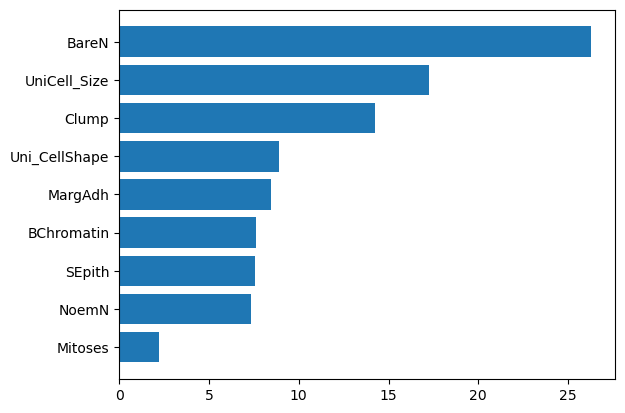

In [12]:
plt.barh(df_imp.variable,df_imp.importance);